In [1]:
import torch
import numpy as np
from transformers import (AutoModelForCausalLM, AutoTokenizer, LlamaTokenizer, LlamaForCausalLM,
                          GPTNeoForCausalLM, GPT2TokenizerFast,LlamaConfig,AutoConfig)
import os
import random
from typing import *
import matplotlib.pyplot as plt
import os
import seaborn as sns
import torch.nn as nn
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, DataCollatorForLanguageModeling, TrainingArguments, Trainer, BloomForCausalLM
from torch.utils.data import DataLoader
import sys
sys.path.append('../')
import numpy as np
from utils.model_utils import load_gpt_model_and_tokenizer, make_inputs, decode_tokens, predict_from_input
from transformers import AutoConfig, AutoTokenizer
import matplotlib.pyplot as plt
import os
import seaborn as sns

from utils.evaluation_lm_eval import run_eval_harness
from utils.trace_utils import TraceDict2
from gpt_neo import load_model,plt_heatMap_sns,plot_umap
import pandas as pd

2024-02-08 21:44:40.608195: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 21:44:40.639823: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 21:44:41.226032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Attention

In [2]:
device = 'cuda:1'
model_name = 'EleutherAI/gpt-j-6b' #   # 'EleutherAI/gpt-j-6b' 'meta-llama/Llama-2-7b'
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.n_layer
n_heads = model_config.n_head
token_num = 10

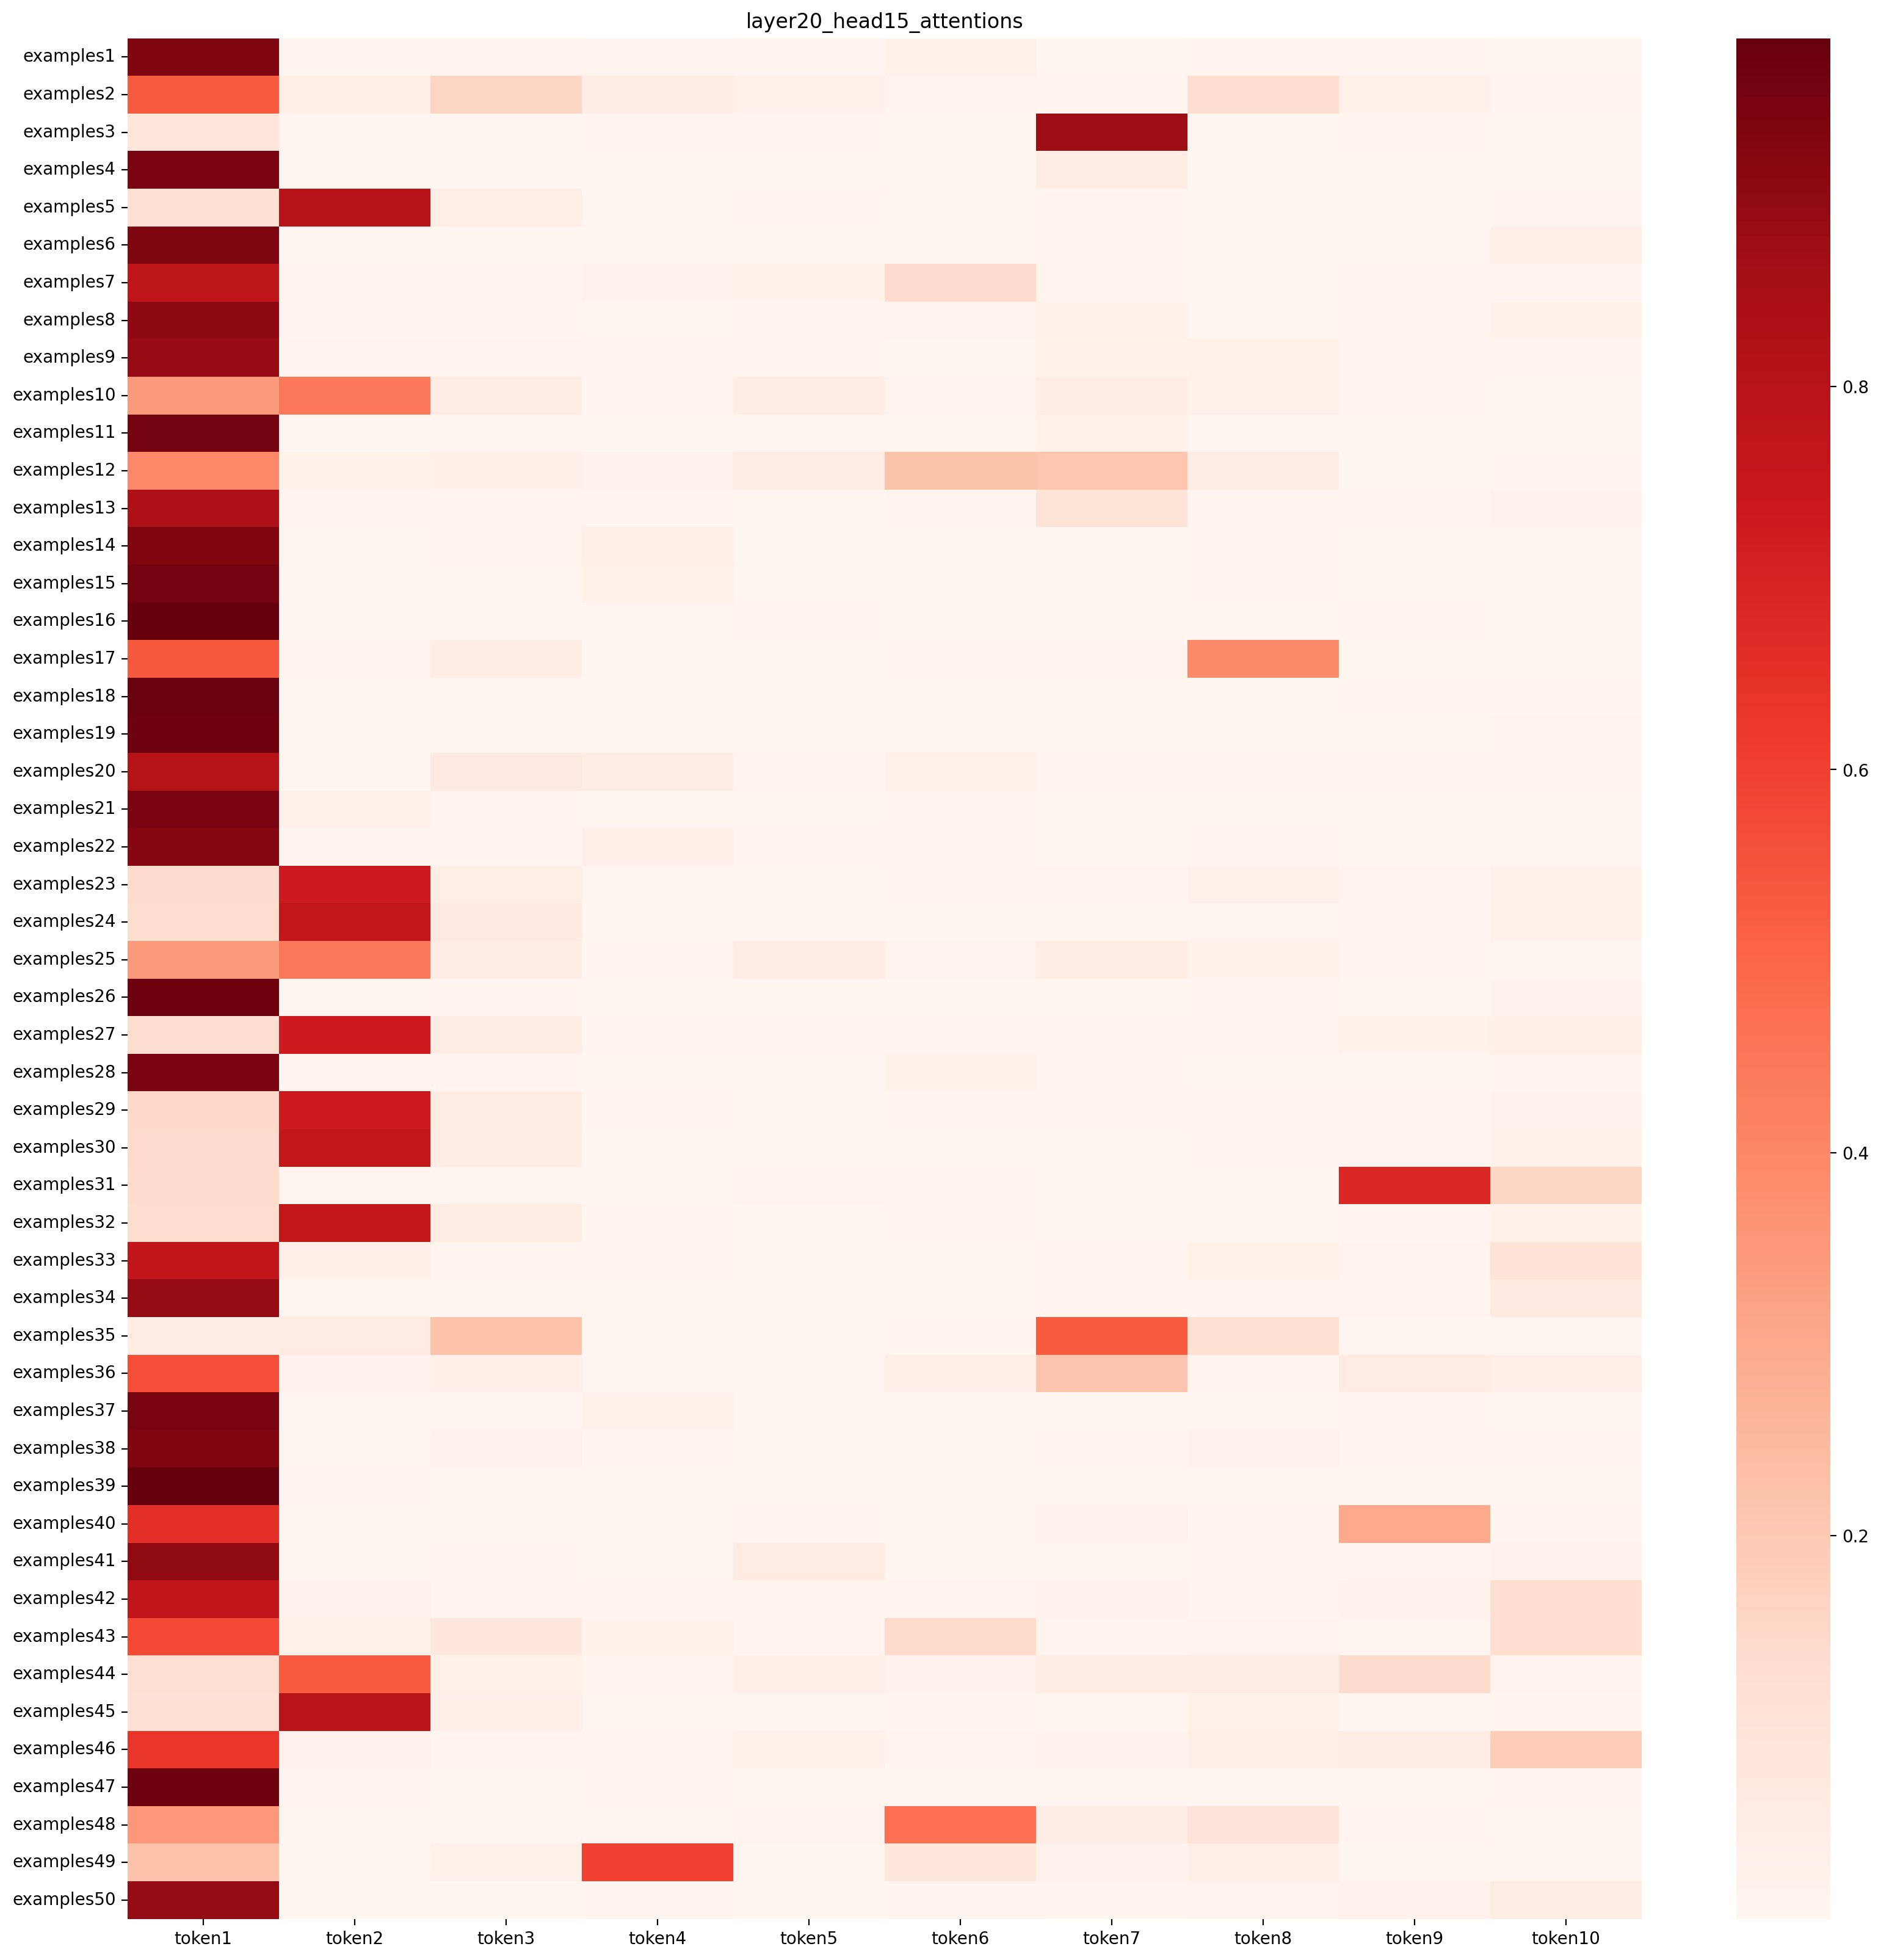

In [3]:
attentions = np.load('./result/attention.npy')
layer_id, head_id = 20, 15
examples_num = 50
show_attention = attentions[:examples_num,layer_id,head_id,-1, :]
# print(np.sum(show_attention, axis=1))
def plt_heatMap_sns(scores, save_path=None, title=None, cmap=None, y_ticks=None, x_ticks=None, show=None):
    plt.subplots(figsize=(20, 20), dpi=200)
    plt.rcParams['font.size'] = '10'
    if cmap is None:
        cmap = sns.color_palette("Reds", as_cmap=True)
    if x_ticks and y_ticks:
        sns.heatmap(scores, cmap=cmap,  xticklabels=x_ticks, yticklabels=y_ticks)
    else:
        sns.heatmap(scores, cmap=cmap)
    if title is not None:
        plt.title(title)
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(os.path.join(save_path, f'{title}.png'), bbox_inches="tight")
    if show:
        plt.show()
    plt.close()


x_ticks = [f"token{i + 1}" for i in range(token_num)]
y_ticks = [f"examples{i + 1}" for i in range(examples_num)]
plt_heatMap_sns(show_attention,title=f"layer{layer_id}_head{head_id}_attentions",
                x_ticks=x_ticks, y_ticks=y_ticks
                , show=True, save_path='./result/'
                )

# Evaluation

In [9]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = []  # [23]
train_layers = []
is_linear = True

device = 'cuda:1'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
original_model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
# model.load_state_dict(torch.load(save_model_path+'pth'))
original_model = original_model.to(torch.device(device))
# result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
# result2

In [23]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = []
is_linear = False

device = 'cuda:0'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
# model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

KeyboardInterrupt: 

In [7]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = []
is_linear = True

device = 'cuda:0'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
# model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [05:13<00:00, 226.92it/s]


{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928362},
  'anli_r2': {'acc': 0.34, 'acc_stderr': 0.014987482264363937},
  'anli_r3': {'acc': 0.3475, 'acc_stderr': 0.013751753243291856},
  'hellaswag': {'acc': 0.37094204341764586,
   'acc_stderr': 0.004820697457420422,
   'acc_norm': 0.4809798844851623,
   'acc_norm_stderr': 0.004986169849946305},
  'piqa': {'acc': 0.6866158868335147,
   'acc_stderr': 0.010822829929195506,
   'acc_norm': 0.691512513601741,
   'acc_norm_stderr': 0.010776164678037157},
  'winogrande': {'acc': 0.5540647198105761,
   'acc_stderr': 0.013970093482330689},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.23953098827470687,
   'acc_stderr': 0.007813078802813293,
   'acc_norm': 0.240536013400335,
   'acc_norm_stderr': 0.007824277362109026}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'config': {'name': 

In [7]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = [23]
is_linear = True

device = 'cuda:1'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [10:34<00:00, 112.01it/s]


{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928362},
  'anli_r2': {'acc': 0.337, 'acc_stderr': 0.014955087918653598},
  'anli_r3': {'acc': 0.345, 'acc_stderr': 0.013728421539454881},
  'hellaswag': {'acc': 0.3707428799044015,
   'acc_stderr': 0.004820166002253072,
   'acc_norm': 0.48137821151165106,
   'acc_norm_stderr': 0.004986319587524967},
  'piqa': {'acc': 0.6871599564744287,
   'acc_stderr': 0.010817714425701114,
   'acc_norm': 0.6947769314472253,
   'acc_norm_stderr': 0.01074426704560648},
  'winogrande': {'acc': 0.5493291239147593, 'acc_stderr': 0.01398392886904024},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.2375209380234506,
   'acc_stderr': 0.0077905030438074,
   'acc_norm': 0.23886097152428812,
   'acc_norm_stderr': 0.0078055800786487085}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'config': {'name': 'tes

In [8]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = [23]
is_linear = False

device = 'cuda:1'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [10:33<00:00, 112.09it/s]


{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928362},
  'anli_r2': {'acc': 0.337, 'acc_stderr': 0.014955087918653598},
  'anli_r3': {'acc': 0.34833333333333333, 'acc_stderr': 0.013759437498874075},
  'hellaswag': {'acc': 0.37024497112129057,
   'acc_stderr': 0.004818833521340358,
   'acc_norm': 0.4814777932682733,
   'acc_norm_stderr': 0.004986356526063967},
  'piqa': {'acc': 0.6871599564744287,
   'acc_stderr': 0.010817714425701112,
   'acc_norm': 0.6936887921653971,
   'acc_norm_stderr': 0.010754970032367321},
  'winogrande': {'acc': 0.5501183898973955,
   'acc_stderr': 0.013981711904049735},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.23785594639865998,
   'acc_stderr': 0.007794282274854811,
   'acc_norm': 0.23919597989949748,
   'acc_norm_stderr': 0.007809332748857683}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'c

In [3]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = []
is_linear = False

device = 'cuda:1'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for super_glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/super_glue
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [32:11<00:00, 36.77it/s]


{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928362},
  'anli_r2': {'acc': 0.339, 'acc_stderr': 0.01497675877162034},
  'anli_r3': {'acc': 0.34833333333333333, 'acc_stderr': 0.013759437498874075},
  'hellaswag': {'acc': 0.3701453893646684,
   'acc_stderr': 0.004818566366066922,
   'acc_norm': 0.4814777932682733,
   'acc_norm_stderr': 0.004986356526063967},
  'piqa': {'acc': 0.6866158868335147,
   'acc_stderr': 0.010822829929195503,
   'acc_norm': 0.6920565832426551,
   'acc_norm_stderr': 0.010770892367463675},
  'winogrande': {'acc': 0.5501183898973955,
   'acc_stderr': 0.013981711904049735},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.23886097152428812,
   'acc_stderr': 0.007805580078648709,
   'acc_norm': 0.23919597989949748,
   'acc_norm_stderr': 0.007809332748857684}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'con

In [5]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [23]  # [23]
train_layers = []
is_linear = True

device = 'cuda:0'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [11:36<00:00, 101.98it/s]


{'results': {'anli_r1': {'acc': 0.328, 'acc_stderr': 0.014853842487270334},
  'anli_r2': {'acc': 0.338, 'acc_stderr': 0.014965960710224479},
  'anli_r3': {'acc': 0.3475, 'acc_stderr': 0.013751753243291856},
  'hellaswag': {'acc': 0.3703445528779128,
   'acc_stderr': 0.004819100456867819,
   'acc_norm': 0.4810794662417845,
   'acc_norm_stderr': 0.0049862075818629245},
  'piqa': {'acc': 0.6882480957562568,
   'acc_stderr': 0.010807431424873677,
   'acc_norm': 0.6926006528835691,
   'acc_norm_stderr': 0.010765602506939061},
  'winogrande': {'acc': 0.5485398579321231,
   'acc_stderr': 0.013986110301017755},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.23886097152428812,
   'acc_stderr': 0.007805580078648709,
   'acc_norm': 0.23852596314907873,
   'acc_norm_stderr': 0.0078018207826392565}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'config': {'na

In [4]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [22,23]  # [23]
train_layers = layers
is_linear = False

device = 'cuda:1'
save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
# model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))

from transformers import pipeline
#文本生成
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=device, pad_token_id=tokenizer.eos_token_id)
results= text_generator("As far as I am concerned, I will", max_length=128, do_sample=True)
print(results[0]['generated_text'])

result2 = run_eval_harness(model, tokenizer, "test_gpt_j",None, torch.device(device), 4, sink_token=None)
result2

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for super_glue contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/super_glue
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████| 71026/71026 [24:48<00:00, 47.71it/s]


{'results': {'anli_r1': {'acc': 0.349, 'acc_stderr': 0.015080663991563102},
  'anli_r2': {'acc': 0.34, 'acc_stderr': 0.014987482264363935},
  'anli_r3': {'acc': 0.32916666666666666, 'acc_stderr': 0.01357080625843363},
  'hellaswag': {'acc': 0.36347341167098185,
   'acc_stderr': 0.004800164434233259,
   'acc_norm': 0.4812786297550289,
   'acc_norm_stderr': 0.004986282450647316},
  'piqa': {'acc': 0.6828073993471164,
   'acc_stderr': 0.010858155454380866,
   'acc_norm': 0.6866158868335147,
   'acc_norm_stderr': 0.010822829929195484},
  'winogrande': {'acc': 0.5493291239147593, 'acc_stderr': 0.01398392886904024},
  'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792},
  'mathqa': {'acc': 0.2321608040201005,
   'acc_stderr': 0.007729122296015963,
   'acc_norm': 0.23584589614740367,
   'acc_norm_stderr': 0.007771506728365752}},
 'versions': {'anli_r1': 0,
  'anli_r2': 0,
  'anli_r3': 0,
  'hellaswag': 0,
  'piqa': 0,
  'winogrande': 0,
  'wsc': 0,
  'mathqa': 0},
 'config':

# Score

In [2]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

def get_score(layers,train_layers,is_linear):
    device = 'cuda:1'
    save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
    print("=====================================================")
    print(save_model_path)
    model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, "original_gpt_neo",None, torch.device(device), 4, sink_token=None)
    print("original_gpt_neo-----------------------------------")
    print(result2)
    print("original_gpt_neo-----------------------------------")
    model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, "train_gpt_neo",None, torch.device(device), 4, sink_token=None)
    print("train_gpt_neo-----------------------------------")
    print(result2)
    print("train_gpt_neo-----------------------------------")
    print('\n')

In [3]:

# 23 False
is_linear = False
for layers in [[23], [22], [21], [20], [22,23], [21,22], [20,21,22]]:
    train_layers = layers
    get_score(layers, train_layers, is_linear)

./results/gpt_neo_[23]_False_[23]


KeyboardInterrupt: 

In [7]:
# 23 True
is_linear = True
for layers in [[23], [22], [21]]:
    train_layers = layers
    get_score(layers, train_layers, is_linear)

./results/gpt_neo_[23]_True_[23]
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:42<00:00, 176.43it/s]


original_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928362}, 'anli_r2': {'acc': 0.338, 'acc_stderr': 0.014965960710224473}, 'anli_r3': {'acc': 0.34833333333333333, 'acc_stderr': 0.013759437498874075}, 'hellaswag': {'acc': 0.37044413463453496, 'acc_stderr': 0.004819367172685971, 'acc_norm': 0.48137821151165106, 'acc_norm_stderr': 0.004986319587524966}, 'piqa': {'acc': 0.6860718171926007, 'acc_stderr': 0.01082792813418964, 'acc_norm': 0.690968443960827, 'acc_norm_stderr': 0.010781419464406979}, 'winogrande': {'acc': 0.5524861878453039, 'acc_stderr': 0.0139748476405362}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.2371859296482412, 'acc_stderr': 0.007786717148416355, 'acc_norm': 0.23785594639865998, 'acc_norm_stderr': 0.007794282274854812}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'na

100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:42<00:00, 176.54it/s]


train_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.332, 'acc_stderr': 0.01489959724281148}, 'anli_r2': {'acc': 0.338, 'acc_stderr': 0.014965960710224475}, 'anli_r3': {'acc': 0.34833333333333333, 'acc_stderr': 0.013759437498874075}, 'hellaswag': {'acc': 0.3707428799044015, 'acc_stderr': 0.004820166002253073, 'acc_norm': 0.48157737502489545, 'acc_norm_stderr': 0.004986393266269155}, 'piqa': {'acc': 0.6871599564744287, 'acc_stderr': 0.010817714425701114, 'acc_norm': 0.691512513601741, 'acc_norm_stderr': 0.010776164678037159}, 'winogrande': {'acc': 0.5469613259668509, 'acc_stderr': 0.01399036663214809}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.2371859296482412, 'acc_stderr': 0.007786717148416353, 'acc_norm': 0.23953098827470687, 'acc_norm_stderr': 0.00781307880281329}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'name':

100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:40<00:00, 177.21it/s]


original_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.331, 'acc_stderr': 0.014888272588203933}, 'anli_r2': {'acc': 0.332, 'acc_stderr': 0.014899597242811482}, 'anli_r3': {'acc': 0.35333333333333333, 'acc_stderr': 0.013804572162314933}, 'hellaswag': {'acc': 0.3828918542123083, 'acc_stderr': 0.004850988215167542, 'acc_norm': 0.4887472615016929, 'acc_norm_stderr': 0.004988517597998623}, 'piqa': {'acc': 0.705114254624592, 'acc_stderr': 0.010639030620157003, 'acc_norm': 0.7072905331882481, 'acc_norm_stderr': 0.010616044462393094}, 'winogrande': {'acc': 0.5501183898973955, 'acc_stderr': 0.013981711904049735}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.23852596314907873, 'acc_stderr': 0.007801820782639267, 'acc_norm': 0.23819095477386934, 'acc_norm_stderr': 0.007798054851247498}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'

100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:40<00:00, 177.40it/s]


train_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.329, 'acc_stderr': 0.014865395385928369}, 'anli_r2': {'acc': 0.335, 'acc_stderr': 0.014933117490932572}, 'anli_r3': {'acc': 0.3541666666666667, 'acc_stderr': 0.013811933499570956}, 'hellaswag': {'acc': 0.38259310894244175, 'acc_stderr': 0.004850268986903351, 'acc_norm': 0.48994224258115915, 'acc_norm_stderr': 0.004988771791854514}, 'piqa': {'acc': 0.705658324265506, 'acc_stderr': 0.010633311470347488, 'acc_norm': 0.7078346028291621, 'acc_norm_stderr': 0.010610252174513671}, 'winogrande': {'acc': 0.5524861878453039, 'acc_stderr': 0.0139748476405362}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.23785594639865998, 'acc_stderr': 0.00779428227485481, 'acc_norm': 0.23651591289782245, 'acc_norm_stderr': 0.007779125325665779}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'name'

100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:41<00:00, 176.95it/s]


original_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.326, 'acc_stderr': 0.014830507204541035}, 'anli_r2': {'acc': 0.33, 'acc_stderr': 0.014876872027456738}, 'anli_r3': {'acc': 0.3491666666666667, 'acc_stderr': 0.013767075395077252}, 'hellaswag': {'acc': 0.38239394542919736, 'acc_stderr': 0.004849788423944363, 'acc_norm': 0.4880501892053376, 'acc_norm_stderr': 0.004988356146499019}, 'piqa': {'acc': 0.6996735582154516, 'acc_stderr': 0.010695225308183136, 'acc_norm': 0.7083786724700761, 'acc_norm_stderr': 0.010604441527428793}, 'winogrande': {'acc': 0.5516969218626677, 'acc_stderr': 0.013977171307126347}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.23450586264656617, 'acc_stderr': 0.007756188894243541, 'acc_norm': 0.23115577889447236, 'acc_norm_stderr': 0.007717420163974308}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'

100%|███████████████████████████████████████████████████████████████████████████████████| 71026/71026 [06:26<00:00, 183.85it/s]


train_gpt_neo-----------------------------------
{'results': {'anli_r1': {'acc': 0.325, 'acc_stderr': 0.014818724459095524}, 'anli_r2': {'acc': 0.33, 'acc_stderr': 0.014876872027456738}, 'anli_r3': {'acc': 0.3458333333333333, 'acc_stderr': 0.01373624534231101}, 'hellaswag': {'acc': 0.38309101772555265, 'acc_stderr': 0.004851466623601447, 'acc_norm': 0.48834893447520417, 'acc_norm_stderr': 0.004988426528513012}, 'piqa': {'acc': 0.7007616974972797, 'acc_stderr': 0.010684130673134581, 'acc_norm': 0.7072905331882481, 'acc_norm_stderr': 0.010616044462393094}, 'winogrande': {'acc': 0.5509076558800315, 'acc_stderr': 0.013979459389140832}, 'wsc': {'acc': 0.36538461538461536, 'acc_stderr': 0.0474473339327792}, 'mathqa': {'acc': 0.23417085427135678, 'acc_stderr': 0.0077523425777474295, 'acc_norm': 0.2321608040201005, 'acc_norm_stderr': 0.007729122296015974}}, 'versions': {'anli_r1': 0, 'anli_r2': 0, 'anli_r3': 0, 'hellaswag': 0, 'piqa': 0, 'winogrande': 0, 'wsc': 0, 'mathqa': 0}, 'config': {'nam

# Generate

In [9]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [20,21,22]  # [23]
train_layers = layers
is_linear = False


def generate(model, tokenizer, device, prompt):
    from transformers import pipeline
    #文本生成
    text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=device, pad_token_id=tokenizer.eos_token_id)
    results= text_generator(prompt, max_length=50, do_sample=False)
    return results[0]['generated_text']

def get_generate(layers,train_layers,is_linear, prompt):
    device = 'cuda:1'
    save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
    print("=====================================================")
    print(save_model_path)
    model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    model = model.to(torch.device(device))
#     for name, param in model.named_parameters():
#         if param.requires_grad:
#             # print(torch.isnan(param.grad).any())
#             # print('name:{} param grad:{} param requires_grad:{},params:{}'.format(name, param.grad, param.requires_grad,param))
#             print('name:{} param requires_grad:{}:{}'.format(name, param.requires_grad,param))
    print("-----------------------------------original_gpt_neo-----------------------------------")
    print(generate(model, tokenizer, device, prompt))
    print("-----------------------------------original_gpt_neo-----------------------------------")
    model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
#     for name, param in model.named_parameters():
#         if param.requires_grad:
#             # print(torch.isnan(param.grad).any())
#             # print('name:{} param grad:{} param requires_grad:{},params:{}'.format(name, param.grad, param.requires_grad,param))
#             print('name:{} param requires_grad:{}:{}'.format(name, param.requires_grad,param))
    print("-----------------------------------train_gpt_neo-----------------------------------")
    print(generate(model, tokenizer, device, prompt))
    print("-----------------------------------train_gpt_neo-----------------------------------")
    print('\n')


In [22]:
## normal
from transformers import pipeline
#文本生成
text_generator = pipeline("text-generation", model=original_model, tokenizer=tokenizer, device=device, pad_token_id=tokenizer.eos_token_id)
results= text_generator("hello, please tell me some skills about passing exams.", max_length=50, do_sample=False)
print(results[0]['generated_text'])

hello, please tell me some skills about passing exams. I am a student of computer science and I want to pass the exam. I have a good knowledge of programming languages but I am not sure about the exam. I have read some books and I


In [5]:
# 23 False
prompt = "hello, please tell me some skills about passing exams."
is_linear = False
for layers in [[23], [22], [21], [20], [22,23], [21,22], [20,21,22]]:
    train_layers = layers
    get_generate(layers,train_layers,is_linear, prompt)

./results/gpt_neo_[23]_False_[23]
-----------------------------------original_gpt_neo-----------------------------------


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


hello, please tell me some skills about passing exams.

I am currently studying for the Bachelor of Science in Computer Science.

I have taken the following exams:

1.CSE

2.CSE-1

-----------------------------------original_gpt_neo-----------------------------------
-----------------------------------train_gpt_neo-----------------------------------
hello, please tell me some skills about passing exams.

I am currently studying for the MBA in Hyderabad.

I have a Bachelor of Commerce from Hyderabad University.

I have a Bachelor of Science in Computer Science from Hyder
-----------------------------------train_gpt_neo-----------------------------------


./results/gpt_neo_[22]_False_[22]
-----------------------------------original_gpt_neo-----------------------------------
hello, please tell me some skills about passing exams.

I am a student of engineering. I have passed the first year of my engineering
course. I am now in the second year of my engineering course. I have passed the
fi

In [10]:
# 23 True
prompt = "hello, please tell me some skills about passing exams."
is_linear = True
for layers in [[23], [22], [21]]:
    train_layers = layers
    get_generate(layers, train_layers, is_linear,prompt)

./results/gpt_neo_[23]_True_[23]
-----------------------------------original_gpt_neo-----------------------------------
hello, please tell me some skills about passing exams.

I am currently studying for the Bachelor of Science in Computer Science.

I have taken the following exams:

1.CSE

2.CSE-1

-----------------------------------original_gpt_neo-----------------------------------
-----------------------------------train_gpt_neo-----------------------------------
hello, please tell me some skills about passing exams.

I am currently studying for the MBA in Hyderabad. I have done my MBA from Hyderabad.

I have done my MBA from Hyderabad.

I have done my
-----------------------------------train_gpt_neo-----------------------------------


./results/gpt_neo_[22]_True_[22]
-----------------------------------original_gpt_neo-----------------------------------
hello, please tell me some skills about passing exams.

I am a student of engineering. I have passed the first year of my enginee

## non-train effect

In [15]:
import lm_eval
lm_eval.tasks.ALL_TASKS

['anagrams1',
 'anagrams2',
 'anli_r1',
 'anli_r2',
 'anli_r3',
 'arc_challenge',
 'arc_easy',
 'arithmetic_1dc',
 'arithmetic_2da',
 'arithmetic_2dm',
 'arithmetic_2ds',
 'arithmetic_3da',
 'arithmetic_3ds',
 'arithmetic_4da',
 'arithmetic_4ds',
 'arithmetic_5da',
 'arithmetic_5ds',
 'blimp_adjunct_island',
 'blimp_anaphor_gender_agreement',
 'blimp_anaphor_number_agreement',
 'blimp_animate_subject_passive',
 'blimp_animate_subject_trans',
 'blimp_causative',
 'blimp_complex_NP_island',
 'blimp_coordinate_structure_constraint_complex_left_branch',
 'blimp_coordinate_structure_constraint_object_extraction',
 'blimp_determiner_noun_agreement_1',
 'blimp_determiner_noun_agreement_2',
 'blimp_determiner_noun_agreement_irregular_1',
 'blimp_determiner_noun_agreement_irregular_2',
 'blimp_determiner_noun_agreement_with_adj_2',
 'blimp_determiner_noun_agreement_with_adj_irregular_1',
 'blimp_determiner_noun_agreement_with_adj_irregular_2',
 'blimp_determiner_noun_agreement_with_adjective_1'

#### gpt-neo-1.3B

In [2]:
model_name = 'EleutherAI/gpt-neo-1.3B'   #  'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
config

GPTNeoConfig {
  "_name_or_path": "EleutherAI/gpt-neo-1.3B",
  "activation_function": "gelu_new",
  "architectures": [
    "GPTNeoForCausalLM"
  ],
  "attention_dropout": 0,
  "attention_layers": [
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local",
    "global",
    "local"
  ],
  "attention_types": [
    [
      [
        "global",
        "local"
      ],
      12
    ]
  ],
  "bos_token_id": 50256,
  "classifier_dropout": 0.1,
  "embed_dropout": 0,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": null,
  "layer_norm_epsilon": 1e-05,
  "max_position_embeddings": 2048,
  "model_type": "gpt_neo",
  "num_heads": 16,
  "num_layers": 24,
  "resid_dropout": 0,
  "

In [3]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model


eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]
model_name = 'EleutherAI/gpt-neo-1.3B'   #  'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)

interval = 4
n_layers = config.num_layers
first_layer = n_layers - interval
while first_layer > 0:
    layers = list(range(first_layer,n_layers))
    first_layer -= interval
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        # layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        device = 'cuda:1'
        save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device))
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23]_zero_atten_[20, 21, 22, 23]
name:transformer.h.20.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.mlp.c_fc.weight param requires_grad:True, detype

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:01<00:00, 78.39it/s]


hellaswag 0.35232025492929697
piqa 0.6724700761697497
winogrande 0.5335438042620363
mathqa 0.2304857621440536
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23]_linear_atten_[20, 21, 22, 23]
name:transformer.h.20.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.23.attn.attention.linear.0.weight param requires_

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [16:33<00:00, 61.63it/s]


hellaswag 0.35261900019916353
piqa 0.6724700761697497
winogrande 0.5335438042620363
mathqa 0.2324958123953099
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23]_zero_mlp_[20, 21, 22, 23]
name:transformer.h.20.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.attention.v_proj.weight param requires_grad:True, detyp

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.75it/s]


hellaswag 0.30760804620593507
piqa 0.5903155603917302
winogrande 0.5351223362273086
mathqa 0.2184254606365159
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23]_zero_layer_[20, 21, 22, 23]
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:13<00:00, 90.90it/s]


hellaswag 0.28868751244771956
piqa 0.5614798694232862
winogrande 0.5509076558800315
mathqa 0.20938023450586266
------------------------------------------------------------------
./results/gpt_neo_[16, 17, 18, 19, 20, 21, 22, 23]_zero_atten_[16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.16.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.c

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:42<00:00, 80.26it/s]


hellaswag 0.32991435968930494
piqa 0.6485310119695321
winogrande 0.5359116022099447
mathqa 0.22579564489112228
------------------------------------------------------------------
./results/gpt_neo_[16, 17, 18, 19, 20, 21, 22, 23]_linear_atten_[16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.16.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.19.attn.attentio

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [16:01<00:00, 63.71it/s]


hellaswag 0.3298147779326827
piqa 0.6474428726877041
winogrande 0.5374901341752171
mathqa 0.22512562814070353
------------------------------------------------------------------
./results/gpt_neo_[16, 17, 18, 19, 20, 21, 22, 23]_zero_mlp_[16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.16.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.attention.v_proj.weight

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:40<00:00, 105.46it/s]


hellaswag 0.28958374825731925
piqa 0.5571273122959739
winogrande 0.5272296764009471
mathqa 0.20804020100502513
------------------------------------------------------------------
./results/gpt_neo_[16, 17, 18, 19, 20, 21, 22, 23]_zero_layer_[16, 17, 18, 19, 20, 21, 22, 23]
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:24<00:00, 98.11it/s]


hellaswag 0.2731527584146584
piqa 0.544069640914037
winogrande 0.5224940805051302
mathqa 0.19765494137353434
------------------------------------------------------------------
./results/gpt_neo_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_atten_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:04<00:00, 78.09it/s]


hellaswag 0.2810197171878112
piqa 0.6006528835690969
winogrande 0.5343330702446725
mathqa 0.19798994974874373
------------------------------------------------------------------
./results/gpt_neo_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_linear_atten_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.12.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:03<00:00, 78.12it/s]


hellaswag 0.28072097191794465
piqa 0.6001088139281828
winogrande 0.5351223362273086
mathqa 0.19698492462311556
------------------------------------------------------------------
./results/gpt_neo_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_mlp_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.12.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [08:30<00:00, 119.87it/s]


hellaswag 0.2711611232822147
piqa 0.5337323177366703
winogrande 0.5327545382794001
mathqa 0.207035175879397
------------------------------------------------------------------
./results/gpt_neo_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_layer_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:30<00:00, 107.23it/s]


hellaswag 0.2619000199163513
piqa 0.5337323177366703
winogrande 0.526440410418311
mathqa 0.2
------------------------------------------------------------------
./results/gpt_neo_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_atten_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.8.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:18<00:00, 76.71it/s]


hellaswag 0.26110336586337385
piqa 0.5750816104461371
winogrande 0.4988161010260458
mathqa 0.19262981574539365
------------------------------------------------------------------
./results/gpt_neo_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_linear_atten_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.8.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.attention.linear.1.weight param requires_grad:True, detype:torch.fl

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:16<00:00, 76.90it/s]


hellaswag 0.26110336586337385
piqa 0.5756256800870512
winogrande 0.4925019731649566
mathqa 0.1932998324958124
------------------------------------------------------------------
./results/gpt_neo_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_mlp_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.8.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cud

Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [07:16<00:00, 140.35it/s]


hellaswag 0.26090420235012945
piqa 0.5217627856365615
winogrande 0.49171270718232046
mathqa 0.19430485762144054
------------------------------------------------------------------
./results/gpt_neo_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_layer_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [08:56<00:00, 114.08it/s]


hellaswag 0.2584146584345748
piqa 0.5233949945593036
winogrande 0.4956590370955012
mathqa 0.19396984924623115
------------------------------------------------------------------
./results/gpt_neo_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_atten_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.4.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.c_fc.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.c_fc.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.c_proj.weight param require

Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:30<00:00, 75.51it/s]


hellaswag 0.26070503883688506
piqa 0.5533188248095756
winogrande 0.5043409629044988
mathqa 0.18927973199329984
------------------------------------------------------------------
./results/gpt_neo_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_linear_atten_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.4.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.attention.linear.1.weight param requires_grad

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:31<00:00, 75.46it/s]


hellaswag 0.26030671181039633
piqa 0.5571273122959739
winogrande 0.5098658247829518
mathqa 0.19195979899497487
------------------------------------------------------------------
./results/gpt_neo_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_mlp_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
name:transformer.h.4.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.attention.k_proj.weight param requires_grad:True, detype:

Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [06:01<00:00, 169.24it/s]


hellaswag 0.2533359888468433
piqa 0.5054406964091404
winogrande 0.4940805051302289
mathqa 0.18157453936348408
------------------------------------------------------------------
./results/gpt_neo_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]_zero_layer_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [08:42<00:00, 117.26it/s]


hellaswag 0.25951005775741887
piqa 0.5321001088139282
winogrande 0.48855564325177586
mathqa 0.19396984924623115


In [2]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

layers = [20,21,22]  # [23]
eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]
for layers in [[20,21,22], [19,20,21,22], [18,19,20,21,22],[12,14,16,18,19,20,21,22]]:
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        device = 'cuda:1'
        save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device))
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23]_zero_atten_[20, 21, 22, 23]
name:transformer.h.20.mlp.c_fc.weight param requires_grad:True
name:transformer.h.20.mlp.c_fc.bias param requires_grad:True
name:transformer.h.20.mlp.c_proj.weight param requires_grad:True
name:transformer.h.20.mlp.c_proj.bias param requires_grad:True
name:transformer.h.21.mlp.c_fc.weight param requires_grad:True
name:transformer.h.21.mlp.c_fc.bias param requires_grad:True
name:transformer.h.21.mlp.c_proj.weight param requires_grad:True
name:transformer.h.21.mlp.c_proj.bias param requires_grad:True
name:transformer.h.22.mlp.c_fc.weight param requires_grad:True
name:transformer.h.22.mlp.c_fc.bias param requires_grad:True
name:transformer.h.22.mlp.c_proj.weight param requires_grad:True
name:transformer.h.22.mlp.c_proj.bias param requires_grad:True
name:transformer.h.23.mlp.c_fc.weight param requires_grad:True
name:transformer.h.23.mlp.c_fc.bias param requires_

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:03<00:00, 201.51it/s]


hellaswag 0.35241983668591914
piqa 0.6724700761697497
winogrande 0.5359116022099447
mathqa 0.2304857621440536
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23, 23]_linear_atten_[20, 21, 22, 23, 23]
name:transformer.h.20.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.20.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.attention.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:19<00:00, 191.72it/s]


hellaswag 0.3519219279028082
piqa 0.6719260065288357
winogrande 0.5351223362273086
mathqa 0.22948073701842547
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23, 23, 23]_zero_mlp_[20, 21, 22, 23, 23, 23]
name:transformer.h.20.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.out_proj.bias param requires_grad:True
name:transformer.h.21.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.21.attn.attention.out_proj.bias param r

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:00<00:00, 254.12it/s]


hellaswag 0.30780720971917946
piqa 0.5919477693144722
winogrande 0.5351223362273086
mathqa 0.2187604690117253
------------------------------------------------------------------
./results/gpt_neo_[20, 21, 22, 23, 23, 23, 23]_zero_layer_[20, 21, 22, 23, 23, 23, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:52<00:00, 209.33it/s]


hellaswag 0.2885879306910974
piqa 0.5614798694232862
winogrande 0.5453827940015785
mathqa 0.20837520938023452
------------------------------------------------------------------
./results/gpt_neo_[19, 20, 21, 22, 23]_zero_atten_[19, 20, 21, 22, 23]
name:transformer.h.19.mlp.c_fc.weight param requires_grad:True
name:transformer.h.19.mlp.c_fc.bias param requires_grad:True
name:transformer.h.19.mlp.c_proj.weight param requires_grad:True
name:transformer.h.19.mlp.c_proj.bias param requires_grad:True
name:transformer.h.20.mlp.c_fc.weight param requires_grad:True
name:transformer.h.20.mlp.c_fc.bias param requires_grad:True
name:transformer.h.20.mlp.c_proj.weight param requires_grad:True
name:transformer.h.20.mlp.c_proj.bias param requires_grad:True
name:transformer.h.21.mlp.c_fc.weight param requires_grad:True
name:transformer.h.21.mlp.c_fc.bias param requires_grad:True
name:transformer.h.21.mlp.c_proj.weight param requires_grad:True
name:transformer.h.21.mlp.c_proj.bias param requires_grad:T

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:28<00:00, 186.24it/s]


hellaswag 0.34843656642103166
piqa 0.6697497279651795
winogrande 0.5390686661404893
mathqa 0.2324958123953099
------------------------------------------------------------------
./results/gpt_neo_[19, 20, 21, 22, 23, 23]_linear_atten_[19, 20, 21, 22, 23, 23]
name:transformer.h.19.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.20.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.20.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.attention.lin

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:07<00:00, 198.86it/s]


hellaswag 0.3482374029077873
piqa 0.6697497279651795
winogrande 0.5359116022099447
mathqa 0.23182579564489111
------------------------------------------------------------------
./results/gpt_neo_[19, 20, 21, 22, 23, 23, 23]_zero_mlp_[19, 20, 21, 22, 23, 23, 23]
name:transformer.h.19.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.out_proj.bias param requires_grad:True
name:transformer.h.20.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.20.attn.attention.out_proj.bias

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [03:59<00:00, 255.94it/s]


hellaswag 0.3040231029675364
piqa 0.5843307943416758
winogrande 0.5414364640883977
mathqa 0.21608040201005024
------------------------------------------------------------------
./results/gpt_neo_[19, 20, 21, 22, 23, 23, 23, 23]_zero_layer_[19, 20, 21, 22, 23, 23, 23, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:16<00:00, 193.23it/s]


hellaswag 0.28540131447918743
piqa 0.558759521218716
winogrande 0.5390686661404893
mathqa 0.20603015075376885
------------------------------------------------------------------
./results/gpt_neo_[18, 19, 20, 21, 22, 23]_zero_atten_[18, 19, 20, 21, 22, 23]
name:transformer.h.18.mlp.c_fc.weight param requires_grad:True
name:transformer.h.18.mlp.c_fc.bias param requires_grad:True
name:transformer.h.18.mlp.c_proj.weight param requires_grad:True
name:transformer.h.18.mlp.c_proj.bias param requires_grad:True
name:transformer.h.19.mlp.c_fc.weight param requires_grad:True
name:transformer.h.19.mlp.c_fc.bias param requires_grad:True
name:transformer.h.19.mlp.c_proj.weight param requires_grad:True
name:transformer.h.19.mlp.c_proj.bias param requires_grad:True
name:transformer.h.20.mlp.c_fc.weight param requires_grad:True
name:transformer.h.20.mlp.c_fc.bias param requires_grad:True
name:transformer.h.20.mlp.c_proj.weight param requires_grad:True
name:transformer.h.20.mlp.c_proj.bias param require

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:16<00:00, 193.71it/s]


hellaswag 0.34156542521410077
piqa 0.6632208922742111
winogrande 0.5445935280189423
mathqa 0.2338358458961474
------------------------------------------------------------------
./results/gpt_neo_[18, 19, 20, 21, 22, 23, 23]_linear_atten_[18, 19, 20, 21, 22, 23, 23]
name:transformer.h.18.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.18.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.19.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.20.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.20.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.atten

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:26<00:00, 187.50it/s]


hellaswag 0.3408683529177455
piqa 0.6632208922742111
winogrande 0.5461720599842147
mathqa 0.23484087102177553
------------------------------------------------------------------
./results/gpt_neo_[18, 19, 20, 21, 22, 23, 23, 23]_zero_mlp_[18, 19, 20, 21, 22, 23, 23, 23]
name:transformer.h.18.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.18.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.18.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.18.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.18.attn.attention.out_proj.bias param requires_grad:True
name:transformer.h.19.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.19.attn.attention.out_p

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:01<00:00, 253.77it/s]


hellaswag 0.29944234216291576
piqa 0.573993471164309
winogrande 0.55327545382794
mathqa 0.21708542713567838
------------------------------------------------------------------
./results/gpt_neo_[18, 19, 20, 21, 22, 23, 23, 23, 23]_zero_layer_[18, 19, 20, 21, 22, 23, 23, 23, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:00<00:00, 203.66it/s]


hellaswag 0.28032264489145586
piqa 0.5538628944504896
winogrande 0.5335438042620363
mathqa 0.20636515912897824
------------------------------------------------------------------
./results/gpt_neo_[12, 14, 16, 18, 19, 20, 21, 22, 23]_zero_atten_[12, 14, 16, 18, 19, 20, 21, 22, 23]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True
name:transformer.h.12.mlp.c_proj.weight param requires_grad:True
name:transformer.h.12.mlp.c_proj.bias param requires_grad:True
name:transformer.h.14.mlp.c_fc.weight param requires_grad:True
name:transformer.h.14.mlp.c_fc.bias param requires_grad:True
name:transformer.h.14.mlp.c_proj.weight param requires_grad:True
name:transformer.h.14.mlp.c_proj.bias param requires_grad:True
name:transformer.h.16.mlp.c_fc.weight param requires_grad:True
name:transformer.h.16.mlp.c_fc.bias param requires_grad:True
name:transformer.h.16.mlp.c_proj.weight param requires_grad:True
name:transformer.h.16.mlp.

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:42<00:00, 178.68it/s]


hellaswag 0.32822146982672773
piqa 0.661588683351469
winogrande 0.5556432517758485
mathqa 0.21675041876046902
------------------------------------------------------------------
./results/gpt_neo_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23]_linear_atten_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23]
name:transformer.h.12.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.12.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.14.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.14.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.16.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.16.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.18.attn.attention.linear.0.weight param requires_grad:True
name:transformer.h.18.attn.attention.linear.1.weight param requires_grad:True
name:transformer.h.19.attn.attention.linear.0.weight param requires_grad:True
name:tra

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:56<00:00, 171.79it/s]


hellaswag 0.32832105158334995
piqa 0.6610446137105549
winogrande 0.55327545382794
mathqa 0.21574539363484088
------------------------------------------------------------------
./results/gpt_neo_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23, 23]_zero_mlp_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23, 23]
name:transformer.h.12.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.12.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.12.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.12.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.12.attn.attention.out_proj.bias param requires_grad:True
name:transformer.h.14.attn.attention.k_proj.weight param requires_grad:True
name:transformer.h.14.attn.attention.v_proj.weight param requires_grad:True
name:transformer.h.14.attn.attention.q_proj.weight param requires_grad:True
name:transformer.h.14.attn.attention.out_proj.weight param requires_grad:True
name:transformer.h.

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [03:51<00:00, 264.57it/s]


hellaswag 0.2855008962358096
piqa 0.5500544069640914
winogrande 0.526440410418311
mathqa 0.20770519262981574
------------------------------------------------------------------
./results/gpt_neo_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23, 23, 23]_zero_layer_[12, 14, 16, 18, 19, 20, 21, 22, 23, 23, 23, 23]
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [05:26<00:00, 187.23it/s]


hellaswag 0.26797450707030473
piqa 0.5408052230685527
winogrande 0.5098658247829518
mathqa 0.19765494137353434


In [8]:
eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]

model_name = 'EleutherAI/gpt-neo-1.3B'   #  'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
is_linear = 'zero_mlp'
for layer_id in range(config.num_layers):
    layers = [layer_id]  # [23]
    train_layers = layers
    save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])

Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:10<00:00, 244.60it/s]


./results/gpt_neo_[0]_zero_mlp_[0]
hellaswag 0.25492929695279826
piqa 0.5315560391730142
winogrande 0.4972375690607735
mathqa 0.192964824120603
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:11<00:00, 243.67it/s]


./results/gpt_neo_[1]_zero_mlp_[1]
hellaswag 0.3708424616610237
piqa 0.6893362350380848
winogrande 0.5374901341752171
mathqa 0.240536013400335
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:11<00:00, 243.30it/s]


./results/gpt_neo_[2]_zero_mlp_[2]
hellaswag 0.33041226847241584
piqa 0.6659412404787813
winogrande 0.5382794001578532
mathqa 0.23517587939698492
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:12<00:00, 242.45it/s]


./results/gpt_neo_[3]_zero_mlp_[3]
hellaswag 0.2711611232822147
piqa 0.5685527747551686
winogrande 0.48855564325177586
mathqa 0.21809045226130652
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:13<00:00, 241.29it/s]


./results/gpt_neo_[4]_zero_mlp_[4]
hellaswag 0.37283409679346746
piqa 0.6893362350380848
winogrande 0.5461720599842147
mathqa 0.2375209380234506
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:13<00:00, 241.91it/s]


./results/gpt_neo_[5]_zero_mlp_[5]
hellaswag 0.3712407886875124
piqa 0.6942328618063112
winogrande 0.5398579321231255
mathqa 0.23417085427135678
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:14<00:00, 240.76it/s]


./results/gpt_neo_[6]_zero_mlp_[6]
hellaswag 0.3646683927504481
piqa 0.6980413492927094
winogrande 0.5280189423835833
mathqa 0.23517587939698492
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:16<00:00, 238.52it/s]


./results/gpt_neo_[7]_zero_mlp_[7]
hellaswag 0.30193188607847044
piqa 0.6534276387377584
winogrande 0.5303867403314917
mathqa 0.22445561139028475
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:15<00:00, 240.00it/s]


./results/gpt_neo_[8]_zero_mlp_[8]
hellaswag 0.3211511651065525
piqa 0.6692056583242655
winogrande 0.5453827940015785
mathqa 0.23584589614740367
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:13<00:00, 241.15it/s]


./results/gpt_neo_[9]_zero_mlp_[9]
hellaswag 0.3367855008962358
piqa 0.6833514689880305
winogrande 0.5351223362273086
mathqa 0.23015075376884422
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:23<00:00, 232.57it/s]


./results/gpt_neo_[10]_zero_mlp_[10]
hellaswag 0.376319458275244
piqa 0.7023939064200218
winogrande 0.5351223362273086
mathqa 0.24455611390284757
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:24<00:00, 231.47it/s]


./results/gpt_neo_[11]_zero_mlp_[11]
hellaswag 0.35331607249551883
piqa 0.6833514689880305
winogrande 0.5359116022099447
mathqa 0.23283082077051925
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:25<00:00, 230.49it/s]


./results/gpt_neo_[12]_zero_mlp_[12]
hellaswag 0.38388767177853017
piqa 0.7023939064200218
winogrande 0.5445935280189423
mathqa 0.23919597989949748
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:26<00:00, 229.34it/s]


./results/gpt_neo_[13]_zero_mlp_[13]
hellaswag 0.35879306910973907
piqa 0.6844396082698585
winogrande 0.5414364640883977
mathqa 0.23350083752093803
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:24<00:00, 231.23it/s]


./results/gpt_neo_[14]_zero_mlp_[14]
hellaswag 0.38488348934475203
piqa 0.70620239390642
winogrande 0.5469613259668509
mathqa 0.23417085427135678
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:27<00:00, 229.11it/s]


./results/gpt_neo_[15]_zero_mlp_[15]
hellaswag 0.3679545907189803
piqa 0.691512513601741
winogrande 0.5422257300710339
mathqa 0.23785594639865998
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:25<00:00, 230.61it/s]


./results/gpt_neo_[16]_zero_mlp_[16]
hellaswag 0.3877713602867955
piqa 0.7002176278563657
winogrande 0.5572217837411207
mathqa 0.2355108877721943
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:25<00:00, 230.22it/s]


./results/gpt_neo_[17]_zero_mlp_[17]
hellaswag 0.3781119298944433
piqa 0.6974972796517954
winogrande 0.5398579321231255
mathqa 0.24187604690117254
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:26<00:00, 230.03it/s]


./results/gpt_neo_[18]_zero_mlp_[18]
hellaswag 0.3842859988050189
piqa 0.7089227421109902
winogrande 0.5493291239147593
mathqa 0.24154103852596315
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:22<00:00, 233.38it/s]


./results/gpt_neo_[19]_zero_mlp_[19]
hellaswag 0.3879705238000398
piqa 0.7034820457018498
winogrande 0.5603788476716653
mathqa 0.23886097152428812
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:22<00:00, 233.61it/s]


./results/gpt_neo_[20]_zero_mlp_[20]
hellaswag 0.3855805616411073
piqa 0.70620239390642
winogrande 0.5461720599842147
mathqa 0.24455611390284757
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:22<00:00, 233.54it/s]


./results/gpt_neo_[21]_zero_mlp_[21]
hellaswag 0.38259310894244175
piqa 0.7002176278563657
winogrande 0.55327545382794
mathqa 0.23417085427135678
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:20<00:00, 235.18it/s]


./results/gpt_neo_[22]_zero_mlp_[22]
hellaswag 0.38279227245568614
piqa 0.704570184983678
winogrande 0.5540647198105761
mathqa 0.23852596314907873
Running loglikelihood requests


100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:17<00:00, 237.98it/s]


./results/gpt_neo_[23]_zero_mlp_[23]
hellaswag 0.37024497112129057
piqa 0.6871599564744287
winogrande 0.5485398579321231
mathqa 0.2375209380234506


In [3]:
eval_tasks = [
        "hellaswag",
        "piqa",
        "winogrande",
        "mathqa",
    ]
model_name = 'EleutherAI/gpt-neo-1.3B'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
is_linear = 'zero_residual'
csv_path = f'./csv/gpt_neo_{is_linear}.csv'
df = pd.DataFrame(data=None, index=None, columns=eval_tasks)
for layer_id in range(config.num_layers):
    layers = [layer_id]  # [23]
    train_layers = layers
    save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
    # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    # generate(model, tokenizer, device, 'Hello, nice to meet you')
    acc_list = []
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])
        acc_list.append(result2['results'][key]['acc'])
    df.loc[f'layer{layer_id}'] = acc_list
print(df)
df.T.to_csv(path_or_buf=os.path.join(sys.path[0], csv_path), columns=df.T.columns)

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:05<00:00, 249.63it/s]


./results/gpt_neo_[0]_zero_residual_[0]
hellaswag 0.38617805218084045
piqa 0.7110990206746464
winogrande 0.5469613259668509
mathqa 0.24288107202680068
Running loglikelihood requests


 35%|████████████████████████████▎                                                   | 21708/61224 [01:27<02:35, 253.39it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:05<00:00, 249.07it/s]


./results/gpt_neo_[7]_zero_residual_[7]
hellaswag 0.25492929695279826
piqa 0.5337323177366703
winogrande 0.5201262825572218
mathqa 0.2134003350083752


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:06<00:00, 248.20it/s]


./results/gpt_neo_[8]_zero_residual_[8]
hellaswag 0.25781716789484166
piqa 0.5402611534276387
winogrande 0.46724546172059983
mathqa 0.2137353433835846


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


 10%|████████▍                                                                        | 6356/61224 [00:26<03:42, 246.20it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:05<00:00, 249.02it/s]


./results/gpt_neo_[15]_zero_residual_[15]
hellaswag 0.2562238597888867
piqa 0.5244831338411317
winogrande 0.4964483030781373
mathqa 0.1966499162479062


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


  6%|████▌                                                                            | 3460/61224 [00:14<03:54, 245.88it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 86%|████████████████████████████████████████████████████████████████████▉           | 52720/61224 [03:34<00:32, 260.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04

./results/gpt_neo_[22]_zero_residual_[22]
hellaswag 0.2651862178848835
piqa 0.5707290533188248
winogrande 0.4925019731649566
mathqa 0.2254606365159129


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████| 61224/61224 [04:05<00:00, 249.83it/s]


./results/gpt_neo_[23]_zero_residual_[23]
hellaswag 0.2620991834295957
piqa 0.5799782372143635
winogrande 0.4909234411996843
mathqa 0.21708542713567838
         hellaswag      piqa  winogrande    mathqa
layer0    0.386178  0.711099    0.546961  0.242881
layer1    0.255626  0.527203    0.508287  0.202680
layer2    0.253933  0.534276    0.505919  0.193300
layer3    0.256323  0.521763    0.500395  0.192965
layer4    0.257917  0.536453    0.501184  0.187605
layer5    0.256921  0.526659    0.525651  0.203350
layer6    0.257021  0.509249    0.481452  0.206365
layer7    0.254929  0.533732    0.520126  0.213400
layer8    0.257817  0.540261    0.467245  0.213735
layer9    0.253635  0.534820    0.508287  0.204690
layer10   0.256224  0.526659    0.516180  0.197655
layer11   0.256921  0.529924    0.495659  0.196650
layer12   0.256323  0.528292    0.490134  0.207035
layer13   0.255228  0.521219    0.510655  0.205025
layer14   0.259012  0.534820    0.486977  0.203350
layer15   0.256224  0.524483    

In [5]:
def generate(model, tokenizer, device, prompt):
    from transformers import pipeline
    #文本生成
    text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=device, pad_token_id=tokenizer.eos_token_id)
    results= text_generator(prompt, max_length=100, do_sample=False)
    return results[0]['generated_text']

device = 'cuda:0'
prompt = "hello, please tell me some skills about passing exams."
for layers in [[],[0],[3],[12],[15],[22],list(range(19,23))]:
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        print("=====================================================")
        save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{layers}'
        print(save_model_path)
        model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
        model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        model = model.to(torch.device(device))
        #     for name, param in model.named_parameters():
        #         if param.requires_grad:
        #             # print(torch.isnan(param.grad).any())
        #             # print('name:{} param grad:{} param requires_grad:{},params:{}'.format(name, param.grad, param.requires_grad,param))
        #             print('name:{} param requires_grad:{}:{}'.format(name, param.requires_grad,param))
        print(generate(model, tokenizer, device, prompt))

./results/gpt_neo_[]_zero_atten_[]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True
name:transformer.h.12.mlp.c_proj.weight param requires_grad:True
name:transformer.h.12.mlp.c_proj.bias param requires_grad:True
name:transformer.h.14.mlp.c_fc.weight param requires_grad:True
name:transformer.h.14.mlp.c_fc.bias param requires_grad:True
name:transformer.h.14.mlp.c_proj.weight param requires_grad:True
name:transformer.h.14.mlp.c_proj.bias param requires_grad:True
name:transformer.h.16.mlp.c_fc.weight param requires_grad:True
name:transformer.h.16.mlp.c_fc.bias param requires_grad:True
name:transformer.h.16.mlp.c_proj.weight param requires_grad:True
name:transformer.h.16.mlp.c_proj.bias param requires_grad:True
name:transformer.h.18.mlp.c_fc.weight param requires_grad:True
name:transformer.h.18.mlp.c_fc.bias param requires_grad:True
name:transformer.h.18.mlp.c_proj.weight param requires_grad:True
name:transformer.h.1

hello, please tell me some skills about passing exams. I am a student of computer science and I want to pass the exam. I have a good knowledge of programming languages but I am not sure about the exam. I have read some books and I have also watched some videos. Please help me.

A:

I would suggest you to take a look at the following resources:

http://www.dummies.com/extras/programming/exam-guide
./results/gpt_neo_[]_zero_layer_[]
hello, please tell me some skills about passing exams. I am a student of computer science and I want to pass the exam. I have a good knowledge of programming languages but I am not sure about the exam. I have read some books and I have also watched some videos. Please help me.

A:

I would suggest you to take a look at the following resources:

http://www.dummies.com/extras/programming/exam-guide
./results/gpt_neo_[0]_zero_atten_[0]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True
name

hello, please tell me some skills about passing exams.

s1t1 and

   and
  and and
   and
   and and
   and and
   and and
      and and
                                             
./results/gpt_neo_[0]_zero_layer_[0]
hello, please tell me some skills about passing exams.chedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelbiltbilt Fifachedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedel Fifachedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedelchedel
./results/gpt_neo_[3]_zero_atten_[3]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True
name:transformer.h.12.mlp.c_proj.wei

hello, please tell me some skills about passing exams.

A:

I think you are looking for the following:

Passing an exam is a process of learning and practicing.

The process of learning and practicing is called exam preparation.

The process of learning and practicing is called exam preparation.

The process of learning and practicing is called exam preparation.

The process of learning and practicing is called exam preparation.

The process of learning and practicing
./results/gpt_neo_[3]_zero_layer_[3]
hello, please tell me some skills about passing exams.

 i have been to be































































  of a



           
./results/gpt_neo_[12]_zero_atten_[12]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requires_grad:True
name:transformer.h.12.mlp.c_proj.weight param requires_grad:True
name:transformer.h.12.mlp.c_proj.bias param requires_grad:True
name:transformer.h.14.mlp.c_fc.weight p

hello, please tell me some skills about passing exams.

I have a friend who is a teacher and he told me that he has passed the exam for the first year of his teaching career. I have a friend who is a teacher and he told me that he has passed the exam for the first year of his teaching career. I have a friend who is a teacher and he told me that he has passed the exam for the first year of his teaching career. I have a friend who is
./results/gpt_neo_[12]_zero_layer_[12]
hello, please tell me some skills about passing exams.

I have passed the first exam of the first year of my university. I have been doing this for the past 2 years. I have been doing this for the past 2 years. I have been doing this for the past 2 years.

I have been doing this for the past 2 years. I have been doing this for the past 2 years.

I have been doing this for the past 2 years.

I
./results/gpt_neo_[15]_zero_atten_[15]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c

hello, please tell me some skills about passing exams.

I am a student of the university of science and technology of china.

I am a student of the university of science and technology of china.

I am a student of the university of science and technology of china.

I am a student of the university of science and technology of china.

I am a student of the university of science and technology of china.

I am
./results/gpt_neo_[15]_zero_layer_[15]
hello, please tell me some skills about passing exams.

I'm not sure if you're asking for a specific skill, or if you're asking for a specific question.

I'm not sure if you're asking for a specific skill, or if you're asking for a specific question.

I'm not sure if you're asking for a specific skill, or if you're asking for a specific question.

I'm not sure if you're asking for a specific skill
./results/gpt_neo_[22]_zero_atten_[22]
name:transformer.h.12.mlp.c_fc.weight param requires_grad:True
name:transformer.h.12.mlp.c_fc.bias param requi

hello, please tell me some skills about passing exams. I am a student of engineering. I am currently studying for a B.E.E.

A:

I would say that you should have a look at the following:

The Advanced Engineering Design (AED) course
The Advanced Engineering Design (AED) course
The Advanced Engineering Design (AED) course
The Advanced Engineering Design (AED) course
The Advanced Engineering Design (AED) course
./results/gpt_neo_[22]_zero_layer_[22]
hello, please tell me some skills about passing exams. I am a student of engineering. I am currently studying for a Bachelor of Engineering. I am currently doing my Bachelor of Engineering in Electrical Engineering. I am currently doing my Bachelor of Engineering in Electrical Engineering. I am currently doing my Bachelor of Engineering in Electrical Engineering. I am currently doing my Bachelor of Engineering in Electrical Engineering. I am currently doing my Bachelor of Engineering in Electrical Engineering. I am currently doing my Bachelor 

hello, please tell me some skills about passing exams.

A:

There are many ways to pass an exam.

You can simply ask for a retake.
You can ask for a retake after you have passed.
You can ask for a retake after you have failed.
You can ask for a retake after you have failed and then you have passed.
You can ask for a retake after you have failed and then you have failed and then you have passed.

./results/gpt_neo_[19, 20, 21, 22]_zero_layer_[19, 20, 21, 22]
hello, please tell me some skills about passing exams.

A: Survive and Adapt

The most important thing you can do is survive. If you're going to be
  there for a while then you're going to need to adapt. If you're going
  to be there for a while then you're going to need to survive. If you're
  going to be there for a while then you're going to need to adapt. If you're going to be there


In [2]:
# 训练后效果
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

eval_tasks = [
        "hellaswag",
        "piqa",
        "winogrande",
        "mathqa",
    ]
layers = [0]  # [23]
train_layers = layers
is_linear = 'linear_atten'

device = 'cuda:0'

for layers, train_layers, is_linear in [
    (list(range(18,23)), list(range(18))+[23], 'zero_layer'),
    (list(range(1)), list(range(1)), 'linear_atten'),
     (list(range(23,24)), list(range(23,24)), 'linear_atten'),
     (list(range(18,23)), list(range(18,23)), 'linear_atten'),
     ]:
    save_model_path = f'./results/gpt_neo_{layers}_{is_linear}_{train_layers}'
    print("=====================================================")
    print(save_model_path)
    model_name = 'EleutherAI/gpt-neo-1.3B'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    print('origin:')
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, "test_gpt_j",eval_tasks, torch.device(device), 4, sink_token=None)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])
    print('trained:')
    model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, "test_gpt_j",eval_tasks, torch.device(device), 4, sink_token=None)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])
    
    

./results/gpt_neo_[18, 19, 20, 21, 22]_zero_layer_[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 23]
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.bias param r

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:04<00:00, 92.18it/s]


hellaswag 0.3180641306512647
piqa 0.6175190424374319
winogrande 0.5398579321231255
mathqa 0.22680067001675042
trained:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:37<00:00, 87.74it/s]


hellaswag 0.3505277833100976
piqa 0.6507072905331882
winogrande 0.5556432517758485
mathqa 0.22914572864321608
./results/gpt_neo_[0]_linear_atten_[0]
name:transformer.h.0.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
origin:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:14<00:00, 83.38it/s]


hellaswag 0.2551284604660426
piqa 0.5337323177366703
winogrande 0.4877663772691397
mathqa 0.19363484087102178
trained:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:27<00:00, 81.87it/s]


hellaswag 0.25761800438159727
piqa 0.5369967355821545
winogrande 0.494869771112865
mathqa 0.1849246231155779
./results/gpt_neo_[23]_linear_atten_[23]
name:transformer.h.23.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.23.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
origin:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:39<00:00, 80.58it/s]


hellaswag 0.37024497112129057
piqa 0.6882480957562568
winogrande 0.5477505919494869
mathqa 0.23785594639865998
trained:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:28<00:00, 81.77it/s]


hellaswag 0.3822943636725752
piqa 0.7040261153427638
winogrande 0.5477505919494869
mathqa 0.23919597989949748
./results/gpt_neo_[18, 19, 20, 21, 22]_linear_atten_[18, 19, 20, 21, 22]
name:transformer.h.18.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.18.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.19.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.19.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.20.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.20.attn.attention.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.21.attn.attention.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transfo

100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:35<00:00, 80.99it/s]


hellaswag 0.36974706233817967
piqa 0.6822633297062024
winogrande 0.5564325177584846
mathqa 0.2304857621440536
trained:
Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:38<00:00, 80.75it/s]


hellaswag 0.3808006373232424
piqa 0.6964091403699674
winogrande 0.5501183898973955
mathqa 0.23651591289782245


#### gpt-j

In [3]:
model_name = 'EleutherAI/gpt-j-6b'
AutoConfig.from_pretrained(model_name)

GPTJConfig {
  "_name_or_path": "EleutherAI/gpt-j-6b",
  "activation_function": "gelu_new",
  "architectures": [
    "GPTJForCausalLM"
  ],
  "attn_pdrop": 0.0,
  "bos_token_id": 50256,
  "embd_pdrop": 0.0,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gptj",
  "n_embd": 4096,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 28,
  "n_positions": 2048,
  "resid_pdrop": 0.0,
  "rotary": true,
  "rotary_dim": 64,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50,
      "temperature": 1.0
    }
  },
  "tie_word_embeddings": false,
  "tokenizer_class": "GPT2Tokenizer",
  "transformers_version": "4.35.2",
  "use_cache": true,
  "vocab_size": 50400
}

In [7]:
layers = []  # [23]
train_layers = layers
is_linear = False
save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
# 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
# model.load_state_dict(torch.load(save_model_path+'pth'))
model = model.to(torch.device(device))
result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
print(save_model_path)
for (key) in result2['results'].keys():
    print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.wte.weight param requires_grad:True
name:transformer.h.0.ln_1.weight param requires_grad:True
name:transformer.h.0.ln_1.bias param requires_grad:True
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True
name:transformer.h.0.mlp.fc_out.bias param requires_grad:True
name:transformer.h.1.ln_1.weight param requires_grad:True
name:transformer.h.1.ln_1.bias param requires_grad:True
name:transformer.h.1.attn.k_proj.weight param requires_grad:True
name:transformer.h.1.attn.v_proj.weight param requires_grad:True
name:transformer.h.1.attn.q_proj.weight param requires_grad:True
name:transfo

Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.96it/s]


./results/gpt_j_[]_False_[]
hellaswag 0.4954192391953794
piqa 0.7540805223068553
winogrande 0.6408839779005525
mathqa 0.26733668341708544


In [6]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model

eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
for layer_id in range(config.n_layer):
    layers = []  # [23]
    layers.append(layer_id)
    train_layers = layers
    is_linear = False
    save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
    # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True
name:transformer.h.0.mlp.fc_out.bias param requires_grad:True


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:15<00:00, 90.58it/s]


./results/gpt_j_[0]_False_[0]
hellaswag 0.40310695080661224
piqa 0.6866158868335147
winogrande 0.5469613259668509
mathqa 0.23886097152428812


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.1.mlp.fc_in.weight param requires_grad:True
name:transformer.h.1.mlp.fc_in.bias param requires_grad:True
name:transformer.h.1.mlp.fc_out.weight param requires_grad:True
name:transformer.h.1.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:31<00:00, 88.56it/s]


./results/gpt_j_[1]_False_[1]
hellaswag 0.48645688109938257
piqa 0.750816104461371
winogrande 0.6290449881610103
mathqa 0.2522613065326633


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.2.mlp.fc_in.weight param requires_grad:True
name:transformer.h.2.mlp.fc_in.bias param requires_grad:True
name:transformer.h.2.mlp.fc_out.weight param requires_grad:True
name:transformer.h.2.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:23<00:00, 89.62it/s]


./results/gpt_j_[2]_False_[2]
hellaswag 0.4386576379207329
piqa 0.7426550598476604
winogrande 0.6187845303867403
mathqa 0.25728643216080405


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.3.mlp.fc_in.weight param requires_grad:True
name:transformer.h.3.mlp.fc_in.bias param requires_grad:True
name:transformer.h.3.mlp.fc_out.weight param requires_grad:True
name:transformer.h.3.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:21<00:00, 89.89it/s]


./results/gpt_j_[3]_False_[3]
hellaswag 0.4814777932682733
piqa 0.749183895538629
winogrande 0.6337805840568271
mathqa 0.25795644891122277


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.mlp.fc_in.weight param requires_grad:True
name:transformer.h.4.mlp.fc_in.bias param requires_grad:True
name:transformer.h.4.mlp.fc_out.weight param requires_grad:True
name:transformer.h.4.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:20<00:00, 89.98it/s]


./results/gpt_j_[4]_False_[4]
hellaswag 0.48735311690898225
piqa 0.7519042437431991
winogrande 0.6393054459352802
mathqa 0.25661641541038527


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.5.mlp.fc_in.weight param requires_grad:True
name:transformer.h.5.mlp.fc_in.bias param requires_grad:True
name:transformer.h.5.mlp.fc_out.weight param requires_grad:True
name:transformer.h.5.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:06<00:00, 91.85it/s]


./results/gpt_j_[5]_False_[5]
hellaswag 0.48297151961760604
piqa 0.749727965179543
winogrande 0.6195737963693765
mathqa 0.2606365159128978


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.6.mlp.fc_in.weight param requires_grad:True
name:transformer.h.6.mlp.fc_in.bias param requires_grad:True
name:transformer.h.6.mlp.fc_out.weight param requires_grad:True
name:transformer.h.6.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:04<00:00, 92.14it/s]


./results/gpt_j_[6]_False_[6]
hellaswag 0.474407488548098
piqa 0.7540805223068553
winogrande 0.6235201262825573
mathqa 0.2556113902847571


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.7.mlp.fc_in.weight param requires_grad:True
name:transformer.h.7.mlp.fc_in.bias param requires_grad:True
name:transformer.h.7.mlp.fc_out.weight param requires_grad:True
name:transformer.h.7.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:26<00:00, 89.12it/s]


./results/gpt_j_[7]_False_[7]
hellaswag 0.4848635729934276
piqa 0.7535364526659413
winogrande 0.6108918705603789
mathqa 0.2613065326633166


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.mlp.fc_in.weight param requires_grad:True
name:transformer.h.8.mlp.fc_in.bias param requires_grad:True
name:transformer.h.8.mlp.fc_out.weight param requires_grad:True
name:transformer.h.8.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:10<00:00, 91.37it/s]


./results/gpt_j_[8]_False_[8]
hellaswag 0.48446524596693885
piqa 0.749727965179543
winogrande 0.6314127861089187
mathqa 0.2649916247906198


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.9.mlp.fc_in.weight param requires_grad:True
name:transformer.h.9.mlp.fc_in.bias param requires_grad:True
name:transformer.h.9.mlp.fc_out.weight param requires_grad:True
name:transformer.h.9.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:08<00:00, 91.63it/s]


./results/gpt_j_[9]_False_[9]
hellaswag 0.46395140410276836
piqa 0.7415669205658324
winogrande 0.6164167324388319
mathqa 0.2536013400335008


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.10.mlp.fc_in.weight param requires_grad:True
name:transformer.h.10.mlp.fc_in.bias param requires_grad:True
name:transformer.h.10.mlp.fc_out.weight param requires_grad:True
name:transformer.h.10.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:22<00:00, 89.65it/s]


./results/gpt_j_[10]_False_[10]
hellaswag 0.48516231826329415
piqa 0.7486398258977149
winogrande 0.6361483820047356
mathqa 0.2649916247906198


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.11.mlp.fc_in.weight param requires_grad:True
name:transformer.h.11.mlp.fc_in.bias param requires_grad:True
name:transformer.h.11.mlp.fc_out.weight param requires_grad:True
name:transformer.h.11.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:12<00:00, 91.04it/s]


./results/gpt_j_[11]_False_[11]
hellaswag 0.4493128858793069
piqa 0.7306855277475517
winogrande 0.6282557221783741
mathqa 0.24857621440536012


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.mlp.fc_in.weight param requires_grad:True
name:transformer.h.12.mlp.fc_in.bias param requires_grad:True
name:transformer.h.12.mlp.fc_out.weight param requires_grad:True
name:transformer.h.12.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:09<00:00, 91.46it/s]


./results/gpt_j_[12]_False_[12]
hellaswag 0.485062736506672
piqa 0.749183895538629
winogrande 0.6393054459352802
mathqa 0.26365159128978227


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.13.mlp.fc_in.weight param requires_grad:True
name:transformer.h.13.mlp.fc_in.bias param requires_grad:True
name:transformer.h.13.mlp.fc_out.weight param requires_grad:True
name:transformer.h.13.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:13<00:00, 90.87it/s]


./results/gpt_j_[13]_False_[13]
hellaswag 0.469627564230233
piqa 0.7399347116430903
winogrande 0.6274664561957379
mathqa 0.25025125628140704


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.14.mlp.fc_in.weight param requires_grad:True
name:transformer.h.14.mlp.fc_in.bias param requires_grad:True
name:transformer.h.14.mlp.fc_out.weight param requires_grad:True
name:transformer.h.14.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:19<00:00, 90.13it/s]


./results/gpt_j_[14]_False_[14]
hellaswag 0.4778928500298745
piqa 0.7442872687704026
winogrande 0.6456195737963694
mathqa 0.2609715242881072


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.15.mlp.fc_in.weight param requires_grad:True
name:transformer.h.15.mlp.fc_in.bias param requires_grad:True
name:transformer.h.15.mlp.fc_out.weight param requires_grad:True
name:transformer.h.15.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:07<00:00, 91.75it/s]


./results/gpt_j_[15]_False_[15]
hellaswag 0.4811790479984067
piqa 0.7415669205658324
winogrande 0.6250986582478295
mathqa 0.26164154103852594


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.16.mlp.fc_in.weight param requires_grad:True
name:transformer.h.16.mlp.fc_in.bias param requires_grad:True
name:transformer.h.16.mlp.fc_out.weight param requires_grad:True
name:transformer.h.16.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:07<00:00, 91.69it/s]


./results/gpt_j_[16]_False_[16]
hellaswag 0.48376817367058356
piqa 0.7448313384113167
winogrande 0.6243093922651933
mathqa 0.2522613065326633


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:24<00:00, 89.41it/s]


./results/gpt_j_[17]_False_[17]
hellaswag 0.4927305317665804
piqa 0.7551686615886833
winogrande 0.6448303078137332
mathqa 0.25728643216080405


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.18.mlp.fc_in.weight param requires_grad:True
name:transformer.h.18.mlp.fc_in.bias param requires_grad:True
name:transformer.h.18.mlp.fc_out.weight param requires_grad:True
name:transformer.h.18.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:48<00:00, 94.45it/s]


./results/gpt_j_[18]_False_[18]
hellaswag 0.48516231826329415
piqa 0.7470076169749728
winogrande 0.6337805840568271
mathqa 0.2609715242881072


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.30it/s]


./results/gpt_j_[19]_False_[19]
hellaswag 0.490938060147381
piqa 0.750816104461371
winogrande 0.6424625098658248
mathqa 0.2576214405360134


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.mlp.fc_in.weight param requires_grad:True
name:transformer.h.20.mlp.fc_in.bias param requires_grad:True
name:transformer.h.20.mlp.fc_out.weight param requires_grad:True
name:transformer.h.20.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.29it/s]


./results/gpt_j_[20]_False_[20]
hellaswag 0.490938060147381
piqa 0.749183895538629
winogrande 0.6361483820047356
mathqa 0.26532663316582916


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.90it/s]


./results/gpt_j_[21]_False_[21]
hellaswag 0.4910376419040032
piqa 0.7557127312295974
winogrande 0.6393054459352802
mathqa 0.26164154103852594


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.92it/s]


./results/gpt_j_[22]_False_[22]
hellaswag 0.49412467635929097
piqa 0.7524483133841132
winogrande 0.648776637726914
mathqa 0.2629815745393635


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.86it/s]


./results/gpt_j_[23]_False_[23]
hellaswag 0.49203345947022503
piqa 0.7480957562568009
winogrande 0.6456195737963694
mathqa 0.2633165829145729


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.55it/s]


./results/gpt_j_[24]_False_[24]
hellaswag 0.49362676757618007
piqa 0.7535364526659413
winogrande 0.6511444356748224
mathqa 0.2606365159128978


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.32it/s]


./results/gpt_j_[25]_False_[25]
hellaswag 0.4938259310894244
piqa 0.7540805223068553
winogrande 0.6432517758484609
mathqa 0.26800670016750416


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.68it/s]


./results/gpt_j_[26]_False_[26]
hellaswag 0.49512049392551283
piqa 0.7540805223068553
winogrande 0.6393054459352802
mathqa 0.2633165829145729


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:55<00:00, 93.36it/s]


./results/gpt_j_[27]_False_[27]
hellaswag 0.4945230033857797
piqa 0.7546245919477693
winogrande 0.6424625098658248
mathqa 0.26666666666666666


In [8]:
eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
for layer_id in range(config.n_layer):
    layers = []  # [23]
    layers.append(layer_id)
    train_layers = layers
    is_linear = True
    save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
    # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.0.attn.linear.0.weight param requires_grad:True
name:transformer.h.0.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.97it/s]


./results/gpt_j_[0]_True_[0]
hellaswag 0.39006174068910576
piqa 0.6741022850924918
winogrande 0.5422257300710339
mathqa 0.23819095477386934


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.1.attn.linear.0.weight param requires_grad:True
name:transformer.h.1.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.16it/s]


./results/gpt_j_[1]_True_[1]
hellaswag 0.4649472216689902
piqa 0.7535364526659413
winogrande 0.6148382004735596
mathqa 0.24991624790619765


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.2.attn.linear.0.weight param requires_grad:True
name:transformer.h.2.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.04it/s]


./results/gpt_j_[2]_True_[2]
hellaswag 0.4228241386178052
piqa 0.7295973884657236
winogrande 0.585635359116022
mathqa 0.26030150753768844


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.3.attn.linear.0.weight param requires_grad:True
name:transformer.h.3.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.32it/s]


./results/gpt_j_[3]_True_[3]
hellaswag 0.46992630950009956
piqa 0.7437431991294886
winogrande 0.6219415943172849
mathqa 0.2562814070351759


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.attn.linear.0.weight param requires_grad:True
name:transformer.h.4.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.87it/s]


./results/gpt_j_[4]_True_[4]
hellaswag 0.4772953594901414
piqa 0.7404787812840044
winogrande 0.6440410418310971
mathqa 0.2549413735343384


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.5.attn.linear.0.weight param requires_grad:True
name:transformer.h.5.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:48<00:00, 94.34it/s]


./results/gpt_j_[5]_True_[5]
hellaswag 0.46484763991236805
piqa 0.7431991294885746
winogrande 0.6124704025256511
mathqa 0.2562814070351759


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.6.attn.linear.0.weight param requires_grad:True
name:transformer.h.6.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.99it/s]


./results/gpt_j_[6]_True_[6]
hellaswag 0.4658434574785899
piqa 0.7524483133841132
winogrande 0.6195737963693765
mathqa 0.2556113902847571


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.7.attn.linear.0.weight param requires_grad:True
name:transformer.h.7.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.21it/s]


./results/gpt_j_[7]_True_[7]
hellaswag 0.4774945230033858
piqa 0.7480957562568009
winogrande 0.6172059984214681
mathqa 0.26666666666666666


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.attn.linear.0.weight param requires_grad:True
name:transformer.h.8.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.88it/s]


./results/gpt_j_[8]_True_[8]
hellaswag 0.4805815574586736
piqa 0.749183895538629
winogrande 0.6258879242304657
mathqa 0.25963149078726966


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.9.attn.linear.0.weight param requires_grad:True
name:transformer.h.9.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.85it/s]


./results/gpt_j_[9]_True_[9]
hellaswag 0.458972316271659
piqa 0.7388465723612623
winogrande 0.6077348066298343
mathqa 0.25159128978224454


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.10.attn.linear.0.weight param requires_grad:True
name:transformer.h.10.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.03it/s]


./results/gpt_j_[10]_True_[10]
hellaswag 0.48068113921529576
piqa 0.7459194776931447
winogrande 0.6314127861089187
mathqa 0.26030150753768844


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.11.attn.linear.0.weight param requires_grad:True
name:transformer.h.11.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.26it/s]


./results/gpt_j_[11]_True_[11]
hellaswag 0.4447321250746863
piqa 0.7317736670293797
winogrande 0.6361483820047356
mathqa 0.24824120603015076


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.attn.linear.0.weight param requires_grad:True
name:transformer.h.12.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.19it/s]


./results/gpt_j_[12]_True_[12]
hellaswag 0.4810794662417845
piqa 0.750816104461371
winogrande 0.6282557221783741
mathqa 0.264321608040201


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.13.attn.linear.0.weight param requires_grad:True
name:transformer.h.13.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:48<00:00, 94.45it/s]


./results/gpt_j_[13]_True_[13]
hellaswag 0.46614220274845647
piqa 0.733949945593036
winogrande 0.6187845303867403
mathqa 0.24824120603015076


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.14.attn.linear.0.weight param requires_grad:True
name:transformer.h.14.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.12it/s]


./results/gpt_j_[14]_True_[14]
hellaswag 0.47699661422027484
piqa 0.7459194776931447
winogrande 0.6345698500394633
mathqa 0.25795644891122277


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.15.attn.linear.0.weight param requires_grad:True
name:transformer.h.15.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.33it/s]


./results/gpt_j_[15]_True_[15]
hellaswag 0.47988448516231824
piqa 0.7431991294885746
winogrande 0.6306235201262825
mathqa 0.2606365159128978


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.16.attn.linear.0.weight param requires_grad:True
name:transformer.h.16.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.21it/s]


./results/gpt_j_[16]_True_[16]
hellaswag 0.4817765385381398
piqa 0.750272034820457
winogrande 0.6314127861089187
mathqa 0.2509212730318258


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.94it/s]


./results/gpt_j_[17]_True_[17]
hellaswag 0.49302927703644694
piqa 0.7513601741022851
winogrande 0.6408839779005525
mathqa 0.2539363484087102


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.18.attn.linear.0.weight param requires_grad:True
name:transformer.h.18.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.05it/s]


./results/gpt_j_[18]_True_[18]
hellaswag 0.48356901015733916
piqa 0.7470076169749728
winogrande 0.6385161799526441
mathqa 0.25695142378559466


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.18it/s]


./results/gpt_j_[19]_True_[19]
hellaswag 0.4902409878510257
piqa 0.7453754080522307
winogrande 0.6432517758484609
mathqa 0.25795644891122277


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.attn.linear.0.weight param requires_grad:True
name:transformer.h.20.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.09it/s]


./results/gpt_j_[20]_True_[20]
hellaswag 0.4892451702848038
piqa 0.7475516866158868
winogrande 0.6361483820047356
mathqa 0.2613065326633166


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.87it/s]


./results/gpt_j_[21]_True_[21]
hellaswag 0.4907388966341366
piqa 0.7524483133841132
winogrande 0.6432517758484609
mathqa 0.26666666666666666


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.86it/s]


./results/gpt_j_[22]_True_[22]
hellaswag 0.49432383987253536
piqa 0.7529923830250272
winogrande 0.6440410418310971
mathqa 0.25996649916247905


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.26it/s]


./results/gpt_j_[23]_True_[23]
hellaswag 0.49203345947022503
piqa 0.7453754080522307
winogrande 0.6416732438831886
mathqa 0.2626465661641541


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.57it/s]


./results/gpt_j_[24]_True_[24]
hellaswag 0.49442342162915753
piqa 0.7513601741022851
winogrande 0.6495659037095501
mathqa 0.2613065326633166


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.53it/s]


./results/gpt_j_[25]_True_[25]
hellaswag 0.4924317864967138
piqa 0.7529923830250272
winogrande 0.6408839779005525
mathqa 0.2639865996649916


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.29it/s]


./results/gpt_j_[26]_True_[26]
hellaswag 0.49571798446524595
piqa 0.7535364526659413
winogrande 0.6400947119179163
mathqa 0.2619765494137353


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:55<00:00, 93.34it/s]


./results/gpt_j_[27]_True_[27]
hellaswag 0.49482174865564627
piqa 0.7546245919477693
winogrande 0.6416732438831886
mathqa 0.26532663316582916


In [16]:
layers = [20,21,22]  # [23]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'

for layers in [[19]+list(range(21,28)),[17]+list(range(21,28)),[17,19]+list(range(21,28)),
               list(range(21,28)),list(range(22,28)),list(range(23,28)),list(range(24,28))
               ,list(range(25,28)),list(range(26,28))]:
    for is_linear in [False, True]:
        # layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device))
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_False_[19, 21, 22, 23, 24, 25, 26, 27]
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [15:21<00:00, 66.41it/s]


hellaswag 0.4737104162517427
piqa 0.7442872687704026
winogrande 0.6377269139700079
mathqa 0.2559463986599665
------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_True_[19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [14:00<00:00, 72.87it/s]


hellaswag 0.47082254530969925
piqa 0.736126224156692
winogrande 0.6400947119179163
mathqa 0.24790619765494137
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_False_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [14:06<00:00, 72.31it/s]


hellaswag 0.48088030272854015
piqa 0.7480957562568009
winogrande 0.6400947119179163
mathqa 0.2539363484087102
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_True_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [15:27<00:00, 65.99it/s]


hellaswag 0.4765982871937861
piqa 0.7415669205658324
winogrande 0.6519337016574586
mathqa 0.2542713567839196
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_False_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [14:12<00:00, 71.82it/s]


hellaswag 0.47191794463254333
piqa 0.7475516866158868
winogrande 0.6369376479873717
mathqa 0.24489112227805696
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_True_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [14:50<00:00, 68.74it/s]


hellaswag 0.4658434574785899
piqa 0.7459194776931447
winogrande 0.632991318074191
mathqa 0.24690117252931323
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_False_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [14:00<00:00, 72.88it/s]


hellaswag 0.4803823939454292
piqa 0.7464635473340587
winogrande 0.6495659037095501
mathqa 0.25862646566164155
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_True_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:57<00:00, 73.09it/s]


hellaswag 0.47849034056960765
piqa 0.7421109902067464
winogrande 0.648776637726914
mathqa 0.2552763819095477
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_False_[22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:57<00:00, 73.12it/s]


hellaswag 0.48615813582951606
piqa 0.7475516866158868
winogrande 0.6471981057616417
mathqa 0.2609715242881072
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_True_[22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:51<00:00, 73.63it/s]


hellaswag 0.4849631547500498
piqa 0.7470076169749728
winogrande 0.6440410418310971
mathqa 0.2542713567839196
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_False_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:53<00:00, 79.11it/s]


hellaswag 0.4900418243377813
piqa 0.749183895538629
winogrande 0.6535122336227308
mathqa 0.25896147403685094
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_True_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:26<00:00, 81.96it/s]


hellaswag 0.48665604461262696
piqa 0.7470076169749728
winogrande 0.6424625098658248
mathqa 0.25963149078726966
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_False_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:14<00:00, 83.35it/s]


hellaswag 0.49173471420035847
piqa 0.7540805223068553
winogrande 0.6464088397790055
mathqa 0.2629815745393635
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_True_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:59<00:00, 78.53it/s]


hellaswag 0.4907388966341366
piqa 0.750272034820457
winogrande 0.6314127861089187
mathqa 0.25862646566164155
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_False_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:02<00:00, 78.26it/s]


hellaswag 0.4931288587930691
piqa 0.7546245919477693
winogrande 0.6385161799526441
mathqa 0.26767169179229483
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_True_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:11<00:00, 83.74it/s]


hellaswag 0.49173471420035847
piqa 0.7557127312295974
winogrande 0.6361483820047356
mathqa 0.26700167504187605
------------------------------------------------------------------
./results/gpt_j_[26, 27]_False_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:02<00:00, 84.77it/s]


hellaswag 0.4947221668990241
piqa 0.7524483133841132
winogrande 0.6408839779005525
mathqa 0.2649916247906198
------------------------------------------------------------------
./results/gpt_j_[26, 27]_True_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:31<00:00, 81.47it/s]


hellaswag 0.4949213304122685
piqa 0.7535364526659413
winogrande 0.6353591160220995
mathqa 0.2613065326633166


In [2]:
from utils.evaluation_lm_eval import run_eval_harness
from gpt_neo import load_model


eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]
model_name =  'EleutherAI/gpt-j-6b'  #  'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)

interval = 4
n_layers = config.n_layer
first_layer = n_layers - interval
while first_layer > 0:
    layers = list(range(first_layer,n_layers))
    first_layer -= interval
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        # layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        device = 'cuda:1'
        save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device)).half()
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_atten_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cud

/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:02<00:00, 92.43it/s]


hellaswag 0.49173471420035847
piqa 0.7551686615886833
winogrande 0.6464088397790055
mathqa 0.2623115577889447
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_linear_atten_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.27.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.27.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:07<00:00, 91.74it/s]


hellaswag 0.4896434973112926
piqa 0.7486398258977149
winogrande 0.6432517758484609
mathqa 0.2576214405360134
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_mlp_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.25.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.26.attn.v_proj.weight param requires_grad:True, de

100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [10:08<00:00, 100.65it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hellaswag 0.4177454690300737
piqa 0.6985854189336235
winogrande 0.5816890292028414
mathqa 0.2629815745393635
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_layer_[24, 25, 26, 27]
Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [10:14<00:00, 99.64it/s]


hellaswag 0.41884086835291773
piqa 0.7013057671381937
winogrande 0.5824782951854776
mathqa 0.26566164154103855
------------------------------------------------------------------
./results/gpt_j_[20, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cud

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:08<00:00, 91.59it/s]


hellaswag 0.47679745070703045
piqa 0.7464635473340587
winogrande 0.6400947119179163
mathqa 0.2613065326633166
------------------------------------------------------------------
./results/gpt_j_[20, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.23.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.23.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.24.attn.linear.1.weight param requir

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:08<00:00, 91.62it/s]


hellaswag 0.4731129257120096
piqa 0.7437431991294886
winogrande 0.6353591160220995
mathqa 0.2613065326633166
------------------------------------------------------------------
./results/gpt_j_[20, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.21.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.22.attn.v_proj.weight param requires_grad:True, de

100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [09:24<00:00, 108.37it/s]


hellaswag 0.36317466640111534
piqa 0.6610446137105549
winogrande 0.5761641673243884
mathqa 0.2696817420435511
------------------------------------------------------------------
./results/gpt_j_[20, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [09:42<00:00, 105.03it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hellaswag 0.36347341167098185
piqa 0.6534276387377584
winogrande 0.5737963693764798
mathqa 0.2623115577889447
------------------------------------------------------------------
./results/gpt_j_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
name:transformer.h.16.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:c

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:32<00:00, 88.35it/s]


hellaswag 0.4302927703644692
piqa 0.7176278563656148
winogrande 0.6140489344909235
mathqa 0.21909547738693466
------------------------------------------------------------------
./results/gpt_j_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.16.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.19.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.19.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.20.attn.linear.1.weight param requir

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:29<00:00, 88.79it/s]


hellaswag 0.4199362676757618
piqa 0.7094668117519043
winogrande 0.6179952644041041
mathqa 0.21440536013400335
------------------------------------------------------------------
./results/gpt_j_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.16.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.17.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.18.attn.v_proj.weight param requires_grad:True, de

100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [08:43<00:00, 116.91it/s]


hellaswag 0.34405496912965544
piqa 0.6425462459194777
winogrande 0.5422257300710339
mathqa 0.2562814070351759
------------------------------------------------------------------
./results/gpt_j_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [09:16<00:00, 109.96it/s]


hellaswag 0.34355706034654454
piqa 0.6371055495103374
winogrande 0.5493291239147593
mathqa 0.2187604690117253
------------------------------------------------------------------
./results/gpt_j_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cud

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:46<00:00, 86.64it/s]


hellaswag 0.3485361481776538
piqa 0.6561479869423286
winogrande 0.5682715074980268
mathqa 0.2137353433835846
------------------------------------------------------------------
./results/gpt_j_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.15.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.15.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.16.attn.linear.1.weight param requir

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [11:43<00:00, 87.02it/s]


hellaswag 0.34047002589125674
piqa 0.6343852013057671
winogrande 0.5469613259668509
mathqa 0.2067001675041876
------------------------------------------------------------------
./results/gpt_j_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.13.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.14.attn.v_proj.weight param requires_grad:True, de

100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [08:04<00:00, 126.49it/s]


hellaswag 0.3053176658036248
piqa 0.6229597388465724
winogrande 0.5367008681925809
mathqa 0.2187604690117253
------------------------------------------------------------------
./results/gpt_j_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [08:58<00:00, 113.68it/s]


hellaswag 0.3051185022903804
piqa 0.6137105549510338
winogrande 0.5138121546961326
mathqa 0.19899497487437187
------------------------------------------------------------------
./results/gpt_j_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [12:01<00:00, 84.85it/s]


hellaswag 0.28500298745269864
piqa 0.6006528835690969
winogrande 0.5232833464877664
mathqa 0.2050251256281407
------------------------------------------------------------------
./results/gpt_j_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.11.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.11.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.12.attn.linear.1.weight param requires_g

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [12:07<00:00, 84.18it/s]


hellaswag 0.28161720772754434
piqa 0.5957562568008705
winogrande 0.5193370165745856
mathqa 0.20033500837520937
------------------------------------------------------------------
./results/gpt_j_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.9.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.10.attn.v_proj.weight param requires_grad:True, detype:tor

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [07:29<00:00, 136.34it/s]


hellaswag 0.26638119896434975
piqa 0.5723612622415669
winogrande 0.5224940805051302
mathqa 0.2
------------------------------------------------------------------
./results/gpt_j_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [08:48<00:00, 115.81it/s]


hellaswag 0.28032264489145586
piqa 0.5875952121871599
winogrande 0.5193370165745856
mathqa 0.19095477386934673
------------------------------------------------------------------
./results/gpt_j_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.mlp.fc_out.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:t

Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [12:27<00:00, 81.91it/s]


hellaswag 0.2671778530173272
piqa 0.5690968443960827
winogrande 0.5185477505919495
mathqa 0.19899497487437187
------------------------------------------------------------------
./results/gpt_j_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.7.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.7.attn.linear.1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.linear.0.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.8.attn.linear.1.weight param requires_grad:Tr

100%|█████████████████████████████████████████████████████████████████████████| 61224/61224 [12:31<00:00, 81.50it/s]


hellaswag 0.2625970922127066
piqa 0.558215451577802
winogrande 0.4956590370955012
mathqa 0.19765494137353434
------------------------------------------------------------------
./results/gpt_j_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.4.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.5.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.6.attn.v_proj.weight param requires_grad:True, detype:torch

Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [06:58<00:00, 146.25it/s]


hellaswag 0.25801633140808605
piqa 0.5527747551686616
winogrande 0.48539857932123126
mathqa 0.19396984924623115
------------------------------------------------------------------
./results/gpt_j_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|████████████████████████████████████████████████████████████████████████| 61224/61224 [08:49<00:00, 115.64it/s]


hellaswag 0.26160127464648475
piqa 0.5696409140369967
winogrande 0.5067087608524072
mathqa 0.19698492462311556


In [17]:
layers = [20,21,22]  # [23]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'

last_layer = 27
for layers in [[19]+list(range(21,last_layer)),[17]+list(range(21,last_layer)),[17,19]+list(range(21,last_layer)),
               list(range(21,last_layer)),list(range(22,last_layer)),list(range(23,last_layer)),list(range(24,last_layer))
               ,list(range(25,last_layer))]:
    for is_linear in [False, True]:
        # layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device))
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26]_False_[19, 21, 22, 23, 24, 25, 26]
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.f

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:34<00:00, 81.10it/s]


hellaswag 0.4714200358494324
piqa 0.7410228509249184
winogrande 0.6393054459352802
mathqa 0.25159128978224454
------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26]_True_[19, 21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:00<00:00, 78.49it/s]


hellaswag 0.46863174666401114
piqa 0.733949945593036
winogrande 0.6361483820047356
mathqa 0.2489112227805695
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26]_False_[17, 21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:23<00:00, 76.19it/s]


hellaswag 0.4795857398924517
piqa 0.7480957562568009
winogrande 0.6361483820047356
mathqa 0.254606365159129
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26]_True_[17, 21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:23<00:00, 76.22it/s]


hellaswag 0.47341167098187614
piqa 0.7448313384113167
winogrande 0.6298342541436464
mathqa 0.24757118927973198
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26]_False_[17, 19, 21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:22<00:00, 76.33it/s]


hellaswag 0.46942840071698866
piqa 0.7470076169749728
winogrande 0.6353591160220995
mathqa 0.23986599664991626
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26]_True_[17, 19, 21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:09<00:00, 77.53it/s]


hellaswag 0.4654451304521012
piqa 0.735582154515778
winogrande 0.6353591160220995
mathqa 0.23785594639865998
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26]_False_[21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:41<00:00, 80.36it/s]


hellaswag 0.4801832304321848
piqa 0.7442872687704026
winogrande 0.6511444356748224
mathqa 0.2549413735343384
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26]_True_[21, 22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:45<00:00, 79.99it/s]


hellaswag 0.4783907588129855
piqa 0.7404787812840044
winogrande 0.6479873717442778
mathqa 0.2562814070351759
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26]_False_[22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:11<00:00, 77.34it/s]


hellaswag 0.48675562636924913
piqa 0.7437431991294886
winogrande 0.6495659037095501
mathqa 0.2626465661641541
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26]_True_[22, 23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:11<00:00, 77.33it/s]


hellaswag 0.48605855407289383
piqa 0.7448313384113167
winogrande 0.6408839779005525
mathqa 0.25896147403685094
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26]_False_[23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:56<00:00, 85.40it/s]


hellaswag 0.4896434973112926
piqa 0.7470076169749728
winogrande 0.6535122336227308
mathqa 0.2606365159128978
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26]_True_[23, 24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:55<00:00, 85.58it/s]


hellaswag 0.4878510256920932
piqa 0.7426550598476604
winogrande 0.6519337016574586
mathqa 0.25695142378559466
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26]_False_[24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:51<00:00, 73.66it/s]


hellaswag 0.4918342959569807
piqa 0.7529923830250272
winogrande 0.6456195737963694
mathqa 0.2606365159128978
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26]_True_[24, 25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [17:01<00:00, 59.94it/s]


hellaswag 0.4907388966341366
piqa 0.7524483133841132
winogrande 0.6432517758484609
mathqa 0.2629815745393635
------------------------------------------------------------------
./results/gpt_j_[25, 26]_False_[25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [15:46<00:00, 64.70it/s]


hellaswag 0.49422425811591314
piqa 0.7535364526659413
winogrande 0.6345698500394633
mathqa 0.2659966499162479
------------------------------------------------------------------
./results/gpt_j_[25, 26]_True_[25, 26]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [16:04<00:00, 63.45it/s]


hellaswag 0.49362676757618007
piqa 0.7568008705114254
winogrande 0.6416732438831886
mathqa 0.26566164154103855


In [6]:
layers = [20,21,22]  # [23]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:0'

for layers in [[19]+list(range(21,28)),[17]+list(range(21,28)),[17,19]+list(range(21,28)),
               list(range(21,28)),list(range(22,28)),list(range(23,28)),list(range(24,28))
               ,list(range(25,28)),list(range(26,28))]:
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        # layers.append(23)
        print("------------------------------------------------------------------")
        train_layers = layers
        save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
        print(save_model_path)
        model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
        # model.load_state_dict(torch.load(save_model_path+'pth'))
        model = model.to(torch.device(device))
        result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
        for (key) in result2['results'].keys():
            print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[19, 21, 22, 23, 24, 25, 26, 27]
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transform

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:22<00:00, 82.50it/s]


hellaswag 0.4737104162517427
piqa 0.7442872687704026
winogrande 0.6377269139700079
mathqa 0.2559463986599665
------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:39<00:00, 80.63it/s]


hellaswag 0.4720175263891655
piqa 0.735582154515778
winogrande 0.6385161799526441
mathqa 0.2549413735343384
------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.k_proj.weight param requires_grad:True
name:transformer.h.19.attn.v_proj.weight param requires_grad:True
name:transformer.h.19.attn.q_proj.weight param requires_grad:True
name:transformer.h.19.attn.out_proj.weight param requires_grad:True
name:transformer.h.21.attn.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.out_proj.weight param requires_grad:True
name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name:transformer.h.22.attn.out_proj.weight param requires_grad:True
name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:42<00:00, 105.12it/s]


hellaswag 0.3670583549093806
piqa 0.6681175190424374
winogrande 0.5603788476716653
mathqa 0.2633165829145729
------------------------------------------------------------------
./results/gpt_j_[19, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:03<00:00, 92.30it/s]


hellaswag 0.3633738299143597
piqa 0.6588683351468988
winogrande 0.5737963693764798
mathqa 0.2613065326633166
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:42<00:00, 80.25it/s]


hellaswag 0.48088030272854015
piqa 0.7480957562568009
winogrande 0.6400947119179163
mathqa 0.2539363484087102
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:46<00:00, 79.85it/s]


hellaswag 0.4751045608444533
piqa 0.7437431991294886
winogrande 0.6345698500394633
mathqa 0.24991624790619765
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.k_proj.weight param requires_grad:True
name:transformer.h.17.attn.v_proj.weight param requires_grad:True
name:transformer.h.17.attn.q_proj.weight param requires_grad:True
name:transformer.h.17.attn.out_proj.weight param requires_grad:True
name:transformer.h.21.attn.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.out_proj.weight param requires_grad:True
name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name:transformer.h.22.attn.out_proj.weight param requires_grad:True
name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:42<00:00, 105.16it/s]


hellaswag 0.36875124477195775
piqa 0.6626768226332971
winogrande 0.5706393054459353
mathqa 0.2646566164154104
------------------------------------------------------------------
./results/gpt_j_[17, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[17, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:20<00:00, 89.94it/s]


hellaswag 0.35789683330013944
piqa 0.6594124047878128
winogrande 0.5580110497237569
mathqa 0.27001675041876044
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_zero_atten_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.mlp.fc_in.weight param requires_grad:True
name:transformer.h.17.mlp.fc_in.bias param requires_grad:True
name:transformer.h.17.mlp.fc_out.weight param requires_grad:True
name:transformer.h.17.mlp.fc_out.bias param requires_grad:True
name:transformer.h.19.mlp.fc_in.weight param requires_grad:True
name:transformer.h.19.mlp.fc_in.bias param requires_grad:True
name:transformer.h.19.mlp.fc_out.weight param requires_grad:True
name:transformer.h.19.mlp.fc_out.bias param requires_grad:True
name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:04<00:00, 78.04it/s]


hellaswag 0.47191794463254333
piqa 0.7475516866158868
winogrande 0.6369376479873717
mathqa 0.24489112227805696
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_linear_atten_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.linear.0.weight param requires_grad:True
name:transformer.h.17.attn.linear.1.weight param requires_grad:True
name:transformer.h.19.attn.linear.0.weight param requires_grad:True
name:transformer.h.19.attn.linear.1.weight param requires_grad:True
name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [13:07<00:00, 77.74it/s]


hellaswag 0.46644094801832303
piqa 0.7442872687704026
winogrande 0.6369376479873717
mathqa 0.24187604690117254
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_zero_mlp_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.k_proj.weight param requires_grad:True
name:transformer.h.17.attn.v_proj.weight param requires_grad:True
name:transformer.h.17.attn.q_proj.weight param requires_grad:True
name:transformer.h.17.attn.out_proj.weight param requires_grad:True
name:transformer.h.19.attn.k_proj.weight param requires_grad:True
name:transformer.h.19.attn.v_proj.weight param requires_grad:True
name:transformer.h.19.attn.q_proj.weight param requires_grad:True
name:transformer.h.19.attn.out_proj.weight param requires_grad:True
name:transformer.h.21.attn.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.out_proj.weight param requires_grad:True
name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:31<00:00, 107.10it/s]


hellaswag 0.3619796853216491
piqa 0.661588683351469
winogrande 0.5572217837411207
mathqa 0.2613065326633166
------------------------------------------------------------------
./results/gpt_j_[17, 19, 21, 22, 23, 24, 25, 26, 27]_zero_layer_[17, 19, 21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:30<00:00, 97.15it/s]


hellaswag 0.35660227046405096
piqa 0.6599564744287268
winogrande 0.5603788476716653
mathqa 0.25996649916247905
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_zero_atten_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.mlp.fc_in.weight param requires_grad:True
name:transformer.h.21.mlp.fc_in.bias param requires_grad:True
name:transformer.h.21.mlp.fc_out.weight param requires_grad:True
name:transformer.h.21.mlp.fc_out.bias param requires_grad:True
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:16<00:00, 83.17it/s]


hellaswag 0.4803823939454292
piqa 0.7464635473340587
winogrande 0.6495659037095501
mathqa 0.25862646566164155
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_linear_atten_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.linear.0.weight param requires_grad:True
name:transformer.h.21.attn.linear.1.weight param requires_grad:True
name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:00<00:00, 84.97it/s]


hellaswag 0.4785899223262298
piqa 0.7426550598476604
winogrande 0.6479873717442778
mathqa 0.2606365159128978
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_zero_mlp_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.out_proj.weight param requires_grad:True
name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name:transformer.h.22.attn.out_proj.weight param requires_grad:True
name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name:transformer.h.23.attn.out_proj.weight param requires_grad:True
name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:47<00:00, 104.28it/s]


hellaswag 0.37512447719577774
piqa 0.6681175190424374
winogrande 0.574585635359116
mathqa 0.2663316582914573
------------------------------------------------------------------
./results/gpt_j_[21, 22, 23, 24, 25, 26, 27]_zero_layer_[21, 22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:39<00:00, 95.67it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hellaswag 0.3659629555865365
piqa 0.6594124047878128
winogrande 0.5785319652722968
mathqa 0.2646566164154104
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_zero_atten_[22, 23, 24, 25, 26, 27]
name:transformer.h.22.mlp.fc_in.weight param requires_grad:True
name:transformer.h.22.mlp.fc_in.bias param requires_grad:True
name:transformer.h.22.mlp.fc_out.weight param requires_grad:True
name:transformer.h.22.mlp.fc_out.bias param requires_grad:True
name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requ

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:02<00:00, 84.75it/s]


hellaswag 0.48615813582951606
piqa 0.7475516866158868
winogrande 0.6471981057616417
mathqa 0.2609715242881072
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_linear_atten_[22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.linear.0.weight param requires_grad:True
name:transformer.h.22.attn.linear.1.weight param requires_grad:True
name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:12<00:00, 83.56it/s]


hellaswag 0.4847639912368054
piqa 0.7480957562568009
winogrande 0.6345698500394633
mathqa 0.2649916247906198
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_zero_mlp_[22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name:transformer.h.22.attn.out_proj.weight param requires_grad:True
name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name:transformer.h.23.attn.out_proj.weight param requires_grad:True
name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name:transformer.h.24.attn.out_proj.weight param requires_grad:True
name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name

100%|██████████████████████████████████████████████████████████████████████████████| 61224/61224 [09:58<00:00, 102.23it/s]


hellaswag 0.38458474407488547
piqa 0.6795429815016322
winogrande 0.5730071033938438
mathqa 0.264321608040201
------------------------------------------------------------------
./results/gpt_j_[22, 23, 24, 25, 26, 27]_zero_layer_[22, 23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:58<00:00, 92.92it/s]


hellaswag 0.3778131846245768
piqa 0.6626768226332971
winogrande 0.5651144435674822
mathqa 0.2623115577889447
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_zero_atten_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.mlp.fc_in.weight param requires_grad:True
name:transformer.h.23.mlp.fc_in.bias param requires_grad:True
name:transformer.h.23.mlp.fc_out.weight param requires_grad:True
name:transformer.h.23.mlp.fc_out.bias param requires_grad:True
name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:06<00:00, 84.32it/s]


hellaswag 0.4900418243377813
piqa 0.749183895538629
winogrande 0.6535122336227308
mathqa 0.25896147403685094
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_linear_atten_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.linear.0.weight param requires_grad:True
name:transformer.h.23.attn.linear.1.weight param requires_grad:True
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:09<00:00, 83.88it/s]


hellaswag 0.4881497709619598
piqa 0.7480957562568009
winogrande 0.6527229676400947
mathqa 0.2626465661641541
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_zero_mlp_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name:transformer.h.23.attn.out_proj.weight param requires_grad:True
name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name:transformer.h.24.attn.out_proj.weight param requires_grad:True
name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name:transformer.h.25.attn.out_proj.weight param requires_grad:True
name:transformer.h.26.attn.k_proj.weight param requires_grad:True
name:transformer.h.26.attn.v_proj.weight param requires_grad:True
name:transformer.h.26.attn.q_proj.weight param requires_grad:True
name

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:12<00:00, 99.93it/s]


hellaswag 0.3974307906791476
piqa 0.6860718171926007
winogrande 0.5777426992896606
mathqa 0.2706867671691792
------------------------------------------------------------------
./results/gpt_j_[23, 24, 25, 26, 27]_zero_layer_[23, 24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:01<00:00, 92.61it/s]


hellaswag 0.39404501095399325
piqa 0.6784548422198041
winogrande 0.5840568271507498
mathqa 0.26700167504187605
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_atten_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param req

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:06<00:00, 84.30it/s]


hellaswag 0.49173471420035847
piqa 0.7540805223068553
winogrande 0.6464088397790055
mathqa 0.2629815745393635
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_linear_atten_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [12:02<00:00, 84.80it/s]


hellaswag 0.4885480979884485
piqa 0.750816104461371
winogrande 0.6369376479873717
mathqa 0.2592964824120603
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_mlp_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name:transformer.h.24.attn.out_proj.weight param requires_grad:True
name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name:transformer.h.25.attn.out_proj.weight param requires_grad:True
name:transformer.h.26.attn.k_proj.weight param requires_grad:True
name:transformer.h.26.attn.v_proj.weight param requires_grad:True
name:transformer.h.26.attn.q_proj.weight param requires_grad:True
name:transformer.h.26.attn.out_proj.weight param requires_grad:True
name:transformer.h.27.attn.k_proj.weight param requires_grad:True
name:transformer.h.27.attn.v_proj.weight param requires_grad:True
name:transformer.h.27.attn.q_proj.weight param requires_grad:True
name

100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:22<00:00, 98.31it/s]


hellaswag 0.4177454690300737
piqa 0.6985854189336235
winogrande 0.5816890292028414
mathqa 0.2623115577889447
------------------------------------------------------------------
./results/gpt_j_[24, 25, 26, 27]_zero_layer_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:14<00:00, 90.72it/s]


hellaswag 0.41884086835291773
piqa 0.7007616974972797
winogrande 0.5832675611681136
mathqa 0.26532663316582916
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_zero_atten_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:48<00:00, 86.40it/s]


hellaswag 0.4931288587930691
piqa 0.7546245919477693
winogrande 0.6385161799526441
mathqa 0.26767169179229483
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_linear_atten_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:49<00:00, 86.29it/s]


hellaswag 0.49502091216889066
piqa 0.750272034820457
winogrande 0.6432517758484609
mathqa 0.264321608040201
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_zero_mlp_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name:transformer.h.25.attn.out_proj.weight param requires_grad:True
name:transformer.h.26.attn.k_proj.weight param requires_grad:True
name:transformer.h.26.attn.v_proj.weight param requires_grad:True
name:transformer.h.26.attn.q_proj.weight param requires_grad:True
name:transformer.h.26.attn.out_proj.weight param requires_grad:True
name:transformer.h.27.attn.k_proj.weight param requires_grad:True
name:transformer.h.27.attn.v_proj.weight param requires_grad:True
name:transformer.h.27.attn.q_proj.weight param requires_grad:True
name:transformer.h.27.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:35<00:00, 96.37it/s]


hellaswag 0.4366660027882892
piqa 0.7154515778019587
winogrande 0.5927387529597474
mathqa 0.2619765494137353
------------------------------------------------------------------
./results/gpt_j_[25, 26, 27]_zero_layer_[25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:33<00:00, 88.31it/s]


hellaswag 0.4395538737303326
piqa 0.719260065288357
winogrande 0.5935280189423836
mathqa 0.26800670016750416
------------------------------------------------------------------
./results/gpt_j_[26, 27]_zero_atten_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:59<00:00, 85.05it/s]


hellaswag 0.4947221668990241
piqa 0.7524483133841132
winogrande 0.6408839779005525
mathqa 0.2649916247906198
------------------------------------------------------------------
./results/gpt_j_[26, 27]_linear_atten_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:51<00:00, 86.06it/s]


hellaswag 0.49352718581955785
piqa 0.7535364526659413
winogrande 0.6432517758484609
mathqa 0.2639865996649916
------------------------------------------------------------------
./results/gpt_j_[26, 27]_zero_mlp_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.attn.k_proj.weight param requires_grad:True
name:transformer.h.26.attn.v_proj.weight param requires_grad:True
name:transformer.h.26.attn.q_proj.weight param requires_grad:True
name:transformer.h.26.attn.out_proj.weight param requires_grad:True
name:transformer.h.27.attn.k_proj.weight param requires_grad:True
name:transformer.h.27.attn.v_proj.weight param requires_grad:True
name:transformer.h.27.attn.q_proj.weight param requires_grad:True
name:transformer.h.27.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:47<00:00, 94.59it/s]


hellaswag 0.47161919936267677
piqa 0.7366702937976061
winogrande 0.611681136543015
mathqa 0.2606365159128978
------------------------------------------------------------------
./results/gpt_j_[26, 27]_zero_layer_[26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [11:21<00:00, 89.84it/s]


hellaswag 0.47341167098187614
piqa 0.733949945593036
winogrande 0.611681136543015
mathqa 0.25996649916247905


In [4]:
eval_tasks = [
            "hellaswag",
            "piqa",
            "winogrande",
            "mathqa",
        ]

model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
is_linear = 'zero_mlp'
for layer_id in range(config.n_layer):
    layers = [layer_id]  # [23]
    train_layers = layers
    save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
    # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True


/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:58<00:00, 92.94it/s]


./results/gpt_j_[0]_zero_mlp_[0]
hellaswag 0.2570205138418642
piqa 0.5495103373231773
winogrande 0.5019731649565904
mathqa 0.21072026800670016


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.1.attn.k_proj.weight param requires_grad:True
name:transformer.h.1.attn.v_proj.weight param requires_grad:True
name:transformer.h.1.attn.q_proj.weight param requires_grad:True
name:transformer.h.1.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:58<00:00, 93.00it/s]


./results/gpt_j_[1]_zero_mlp_[1]
hellaswag 0.4303923521210914
piqa 0.7089227421109902
winogrande 0.5382794001578532
mathqa 0.23852596314907873


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.2.attn.k_proj.weight param requires_grad:True
name:transformer.h.2.attn.v_proj.weight param requires_grad:True
name:transformer.h.2.attn.q_proj.weight param requires_grad:True
name:transformer.h.2.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.31it/s]


./results/gpt_j_[2]_zero_mlp_[2]
hellaswag 0.44383588926508666
piqa 0.7219804134929271
winogrande 0.6022099447513812
mathqa 0.23886097152428812


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.3.attn.k_proj.weight param requires_grad:True
name:transformer.h.3.attn.v_proj.weight param requires_grad:True
name:transformer.h.3.attn.q_proj.weight param requires_grad:True
name:transformer.h.3.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:49<00:00, 94.26it/s]


./results/gpt_j_[3]_zero_mlp_[3]
hellaswag 0.4832702648874726
piqa 0.7448313384113167
winogrande 0.6393054459352802
mathqa 0.2562814070351759


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.4.attn.k_proj.weight param requires_grad:True
name:transformer.h.4.attn.v_proj.weight param requires_grad:True
name:transformer.h.4.attn.q_proj.weight param requires_grad:True
name:transformer.h.4.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:47<00:00, 94.60it/s]


./results/gpt_j_[4]_zero_mlp_[4]
hellaswag 0.4757020513841864
piqa 0.7453754080522307
winogrande 0.6235201262825573
mathqa 0.25728643216080405


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.5.attn.k_proj.weight param requires_grad:True
name:transformer.h.5.attn.v_proj.weight param requires_grad:True
name:transformer.h.5.attn.q_proj.weight param requires_grad:True
name:transformer.h.5.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:45<00:00, 94.89it/s]


./results/gpt_j_[5]_zero_mlp_[5]
hellaswag 0.4833698466440948
piqa 0.7442872687704026
winogrande 0.6250986582478295
mathqa 0.25125628140703515


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.6.attn.k_proj.weight param requires_grad:True
name:transformer.h.6.attn.v_proj.weight param requires_grad:True
name:transformer.h.6.attn.q_proj.weight param requires_grad:True
name:transformer.h.6.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.06it/s]


./results/gpt_j_[6]_zero_mlp_[6]
hellaswag 0.47699661422027484
piqa 0.7421109902067464
winogrande 0.6227308602999211
mathqa 0.2592964824120603


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.7.attn.k_proj.weight param requires_grad:True
name:transformer.h.7.attn.v_proj.weight param requires_grad:True
name:transformer.h.7.attn.q_proj.weight param requires_grad:True
name:transformer.h.7.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.53it/s]


./results/gpt_j_[7]_zero_mlp_[7]
hellaswag 0.47649870543716394
piqa 0.7459194776931447
winogrande 0.6282557221783741
mathqa 0.2549413735343384


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.8.attn.k_proj.weight param requires_grad:True
name:transformer.h.8.attn.v_proj.weight param requires_grad:True
name:transformer.h.8.attn.q_proj.weight param requires_grad:True
name:transformer.h.8.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:46<00:00, 94.71it/s]


./results/gpt_j_[8]_zero_mlp_[8]
hellaswag 0.4779924317864967
piqa 0.7453754080522307
winogrande 0.6558800315706393
mathqa 0.25795644891122277


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.9.attn.k_proj.weight param requires_grad:True
name:transformer.h.9.attn.v_proj.weight param requires_grad:True
name:transformer.h.9.attn.q_proj.weight param requires_grad:True
name:transformer.h.9.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:44<00:00, 94.99it/s]


./results/gpt_j_[9]_zero_mlp_[9]
hellaswag 0.4796853216490739
piqa 0.7431991294885746
winogrande 0.6393054459352802
mathqa 0.25192629815745393


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.10.attn.k_proj.weight param requires_grad:True
name:transformer.h.10.attn.v_proj.weight param requires_grad:True
name:transformer.h.10.attn.q_proj.weight param requires_grad:True
name:transformer.h.10.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:46<00:00, 94.70it/s]


./results/gpt_j_[10]_zero_mlp_[10]
hellaswag 0.4874526986656045
piqa 0.7475516866158868
winogrande 0.6211523283346487
mathqa 0.2542713567839196


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.11.attn.k_proj.weight param requires_grad:True
name:transformer.h.11.attn.v_proj.weight param requires_grad:True
name:transformer.h.11.attn.q_proj.weight param requires_grad:True
name:transformer.h.11.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.73it/s]


./results/gpt_j_[11]_zero_mlp_[11]
hellaswag 0.4907388966341366
piqa 0.7470076169749728
winogrande 0.6085240726124704
mathqa 0.2522613065326633


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.12.attn.k_proj.weight param requires_grad:True
name:transformer.h.12.attn.v_proj.weight param requires_grad:True
name:transformer.h.12.attn.q_proj.weight param requires_grad:True
name:transformer.h.12.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.73it/s]


./results/gpt_j_[12]_zero_mlp_[12]
hellaswag 0.48914558852818163
piqa 0.7480957562568009
winogrande 0.6416732438831886
mathqa 0.2556113902847571


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.13.attn.k_proj.weight param requires_grad:True
name:transformer.h.13.attn.v_proj.weight param requires_grad:True
name:transformer.h.13.attn.q_proj.weight param requires_grad:True
name:transformer.h.13.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:45<00:00, 94.81it/s]


./results/gpt_j_[13]_zero_mlp_[13]
hellaswag 0.4987054371639116
piqa 0.750272034820457
winogrande 0.6385161799526441
mathqa 0.25896147403685094


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.14.attn.k_proj.weight param requires_grad:True
name:transformer.h.14.attn.v_proj.weight param requires_grad:True
name:transformer.h.14.attn.q_proj.weight param requires_grad:True
name:transformer.h.14.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:46<00:00, 94.70it/s]


./results/gpt_j_[14]_zero_mlp_[14]
hellaswag 0.4963154750049791
piqa 0.7519042437431991
winogrande 0.6456195737963694
mathqa 0.2646566164154104


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.15.attn.k_proj.weight param requires_grad:True
name:transformer.h.15.attn.v_proj.weight param requires_grad:True
name:transformer.h.15.attn.q_proj.weight param requires_grad:True
name:transformer.h.15.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:47<00:00, 94.48it/s]


./results/gpt_j_[15]_zero_mlp_[15]
hellaswag 0.4933280223063135
piqa 0.7573449401523396
winogrande 0.648776637726914
mathqa 0.2629815745393635


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.16.attn.k_proj.weight param requires_grad:True
name:transformer.h.16.attn.v_proj.weight param requires_grad:True
name:transformer.h.16.attn.q_proj.weight param requires_grad:True
name:transformer.h.16.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.59it/s]


./results/gpt_j_[16]_zero_mlp_[16]
hellaswag 0.4900418243377813
piqa 0.7470076169749728
winogrande 0.6479873717442778
mathqa 0.2619765494137353


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.17.attn.k_proj.weight param requires_grad:True
name:transformer.h.17.attn.v_proj.weight param requires_grad:True
name:transformer.h.17.attn.q_proj.weight param requires_grad:True
name:transformer.h.17.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.84it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


./results/gpt_j_[17]_zero_mlp_[17]
hellaswag 0.4880501892053376
piqa 0.7437431991294886
winogrande 0.6448303078137332
mathqa 0.26164154103852594
name:transformer.h.18.attn.k_proj.weight param requires_grad:True
name:transformer.h.18.attn.v_proj.weight param requires_grad:True
name:transformer.h.18.attn.q_proj.weight param requires_grad:True
name:transformer.h.18.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.54it/s]


./results/gpt_j_[18]_zero_mlp_[18]
hellaswag 0.4993029277036447
piqa 0.7470076169749728
winogrande 0.6527229676400947
mathqa 0.26733668341708544


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.19.attn.k_proj.weight param requires_grad:True
name:transformer.h.19.attn.v_proj.weight param requires_grad:True
name:transformer.h.19.attn.q_proj.weight param requires_grad:True
name:transformer.h.19.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.05it/s]


./results/gpt_j_[19]_zero_mlp_[19]
hellaswag 0.48974307906791475
piqa 0.7464635473340587
winogrande 0.6408839779005525
mathqa 0.25829145728643216


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.20.attn.k_proj.weight param requires_grad:True
name:transformer.h.20.attn.v_proj.weight param requires_grad:True
name:transformer.h.20.attn.q_proj.weight param requires_grad:True
name:transformer.h.20.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.93it/s]


./results/gpt_j_[20]_zero_mlp_[20]
hellaswag 0.49681338378809003
piqa 0.750816104461371
winogrande 0.6282557221783741
mathqa 0.2623115577889447


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.21.attn.k_proj.weight param requires_grad:True
name:transformer.h.21.attn.v_proj.weight param requires_grad:True
name:transformer.h.21.attn.q_proj.weight param requires_grad:True
name:transformer.h.21.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.70it/s]


./results/gpt_j_[21]_zero_mlp_[21]
hellaswag 0.4903405696076479
piqa 0.750272034820457
winogrande 0.6440410418310971
mathqa 0.26733668341708544


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.22.attn.k_proj.weight param requires_grad:True
name:transformer.h.22.attn.v_proj.weight param requires_grad:True
name:transformer.h.22.attn.q_proj.weight param requires_grad:True
name:transformer.h.22.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:55<00:00, 93.34it/s]


./results/gpt_j_[22]_zero_mlp_[22]
hellaswag 0.4914359689304919
piqa 0.7459194776931447
winogrande 0.6377269139700079
mathqa 0.2663316582914573


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.23.attn.k_proj.weight param requires_grad:True
name:transformer.h.23.attn.v_proj.weight param requires_grad:True
name:transformer.h.23.attn.q_proj.weight param requires_grad:True
name:transformer.h.23.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.91it/s]


./results/gpt_j_[23]_zero_mlp_[23]
hellaswag 0.49063931487751444
piqa 0.7437431991294886
winogrande 0.6345698500394633
mathqa 0.264321608040201


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name:transformer.h.24.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:50<00:00, 94.09it/s]


./results/gpt_j_[24]_zero_mlp_[24]
hellaswag 0.4907388966341366
piqa 0.7448313384113167
winogrande 0.6361483820047356
mathqa 0.2659966499162479


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name:transformer.h.25.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.81it/s]


./results/gpt_j_[25]_zero_mlp_[25]
hellaswag 0.4781915952997411
piqa 0.7317736670293797
winogrande 0.6440410418310971
mathqa 0.2629815745393635


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.26.attn.k_proj.weight param requires_grad:True
name:transformer.h.26.attn.v_proj.weight param requires_grad:True
name:transformer.h.26.attn.q_proj.weight param requires_grad:True
name:transformer.h.26.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:57<00:00, 93.08it/s]


./results/gpt_j_[26]_zero_mlp_[26]
hellaswag 0.48048197570205137
piqa 0.7486398258977149
winogrande 0.6306235201262825
mathqa 0.2606365159128978


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.27.attn.k_proj.weight param requires_grad:True
name:transformer.h.27.attn.v_proj.weight param requires_grad:True
name:transformer.h.27.attn.q_proj.weight param requires_grad:True
name:transformer.h.27.attn.out_proj.weight param requires_grad:True
Running loglikelihood requests


100%|███████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:58<00:00, 92.92it/s]


./results/gpt_j_[27]_zero_mlp_[27]
hellaswag 0.4854610635331607
piqa 0.7415669205658324
winogrande 0.6353591160220995
mathqa 0.25996649916247905


In [2]:
eval_tasks = [
        "hellaswag",
        "piqa",
        "winogrande",
        "mathqa",
    ]
model_name = 'EleutherAI/gpt-j-6b'
config = AutoConfig.from_pretrained(model_name)
device = 'cuda:1'
is_linear = 'zero_residual'
csv_path = f'./csv/gpt_j_{is_linear}.csv'
df = pd.DataFrame(data=None, index=None, columns=eval_tasks)
for layer_id in range(config.n_layer):
    layers = [layer_id]  # [23]
    train_layers = layers
    save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{train_layers}'
    # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m' 'EleutherAI/gpt-j-6b'
    model, tokenizer, config = load_model(model_name, device=device, layers=layers, train_layers=train_layers, is_linear=is_linear)
    # model.load_state_dict(torch.load(save_model_path+'pth'))
    model = model.to(torch.device(device))
    result2 = run_eval_harness(model, tokenizer, save_model_path ,eval_tasks, torch.device(device), 4, sink_token=None)
    print(save_model_path)
    # generate(model, tokenizer, device, 'Hello, nice to meet you')
    acc_list = []
    for (key) in result2['results'].keys():
        print(key, result2['results'][key]['acc'])
        acc_list.append(result2['results'][key]['acc'])
    df.loc[f'layer{layer_id}'] = acc_list
print(df)
df.T.to_csv(path_or_buf=os.path.join(sys.path[0], csv_path), columns=df.T.columns)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 93.98it/s]


./results/gpt_j_[0]_zero_residual_[0]
hellaswag 0.4949213304122685
piqa 0.7529923830250272
winogrande 0.6416732438831886
mathqa 0.26532663316582916


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.54it/s]


./results/gpt_j_[1]_zero_residual_[1]
hellaswag 0.26070503883688506
piqa 0.545157780195865
winogrande 0.48539857932123126
mathqa 0.1916247906197655


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.62it/s]


./results/gpt_j_[2]_zero_residual_[2]
hellaswag 0.25960963951404104
piqa 0.5261153427638737
winogrande 0.494869771112865
mathqa 0.19932998324958123


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.29it/s]


./results/gpt_j_[3]_zero_residual_[3]
hellaswag 0.2586138219478192
piqa 0.5353645266594124
winogrande 0.49013417521704816
mathqa 0.19061976549413737


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.80it/s]


./results/gpt_j_[4]_zero_residual_[4]
hellaswag 0.26010754829715194
piqa 0.5429815016322089
winogrande 0.4940805051302289
mathqa 0.19095477386934673


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.00it/s]


./results/gpt_j_[5]_zero_residual_[5]
hellaswag 0.25960963951404104
piqa 0.5467899891186072
winogrande 0.5035516969218626
mathqa 0.18525963149078728


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.03it/s]


./results/gpt_j_[6]_zero_residual_[6]
hellaswag 0.2591117307309301
piqa 0.5201305767138193
winogrande 0.48697711128650356
mathqa 0.20100502512562815


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.53it/s]


./results/gpt_j_[7]_zero_residual_[7]
hellaswag 0.2620991834295957
piqa 0.5337323177366703
winogrande 0.516179952644041
mathqa 0.18860971524288106


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:54<00:00, 93.48it/s]


./results/gpt_j_[8]_zero_residual_[8]
hellaswag 0.2539334793865764
piqa 0.5250272034820457
winogrande 0.5098658247829518
mathqa 0.192964824120603


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.83it/s]


./results/gpt_j_[9]_zero_residual_[9]
hellaswag 0.2621987651862179
piqa 0.5321001088139282
winogrande 0.4996053670086819
mathqa 0.19564489112227806


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:51<00:00, 94.04it/s]


./results/gpt_j_[10]_zero_residual_[10]
hellaswag 0.2621987651862179
piqa 0.5201305767138193
winogrande 0.5185477505919495
mathqa 0.2067001675041876


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:52<00:00, 93.82it/s]


./results/gpt_j_[11]_zero_residual_[11]
hellaswag 0.2535351523600876
piqa 0.5223068552774756
winogrande 0.4909234411996843
mathqa 0.21072026800670016


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:56<00:00, 93.30it/s]


./results/gpt_j_[12]_zero_residual_[12]
hellaswag 0.2666799442342163
piqa 0.5359085963003264
winogrande 0.5074980268350434
mathqa 0.20871021775544388


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [10:53<00:00, 93.64it/s]


./results/gpt_j_[13]_zero_residual_[13]
hellaswag 0.2610037841067516
piqa 0.5250272034820457
winogrande 0.5130228887134964
mathqa 0.19463986599664992


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


 19%|███████████████▌                                                                 | 11768/61224 [02:57<12:49, 64.31it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 61%|█████████████████████████████████████████████████▏                              | 37604/61224 [07:47<03:13, 121.91it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [1

./results/gpt_j_[20]_zero_residual_[20]
hellaswag 0.26538538139812784
piqa 0.5369967355821545
winogrande 0.5138121546961326
mathqa 0.1899497487437186


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/scr1/wyang107/env/conda2/envs/LLM/lib/python3.8/site-packages/datasets/load.py:1429: FutureWarning: The repository for hellaswag contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hellaswag
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Running loglikelihood requests


 15%|███████████▉                                                                      | 8880/61224 [02:13<13:26, 64.91it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 63%|██████████████████████████████████████████████████▎                             | 38492/61224 [07:58<03:07, 121.36it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|█████████████████████████████████████████████████████████████████████████████████| 61224/61224 [1

./results/gpt_j_[27]_zero_residual_[27]
hellaswag 0.23341963752240588
piqa 0.4956474428726877
winogrande 0.4546172059984215
mathqa 0.20938023450586266
         hellaswag      piqa  winogrande    mathqa
layer0    0.494921  0.752992    0.641673  0.265327
layer1    0.260705  0.545158    0.485399  0.191625
layer2    0.259610  0.526115    0.494870  0.199330
layer3    0.258614  0.535365    0.490134  0.190620
layer4    0.260108  0.542982    0.494081  0.190955
layer5    0.259610  0.546790    0.503552  0.185260
layer6    0.259112  0.520131    0.486977  0.201005
layer7    0.262099  0.533732    0.516180  0.188610
layer8    0.253933  0.525027    0.509866  0.192965
layer9    0.262199  0.532100    0.499605  0.195645
layer10   0.262199  0.520131    0.518548  0.206700
layer11   0.253535  0.522307    0.490923  0.210720
layer12   0.266680  0.535909    0.507498  0.208710
layer13   0.261004  0.525027    0.513023  0.194640
layer14   0.256025  0.519587    0.497238  0.190620
layer15   0.254033  0.509793    0

In [7]:
def generate(model, tokenizer, device, prompt):
    from transformers import pipeline
    #文本生成
    text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=device, pad_token_id=tokenizer.eos_token_id)
    results= text_generator(prompt, max_length=100, do_sample=False)
    return results[0]['generated_text']
prompt = "hello, please tell me some skills about passing exams."
device = 'cuda:0'
for layers in [[],[0],[11],[20],[15],[27],list(range(24,28))]:
    for is_linear in ['zero_atten','linear_atten','zero_mlp','zero_layer']:
        print("=====================================================")
        save_model_path = f'./results/gpt_j_{layers}_{is_linear}_{layers}'
        print(save_model_path)
        model_name = 'EleutherAI/gpt-j-6b'  # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
        model, tokenizer, _ = load_model(model_name, device=device, layers=layers, train_layers=layers, is_linear=is_linear)
        model = model.to(torch.device(device))
        #     for name, param in model.named_parameters():
        #         if param.requires_grad:
        #             # print(torch.isnan(param.grad).any())
        #             # print('name:{} param grad:{} param requires_grad:{},params:{}'.format(name, param.grad, param.requires_grad,param))
        #             print('name:{} param requires_grad:{}:{}'.format(name, param.requires_grad,param))
        print(generate(model, tokenizer, device, prompt))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


./results/gpt_j_[]_zero_atten_[]
name:transformer.wte.weight param requires_grad:True
name:transformer.h.0.ln_1.weight param requires_grad:True
name:transformer.h.0.ln_1.bias param requires_grad:True
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True
name:transformer.h.0.mlp.fc_out.bias param requires_grad:True
name:transformer.h.1.ln_1.weight param requires_grad:True
name:transformer.h.1.ln_1.bias param requires_grad:True
name:transformer.h.1.attn.k_proj.weight param requires_grad:True
name:transformer.h.1.attn.v_proj.weight param requires_grad:True
name:transformer.h.1.attn.q_proj.weight para

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I think you can use the following to get the number of questions in the exam:
SELECT COUNT(*) FROM `exam` WHERE `exam_id` = 1

Then you can use the following to get the number of questions in each section:
SELECT COUNT(*) FROM `exam` WHERE `ex
./results/gpt_j_[]_linear_atten_[]
name:transformer.wte.weight param requires_grad:True
name:transformer.h.0.ln_1.weight param requires_grad:True
name:transformer.h.0.ln_1.bias param requires_grad:True
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_g

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I think you can use the following to get the number of questions in the exam:
SELECT COUNT(*) FROM `exam` WHERE `exam_id` = 1

Then you can use the following to get the number of questions in each section:
SELECT COUNT(*) FROM `exam` WHERE `ex
./results/gpt_j_[]_zero_mlp_[]
name:transformer.wte.weight param requires_grad:True
name:transformer.h.0.ln_1.weight param requires_grad:True
name:transformer.h.0.ln_1.bias param requires_grad:True
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_grad:

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I think you can use the following to get the number of questions in the exam:
SELECT COUNT(*) FROM `exam` WHERE `exam_id` = 1

Then you can use the following to get the number of questions in each section:
SELECT COUNT(*) FROM `exam` WHERE `ex
./results/gpt_j_[]_zero_layer_[]
name:transformer.wte.weight param requires_grad:True
name:transformer.h.0.ln_1.weight param requires_grad:True
name:transformer.h.0.ln_1.bias param requires_grad:True
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_gra

hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I think you can use the following to get the number of questions in the exam:
SELECT COUNT(*) FROM `exam` WHERE `exam_id` = 1

Then you can use the following to get the number of questions in each section:
SELECT COUNT(*) FROM `exam` WHERE `ex
./results/gpt_j_[0]_zero_atten_[0]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.0.mlp.fc_in.weight param requires_grad:True
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True
name:transformer.h.0.mlp.fc_out.bias param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.














The exam is on the third Thursday of November.










The exam is on the third Thursday of November.








The exam is on the third Thursday of November.







The exam is on the third Thursday of November.






./results/gpt_j_[0]_linear_atten_[0]
name:transformer.h.0.attn.linear.0.weight param requires_grad:True
name:transformer.h.0.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

























































































./results/gpt_j_[0]_zero_mlp_[0]
name:transformer.h.0.attn.k_proj.weight param requires_grad:True
name:transformer.h.0.attn.v_proj.weight param requires_grad:True
name:transformer.h.0.attn.q_proj.weight param requires_grad:True
name:transformer.h.0.attn.out_proj.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams..
























































































./results/gpt_j_[0]_zero_layer_[0]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­
./results/gpt_j_[11]_zero_atten_[11]
name:transformer.h.11.mlp.fc_in.weight param requires_grad:True
name:transformer.h.11.mlp.fc_in.bias param requires_grad:True
name:transformer.h.11.mlp.fc_out.weight param requires_grad:True
name:transformer.h.11.mlp.fc_out.bias param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is the right place to ask this question, but I'll try to answer anyway.
I'm not sure if this is the right place to ask this question, but I'll try to answer anyway.

I'm not sure if this is the right place to ask this question, but I'll try to answer anyway.

I'm not sure if this is the right
./results/gpt_j_[11]_linear_atten_[11]
name:transformer.h.11.attn.linear.0.weight param requires_grad:True
name:transformer.h.11.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is the best way to do it, but I've been using it for a while now.

I'm not sure if this is the best way to do it, but I've been using it for a while now.

I'm not sure if this is the best way to do it, but I've been using it for a while now.

I'm
./results/gpt_j_[11]_zero_mlp_[11]
name:transformer.h.11.attn.k_proj.weight param requires_grad:True
name:transformer.h.11.attn.v_proj.weight param requires_grad:True
name:transformer.h.11.attn.q_proj.weight param requires_grad:True
name:transformer.h.11.attn.out_proj.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student of computer science.

I have passed the first year of my studies.

I have passed the second year of my studies.

I have passed the third year of my studies.

I have passed the fourth year of my studies.

I have passed the fifth year of my studies.

I have passed the sixth year of my studies.

I have passed the seventh
./results/gpt_j_[11]_zero_layer_[11]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I think you are looking for the following:

The first thing you need to do is to prepare for the exam.

You need to prepare for the exam.

You need to prepare for the exam.

You need to prepare for the exam.

You need to prepare for the exam.

You need to prepare for the exam.

You need to prepare for the
./results/gpt_j_[20]_zero_atten_[20]
name:transformer.h.20.mlp.fc_in.weight param requires_grad:True
name:transformer.h.20.mlp.fc_in.bias param requires_grad:True
name:transformer.h.20.mlp.fc_out.weight param requires_grad:True
name:transformer.h.20.mlp.fc_out.bias param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student of computer science. I have passed the exam of the first year of my bachelor degree. I have passed the exam of the second year of my bachelor degree. I have passed the exam of the third year of my bachelor degree. I have passed the exam of the fourth year of my bachelor degree. I have passed the exam of the fifth year of my bachelor degree. I have passed the exam of the sixth year
./results/gpt_j_[20]_linear_atten_[20]
name:transformer.h.20.attn.linear.0.weight param requires_grad:True
name:transformer.h.20.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student of computer science. I have passed the exam of the first year of my bachelor degree. I have passed the exam of the second year of my bachelor degree. I have passed the exam of the third year of my bachelor degree. I have passed the exam of the fourth year of my bachelor degree. I have passed the exam of the fifth year of my bachelor degree. I have passed the exam of the sixth year
./results/gpt_j_[20]_zero_mlp_[20]
name:transformer.h.20.attn.k_proj.weight param requires_grad:True
name:transformer.h.20.attn.v_proj.weight param requires_grad:True
name:transformer.h.20.attn.q_proj.weight param requires_grad:True
name:transformer.h.20.attn.out_proj.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure what you mean by "passing exams". 
If you mean passing a test, then you need to study for the test. 
If you mean passing a class, then you need to study for the class. 
If you mean passing a test or a class, then you need to study for both. 
If you mean passing a test or a class, then you
./results/gpt_j_[20]_zero_layer_[20]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student of computer science. I have passed the first year of my bachelor's degree. I am now in the second year of my bachelor's degree. I have passed the first year of my master's degree. I am now in the second year of my master's degree. I have passed the first year of my PhD. I am now in the second year of my PhD. I have passed the first year of my
./results/gpt_j_[15]_zero_atten_[15]
name:transformer.h.15.mlp.fc_in.weight param requires_grad:True
name:transformer.h.15.mlp.fc_in.bias param requires_grad:True
name:transformer.h.15.mlp.fc_out.weight param requires_grad:True
name:transformer.h.15.mlp.fc_out.bias param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student in a university in the UK. I am currently studying for my A-levels and I am currently in the last year of my degree. I am currently studying for my A-levels and I am currently in the last year of my degree.

I am currently studying for my A-levels and I am currently in the last year of my degree.

I am currently studying for my A-levels
./results/gpt_j_[15]_linear_atten_[15]
name:transformer.h.15.attn.linear.0.weight param requires_grad:True
name:transformer.h.15.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I am a student of a university in the UK. I am currently studying for my A-levels and I am currently in the process of applying for university. I am currently studying for my A-levels and I am currently in the process of applying for university.

I am currently studying for my A-levels and I am currently in the process of applying for university. I am currently studying for my A-levels and I
./results/gpt_j_[15]_zero_mlp_[15]
name:transformer.h.15.attn.k_proj.weight param requires_grad:True
name:transformer.h.15.attn.v_proj.weight param requires_grad:True
name:transformer.h.15.attn.q_proj.weight param requires_grad:True
name:transformer.h.15.attn.out_proj.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I've been studying for the last few months and I've been using the following strategy:

Read the book (or at least the first few chapters)
Read the questions
Read the answers
Read the book again

This is the strategy I've been using and it's worked well for me.

A:


./results/gpt_j_[15]_zero_layer_[15]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

I have a friend who is a very good student, but he has a problem with his memory. He has to study for a lot of exams, and he has to remember a lot of things. He has to study for a lot of exams, and he has to remember a lot of things. He has to study for a lot of exams, and he has to remember a lot of things. He has to study for a lot
./results/gpt_j_[27]_zero_atten_[27]
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I've been studying for my CPA exam for the past year and I've been using the following strategy:

Read the material.
Read the material.
Read the material.

I've been doing this for the past year and I've been able to pass the exam.  I've also been able to pass the exam
./results/gpt_j_[27]_linear_atten_[27]
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I would recommend you to read this book:

"The Art of the Pass" by Robert Cialdini

It's a book about persuasion and it's a must read for any student of the subject.

A:

I would recommend you to read this book:

"The Art of the Pass"
./results/gpt_j_[27]_zero_mlp_[27]
name:transformer.h.27.attn.k_proj.weight param requires_grad:True
name:transformer.h.27.attn.v_proj.weight param requires_grad:True
name:transformer.h.27.attn.q_proj.weight param requires_grad:True
name:transformer.h.27.attn.out_proj.weight param requires_grad:True
hello, please tell me some skills about passing exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my BCA and MCA exams.
I have passed my
./results/gpt_j_[27]_zero_l

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams. I am a student in the first year of my university and I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with my studies. I have a lot of problems with
./results/gpt_j_[24, 25, 26, 27]_zero_atten_[24, 25, 26, 27]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.h.24.mlp.fc_in.weight param requires_grad:True
name:transformer.h.24.mlp.fc_in.bias param requires_grad:True
name:transformer.h.24.mlp.fc_out.weight param requires_grad:True
name:transformer.h.24.mlp.fc_out.bias param requires_grad:True
name:transformer.h.25.mlp.fc_in.weight param requires_grad:True
name:transformer.h.25.mlp.fc_in.bias param requires_grad:True
name:transformer.h.25.mlp.fc_out.weight param requires_grad:True
name:transformer.h.25.mlp.fc_out.bias param requires_grad:True
name:transformer.h.26.mlp.fc_in.weight param requires_grad:True
name:transformer.h.26.mlp.fc_in.bias param requires_grad:True
name:transformer.h.26.mlp.fc_out.weight param requires_grad:True
name:transformer.h.26.mlp.fc_out.bias param requires_grad:True
name:transformer.h.27.mlp.fc_in.weight param requires_grad:True
name:transformer.h.27.mlp.fc_in.bias param requires_grad:True
name:transformer.h.27.mlp.fc_out.weight param requires_grad:True
name:transformer.h.27.mlp.fc_out.bias param req

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I'm not sure if this is what you're looking for, but I've been studying for the GRE for a while now and I've found that the best way to study is to break down the test into smaller chunks. 
I've found that if I study for a few hours a day, I can get through a section of the test in about an hour. I've also found that if I study
./results/gpt_j_[24, 25, 26, 27]_linear_atten_[24, 25, 26, 27]
name:transformer.h.24.attn.linear.0.weight param requires_grad:True
name:transformer.h.24.attn.linear.1.weight param requires_grad:True
name:transformer.h.25.attn.linear.0.weight param requires_grad:True
name:transformer.h.25.attn.linear.1.weight param requires_grad:True
name:transformer.h.26.attn.linear.0.weight param requires_grad:True
name:transformer.h.26.attn.linear.1.weight param requires_grad:True
name:transformer.h.27.attn.linear.0.weight param requires_grad:True
name:transformer.h.27.attn.linear.1.weight param requires_grad:True


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams.

A:

I think you are looking for the following:

The ability to write a program that can be run on a computer.
The ability to write a program that can be run on a computer.
The ability to write a program that can be run on a computer.

The first two are the same, but the third is different.

A:

The first two are the same,
./results/gpt_j_[24, 25, 26, 27]_zero_mlp_[24, 25, 26, 27]
name:transformer.h.24.attn.k_proj.weight param requires_grad:True
name:transformer.h.24.attn.v_proj.weight param requires_grad:True
name:transformer.h.24.attn.q_proj.weight param requires_grad:True
name:transformer.h.24.attn.out_proj.weight param requires_grad:True
name:transformer.h.25.attn.k_proj.weight param requires_grad:True
name:transformer.h.25.attn.v_proj.weight param requires_grad:True
name:transformer.h.25.attn.q_proj.weight param requires_grad:True
name:transformer.h.25.attn.out_proj.weight param requires_grad:True
name:transformer.h.26.attn.k_

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


hello, please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams. please tell me some skills about passing exams


# Hidden State Dist

### normalization for attention without first token

In [12]:
device_str = 'cuda:1'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'openai-community/gpt2-xl' #'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'

def draw():
    model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                                is_linear=is_linear)
    model_config = AutoConfig.from_pretrained(model_name)
    n_layers = model_config.n_layer
    n_heads = model_config.n_head
    check_token_id = -1

    prompt = 'Beats Music is owned by' # 'Beats Music is owned by', 'The Space Needle is in downtown'
    target_token = 'Apple'
    x_ticks = [f"layer{i + 1}" for i in range(n_layers)]
    save_path = os.path.join(sys.path[0], './result')
    encoded_line = tokenizer.encode(prompt)
    codes = tokenizer.convert_ids_to_tokens(encoded_line)

    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)
    # 绘制热力图
    ground_attentions = torch.cat(output_and_cache.attentions, dim=0).detach().cpu().numpy()
    ground_attentions = ground_attentions[:, :, check_token_id, :]
    y_ticks = [f"head{i_head}-{c}" for i_head in range(n_heads) for i, c in enumerate(codes)]
    plt_heatMap_sns(ground_attentions.reshape(ground_attentions.shape[0], -1).T,
                    title="gpt2_ground_attentions", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)
    # 除去第一个token的attend之后，再归一化
    sum_last = (1-ground_attentions[:,:,0])[:,:,np.newaxis]
    ground_attentions = ground_attentions[:,:,1:]
    ground_attentions_sum = ground_attentions / sum_last
    y_ticks = [f"head{i_head}-{c}" for i_head in range(n_heads) for i, c in enumerate(codes[1:])]
    plt_heatMap_sns(ground_attentions_sum.reshape(ground_attentions_sum.shape[0], -1).T,
                    title="gpt2_ground_attentions2", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)

name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.wpe.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.c_attn.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.c_attn.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_2.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_2.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.mlp.c_fc.weight par

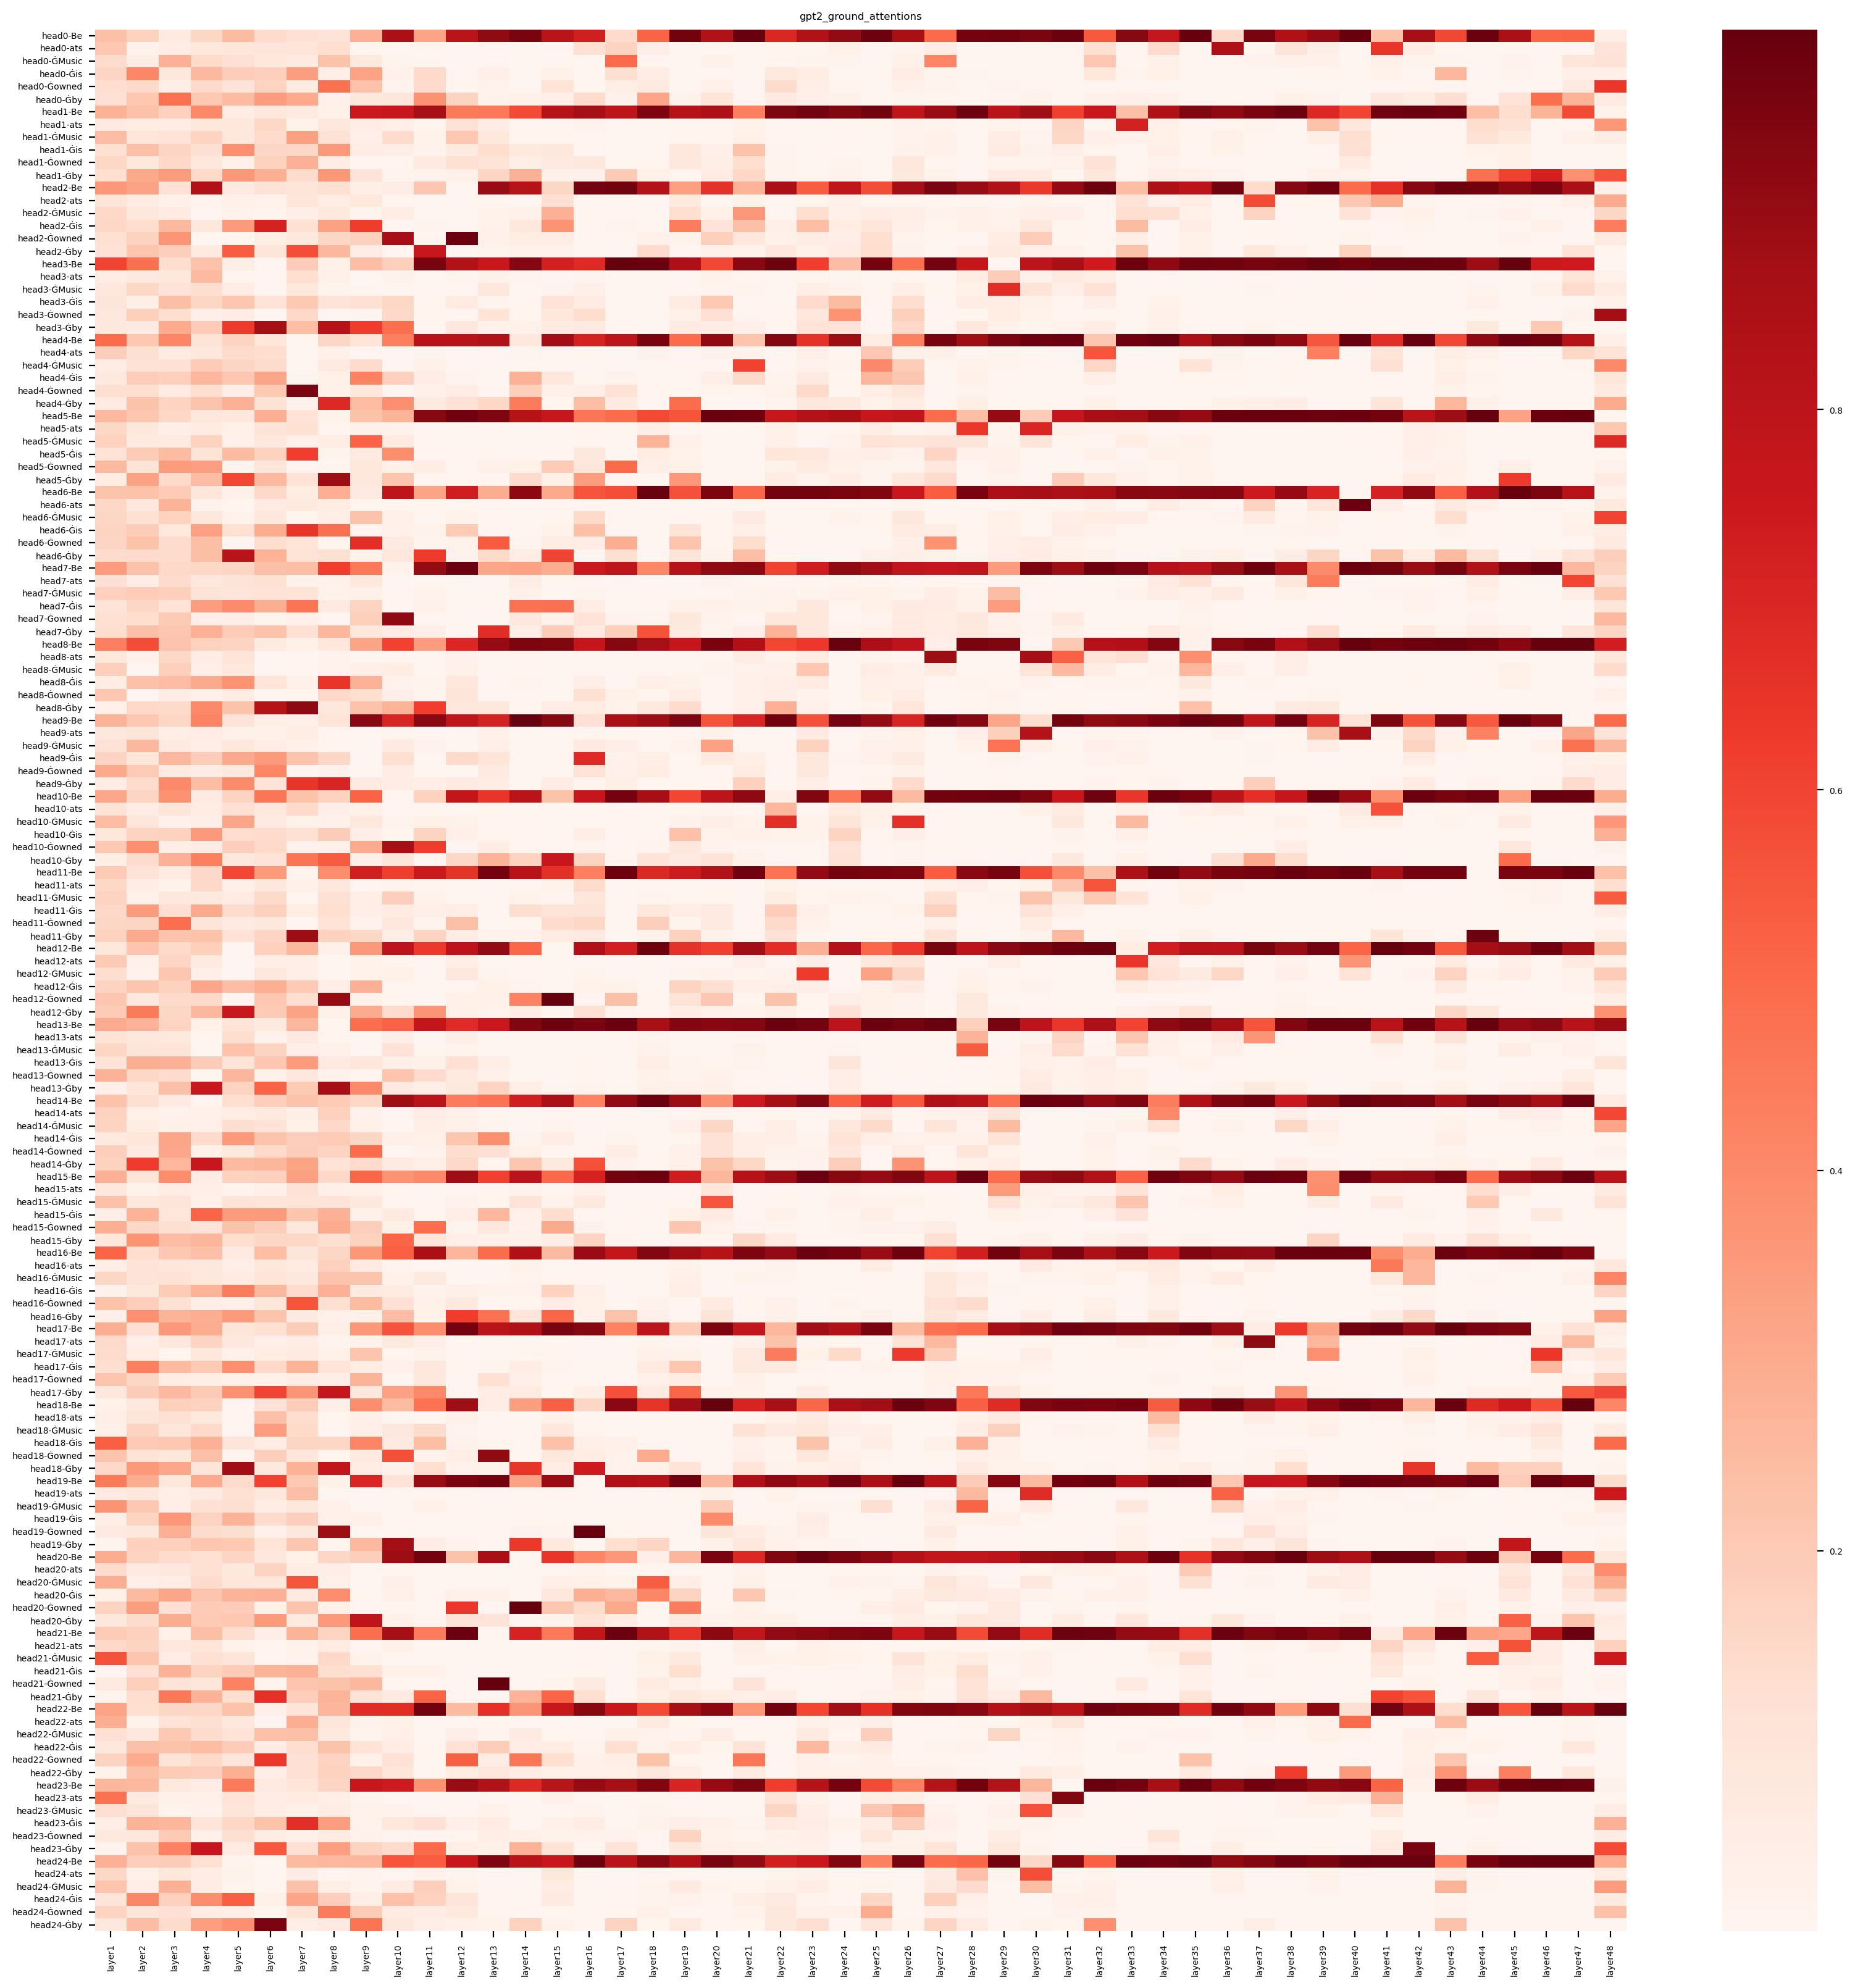

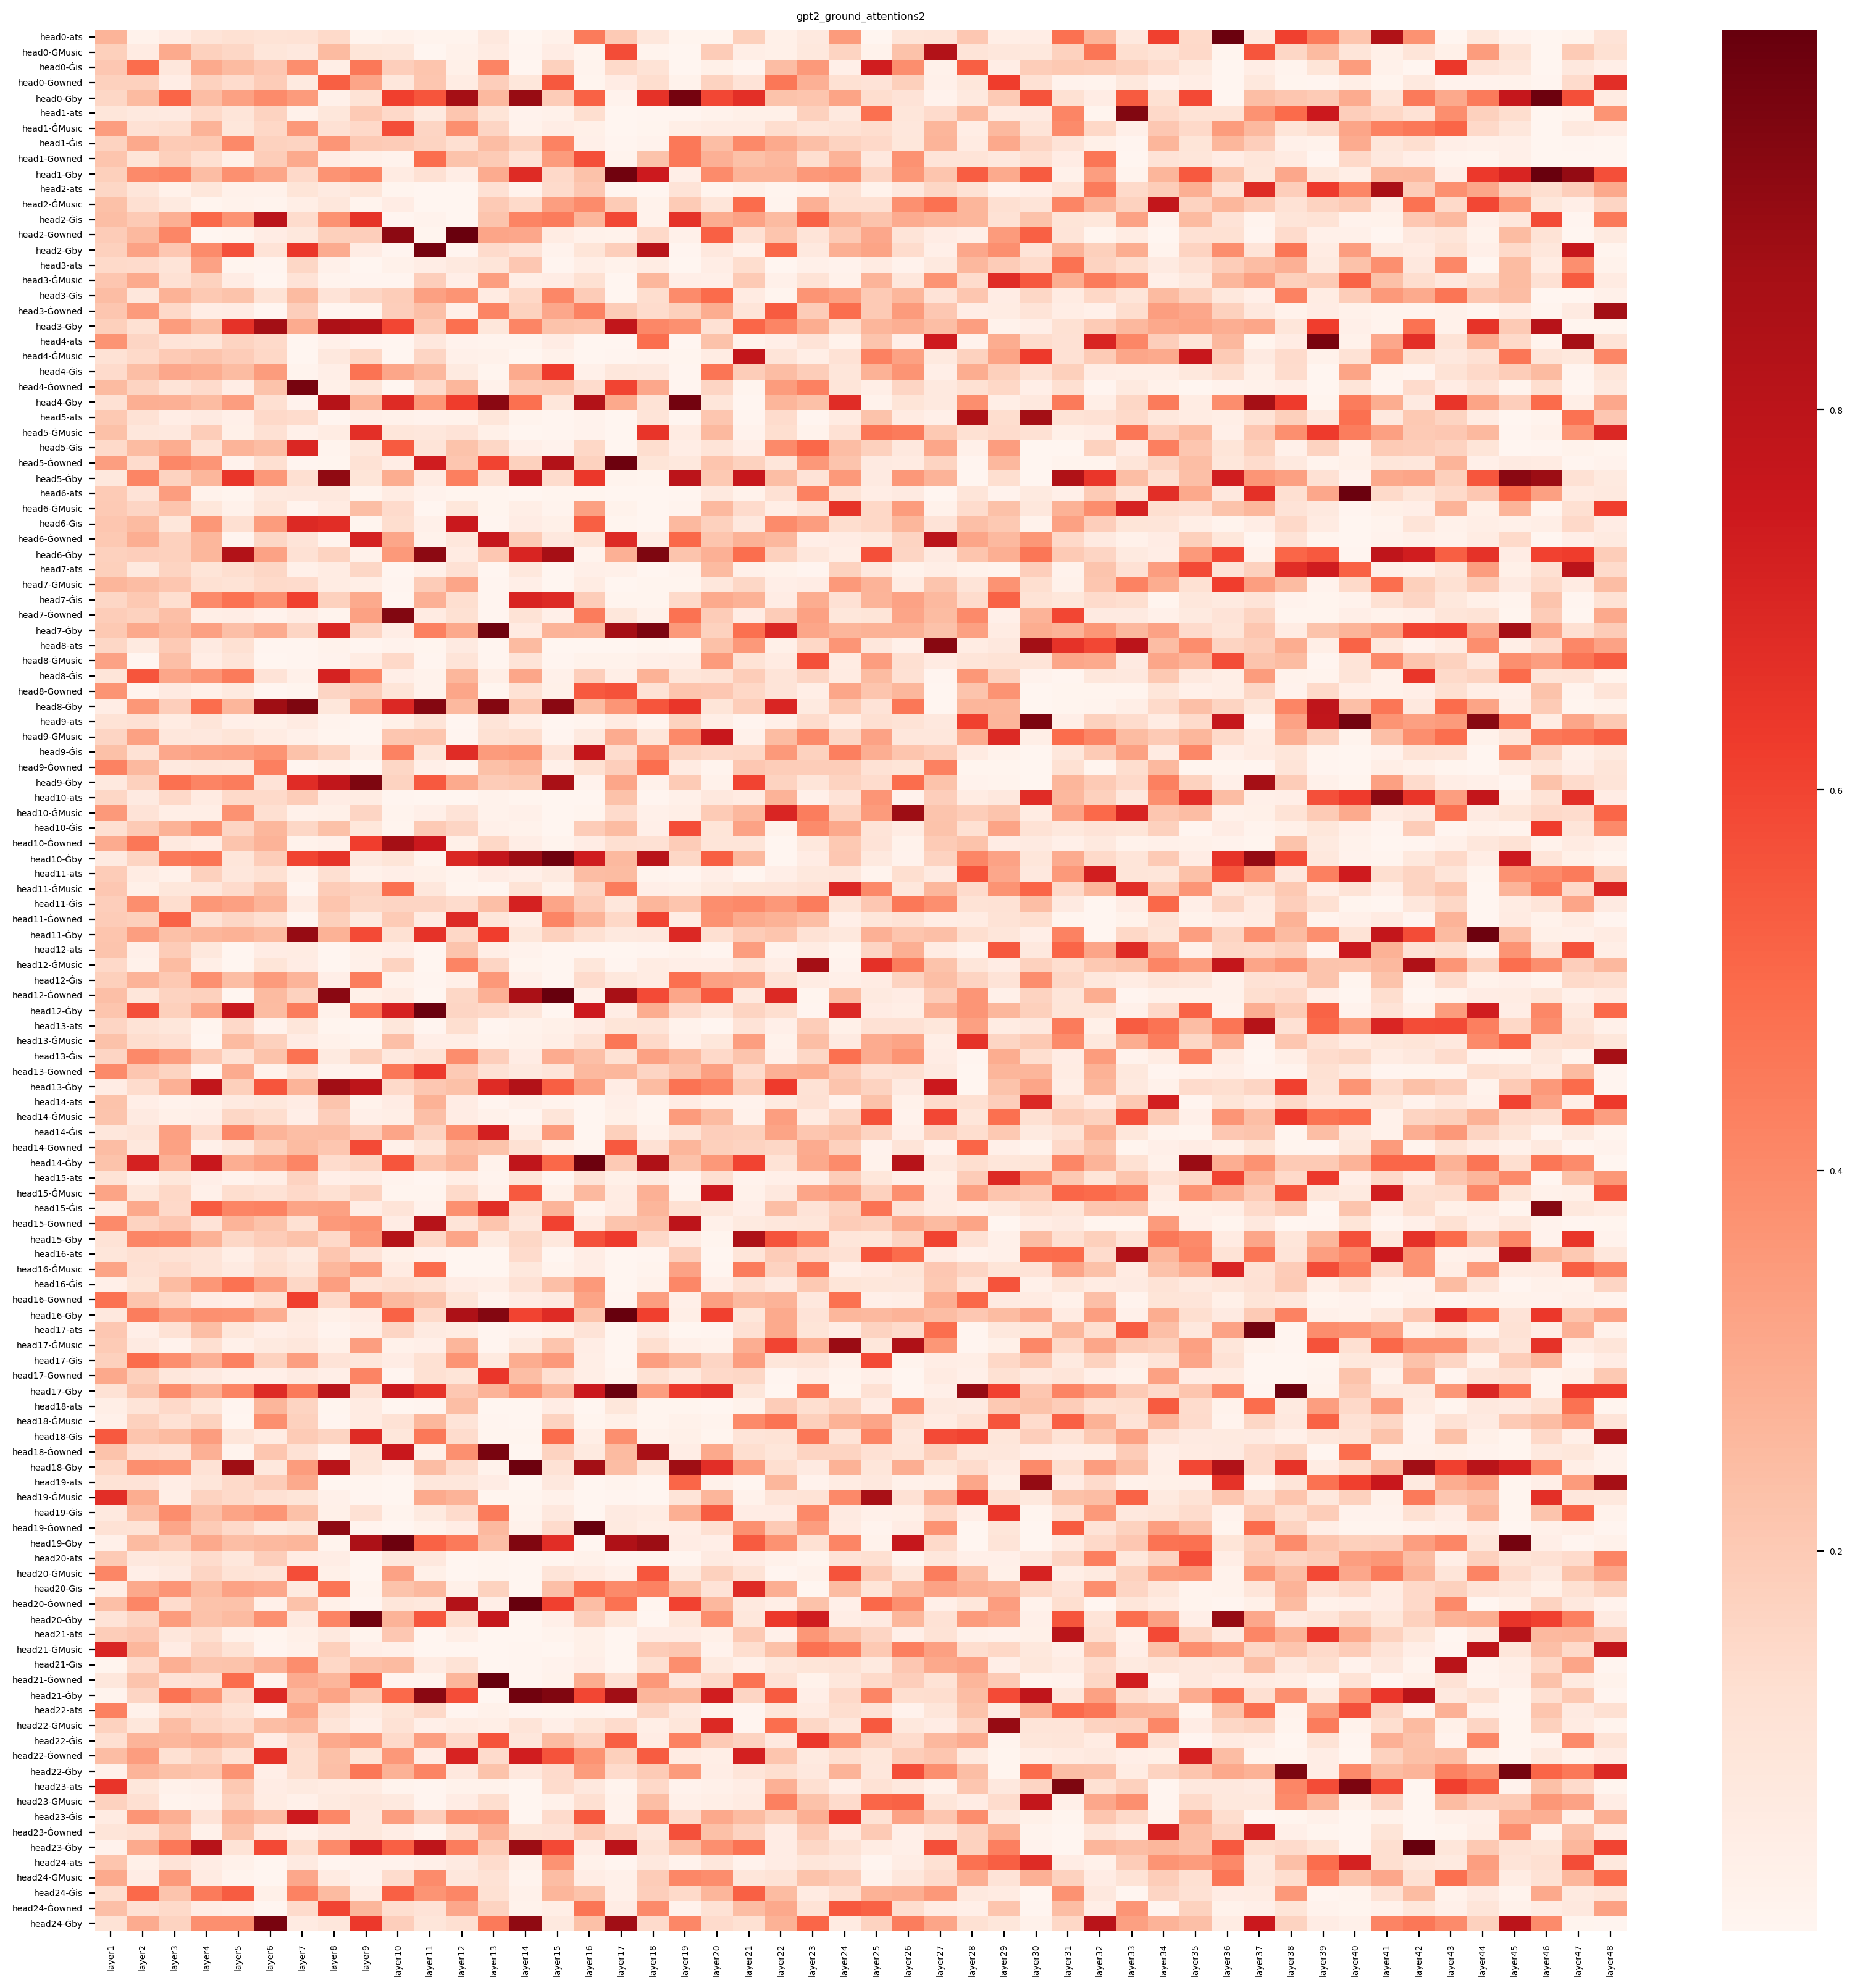

In [13]:
model_name = 'openai-community/gpt2-xl'
draw()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:1
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:1
name:transfor

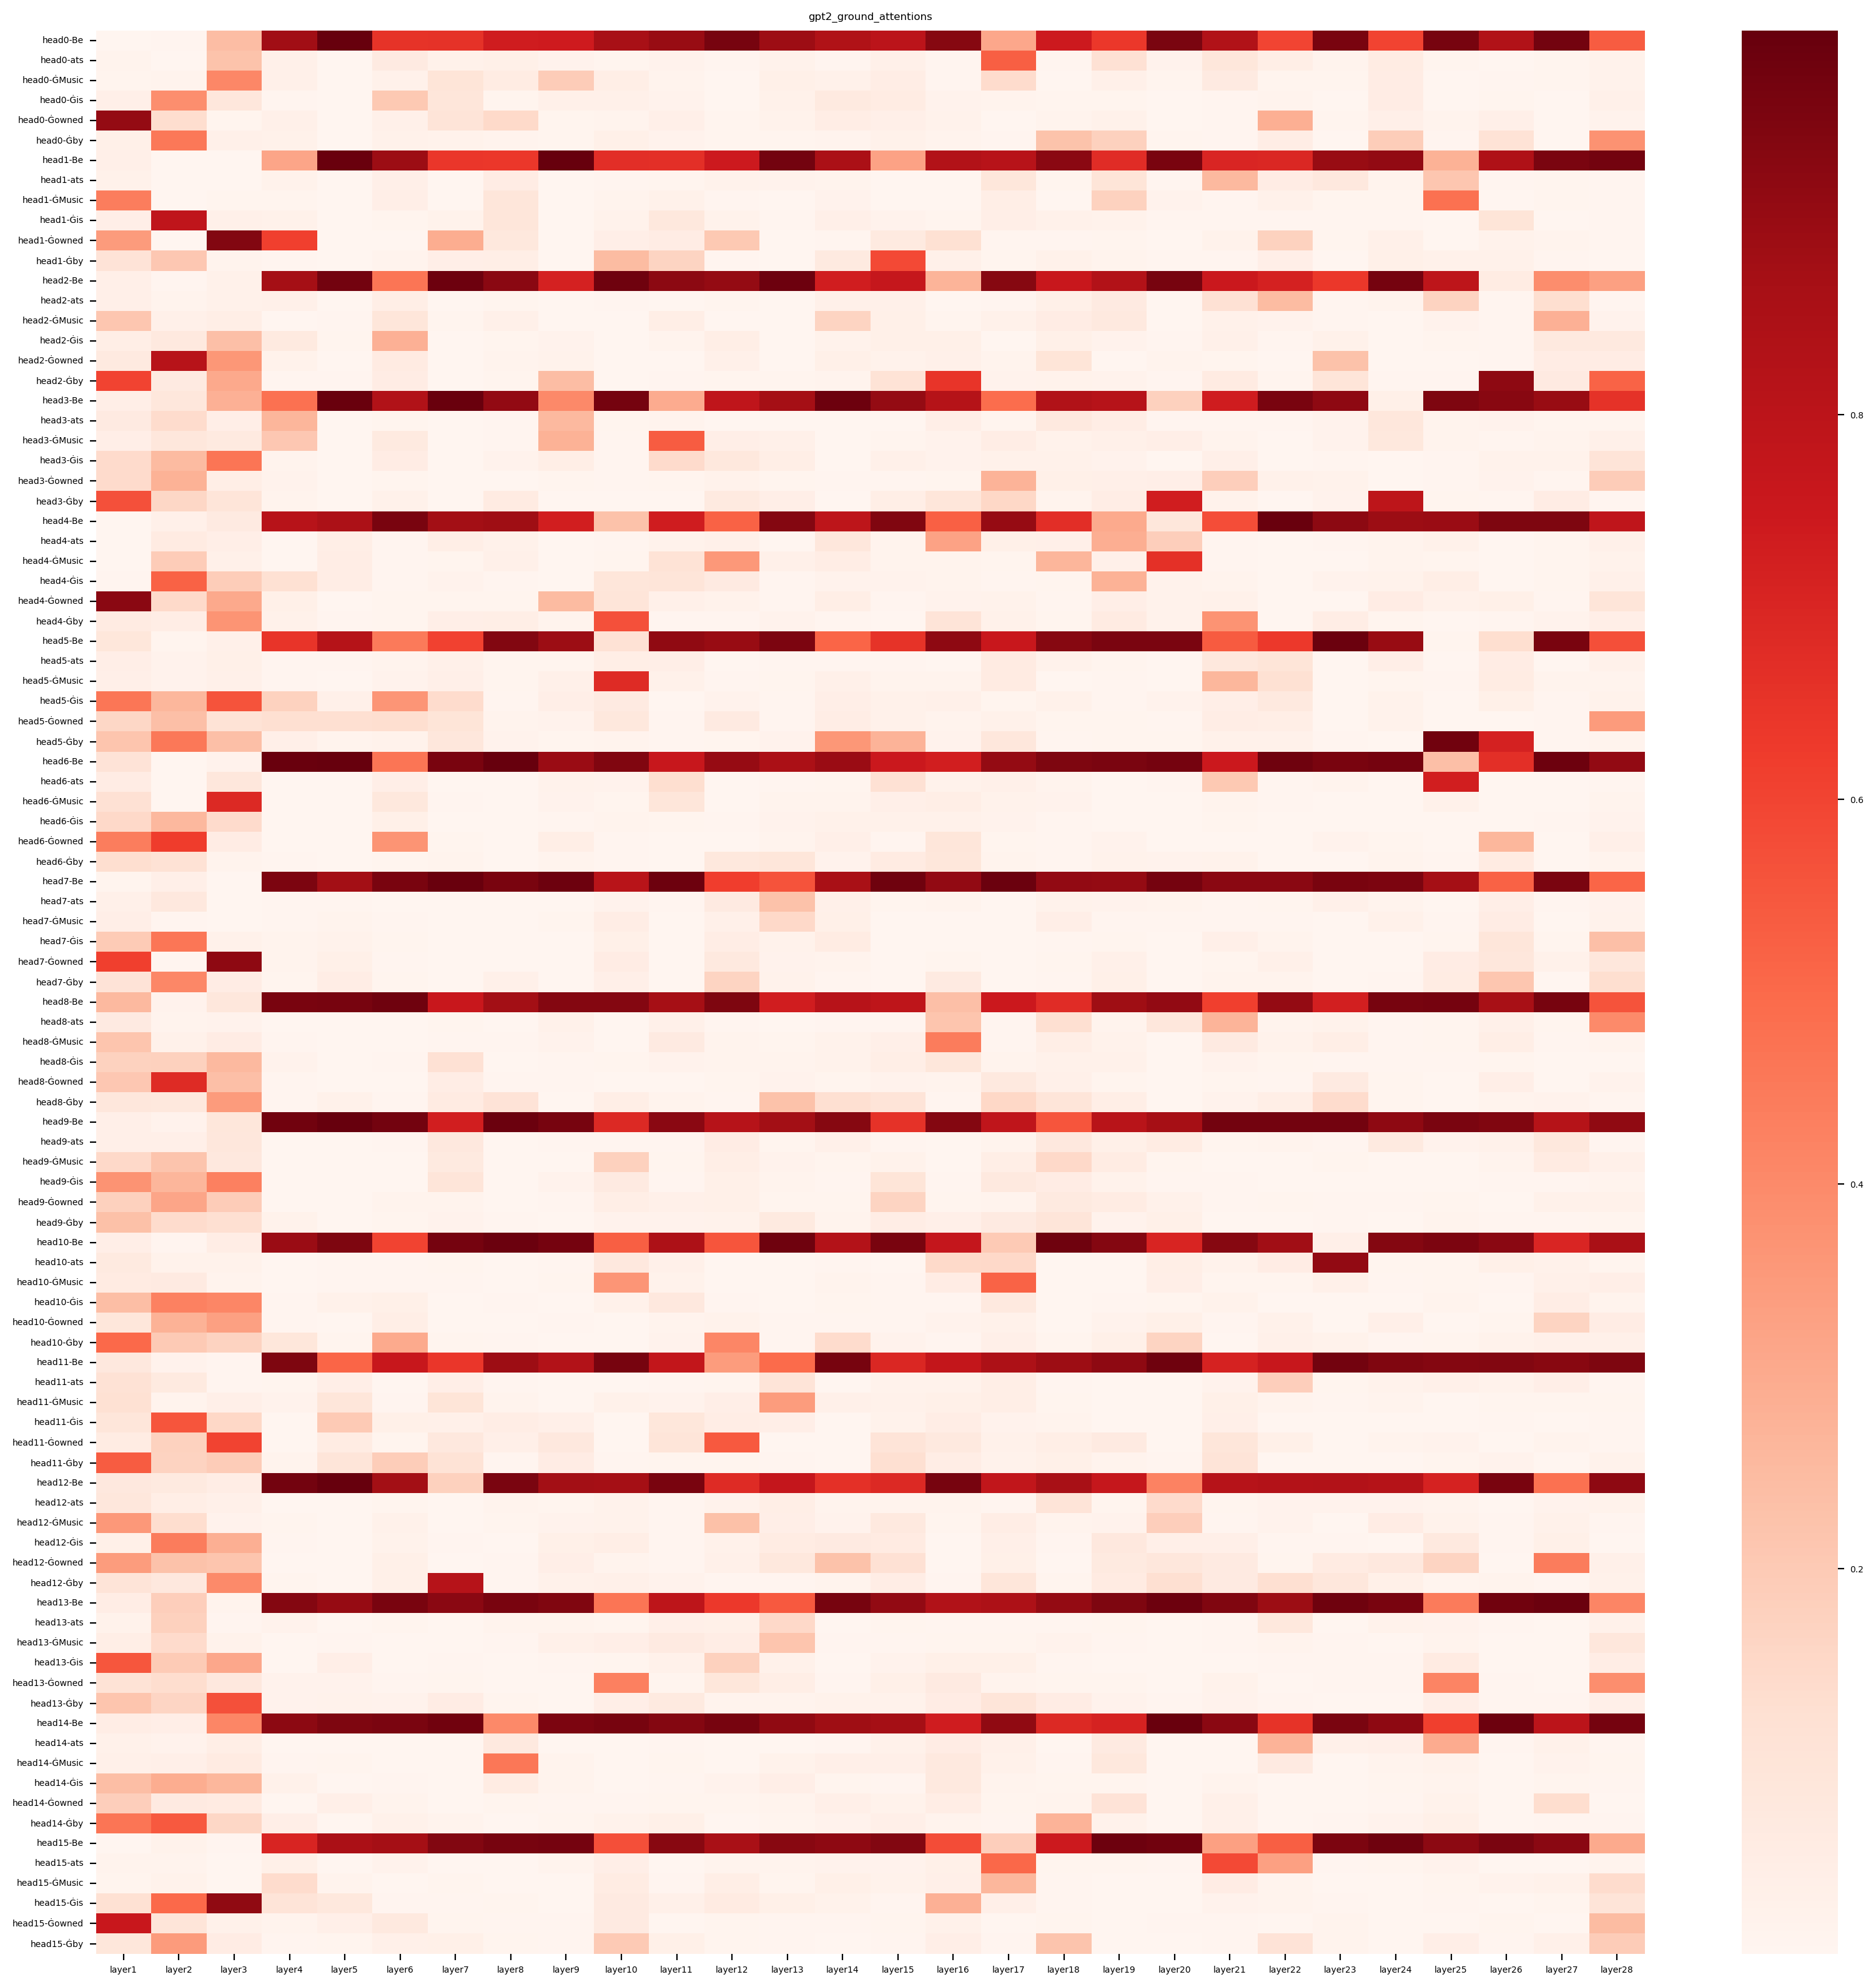

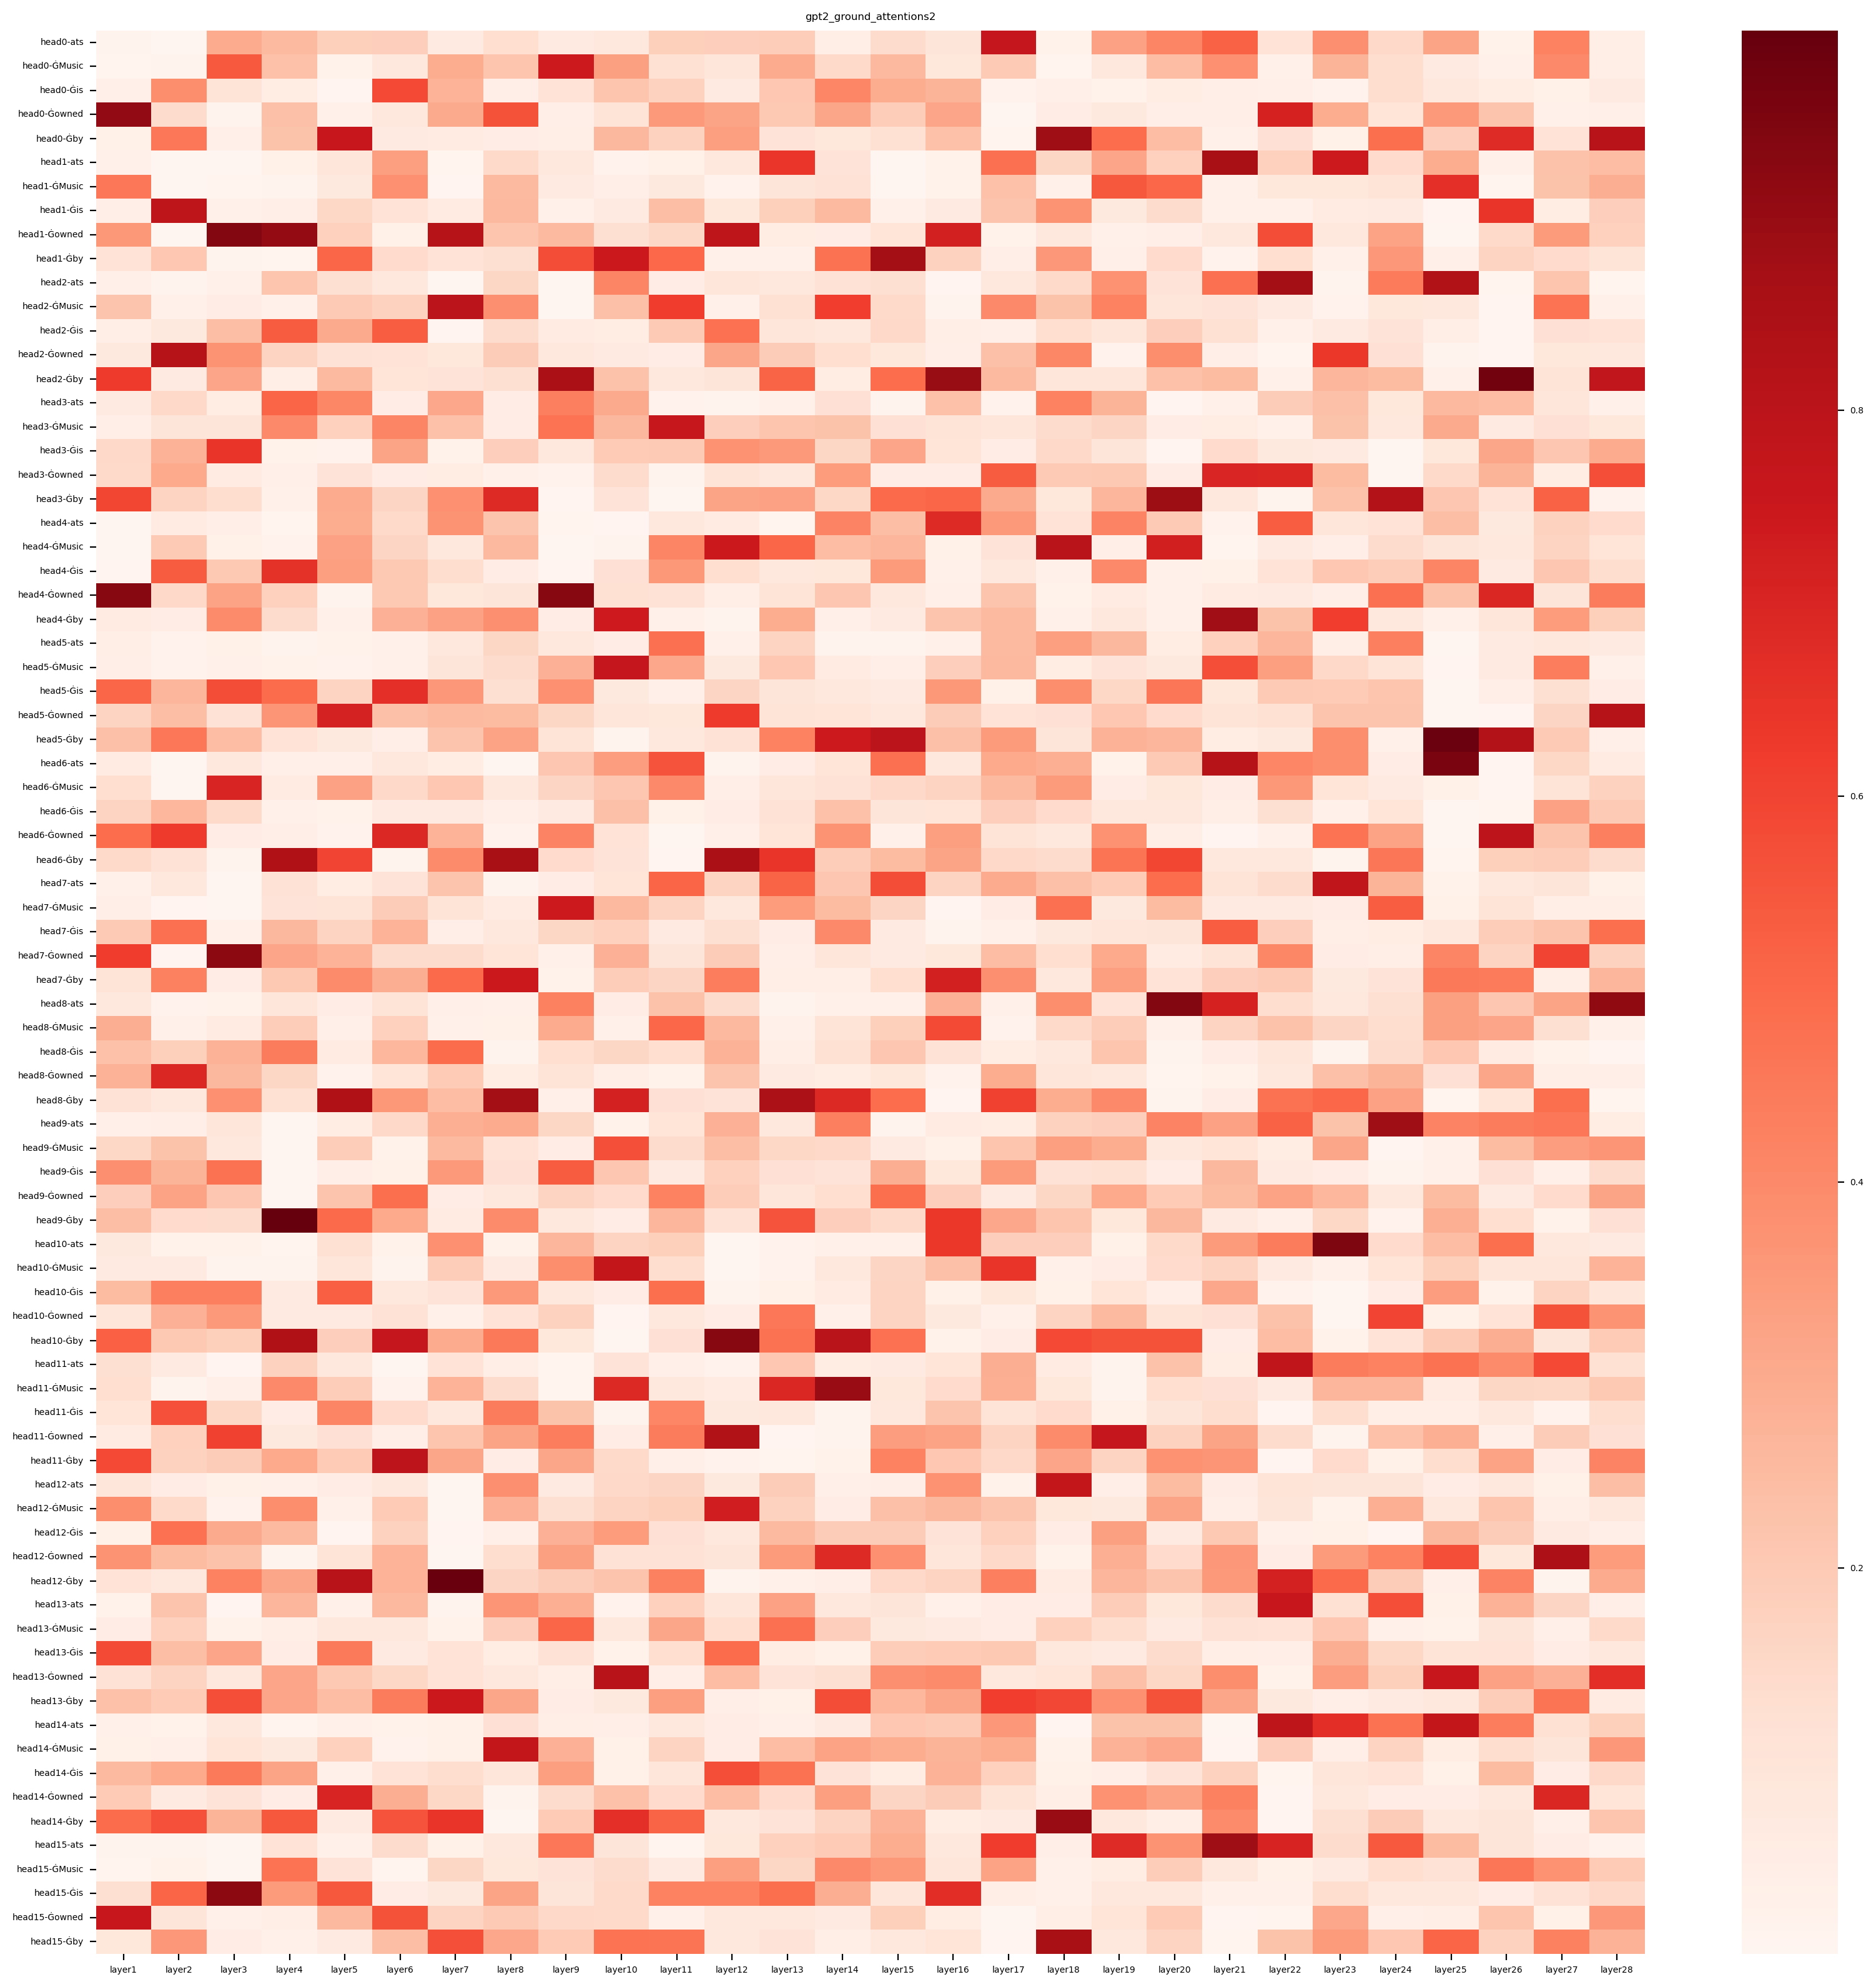

In [3]:
model_name = 'EleutherAI/gpt-j-6b' 
draw()

### hidden state dist

In [6]:
def draw_each_token_dist():
    # 查看每一个token与其他token的l2距离
    # print(hidden_state)
    x_ticks = [f"layer{i + 1}" for i in range(n_layers)]
    y_ticks = [f"{c}" for i, c in enumerate(codes)]
    for token_id in range(len(codes)):
        last_token_hidden_state = hidden_state[:,token_id,:][:,np.newaxis,:]
        dist = np.linalg.norm(last_token_hidden_state - hidden_state, axis=2)
        #print(f"difference2:\n{dist}")
        plt_heatMap_sns(dist,title=f"the_{token_id}_token_dist", x_ticks=y_ticks, y_ticks=x_ticks, show=True, save_path=save_path)
        
# 获取其他token与第一个token之间的距离
def get_first_token(prompt, model, token_id=0):
    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)   
    hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()
    return hidden_state[:,token_id,:]

def print_each_token_dist():
    hidden_state = get_first_token(prompt=prompt, model=model)
    for i, c in enumerate(codes):
        if i == 0: continue
        print(f"__________token_id:{i},{c}________________")
        hidden_state2 = get_first_token(prompt=prompt, model=model, token_id=i)
        dist = np.linalg.norm(hidden_state - hidden_state2, axis=1)
        print(f"dist between token0 and token{i}:\n{dist}")
        if i != len(codes)-1:
            hidden_state3 = get_first_token(prompt=prompt, model=model, token_id=i+1)
            dist = np.linalg.norm(hidden_state3 - hidden_state2, axis=1)
            print(f"dist between token{i} and token{i+1}:\n{dist}")

#### gpt-j-6b

In [3]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                            is_linear=is_linear)
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.n_layer
n_heads = model_config.n_head
check_token_id = -1

prompt = 'The Space Needle is in downtown' # 'Beats Music is owned by', 'The Space Needle is in downtown'
target_token = 'Apple'
save_path = os.path.join(sys.path[0], './result')
encoded_line = tokenizer.encode(prompt)
codes = tokenizer.convert_ids_to_tokens(encoded_line)


model.eval()
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)   
hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transfor

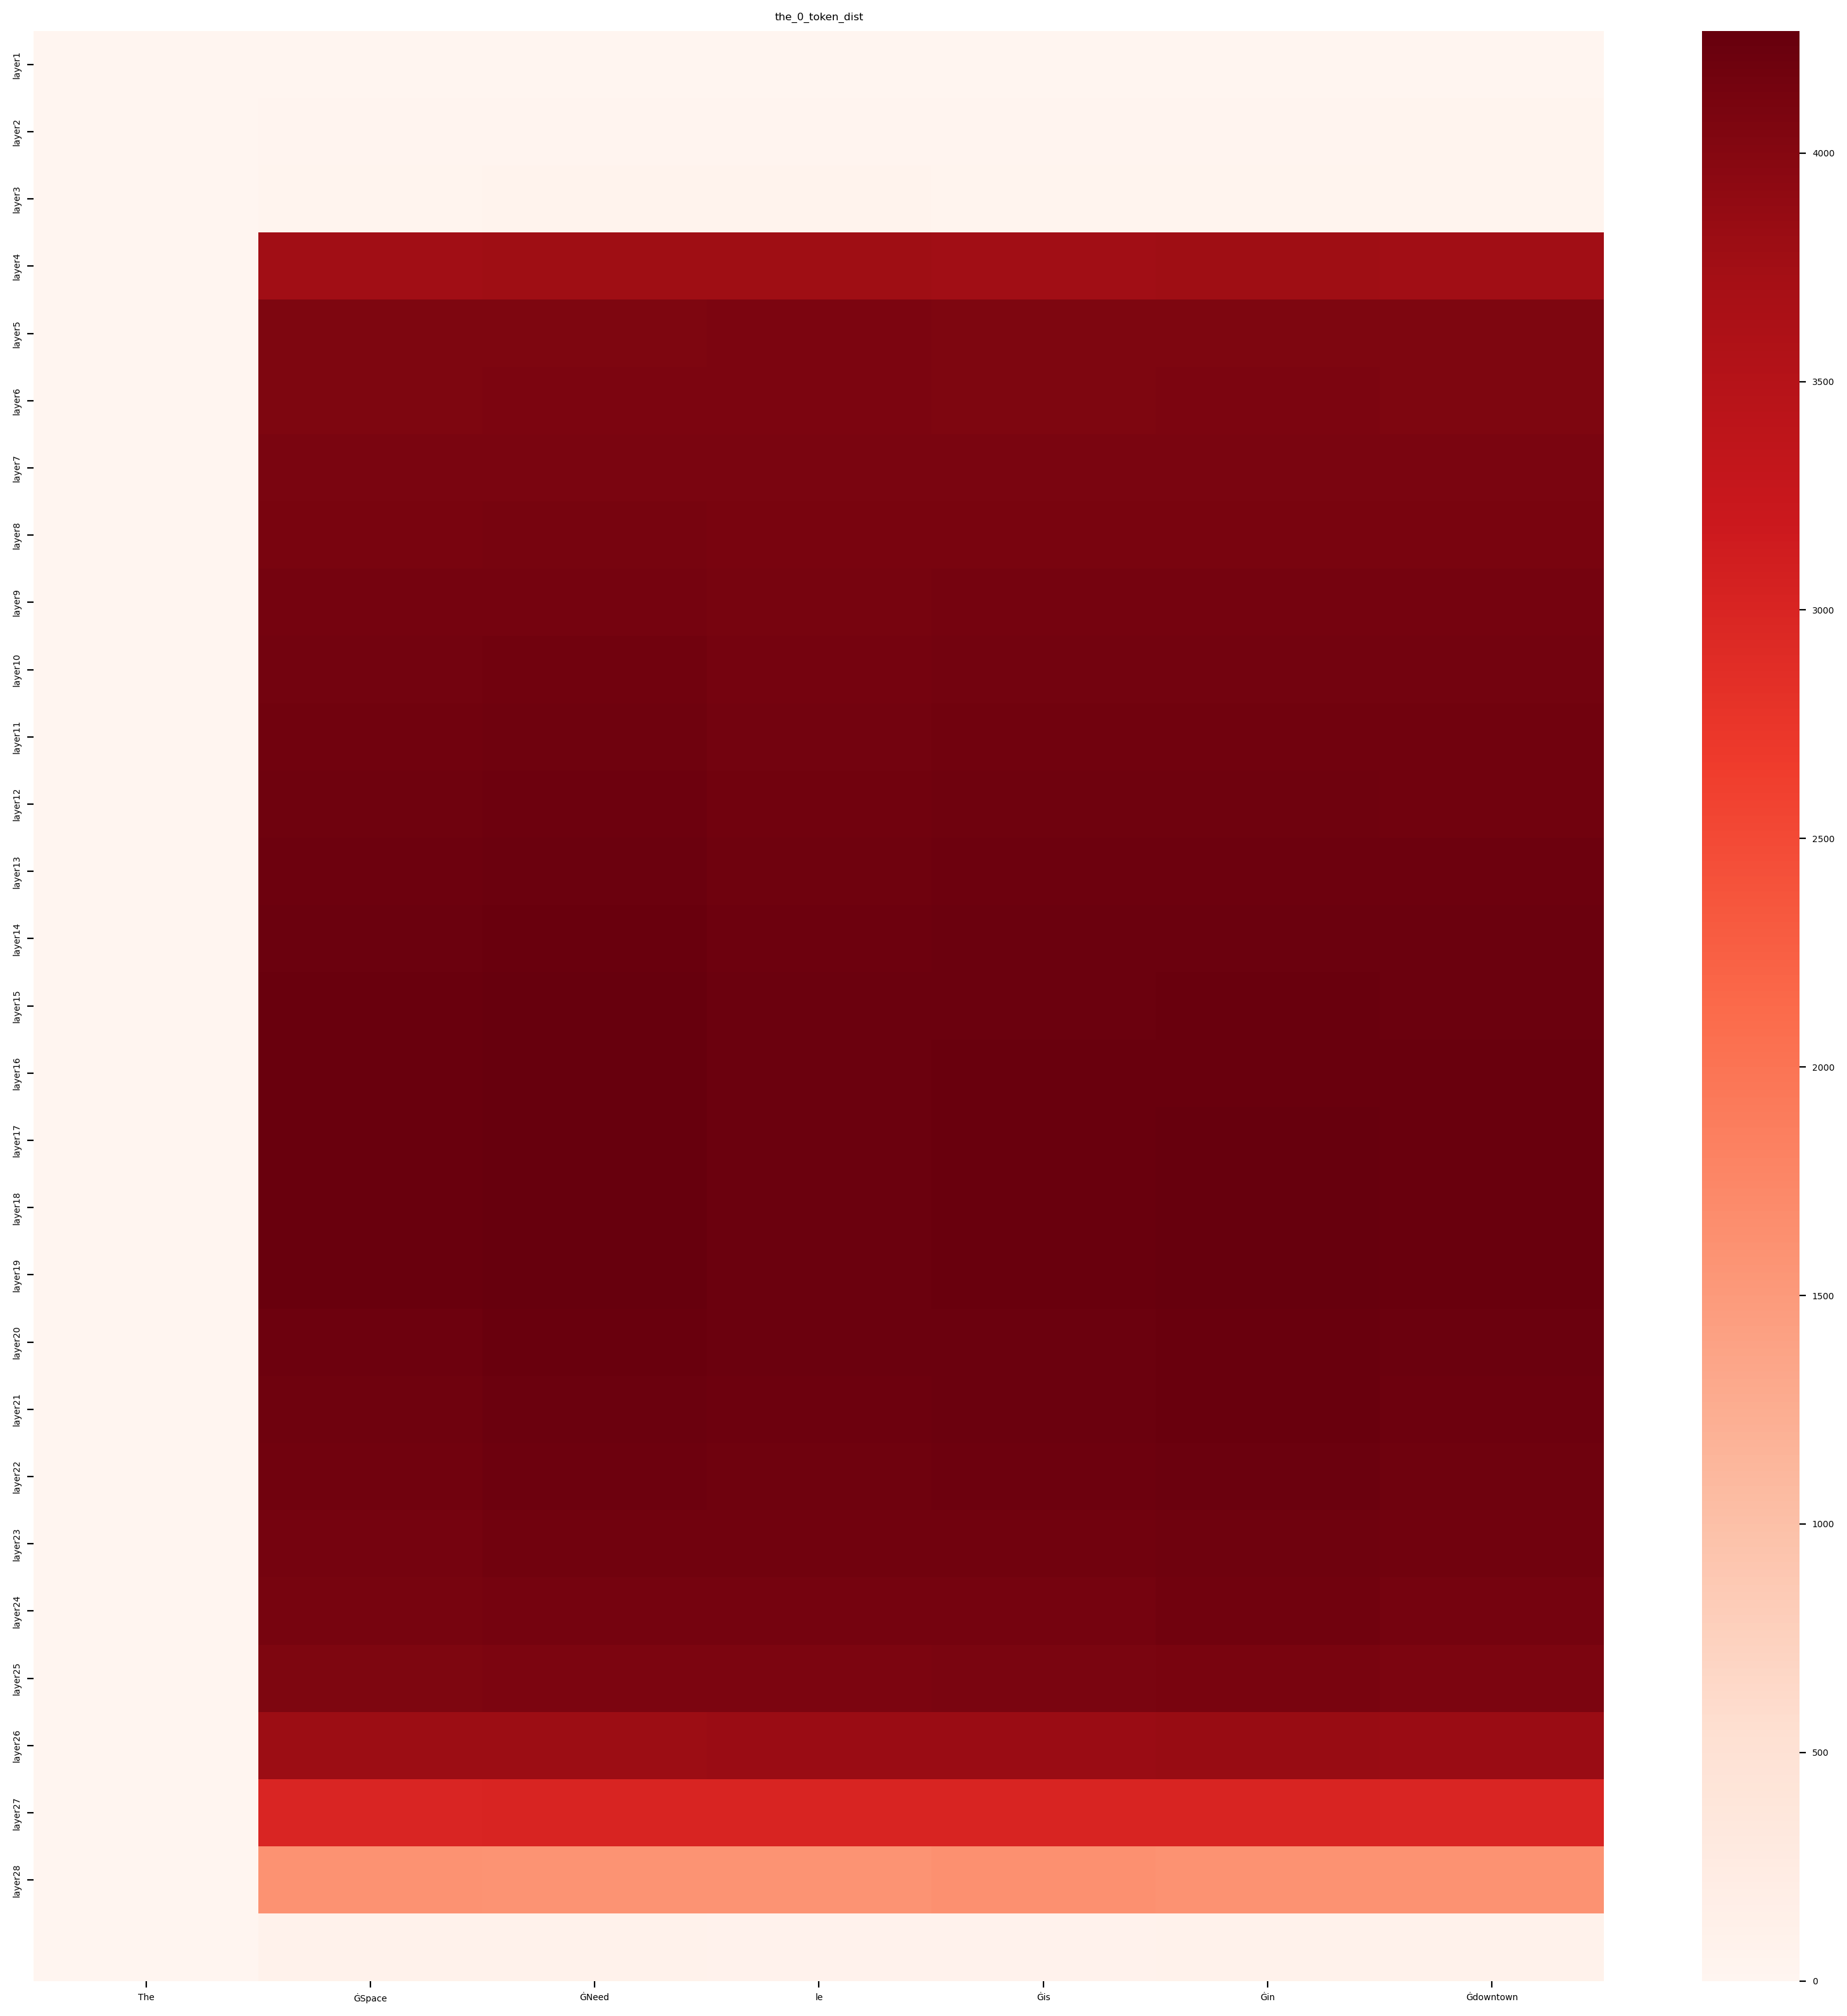

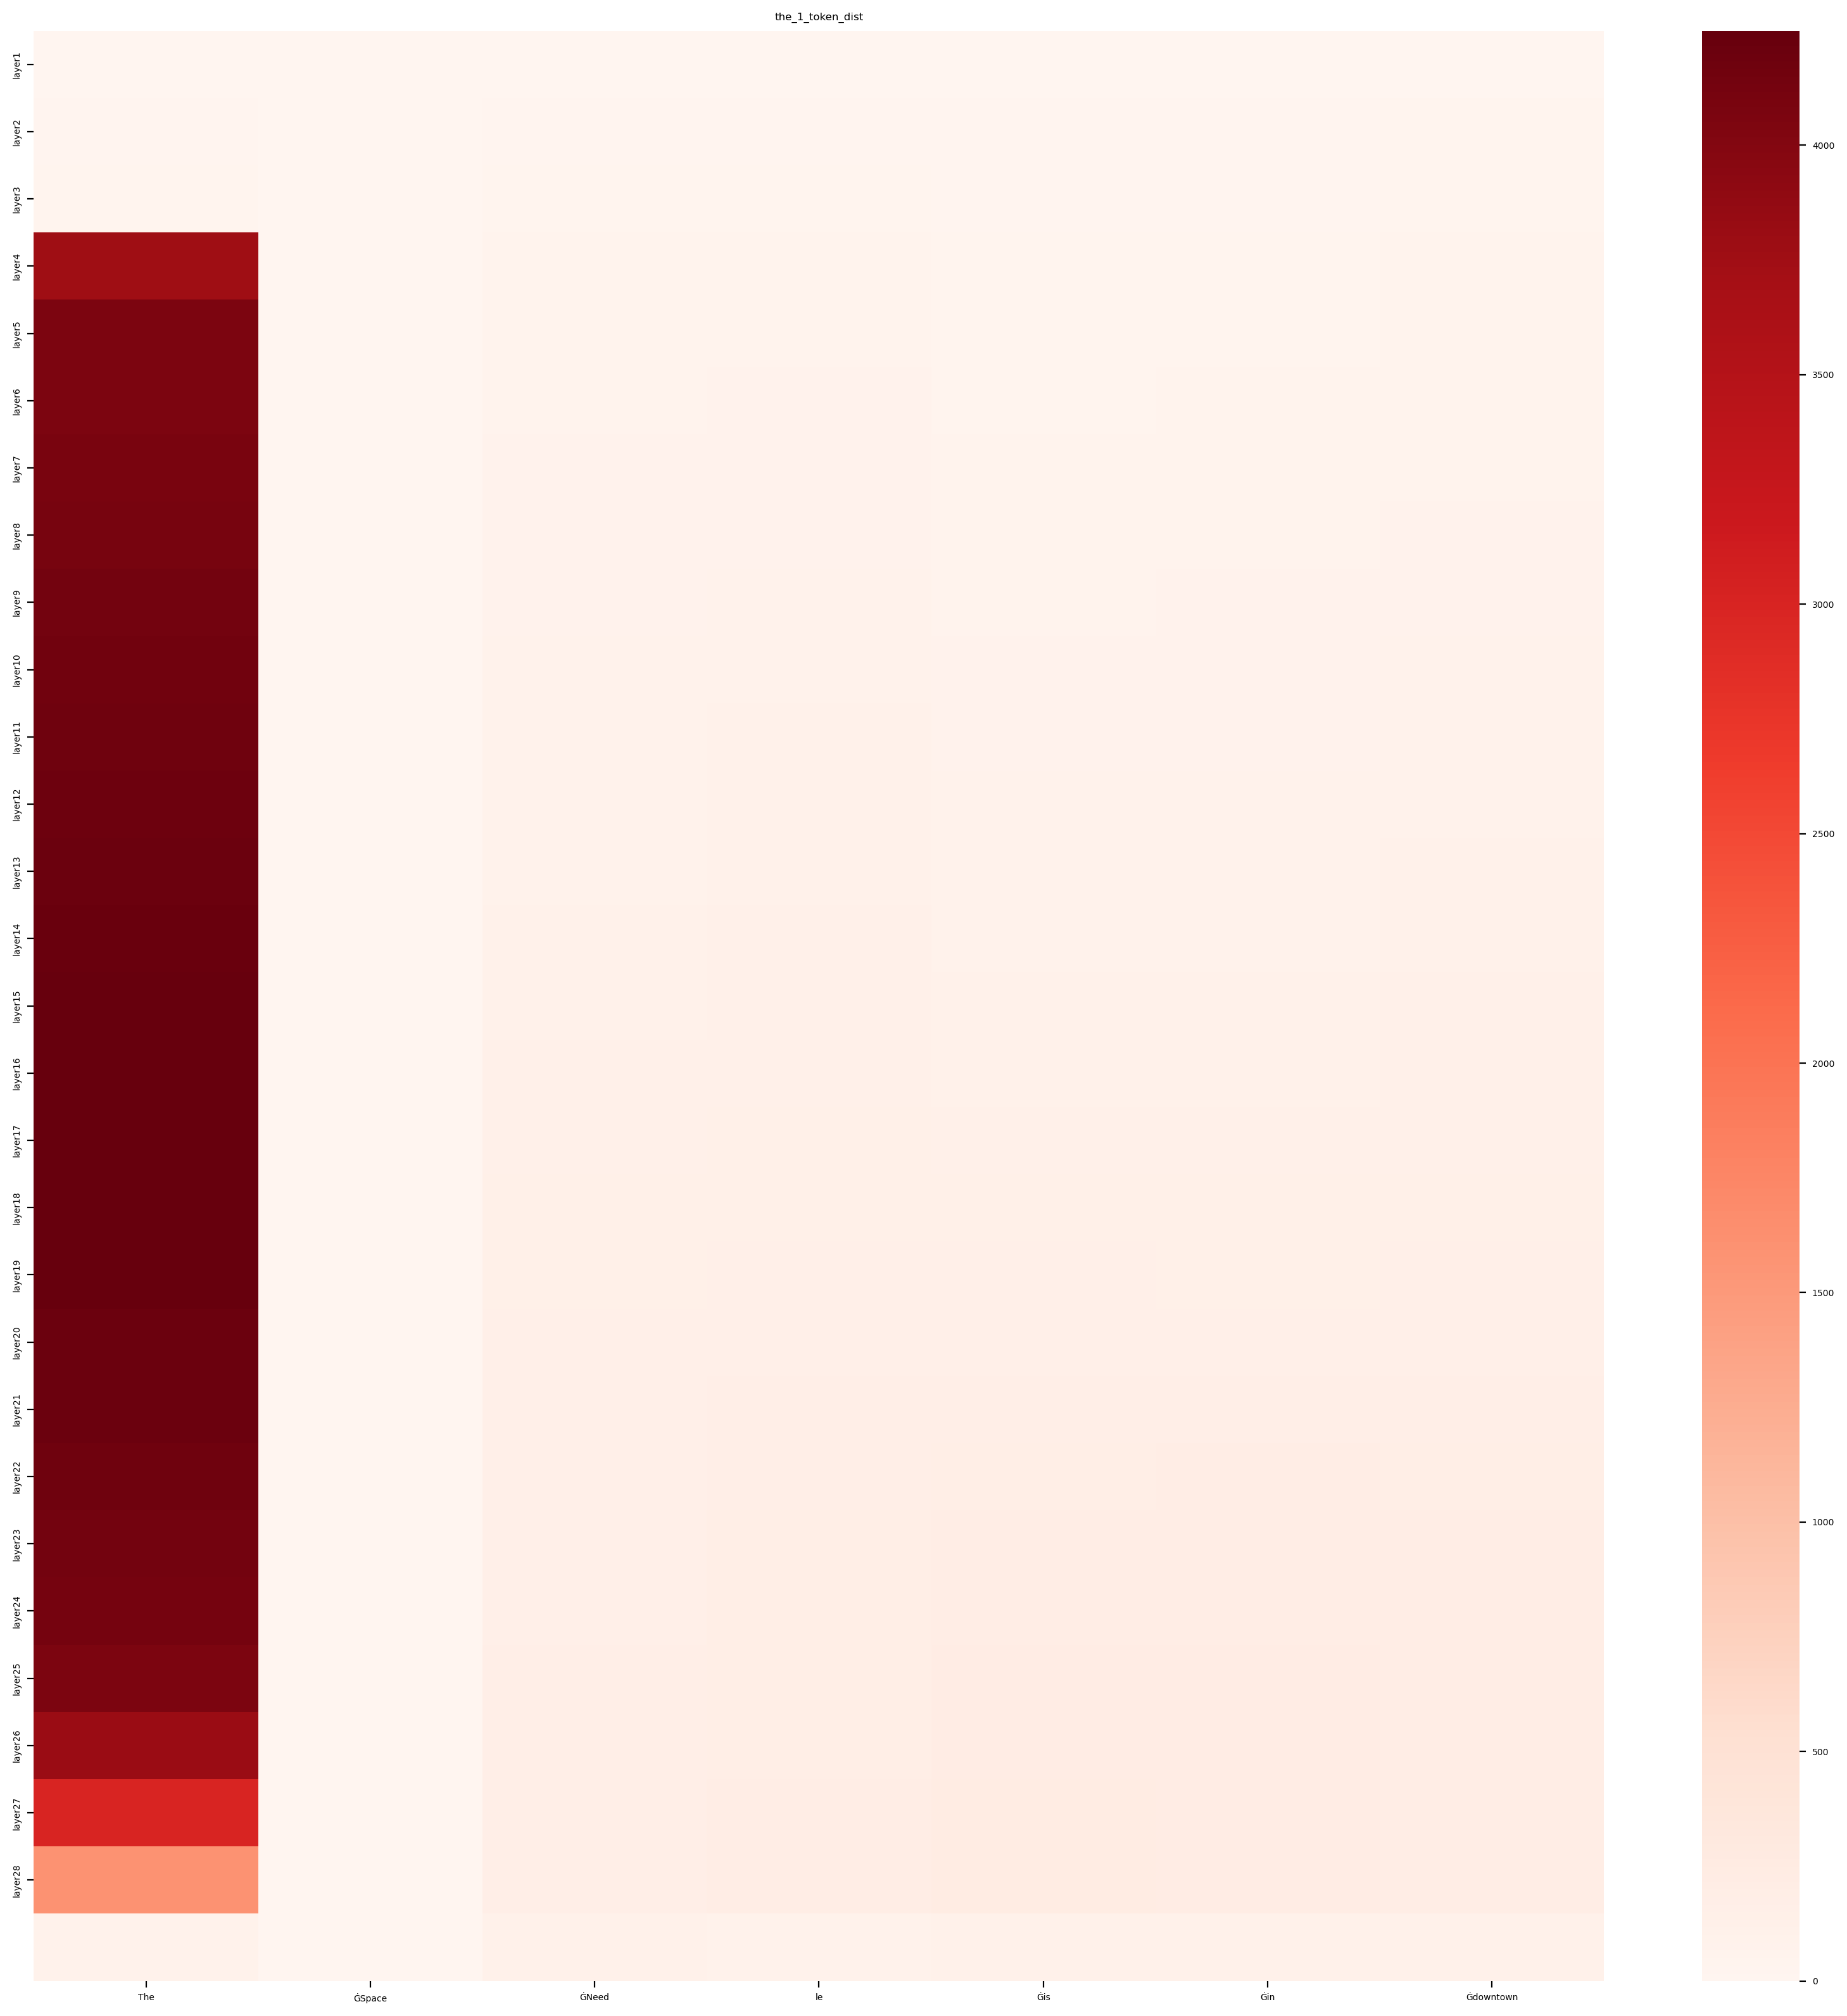

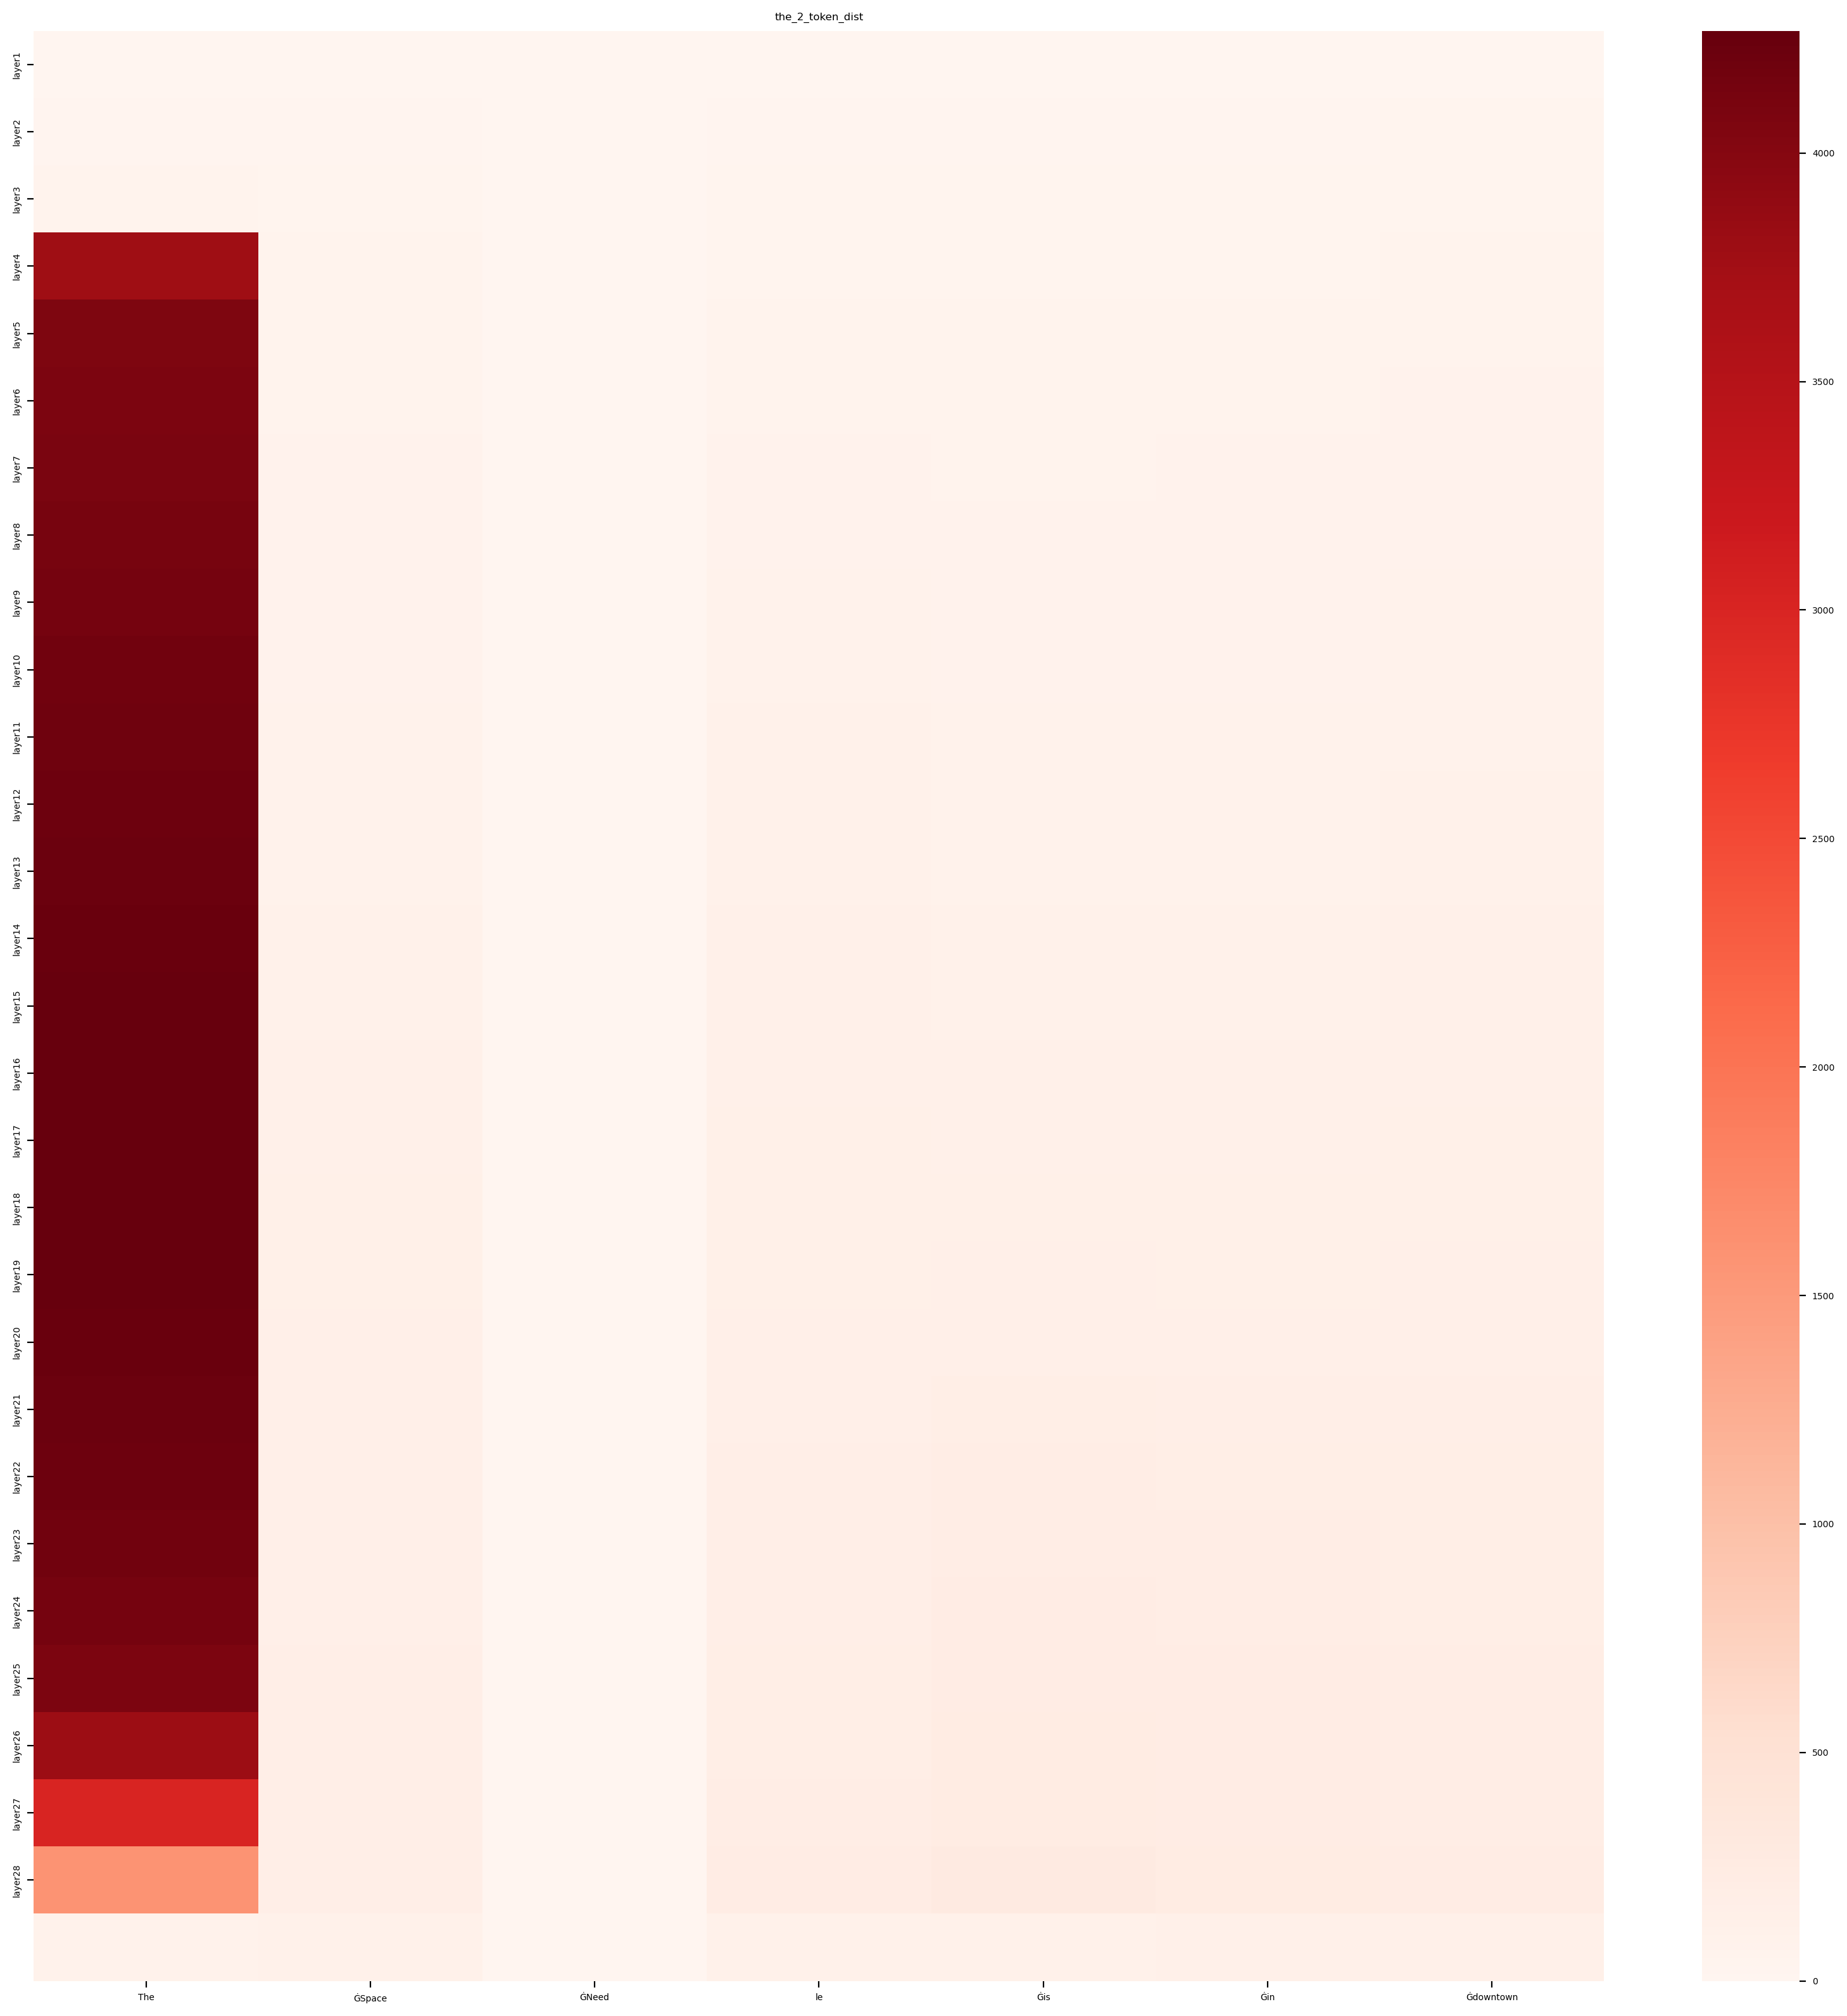

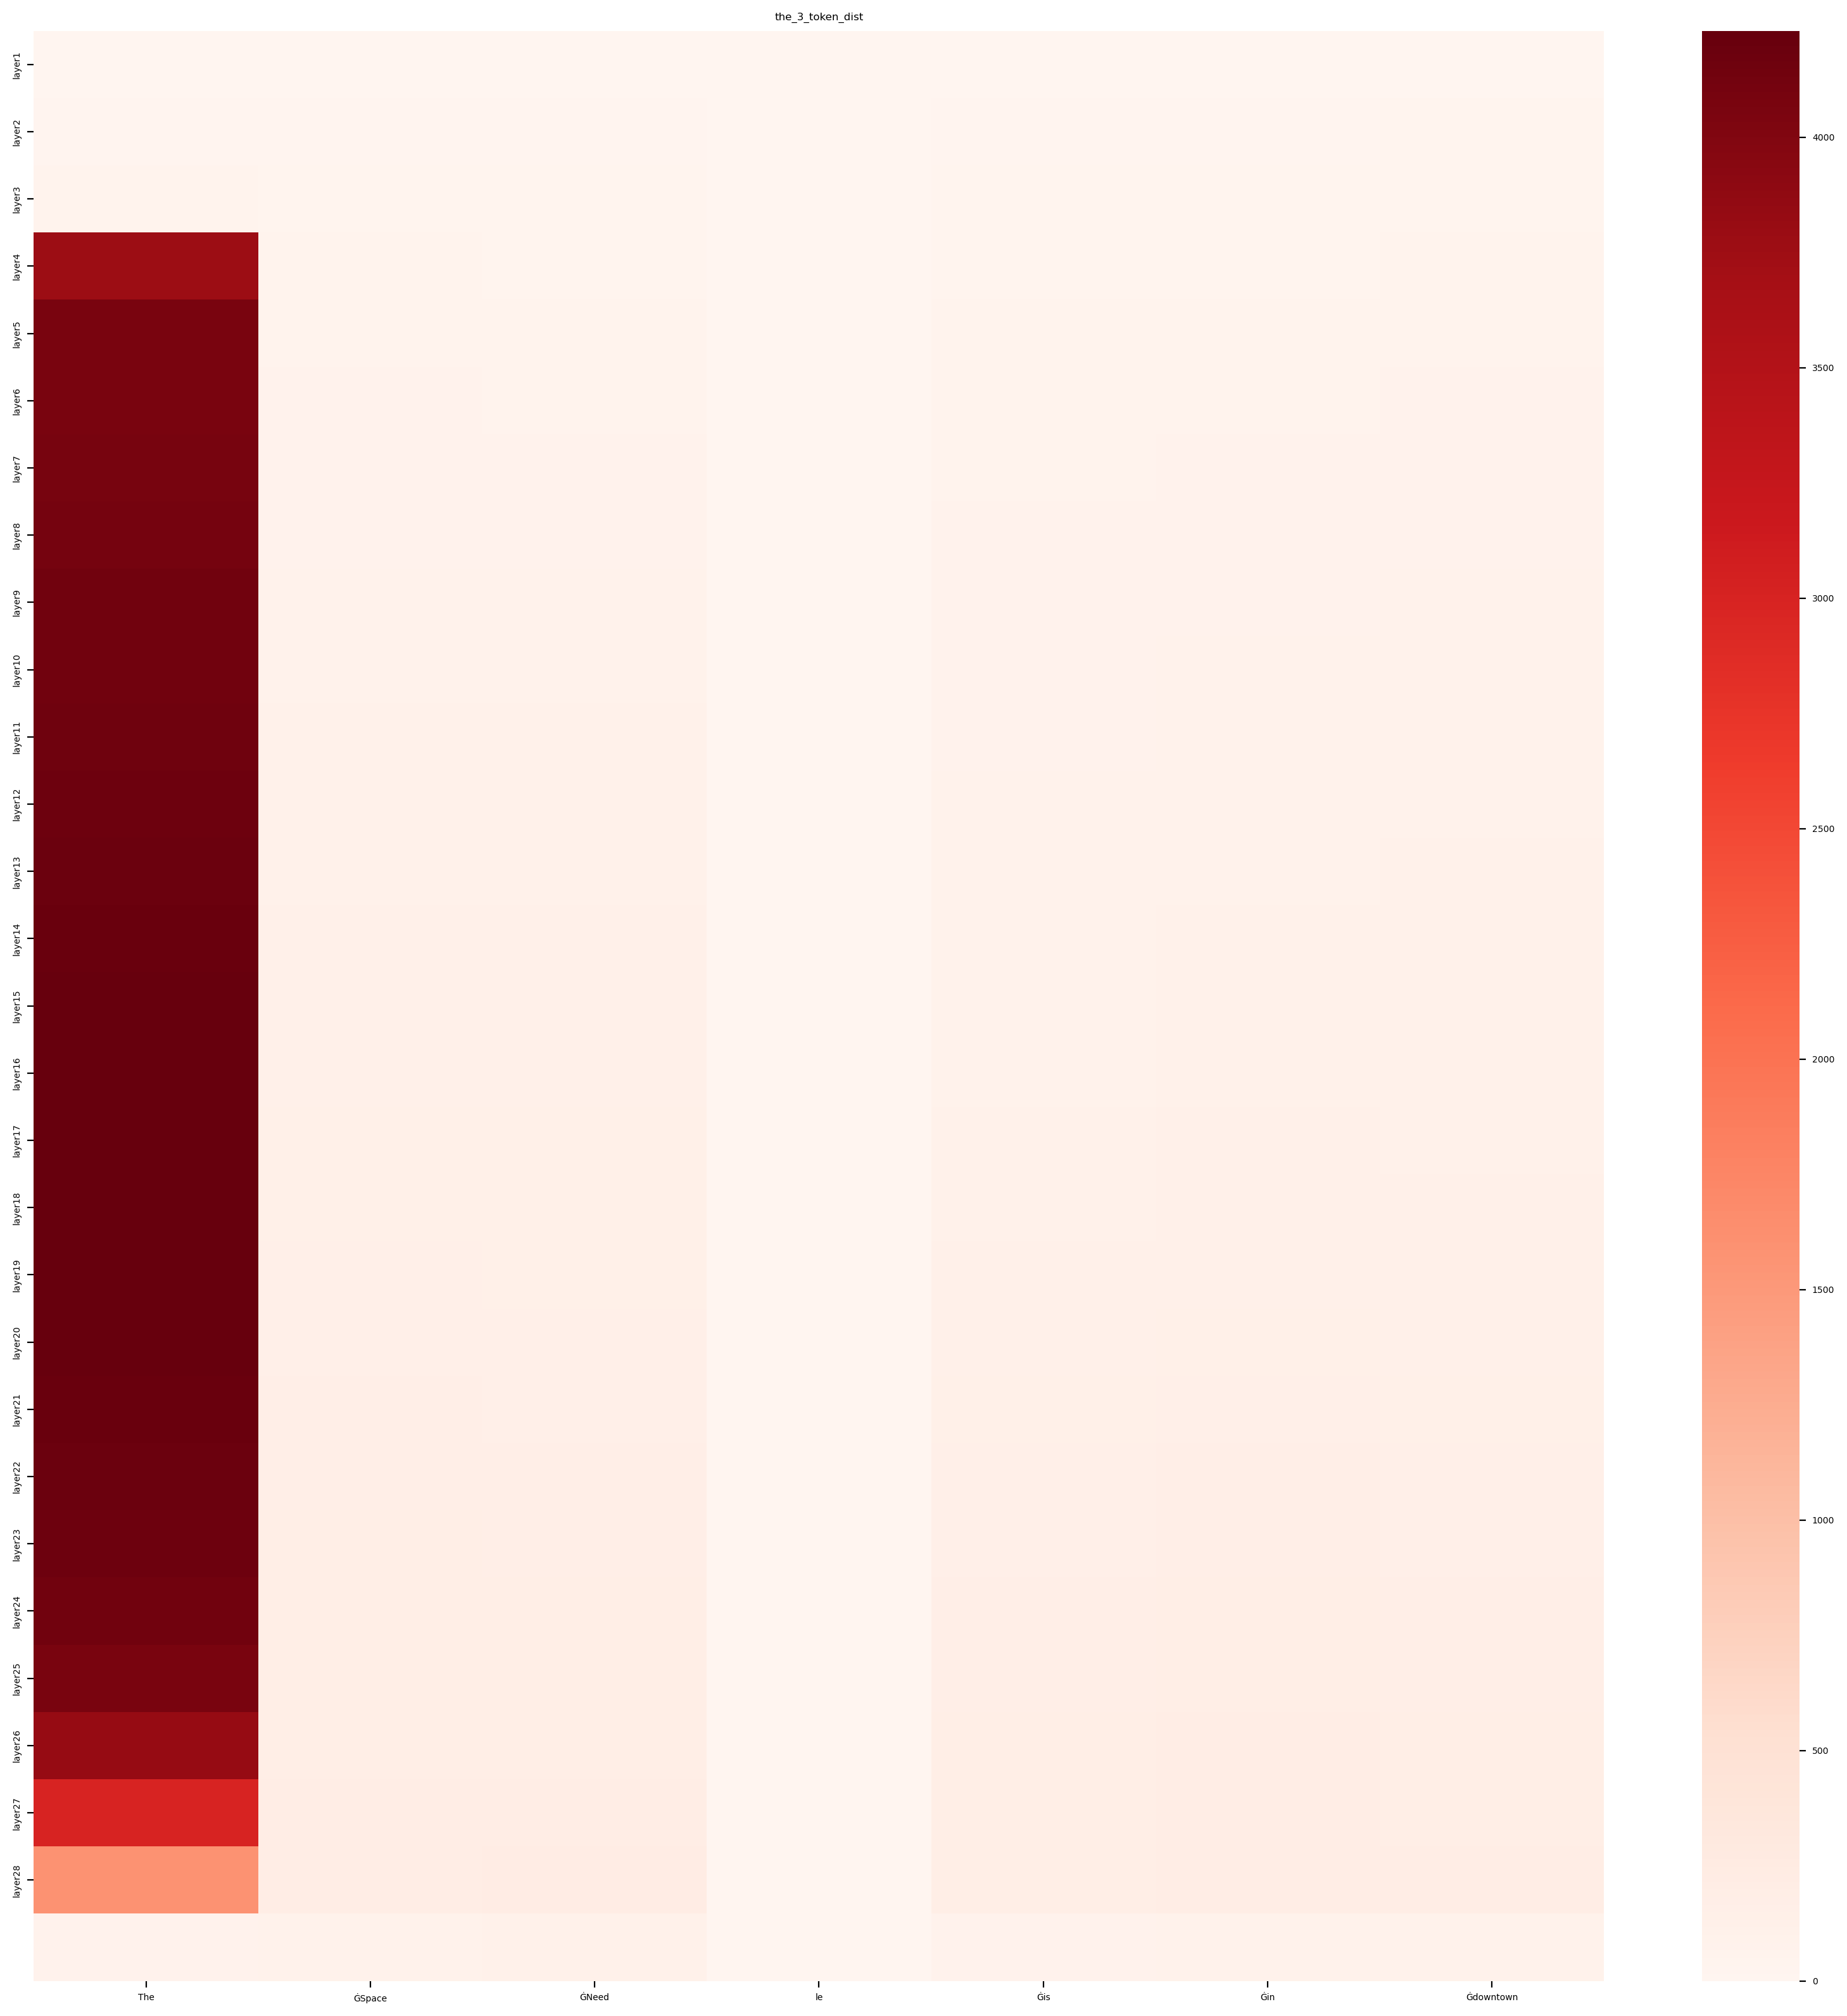

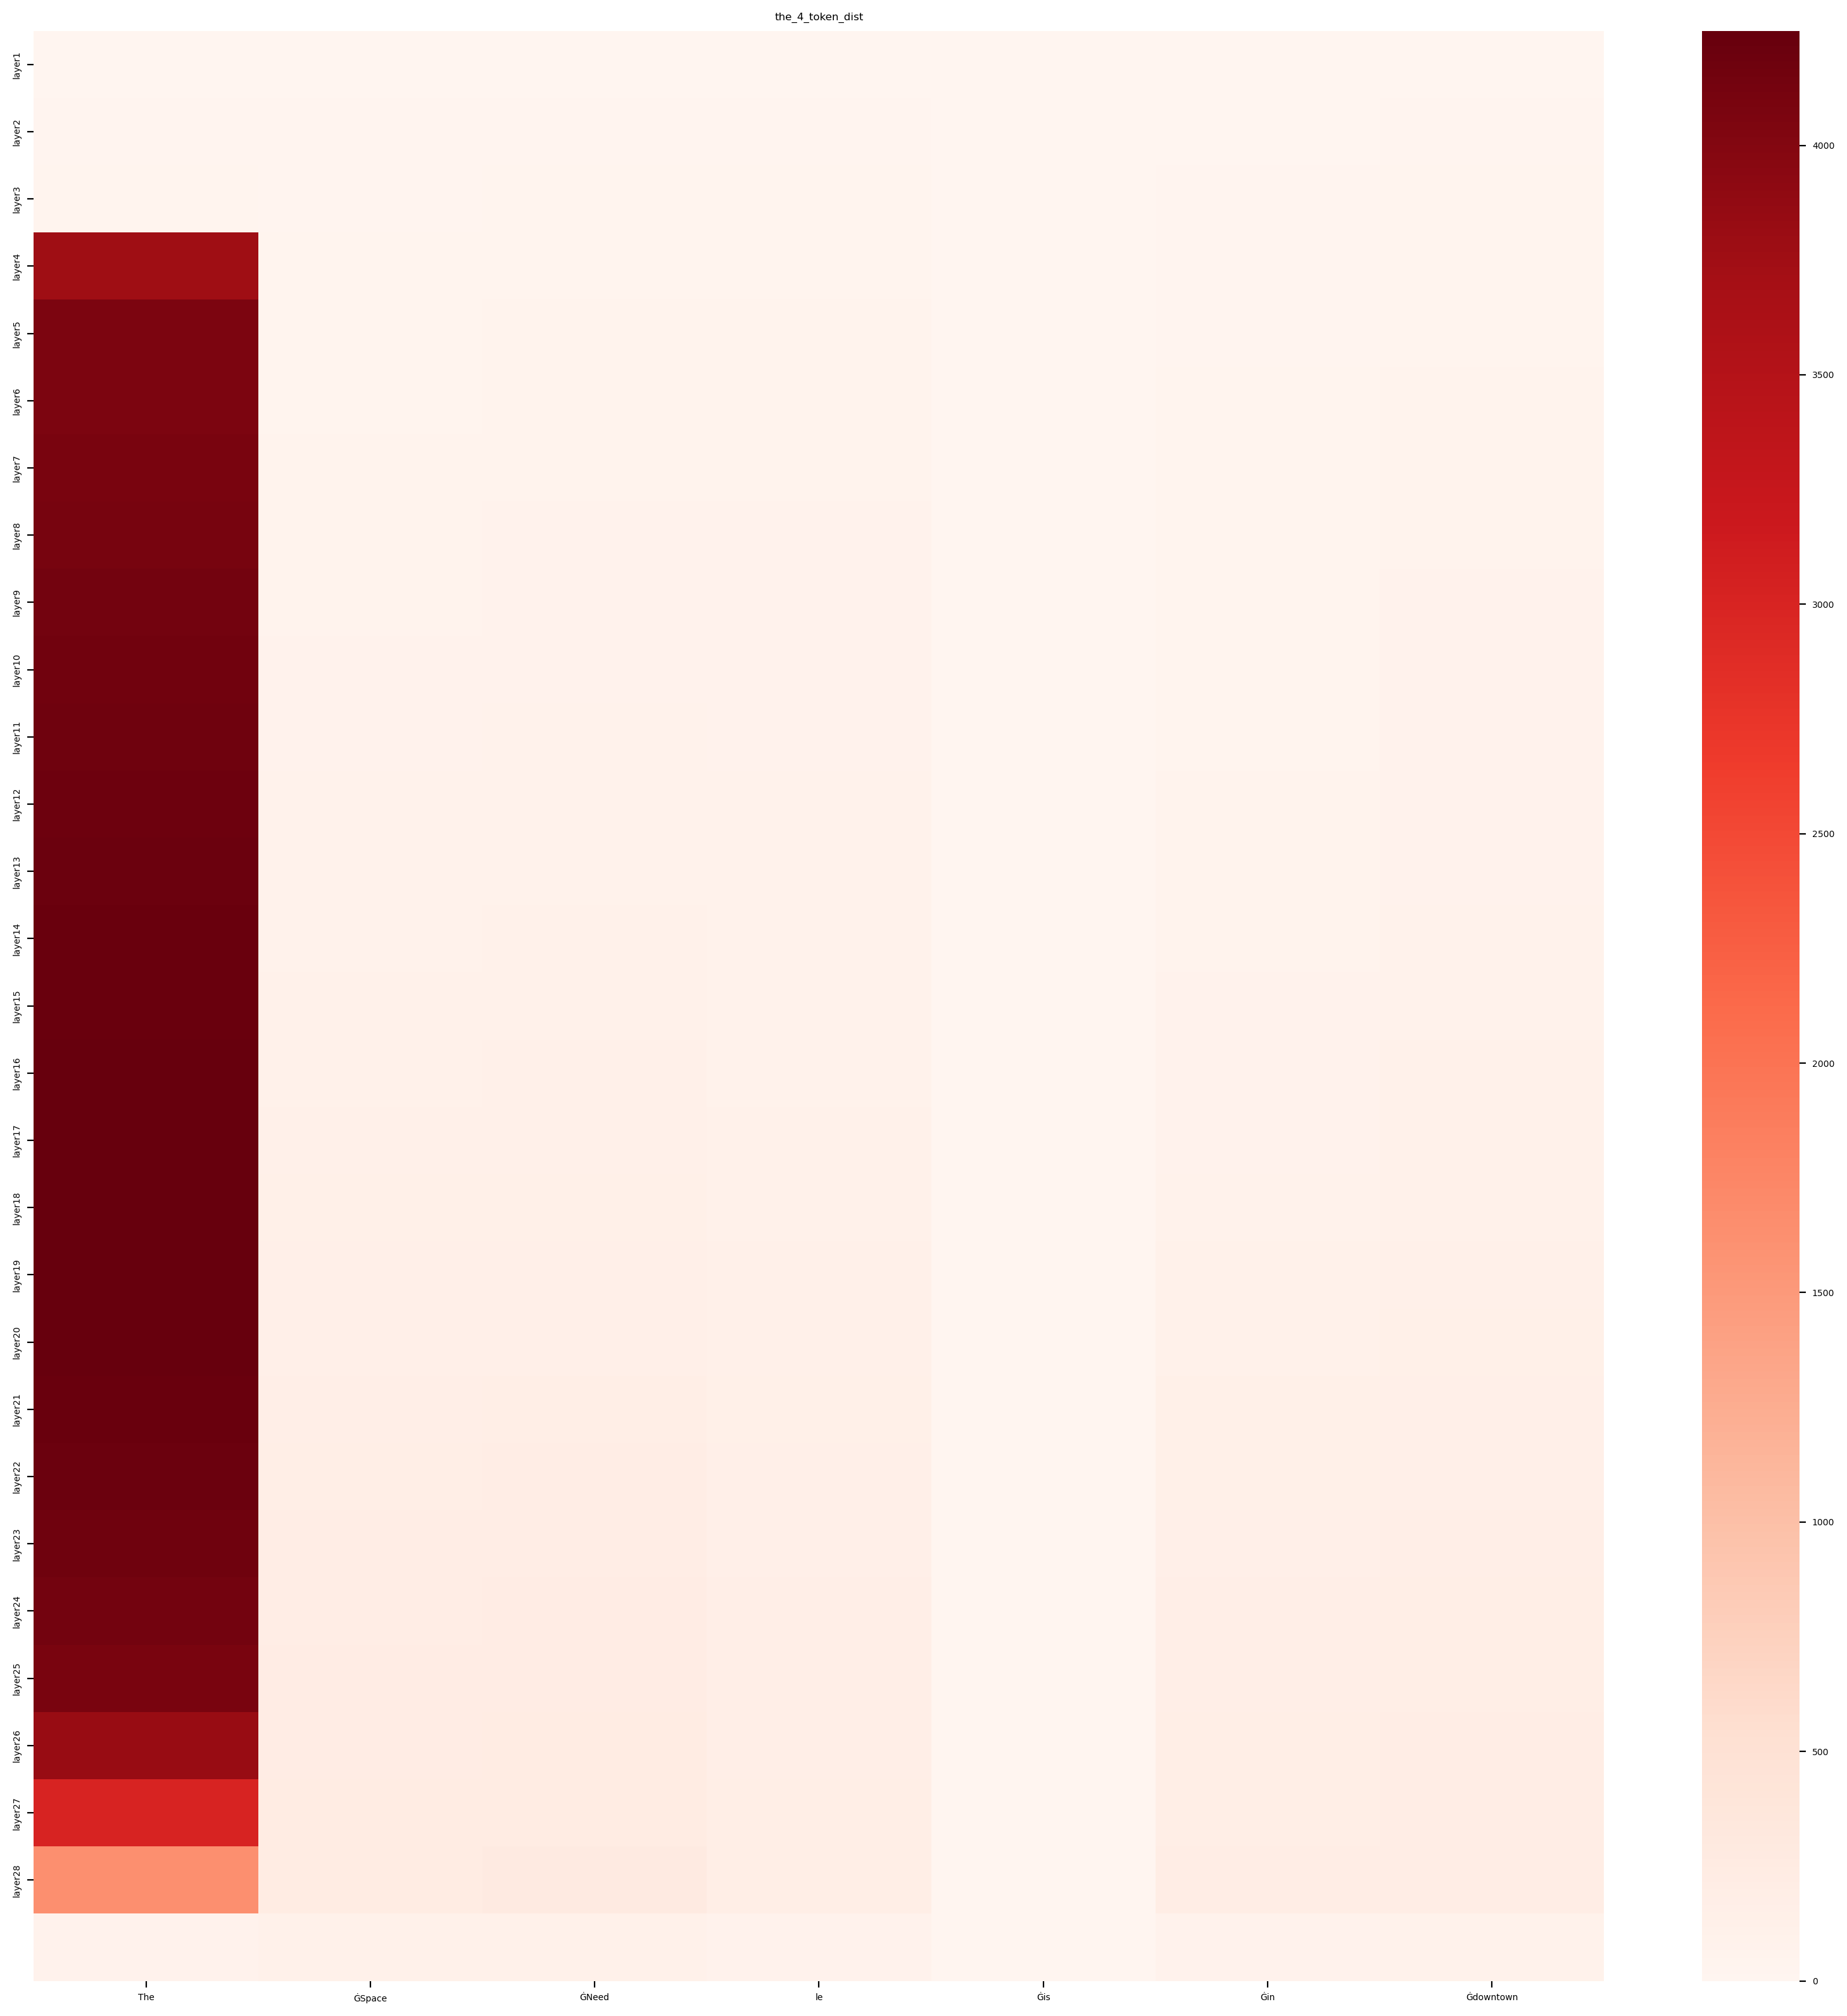

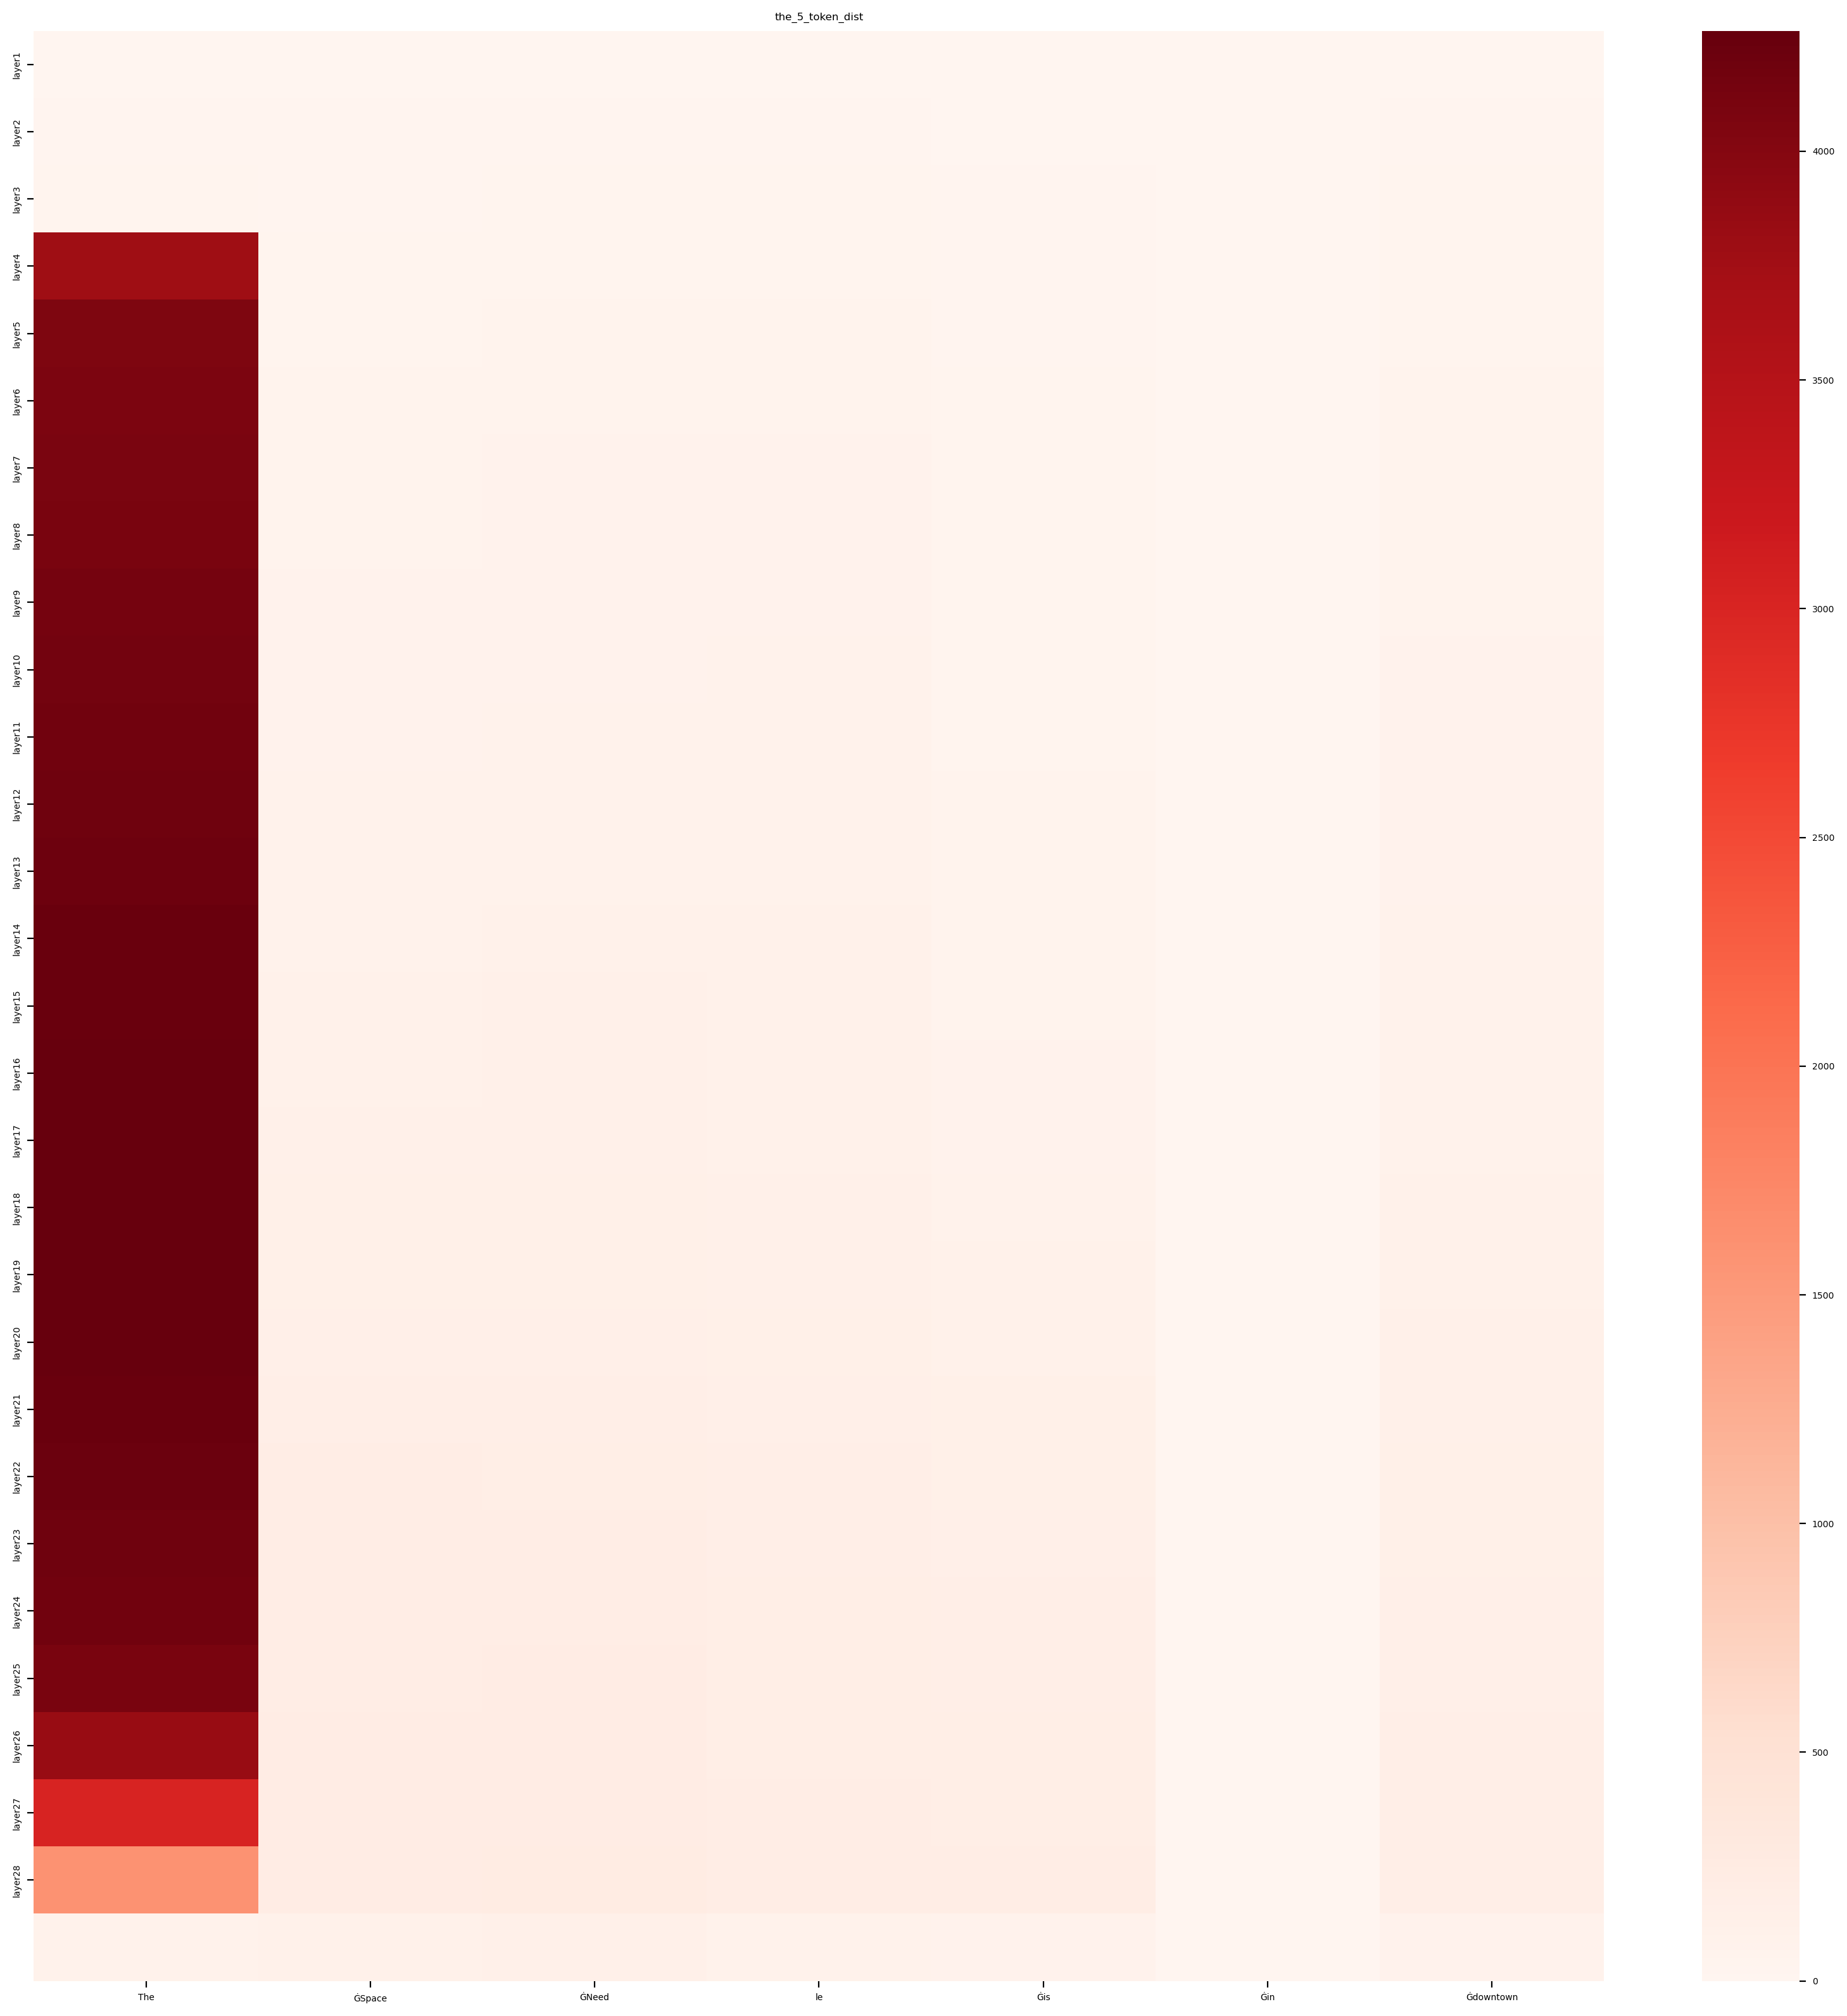

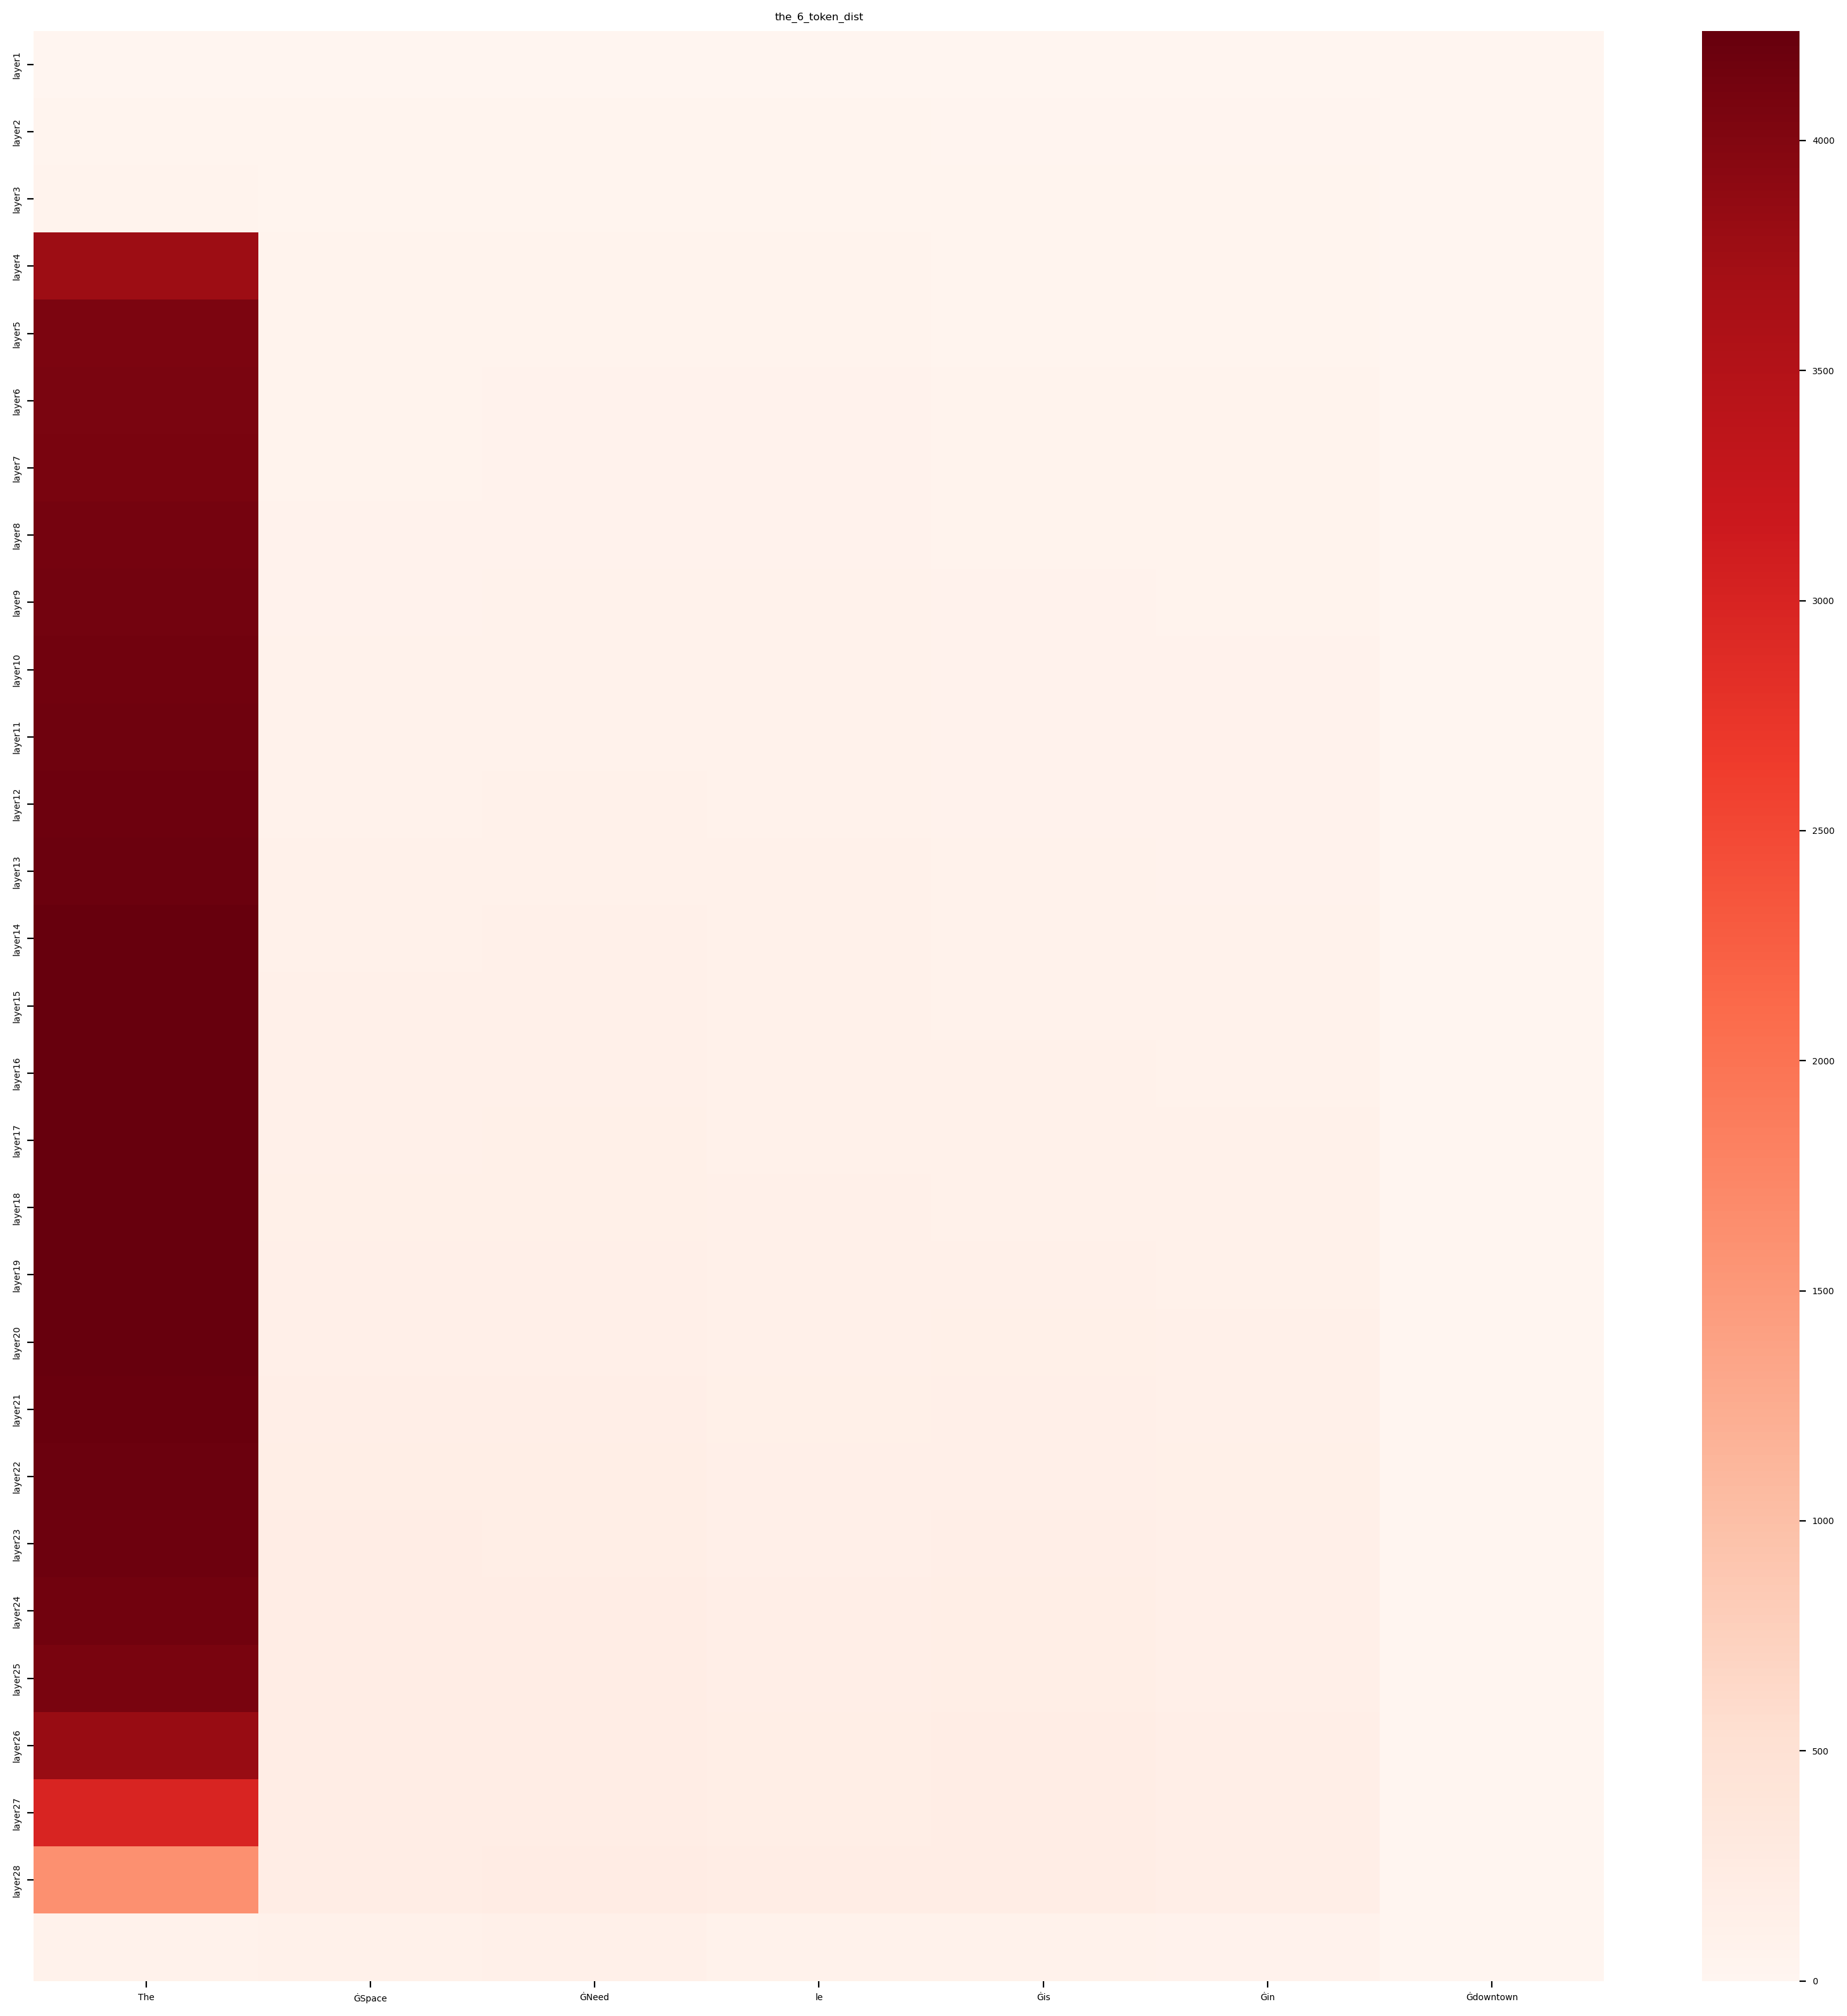

In [7]:
draw_each_token_dist()

In [5]:
print_each_token_dist()

__________token_id:1,ĠSpace________________
dist between token0 and token1:
[1.2147347e+00 2.7773823e+01 4.9687012e+01 3.7664565e+03 4.0512117e+03
 4.0623037e+03 4.0853999e+03 4.1082212e+03 4.1355322e+03 4.1559131e+03
 4.1747402e+03 4.1951011e+03 4.2089395e+03 4.2287021e+03 4.2370186e+03
 4.2488950e+03 4.2493198e+03 4.2462002e+03 4.2391133e+03 4.2158047e+03
 4.1998618e+03 4.1686685e+03 4.1466963e+03 4.1192578e+03 4.0590286e+03
 3.8064172e+03 2.9914639e+03 1.6060021e+03 8.5177666e+01]
dist between token1 and token2:
[  1.4113011  30.34669    38.842617   50.28111    58.368526   63.022053
  68.911476   73.4298     76.69356    83.123276   88.823135   93.16818
  98.305275  106.26593   113.51828   118.60359   125.649315  134.91928
 144.00882   153.24782   158.79971   163.55319   165.54306   165.70013
 166.75905   167.7956    170.6843    173.08098   105.51636  ]
__________token_id:2,ĠNeed________________
dist between token0 and token2:
[1.2034954e+00 3.0134577e+01 5.4107346e+01 3.7728259e+03 

#### gpt-neo-1.3B

In [8]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name ='EleutherAI/gpt-neo-1.3B' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                            is_linear=is_linear)
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.num_layers
n_heads = model_config.num_heads
check_token_id = -1

prompt = 'The Space Needle is in downtown' # 'Beats Music is owned by', 'The Space Needle is in downtown'
target_token = 'Apple'
save_path = os.path.join(sys.path[0], './result')
encoded_line = tokenizer.encode(prompt)
codes = tokenizer.convert_ids_to_tokens(encoded_line)


model.eval()
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)   
hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()

name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.wpe.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.weight param requires_grad:True, detype:torc

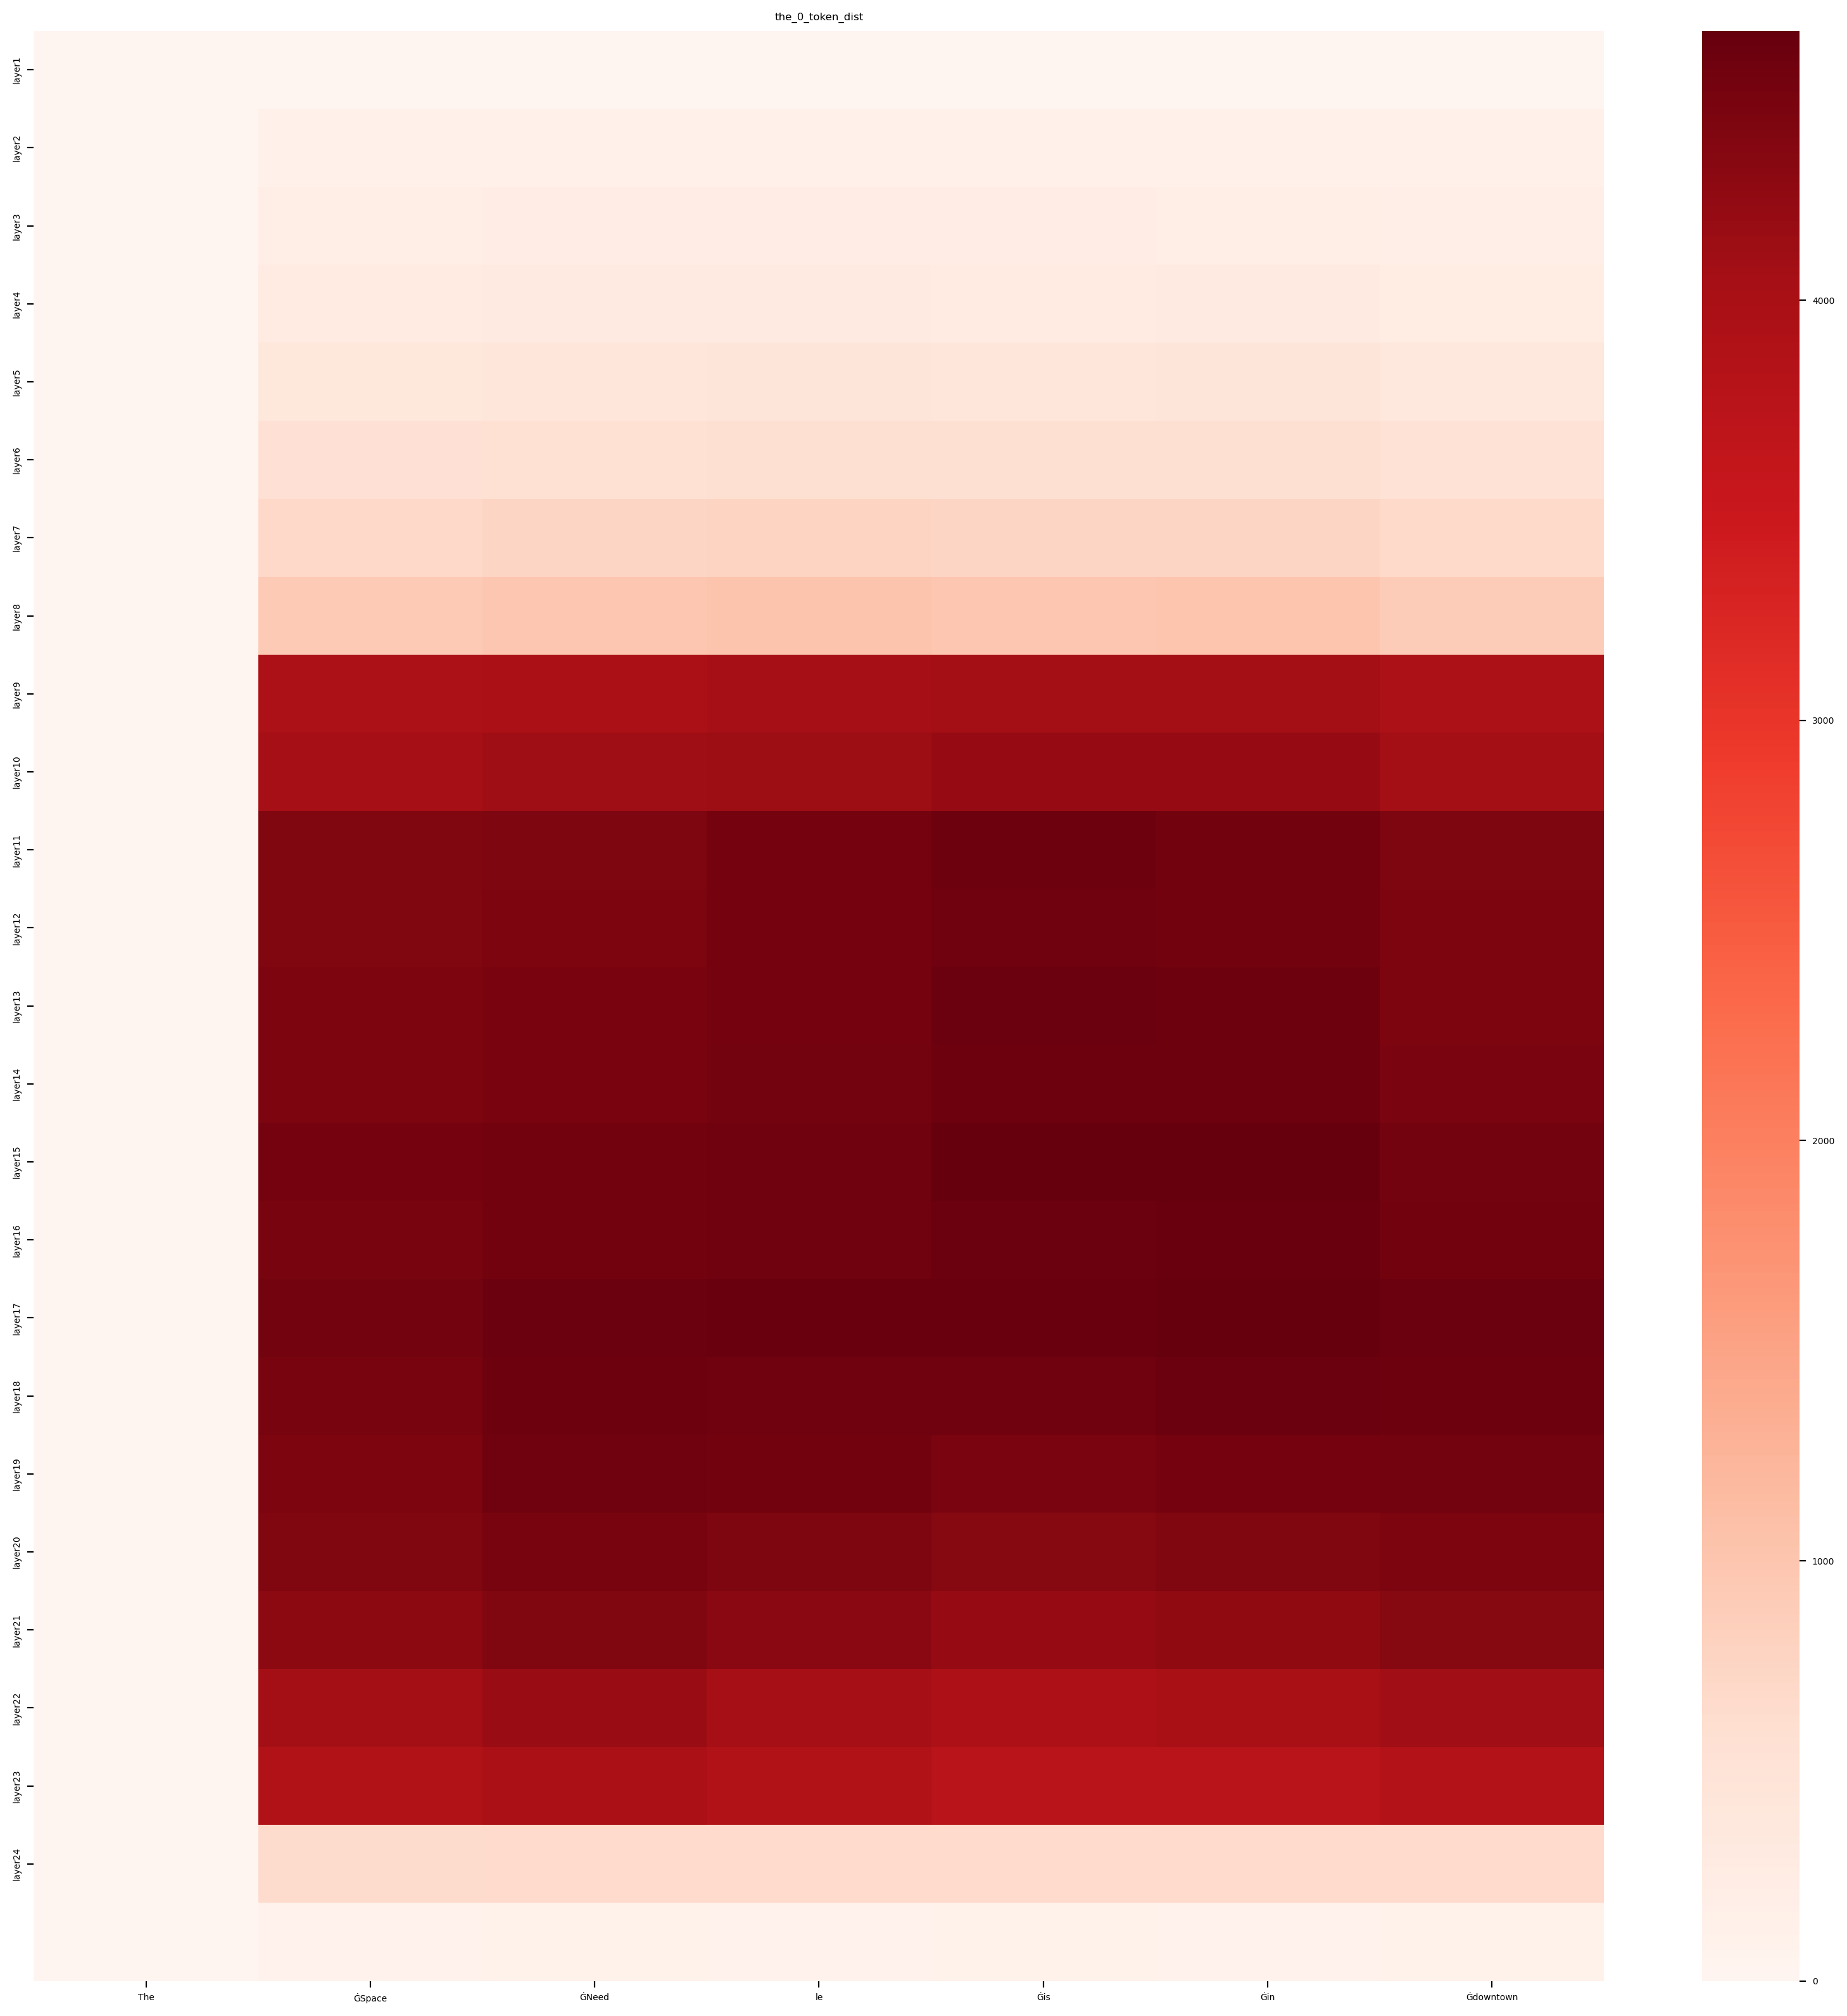

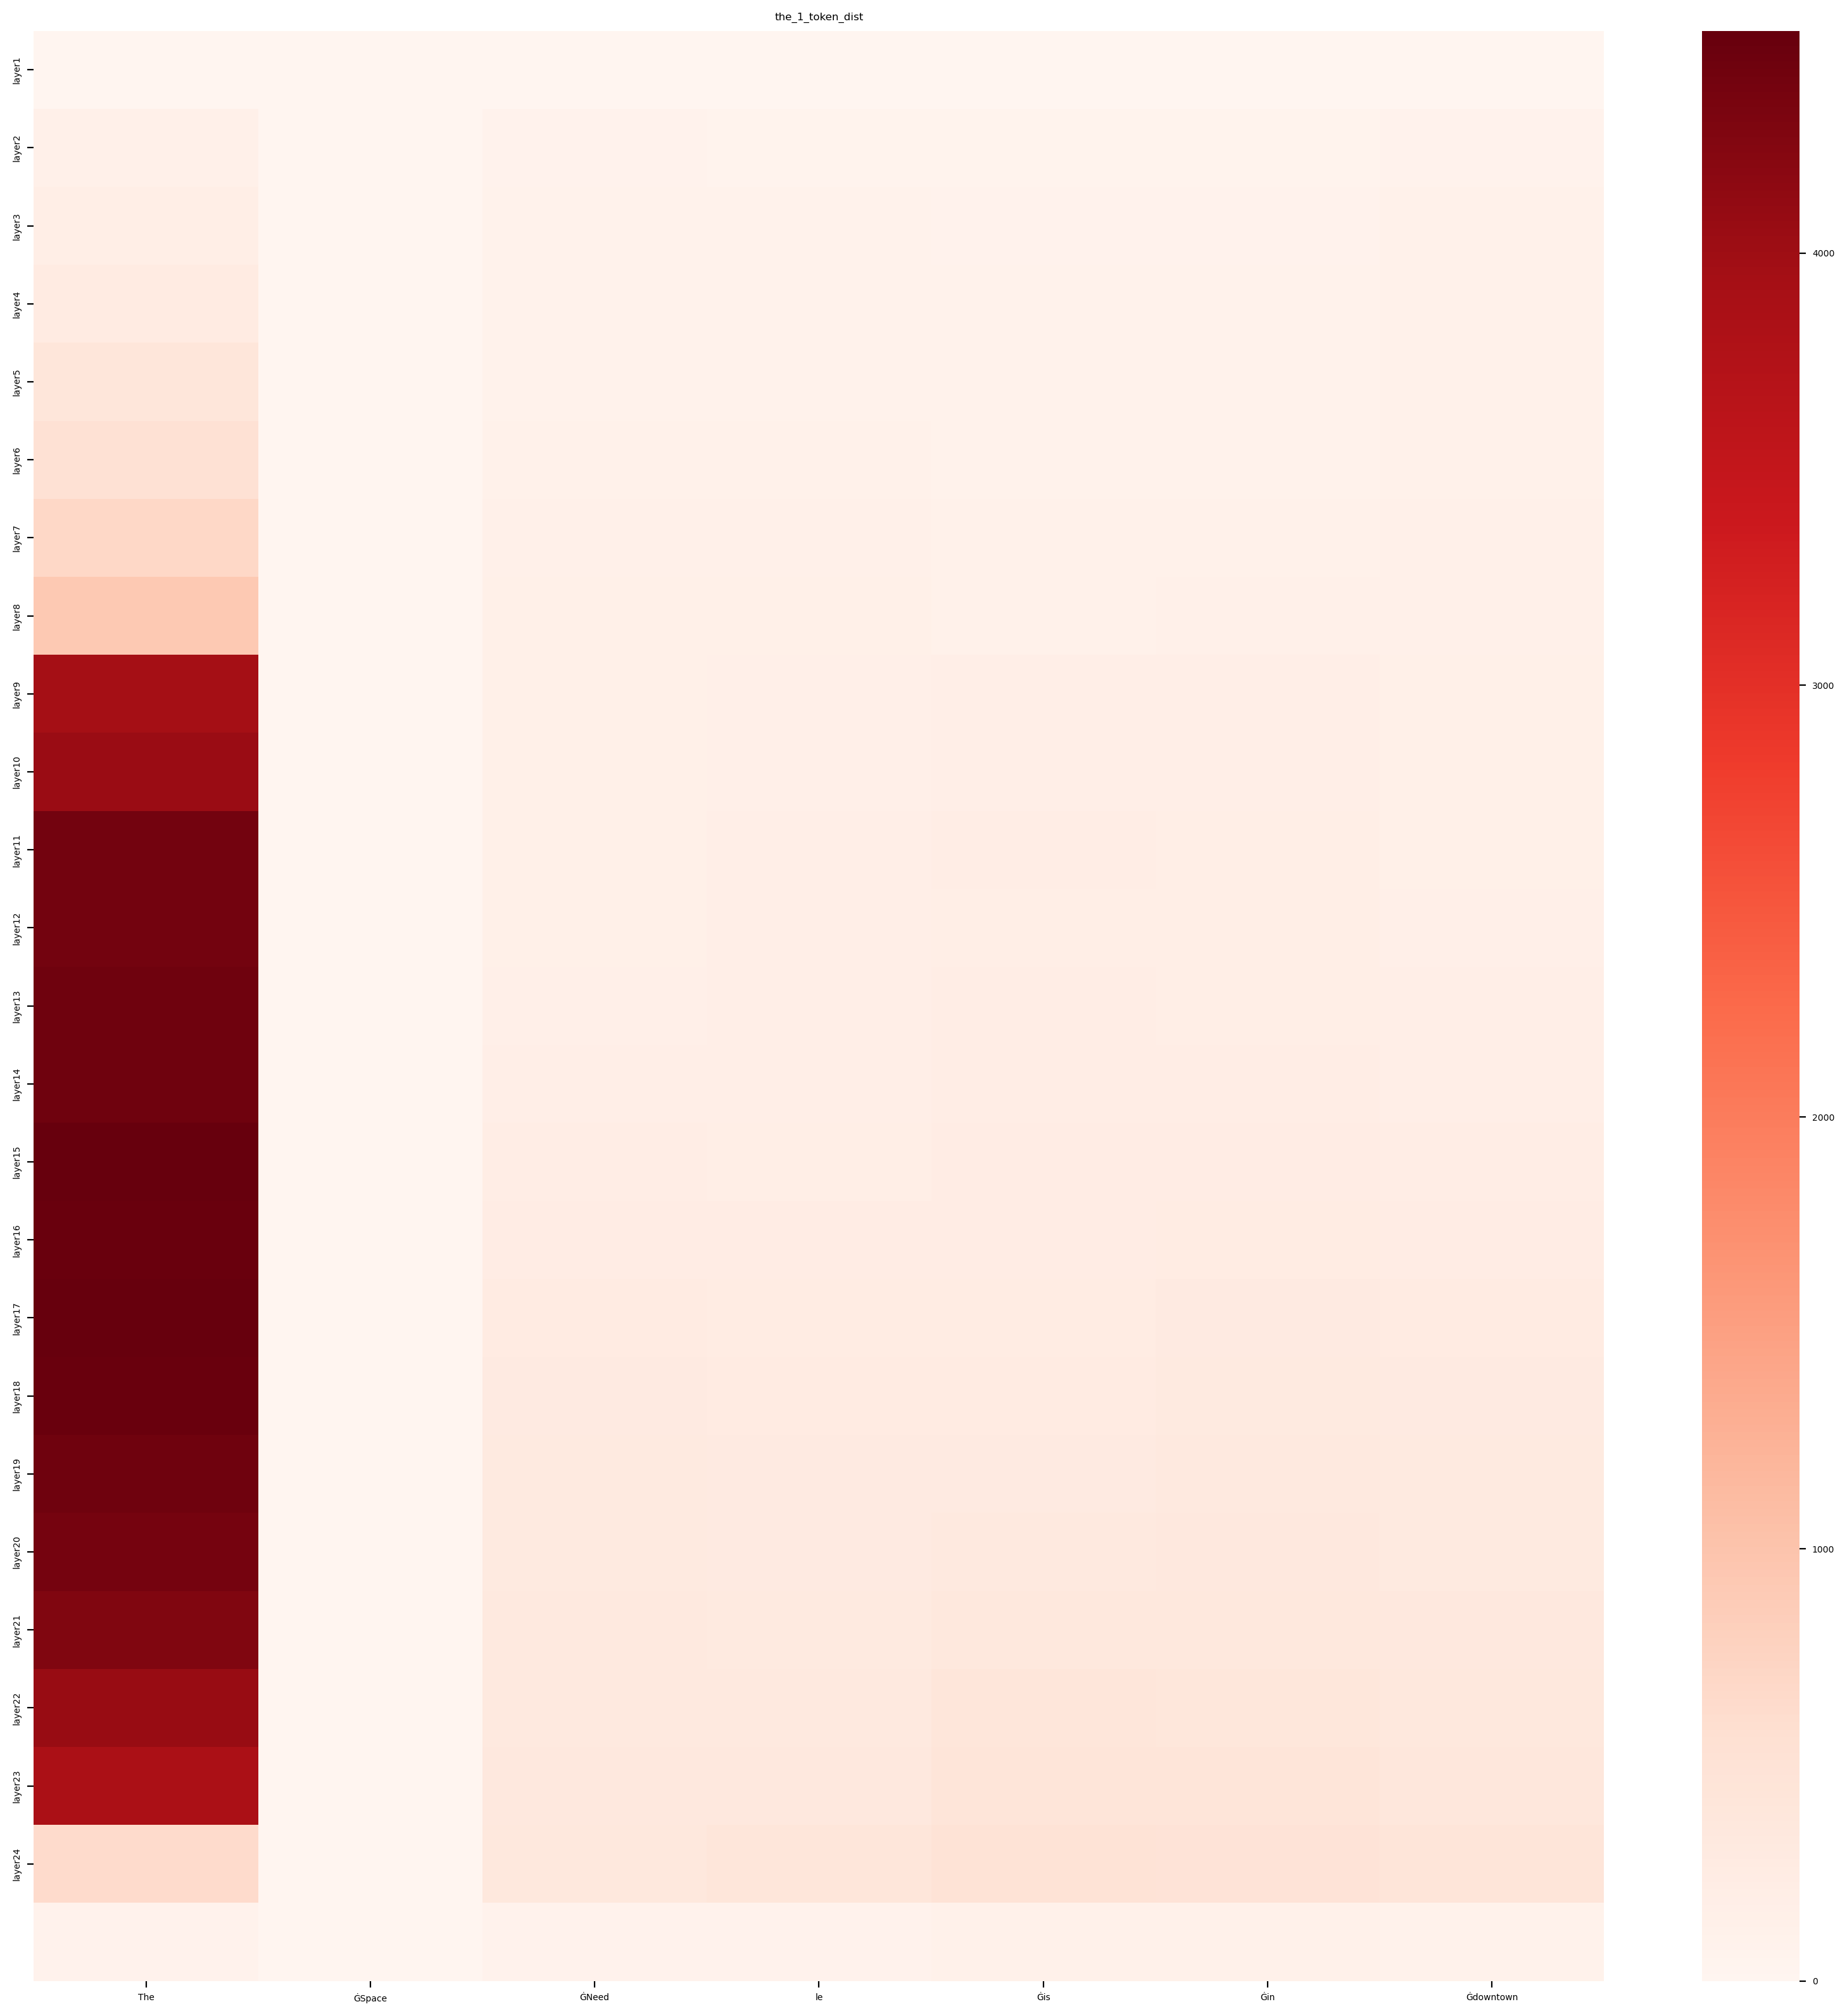

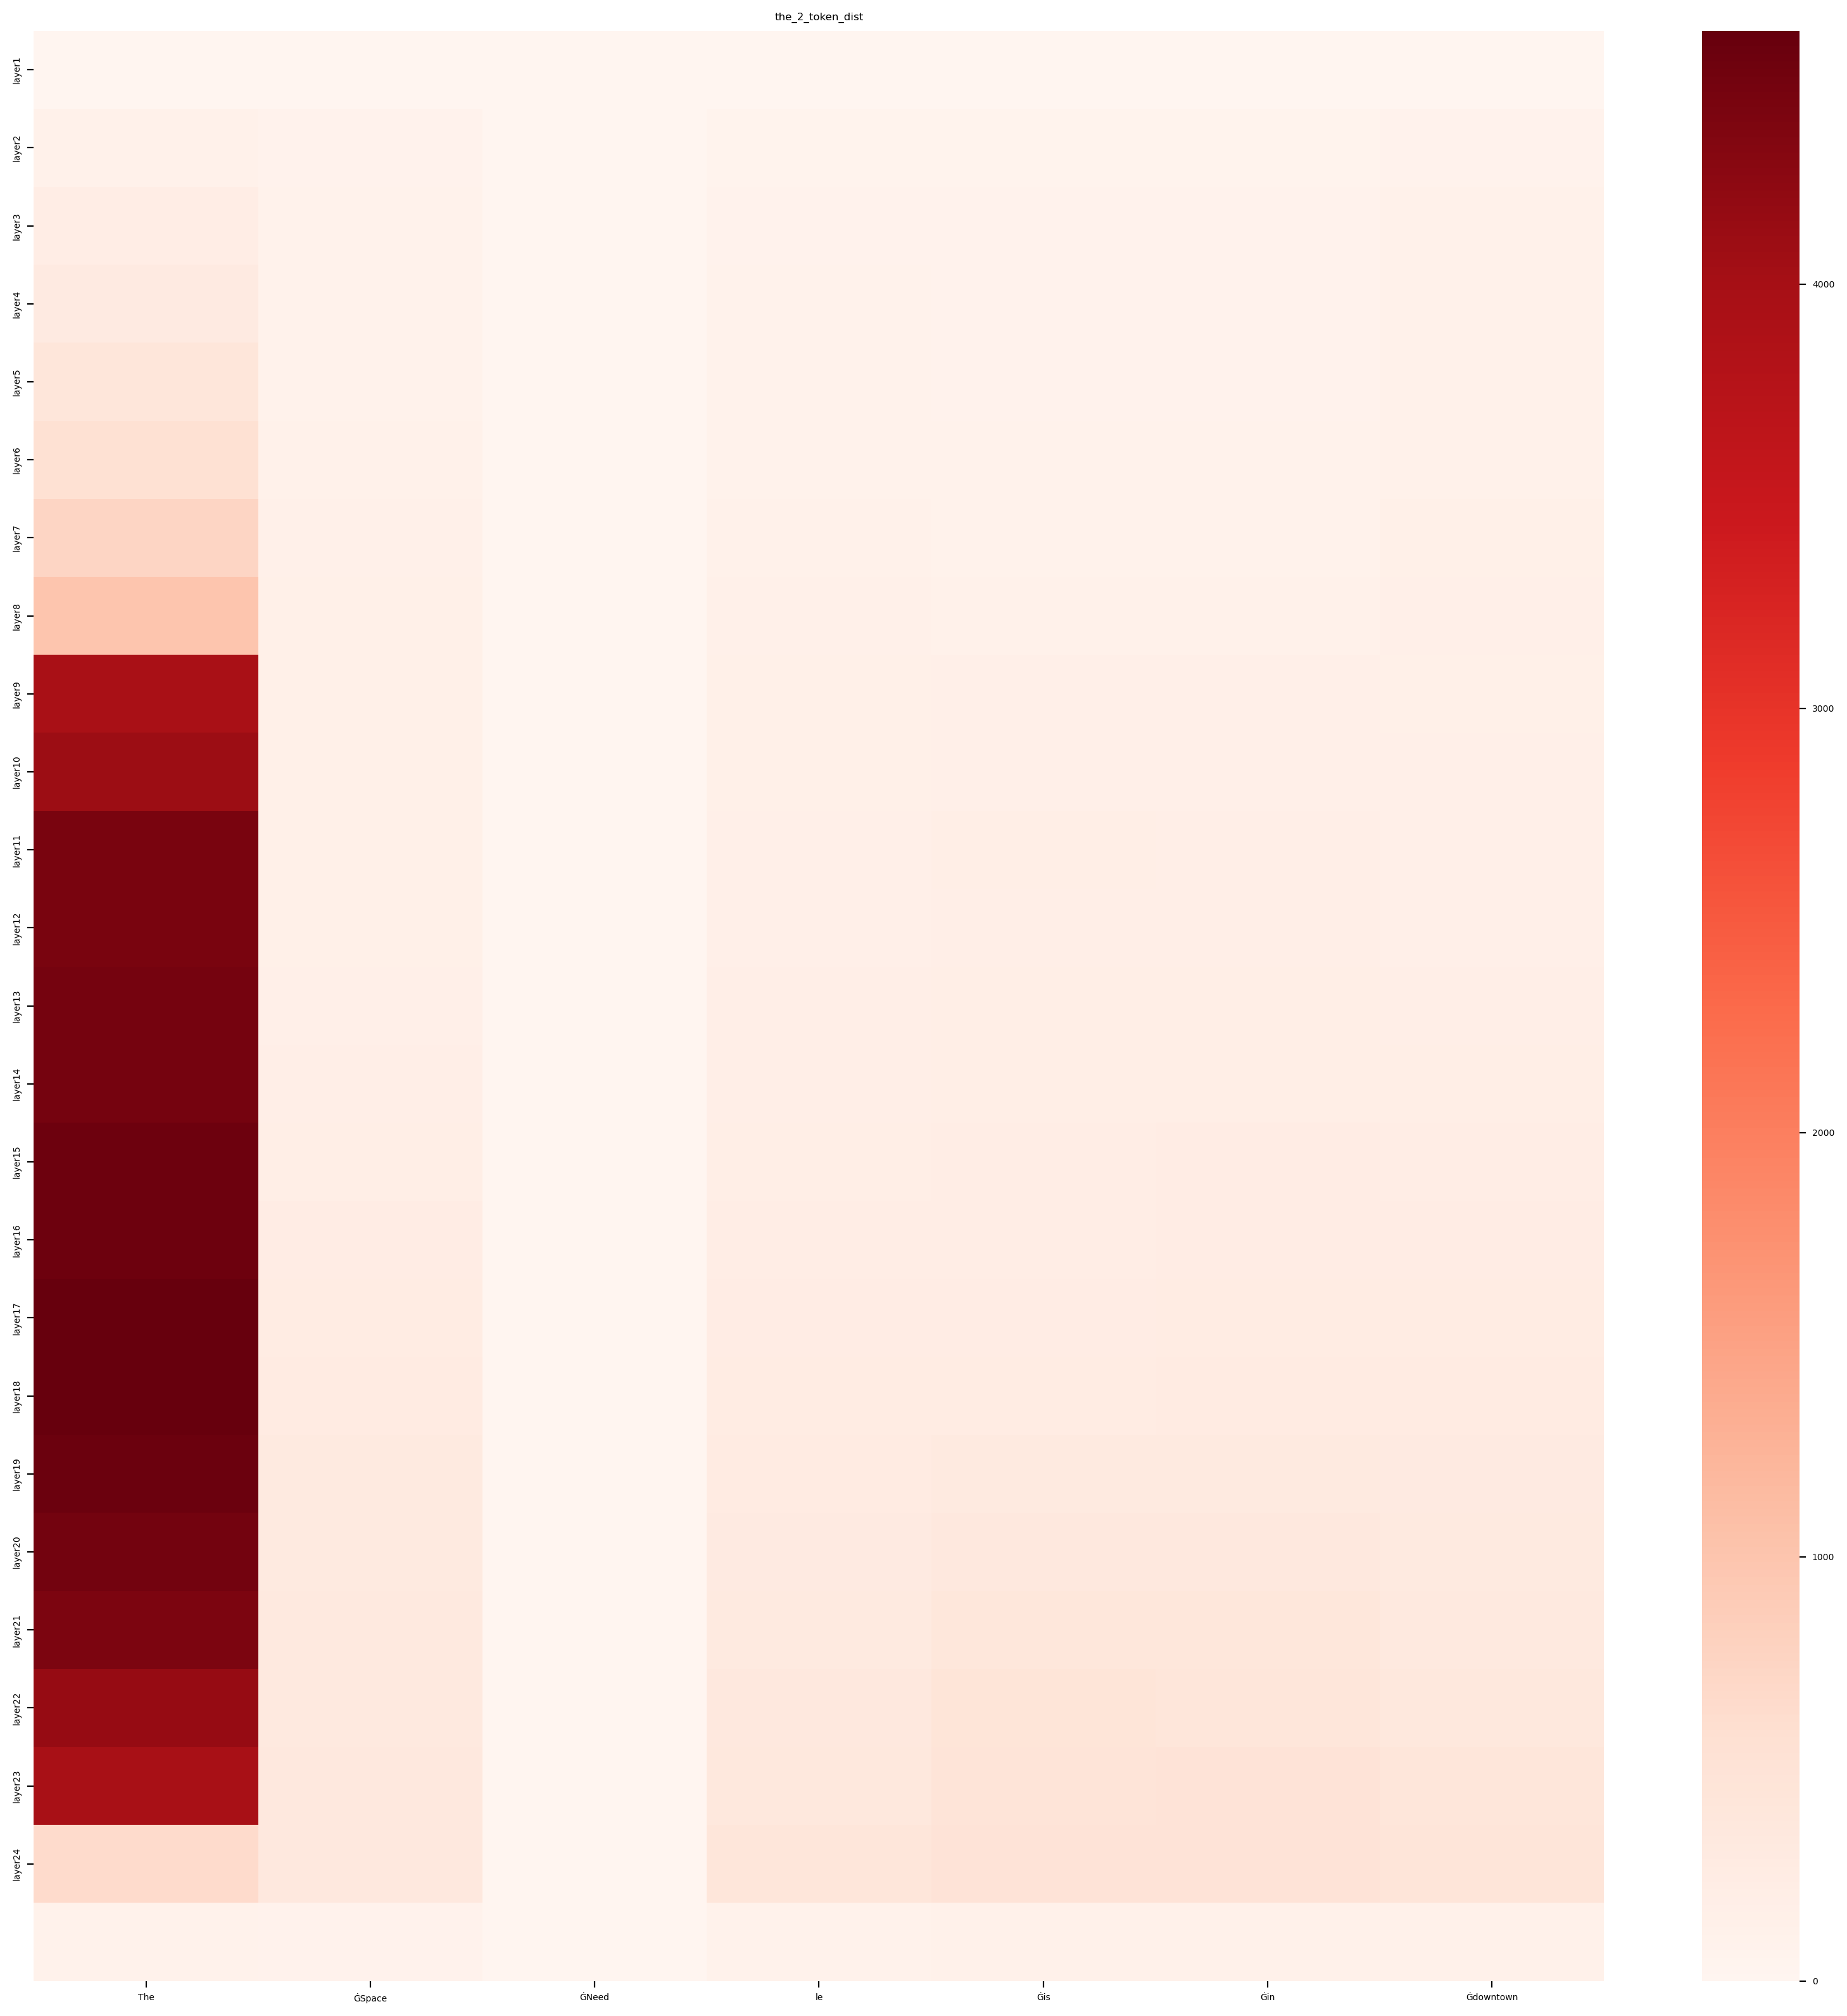

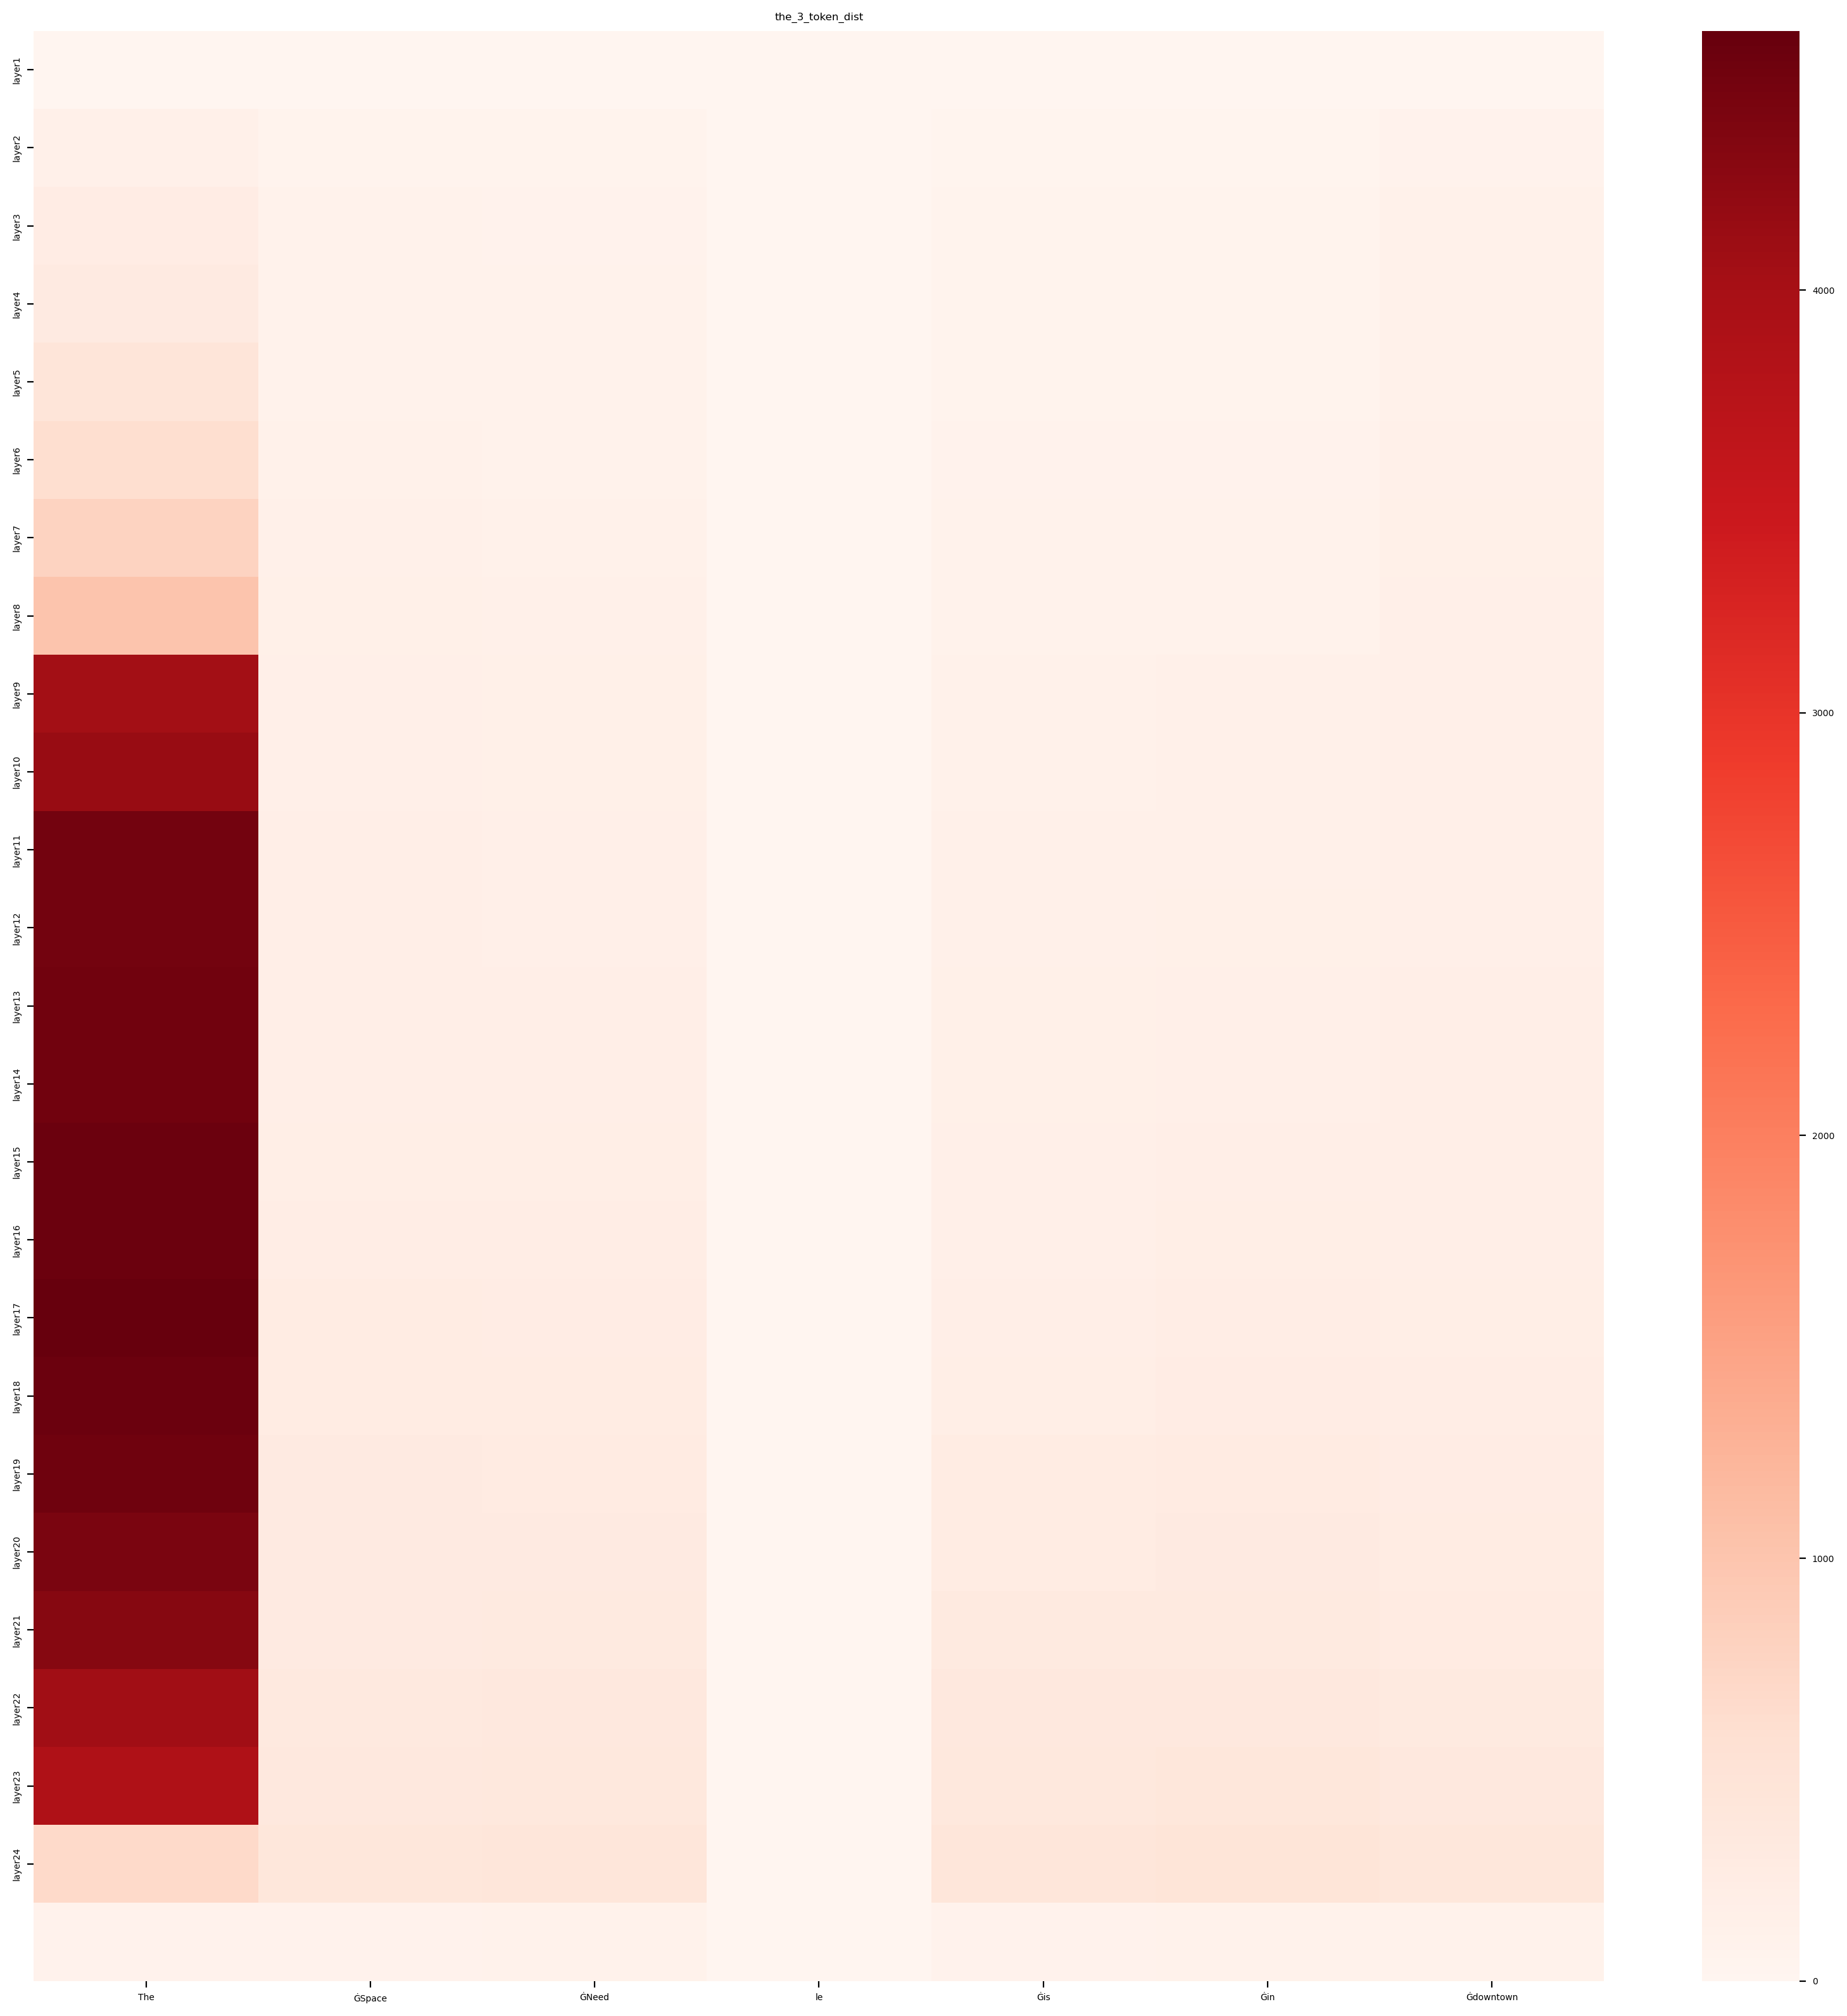

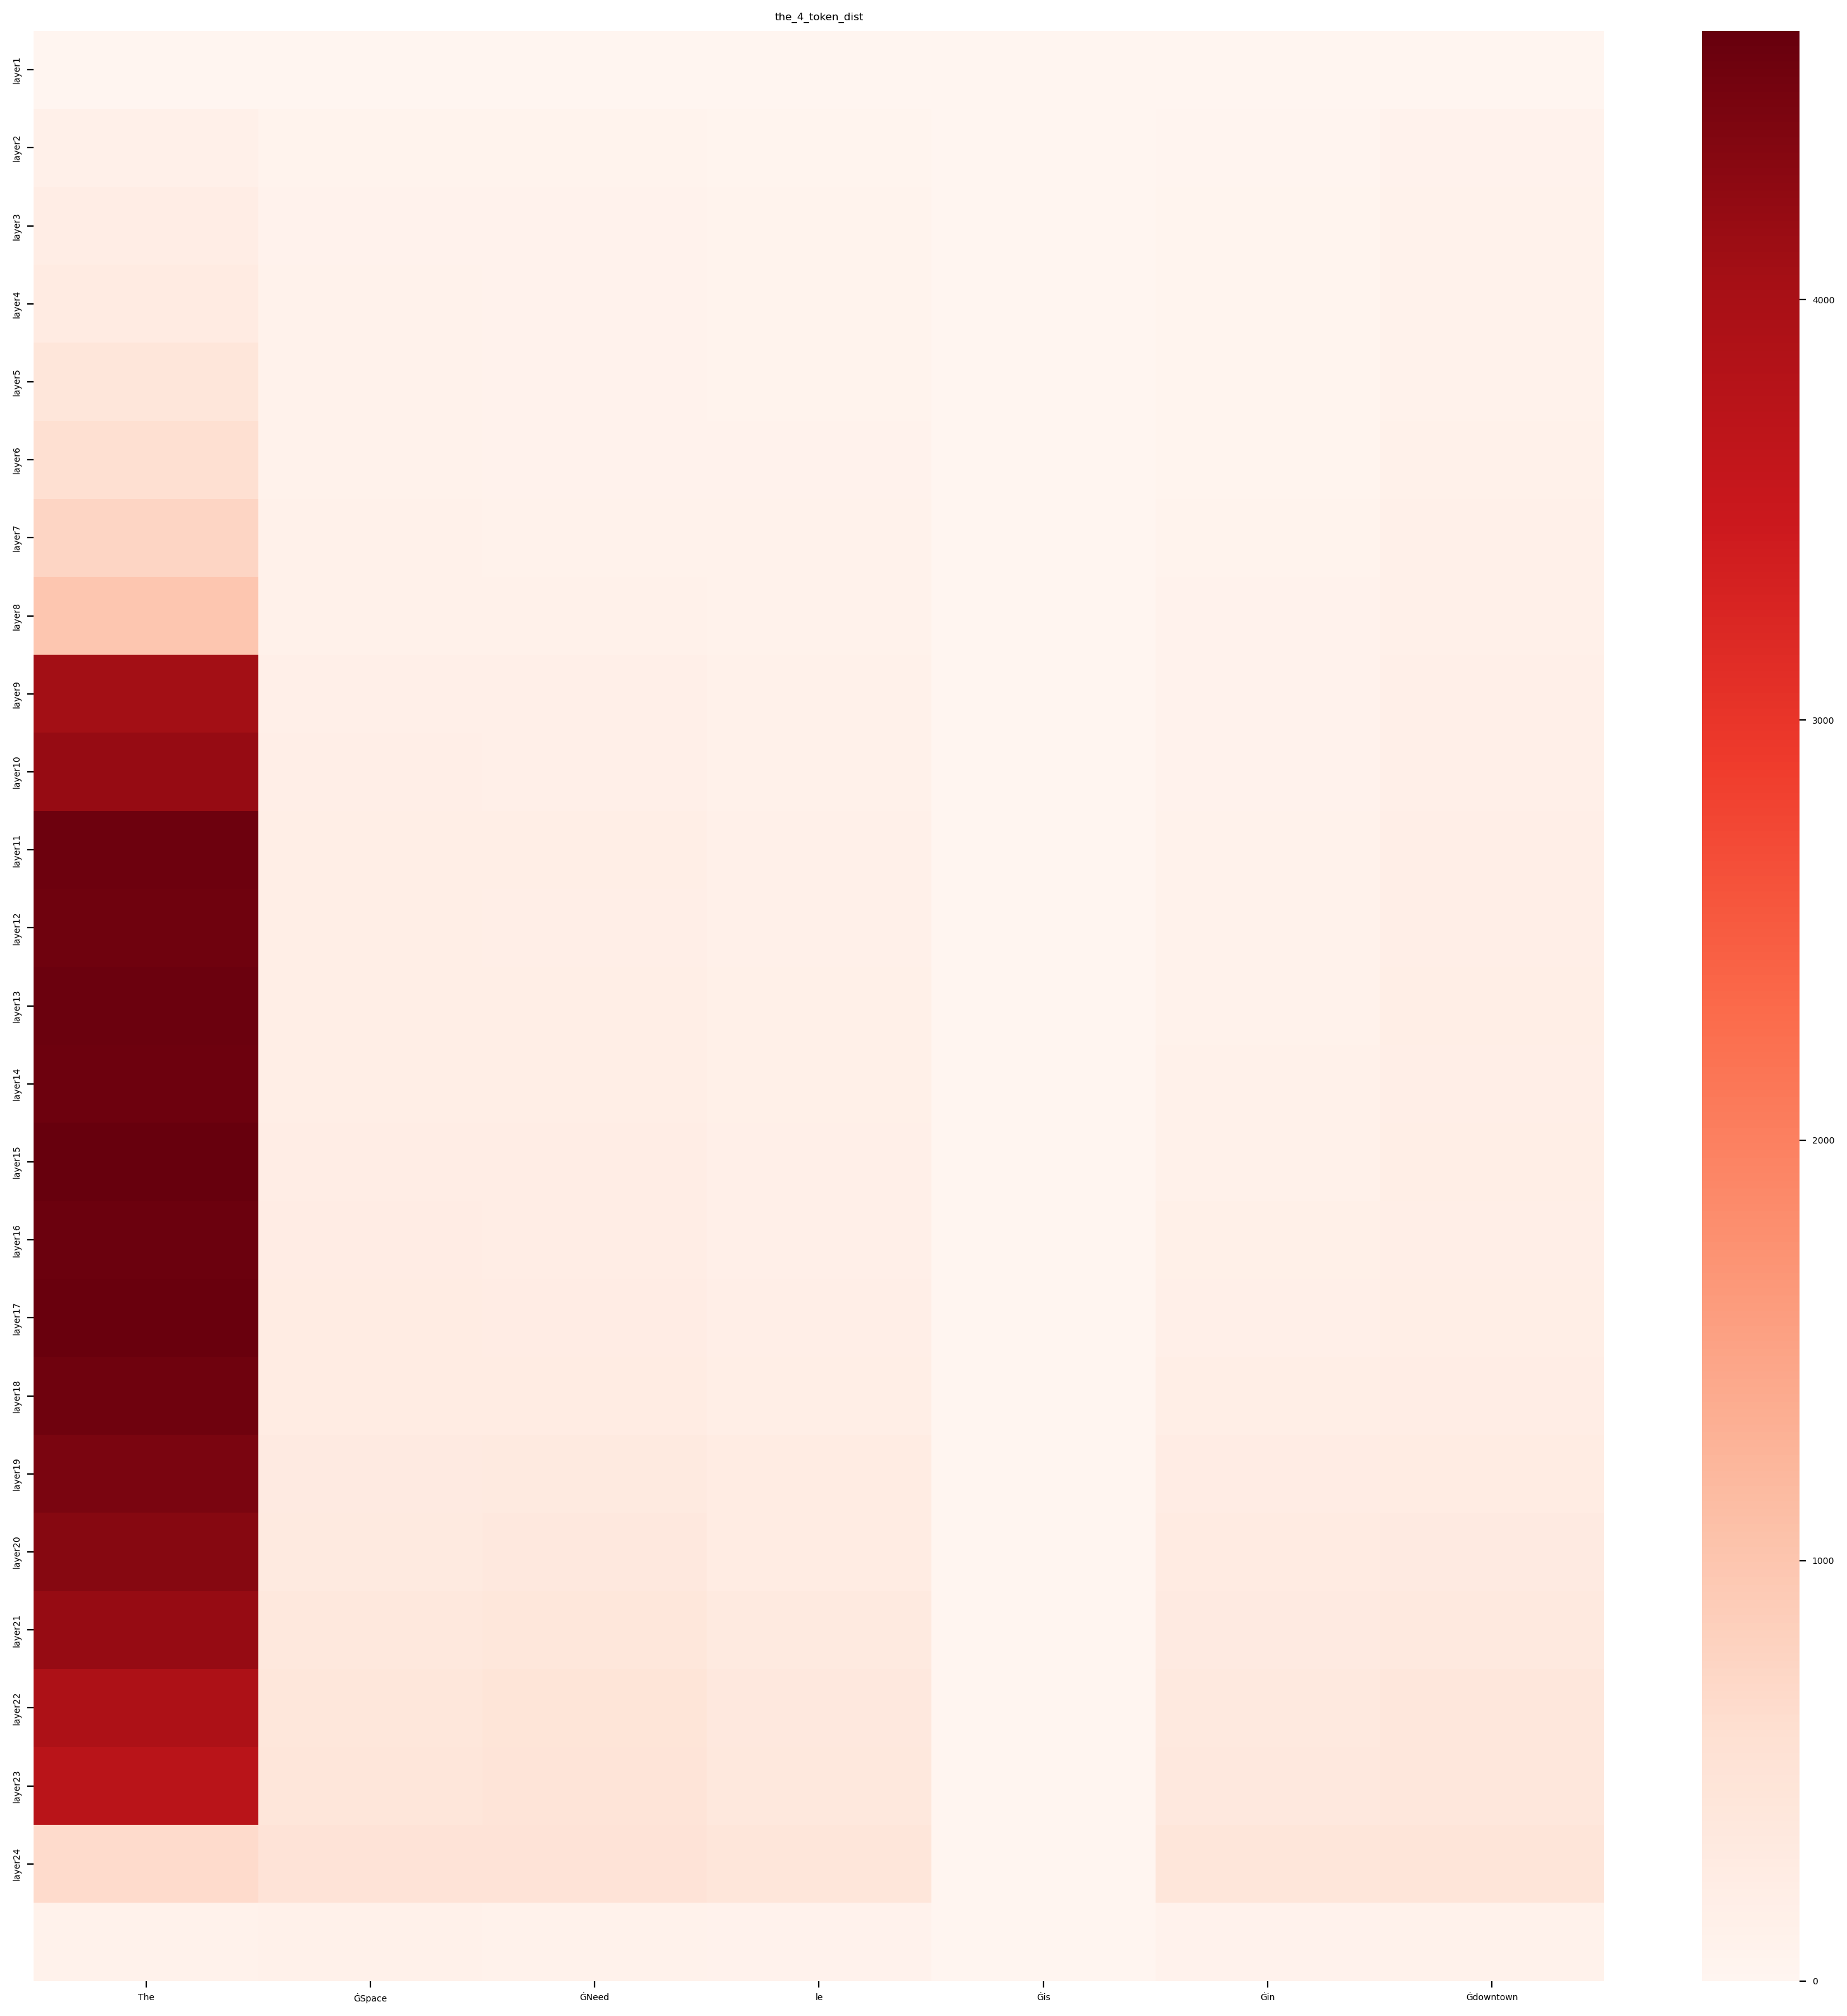

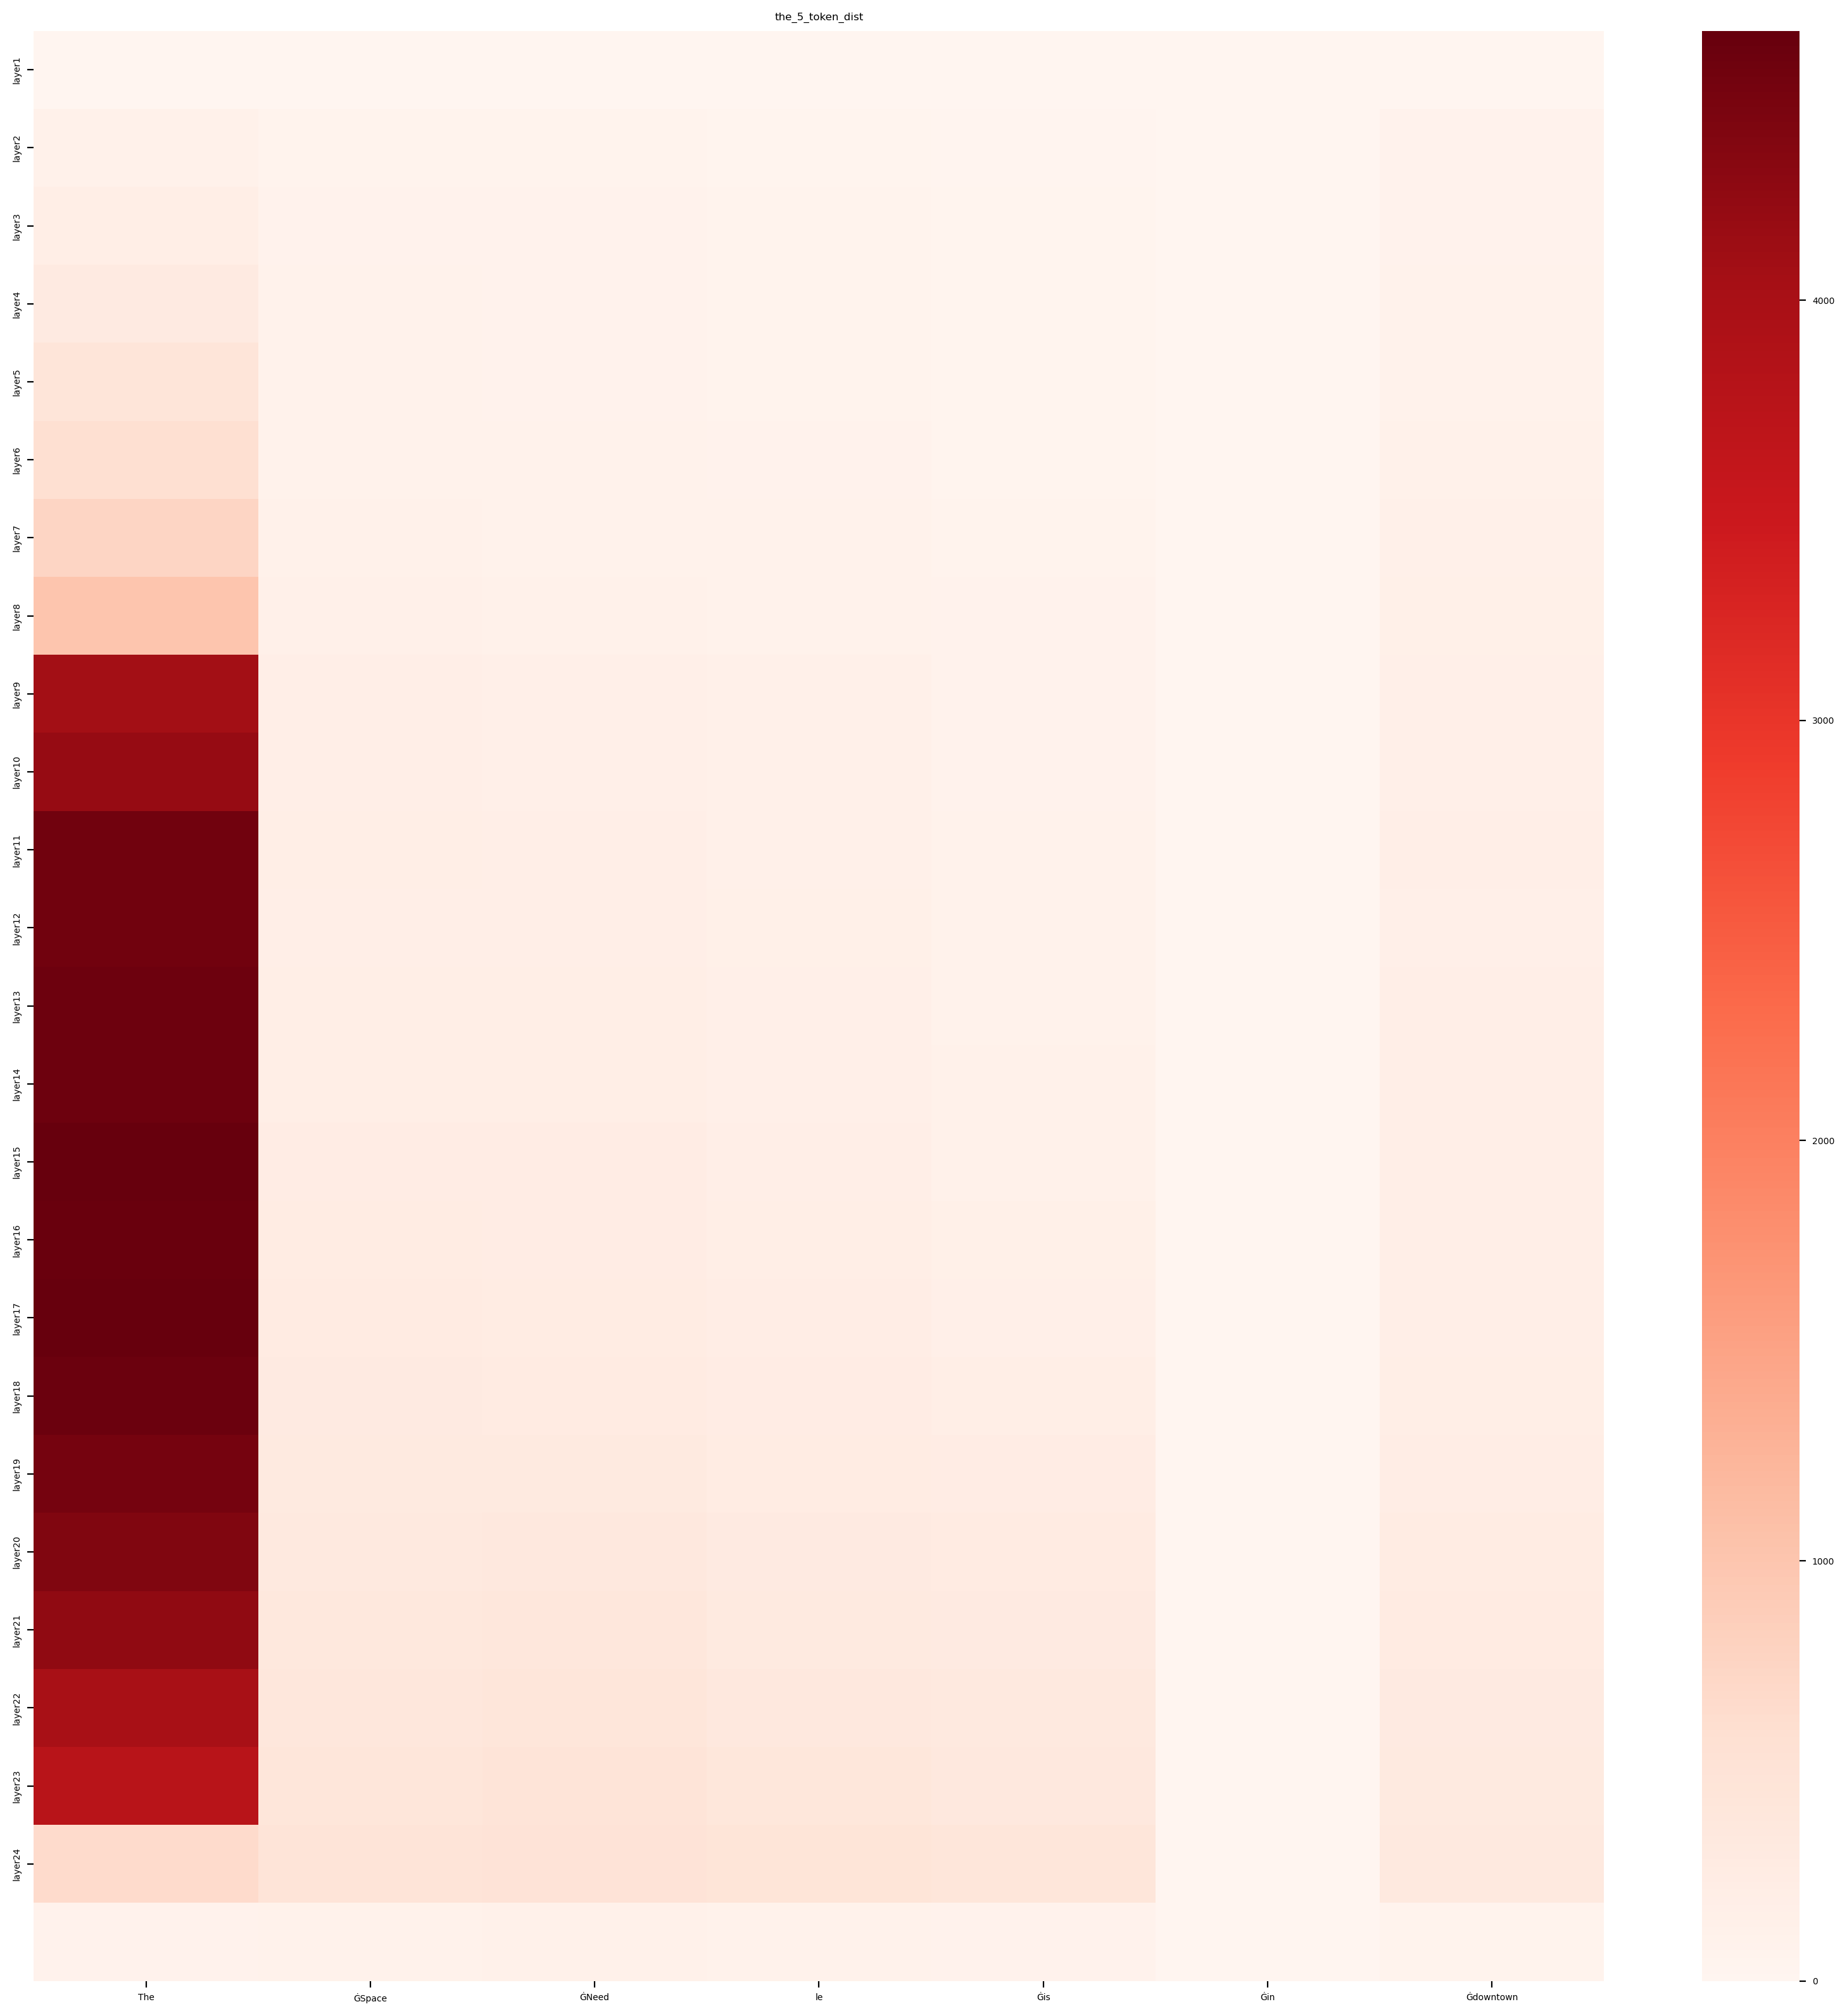

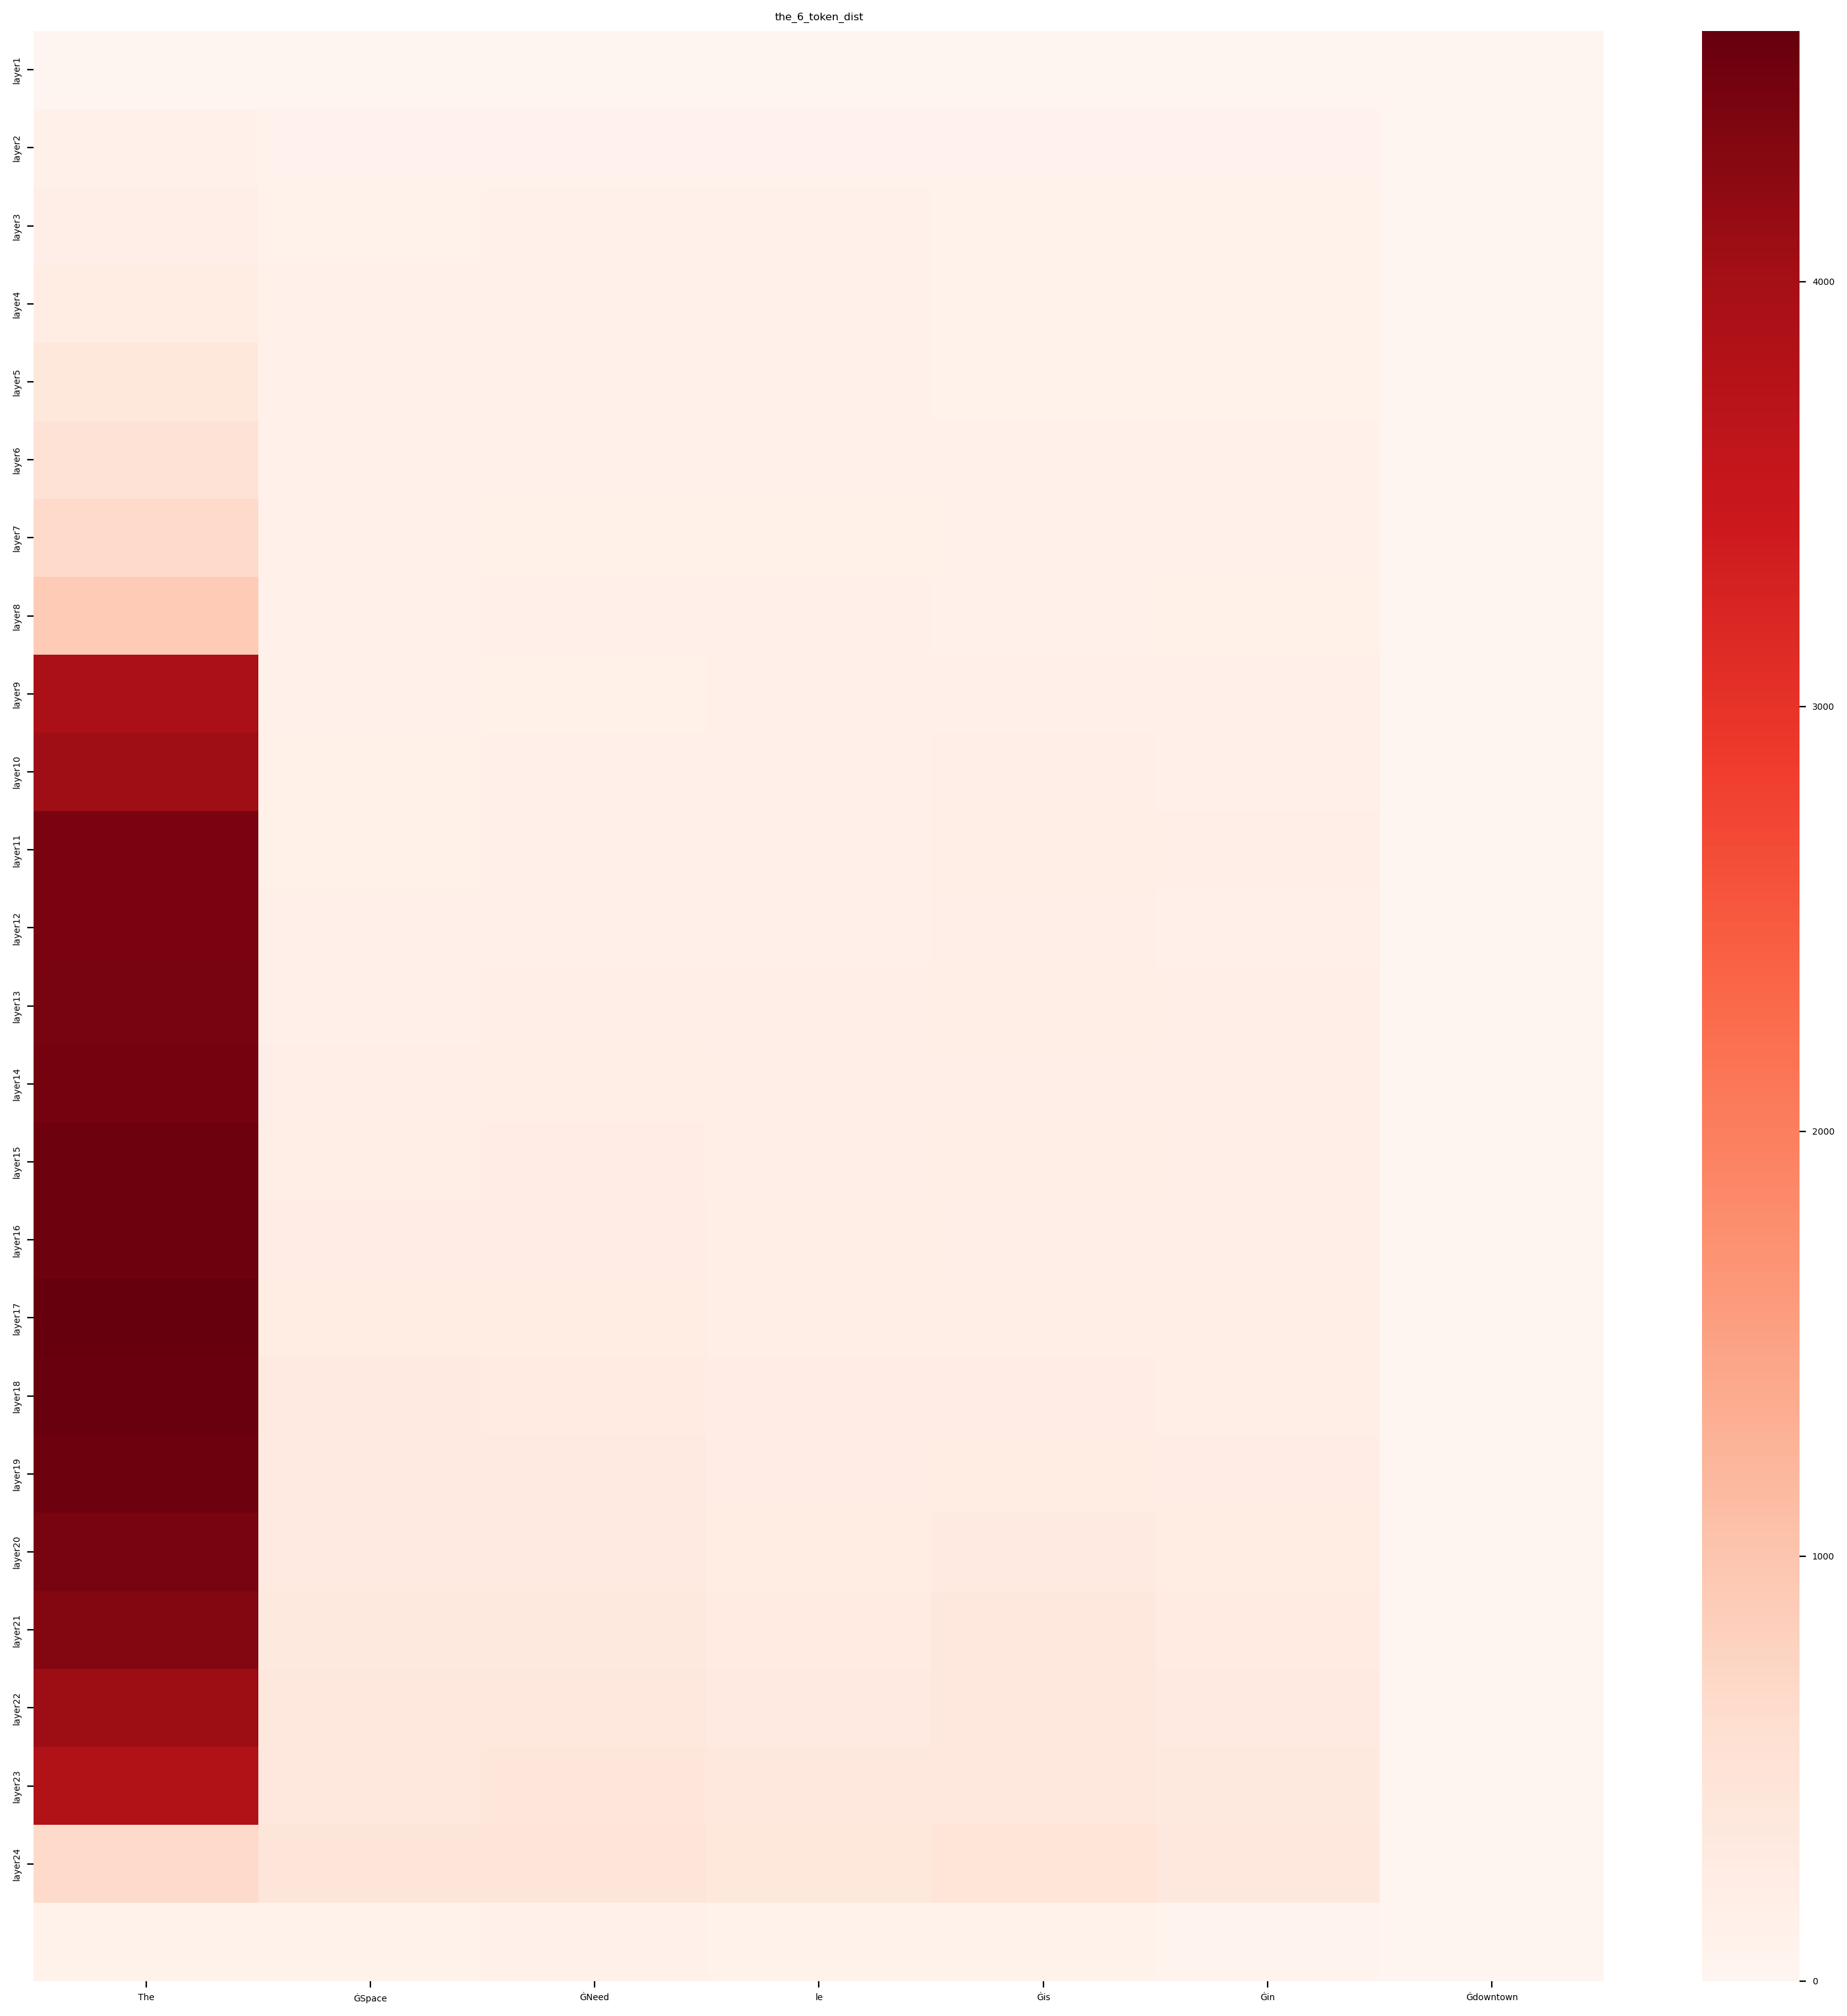

In [9]:
draw_each_token_dist()

In [10]:
print_each_token_dist()

__________token_id:1,ĠSpace________________
dist between token0 and token1:
[2.8879006e+00 1.2604011e+02 2.1099109e+02 2.7780667e+02 4.1030853e+02
 5.4473090e+02 6.9883563e+02 9.3455835e+02 3.9348887e+03 4.0556055e+03
 4.3996846e+03 4.4031152e+03 4.4368403e+03 4.4379053e+03 4.5042563e+03
 4.4866123e+03 4.5148179e+03 4.4856372e+03 4.4304814e+03 4.3880103e+03
 4.2845762e+03 4.0631768e+03 3.8618328e+03 6.4698468e+02 8.5221954e+01]
dist between token1 and token2:
[  2.7670188  73.744514   97.21042   105.076675  104.14003   110.38221
 126.46528   147.17867   146.01225   148.51042   147.80946   155.21382
 168.42197   187.0919    211.71344   241.71294   269.1134    287.17303
 311.03192   312.05307   329.22394   333.78125   348.09894   352.791
  87.60172  ]
__________token_id:2,ĠNeed________________
dist between token0 and token2:
[2.8959999e+00 1.1308959e+02 2.2221967e+02 2.9606897e+02 4.2971121e+02
 5.7191138e+02 7.4630518e+02 9.9682819e+02 3.9683240e+03 4.0971279e+03
 4.4206987e+03 4.432028

### head hidden states dist

In [14]:
def draw_head_dist():
    prompt = 'Beats Music is owned by'# 'Beats Music is owned by', 'The Space Needle is in downtown'
    target_token = 'Apple'
    x_ticks = [f"layer{i + 1}" for i in range(n_layers)]
    save_path = os.path.join(sys.path[0], './result')
    encoded_line = tokenizer.encode(prompt)
    codes = tokenizer.convert_ids_to_tokens(encoded_line)
    y_ticks = [f"head{i_head}-{c}" for i_head in range(n_heads) for i, c in enumerate(codes)]

    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)
    # 绘制热力图
    ground_attentions = torch.cat(output_and_cache.attentions, dim=0).detach().cpu().numpy()
    hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()

    new_shape = hidden_state.shape[:-1] + (n_heads, -1)
    head_states = np.transpose(np.reshape(hidden_state,newshape=new_shape),(0,2,1,3))[1:]

    cos_coeff = np.zeros(head_states.shape[:-1])
    from sklearn.metrics.pairwise import cosine_similarity
    for layer_id_ in range(head_states.shape[0]):
        for head_id in range(head_states.shape[1]):
            other,last = head_states[layer_id_, head_id], head_states[layer_id_, head_id, -1][np.newaxis, :]
            s = cosine_similarity(other, last).reshape(-1)
            cos_coeff[layer_id_,head_id,-1] = 0
            cos_coeff[layer_id_, head_id] = s + 1

    # new_shape = hidden_state.size()[:-1] + (num_heads, attn_head_size)
    # tensor = tensor.view(new_shape)
    plt_heatMap_sns(cos_coeff.reshape(cos_coeff.shape[0], -1).T,
                    title="gpt2_cos_coeff", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)

    dist = np.linalg.norm(head_states - head_states[:,:,-1][:,:,np.newaxis,:], axis=3) 
    dist = dist/np.sum(dist, axis=2)[:,:,np.newaxis]
    # new_shape = hidden_state.size()[:-1] + (num_heads, attn_head_size)
    # tensor = tensor.view(new_shape)
    plt_heatMap_sns(dist.reshape(dist.shape[0], -1).T,
                    title="gpt2_dist_between_last_token", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)
    
    dist = np.linalg.norm(head_states - head_states[:,:,0][:,:,np.newaxis,:], axis=3) 
    dist = dist/np.sum(dist, axis=2)[:,:,np.newaxis]
    # new_shape = hidden_state.size()[:-1] + (num_heads, attn_head_size)
    # tensor = tensor.view(new_shape)
    plt_heatMap_sns(dist.reshape(dist.shape[0], -1).T,
                    title="gpt2_dist_between_first_token", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)


    ground_attentions = ground_attentions[:, :, check_token_id, :]
    plt_heatMap_sns(ground_attentions.reshape(ground_attentions.shape[0], -1).T,
                    title="gpt2_attentions", x_ticks=x_ticks, y_ticks=y_ticks
                    , show=True, save_path=save_path)

##### 'EleutherAI/gpt-neo-1.3B'

In [15]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'EleutherAI/gpt-neo-1.3B' # 'openai-community/gpt2-xl' #'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                                is_linear=is_linear)
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.num_layers
n_heads = model_config.num_heads
check_token_id = -1

name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.wpe.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.attention.out_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.weight param requires_grad:True, detype:torc

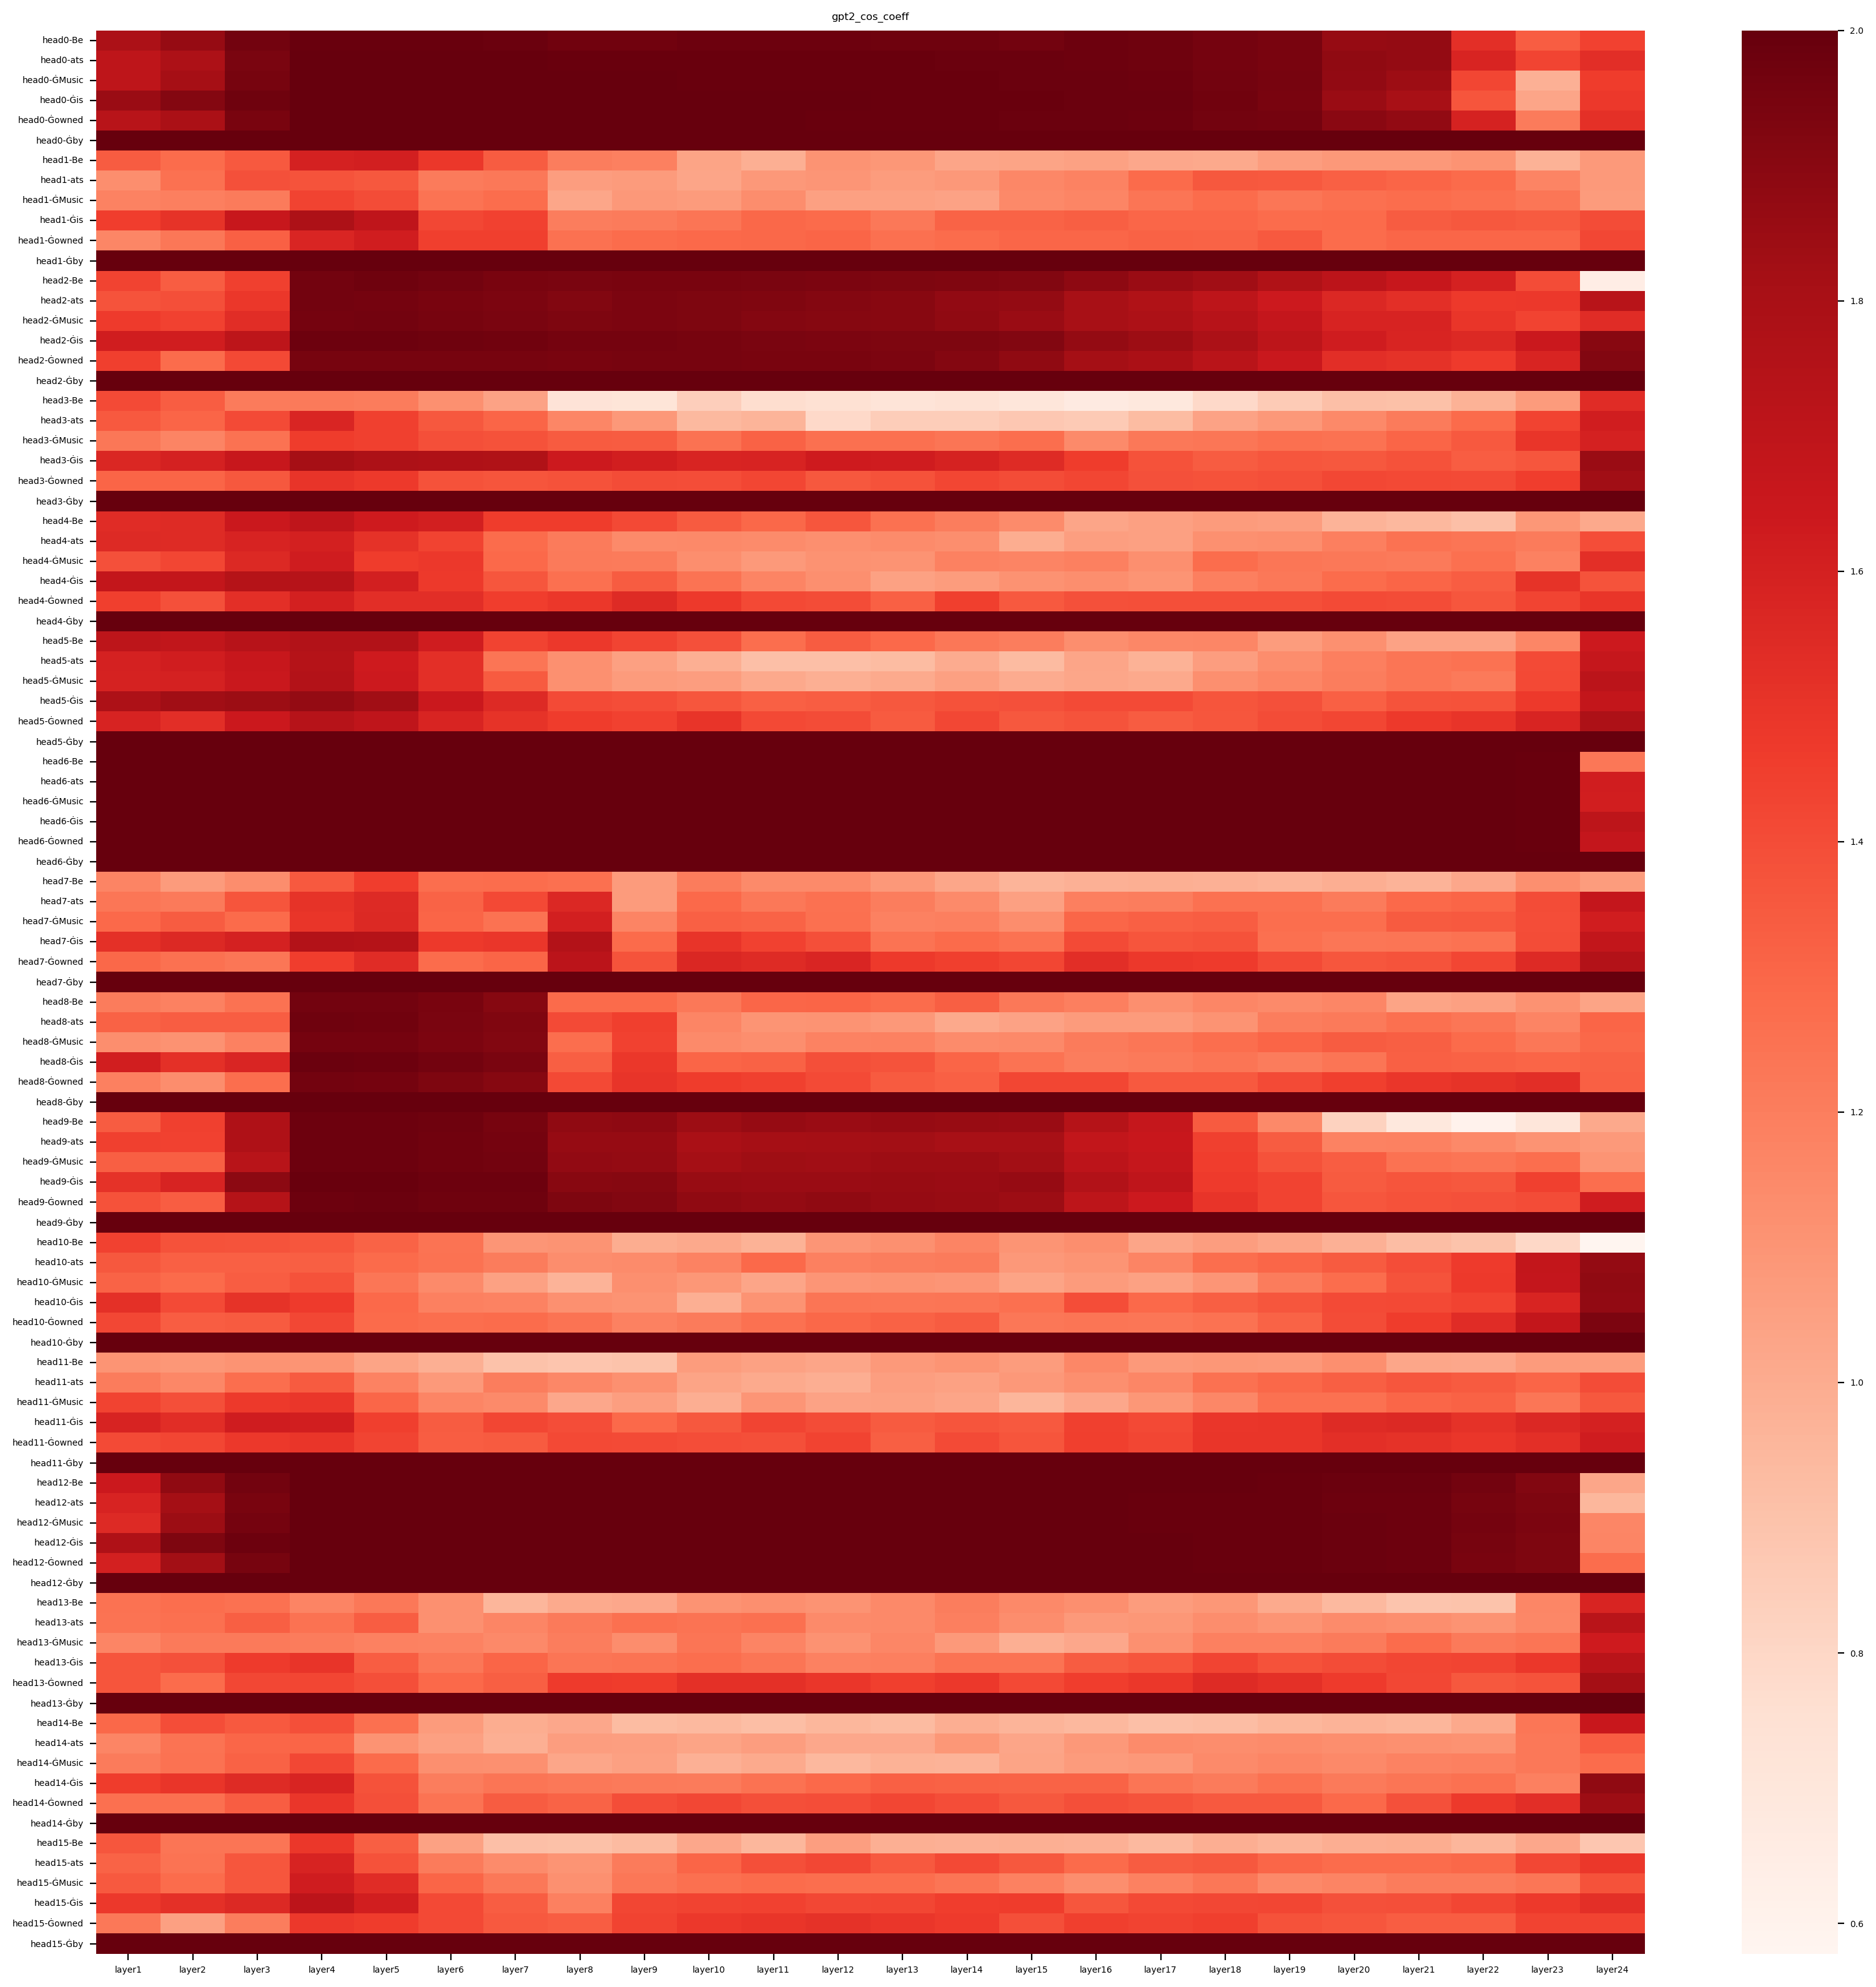

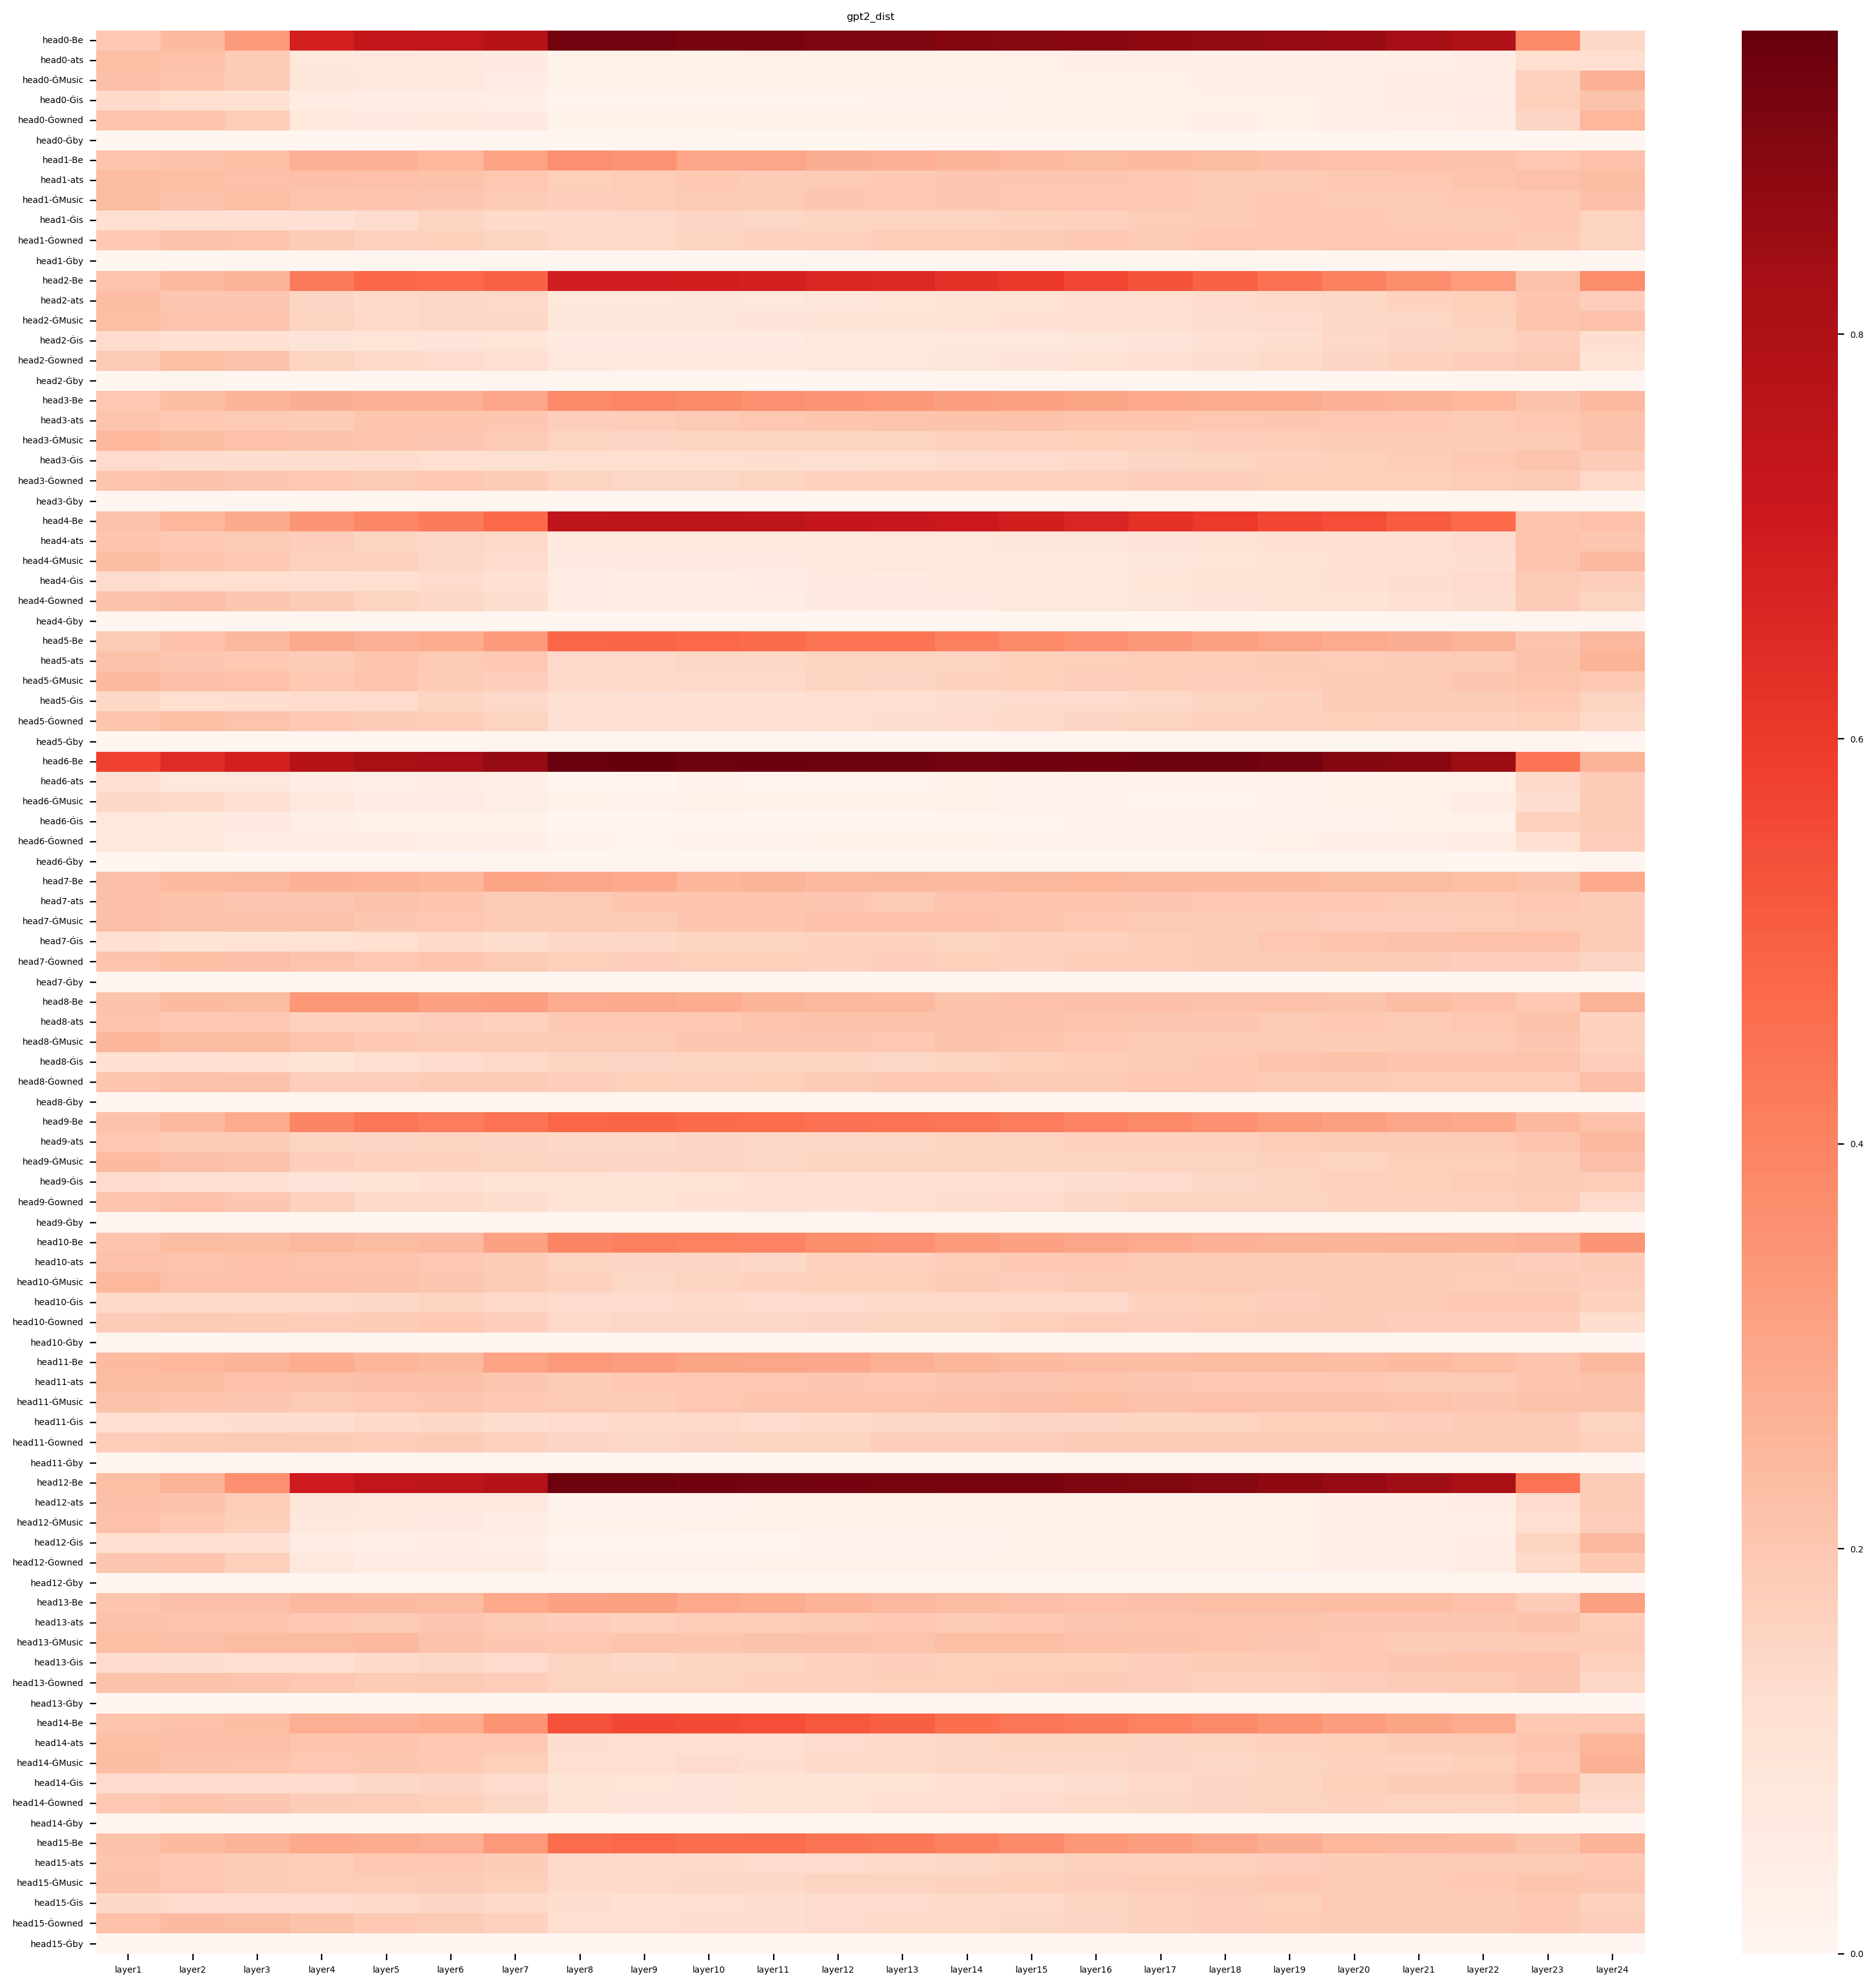

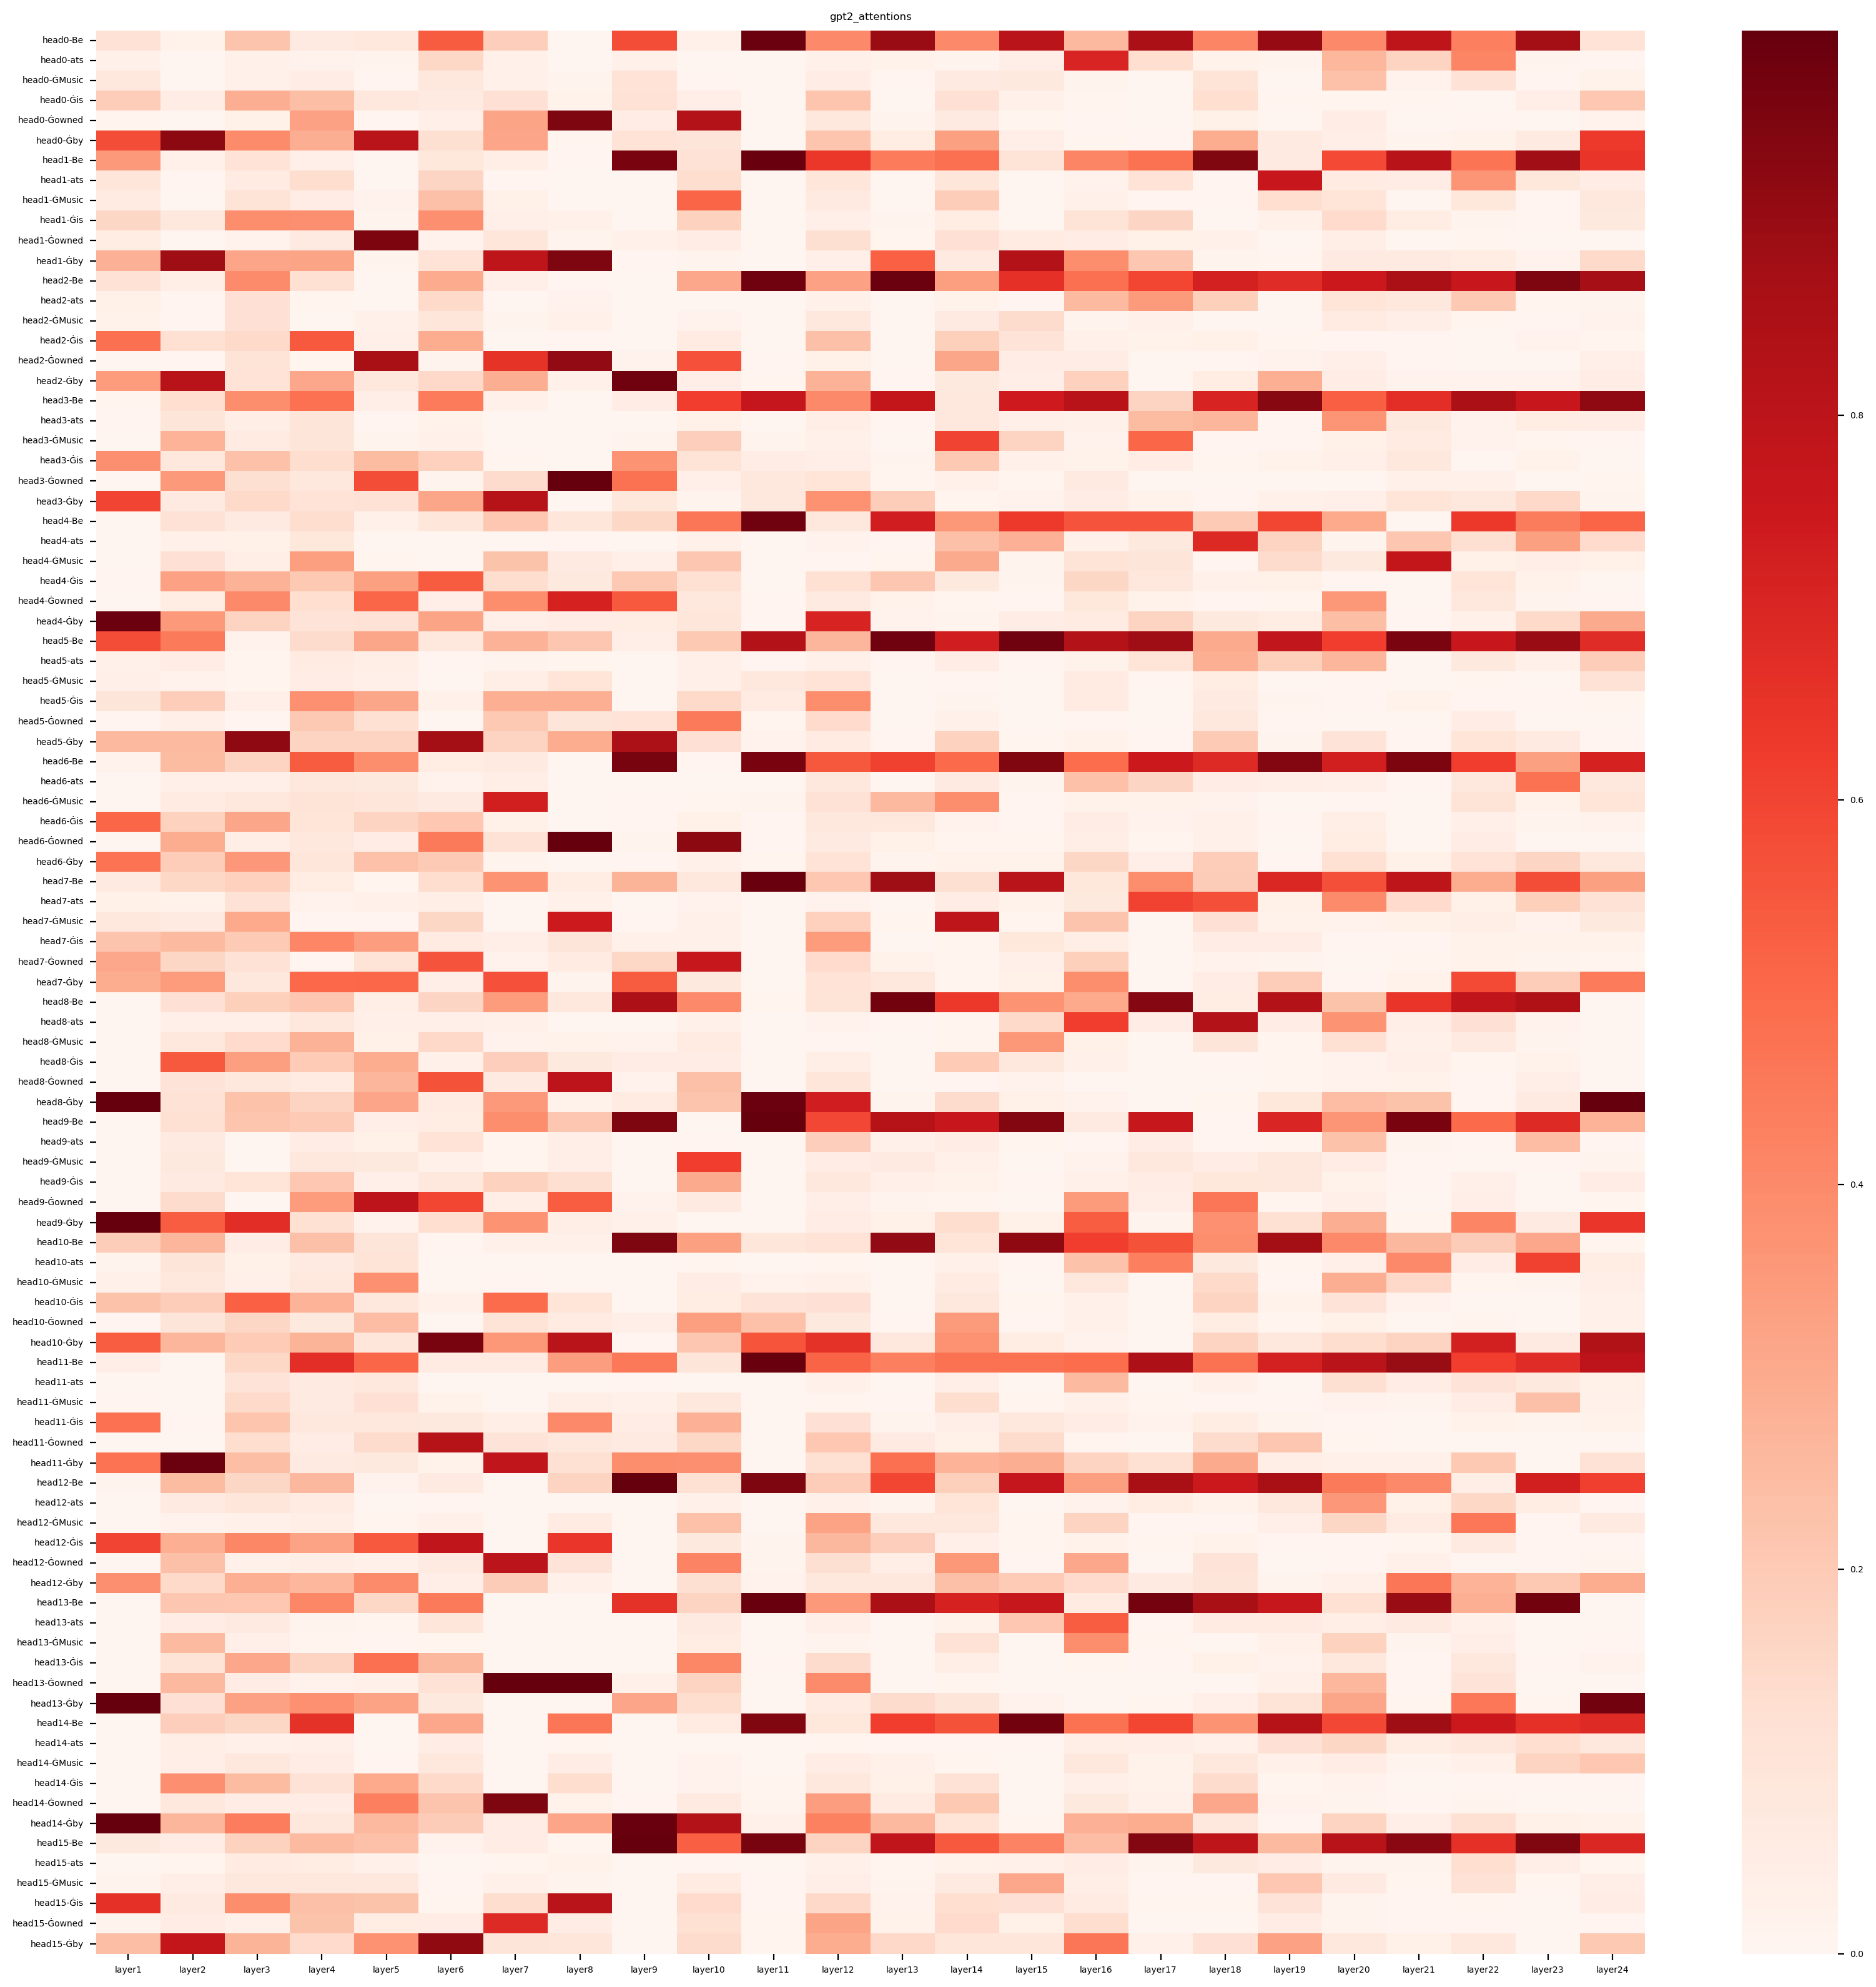

In [16]:
draw_head_dist()

##### EleutherAI/gpt-j-6b

In [20]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'EleutherAI/gpt-j-6b' # 'openai-community/gpt2-xl' #'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                                is_linear=is_linear)
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.n_layer
n_heads = model_config.n_head
check_token_id = -1

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.k_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.v_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.q_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.out_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_in.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_in.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.fc_out.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transfor

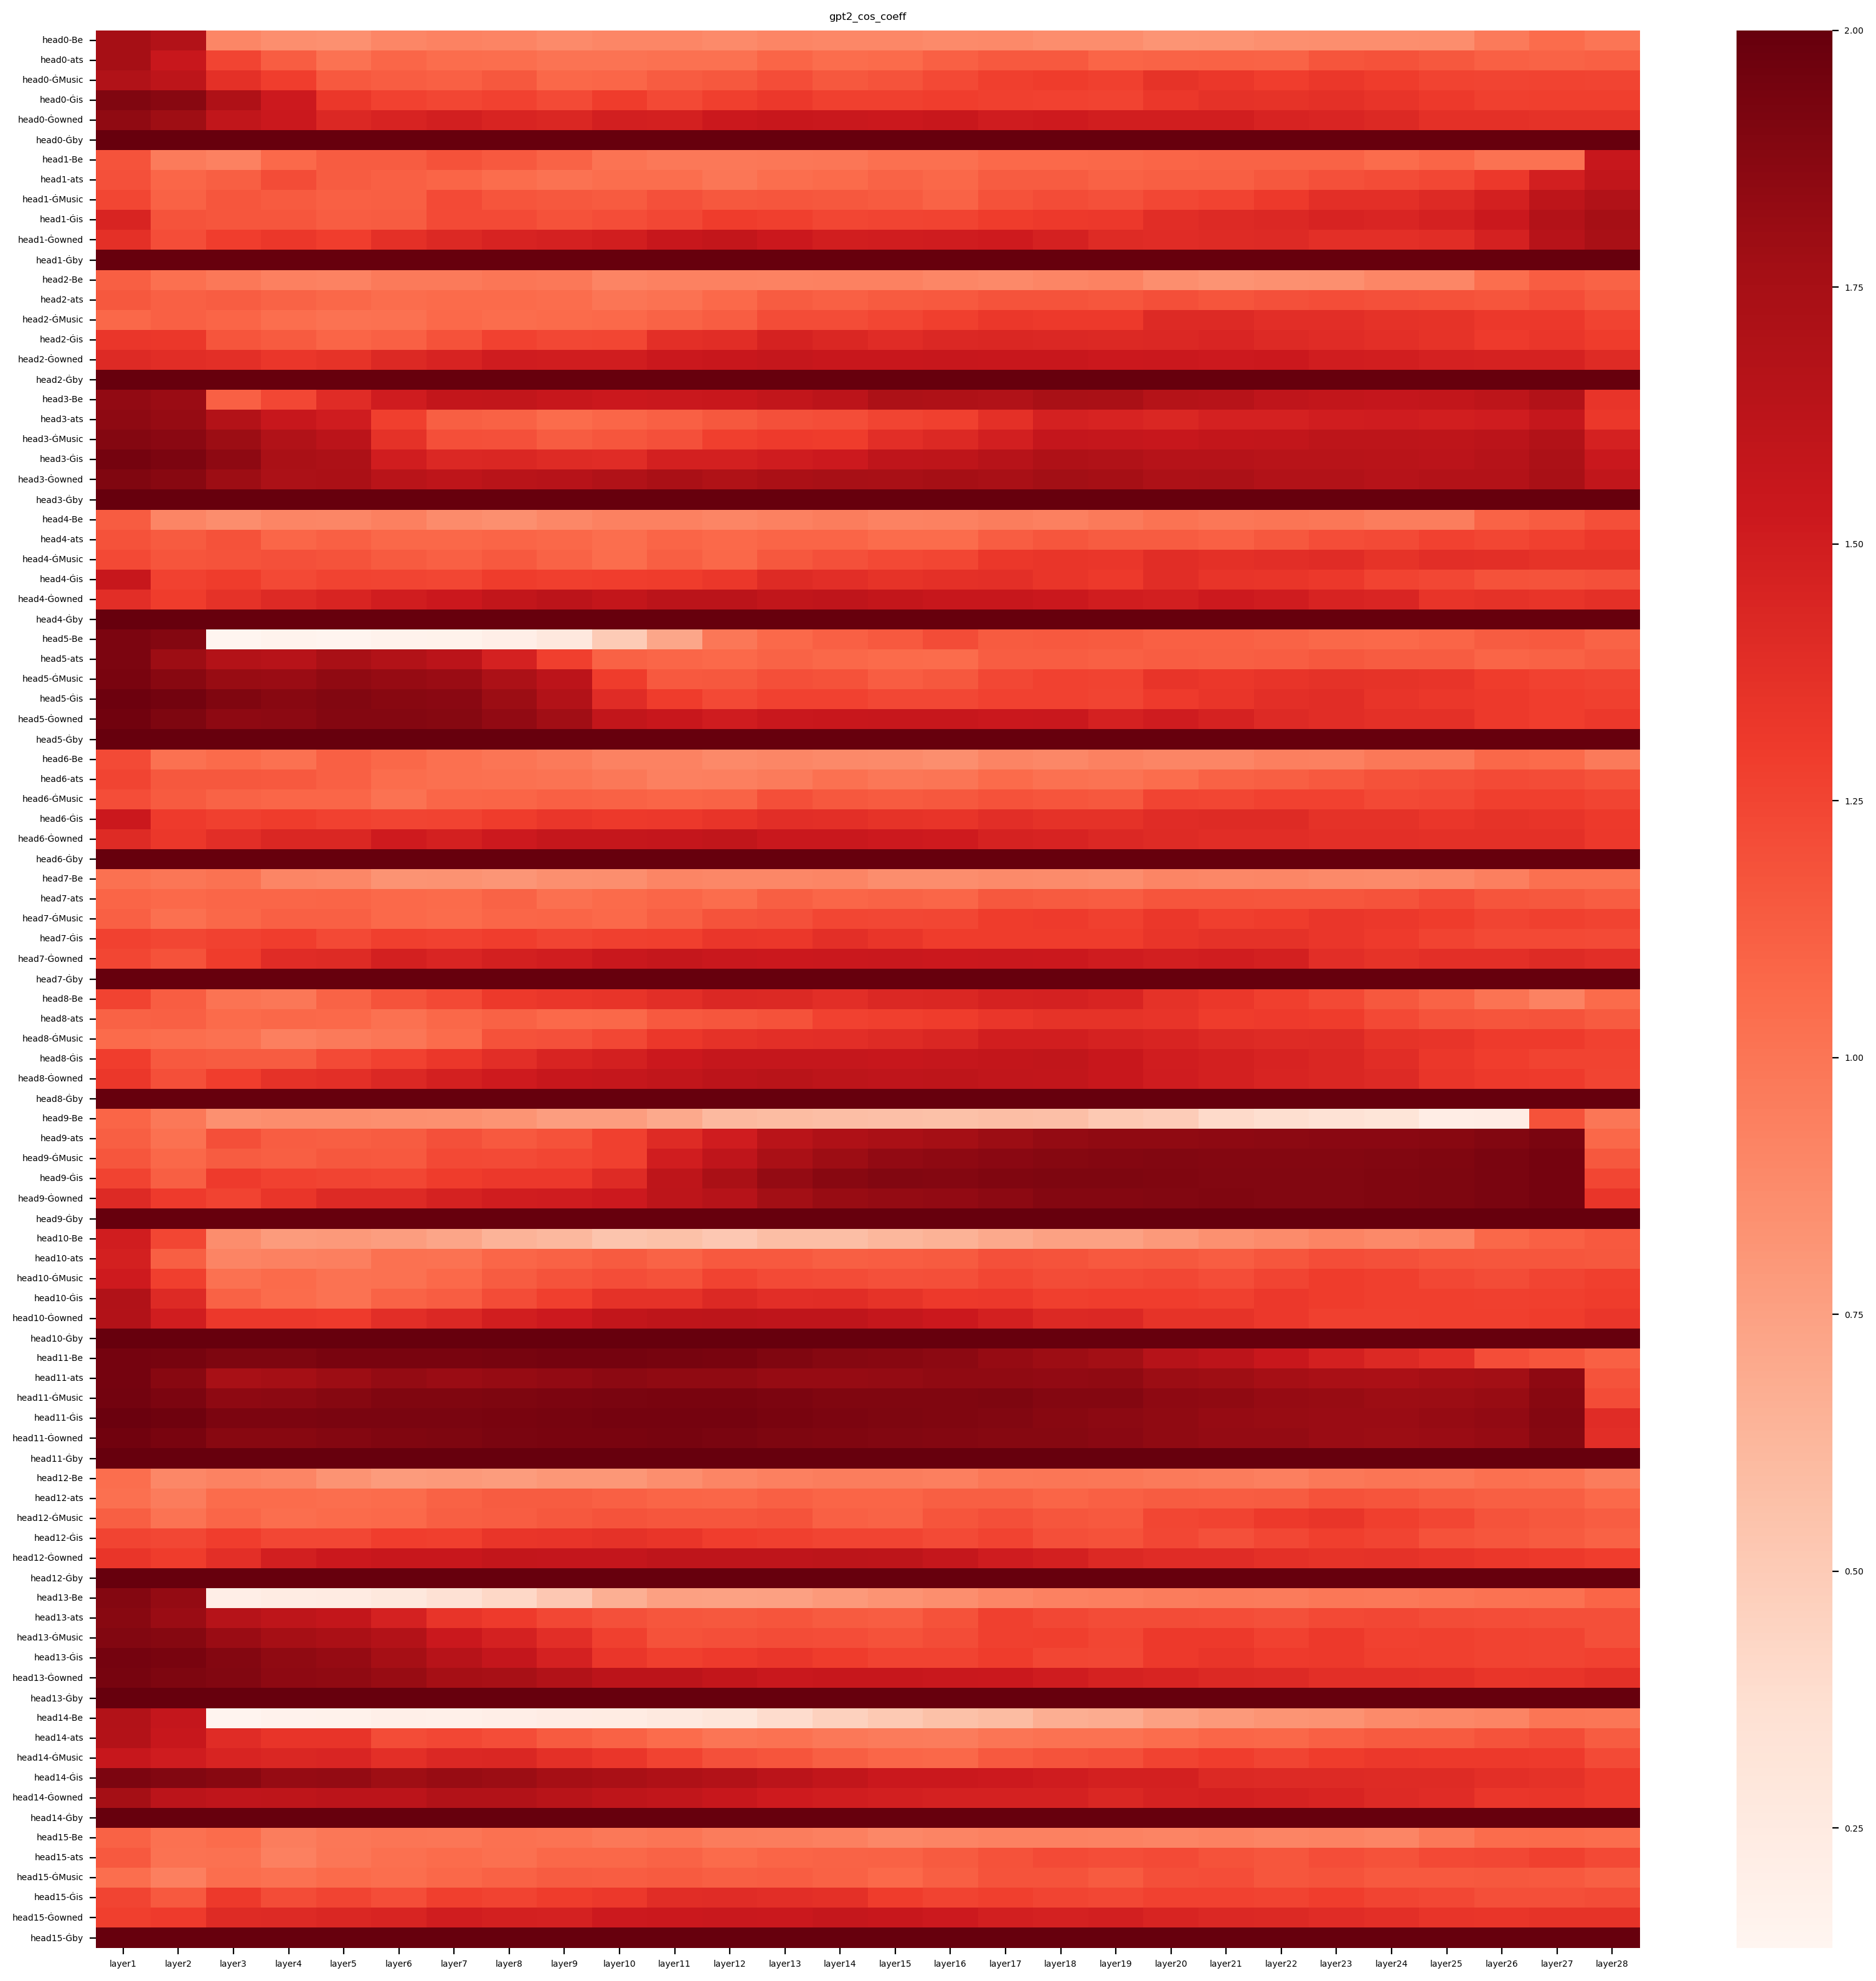

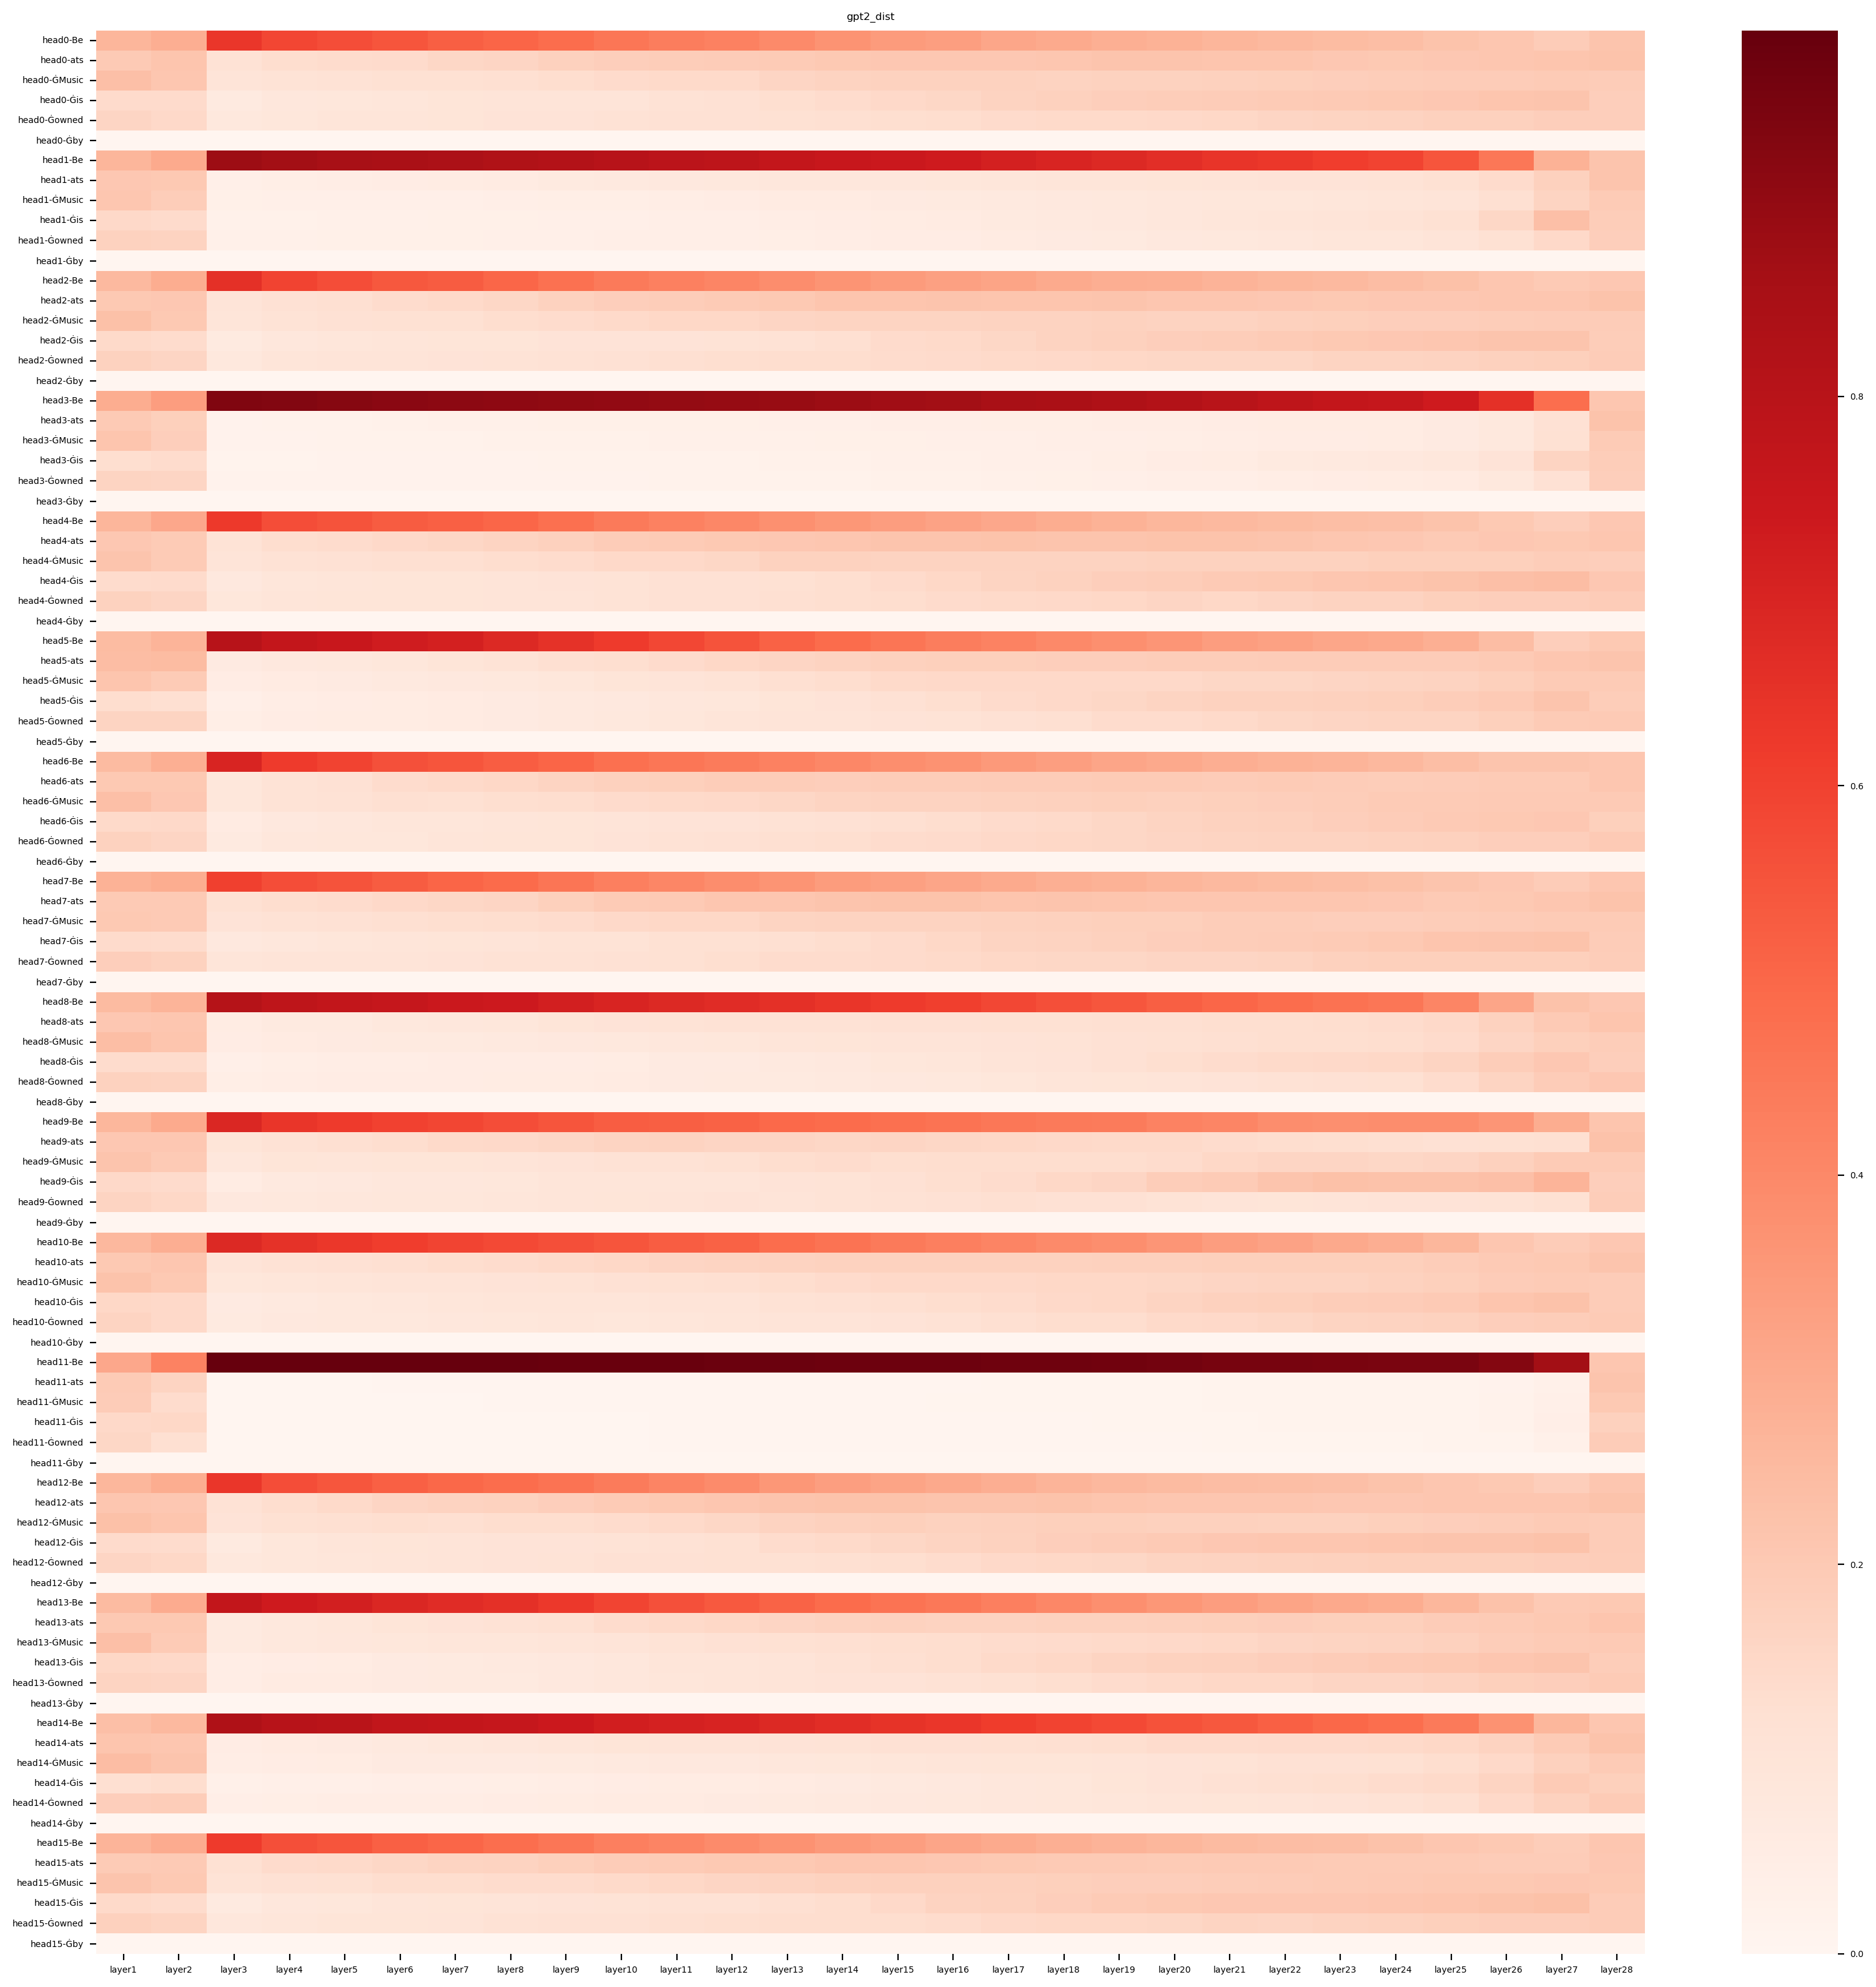

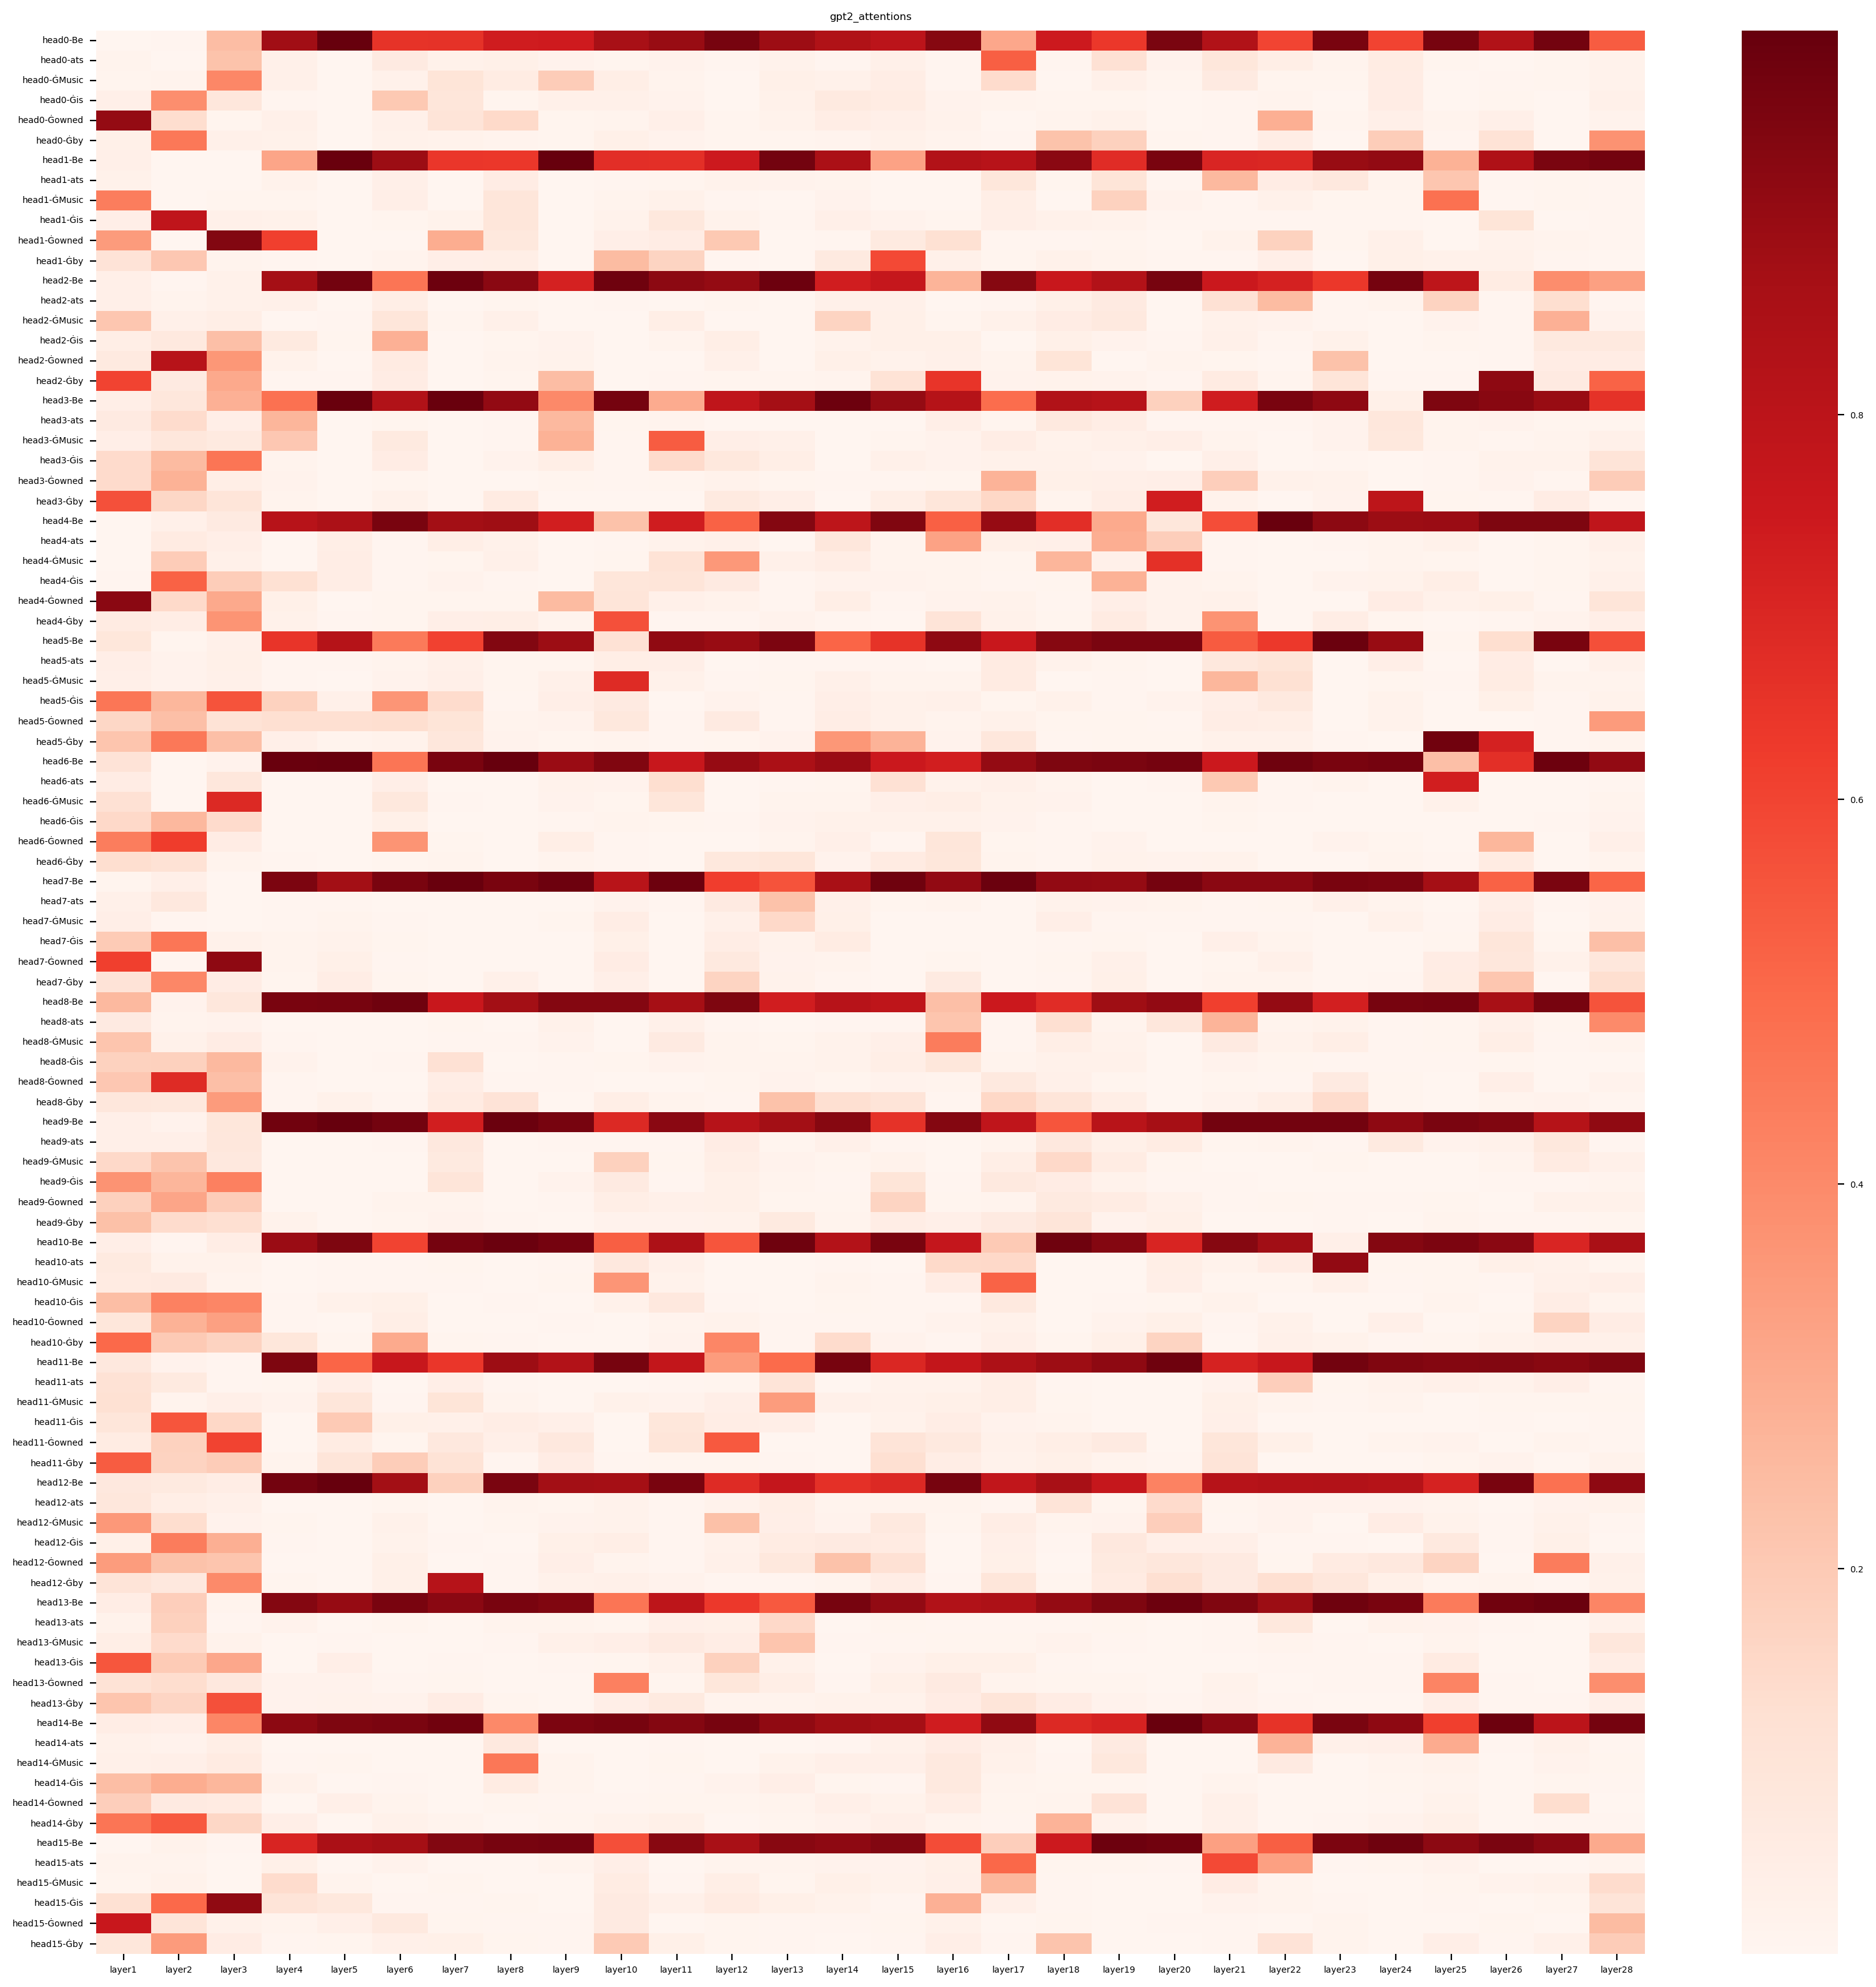

In [21]:
draw_head_dist()

##### 'openai-community/gpt2-xl'

In [22]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'openai-community/gpt2-xl' # 'openai-community/gpt2-xl' #'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                                is_linear=is_linear)
model_config = AutoConfig.from_pretrained(model_name)
n_layers = model_config.n_layer
n_heads = model_config.n_head
check_token_id = -1

name:transformer.wte.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.wpe.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_1.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.c_attn.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.c_attn.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.c_proj.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.attn.c_proj.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.weight param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.ln_2.bias param requires_grad:True, detype:torch.float32, device:cuda:0
name:transformer.h.0.mlp.c_fc.weight par

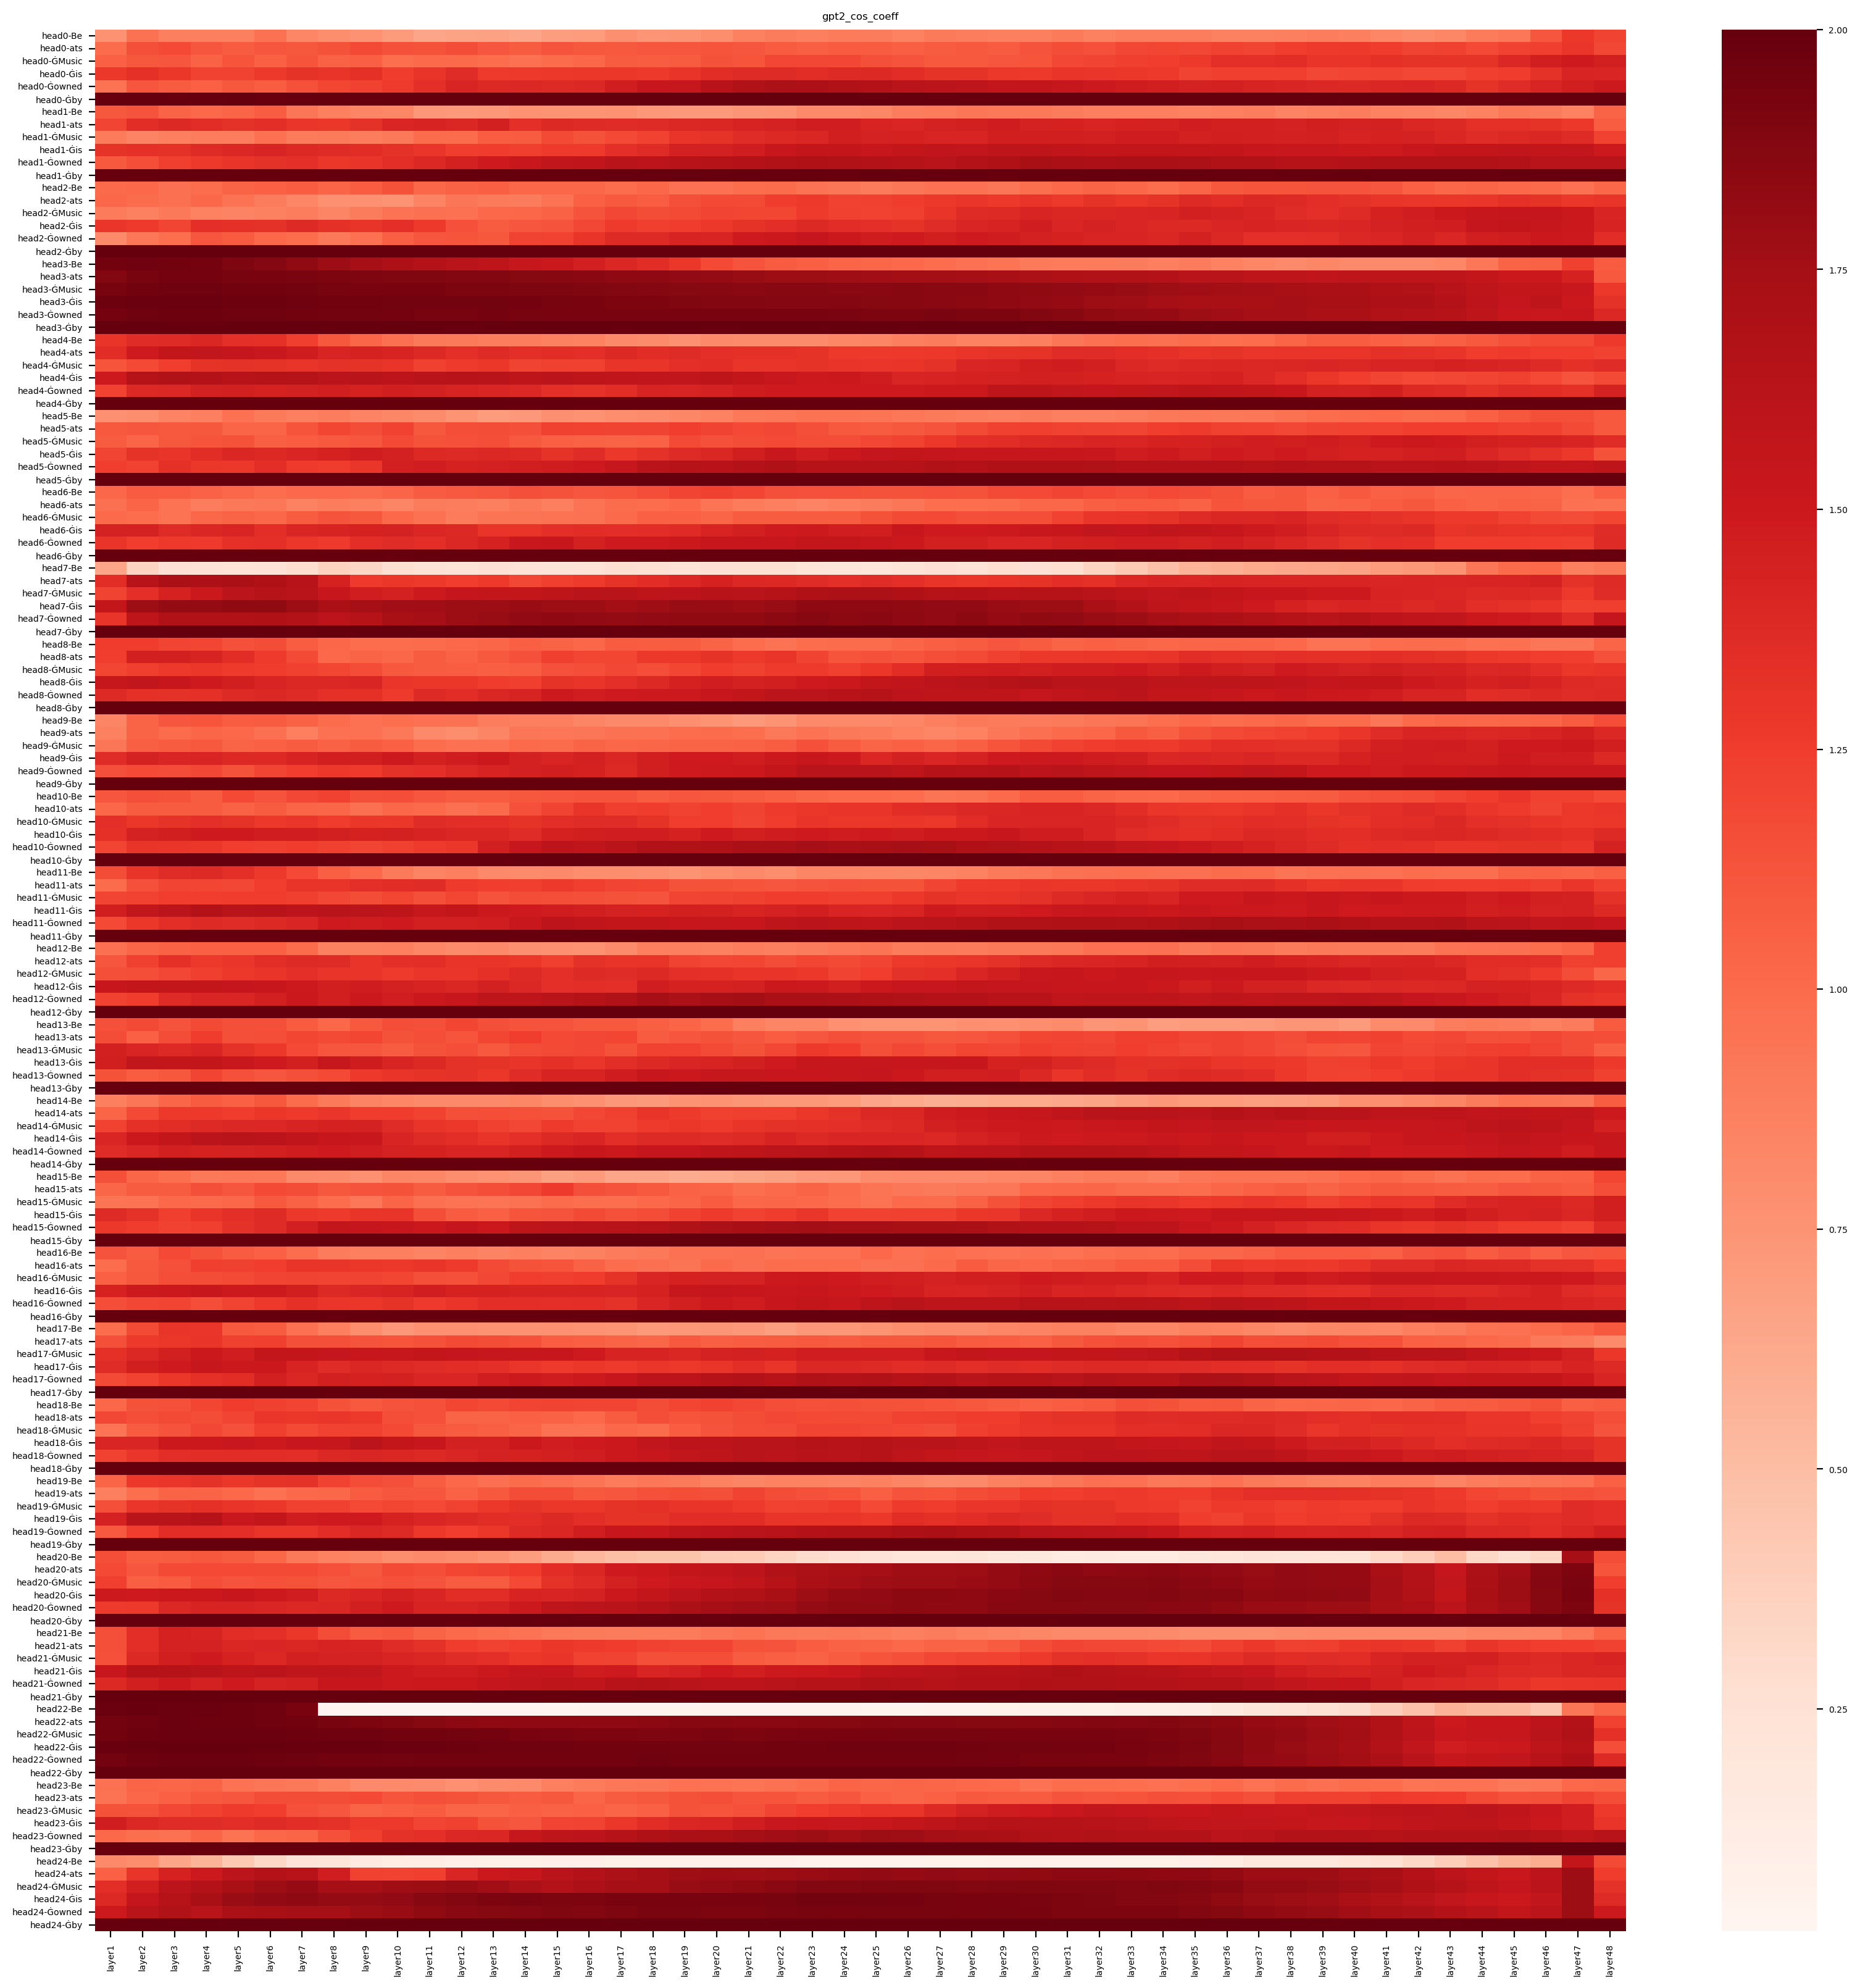

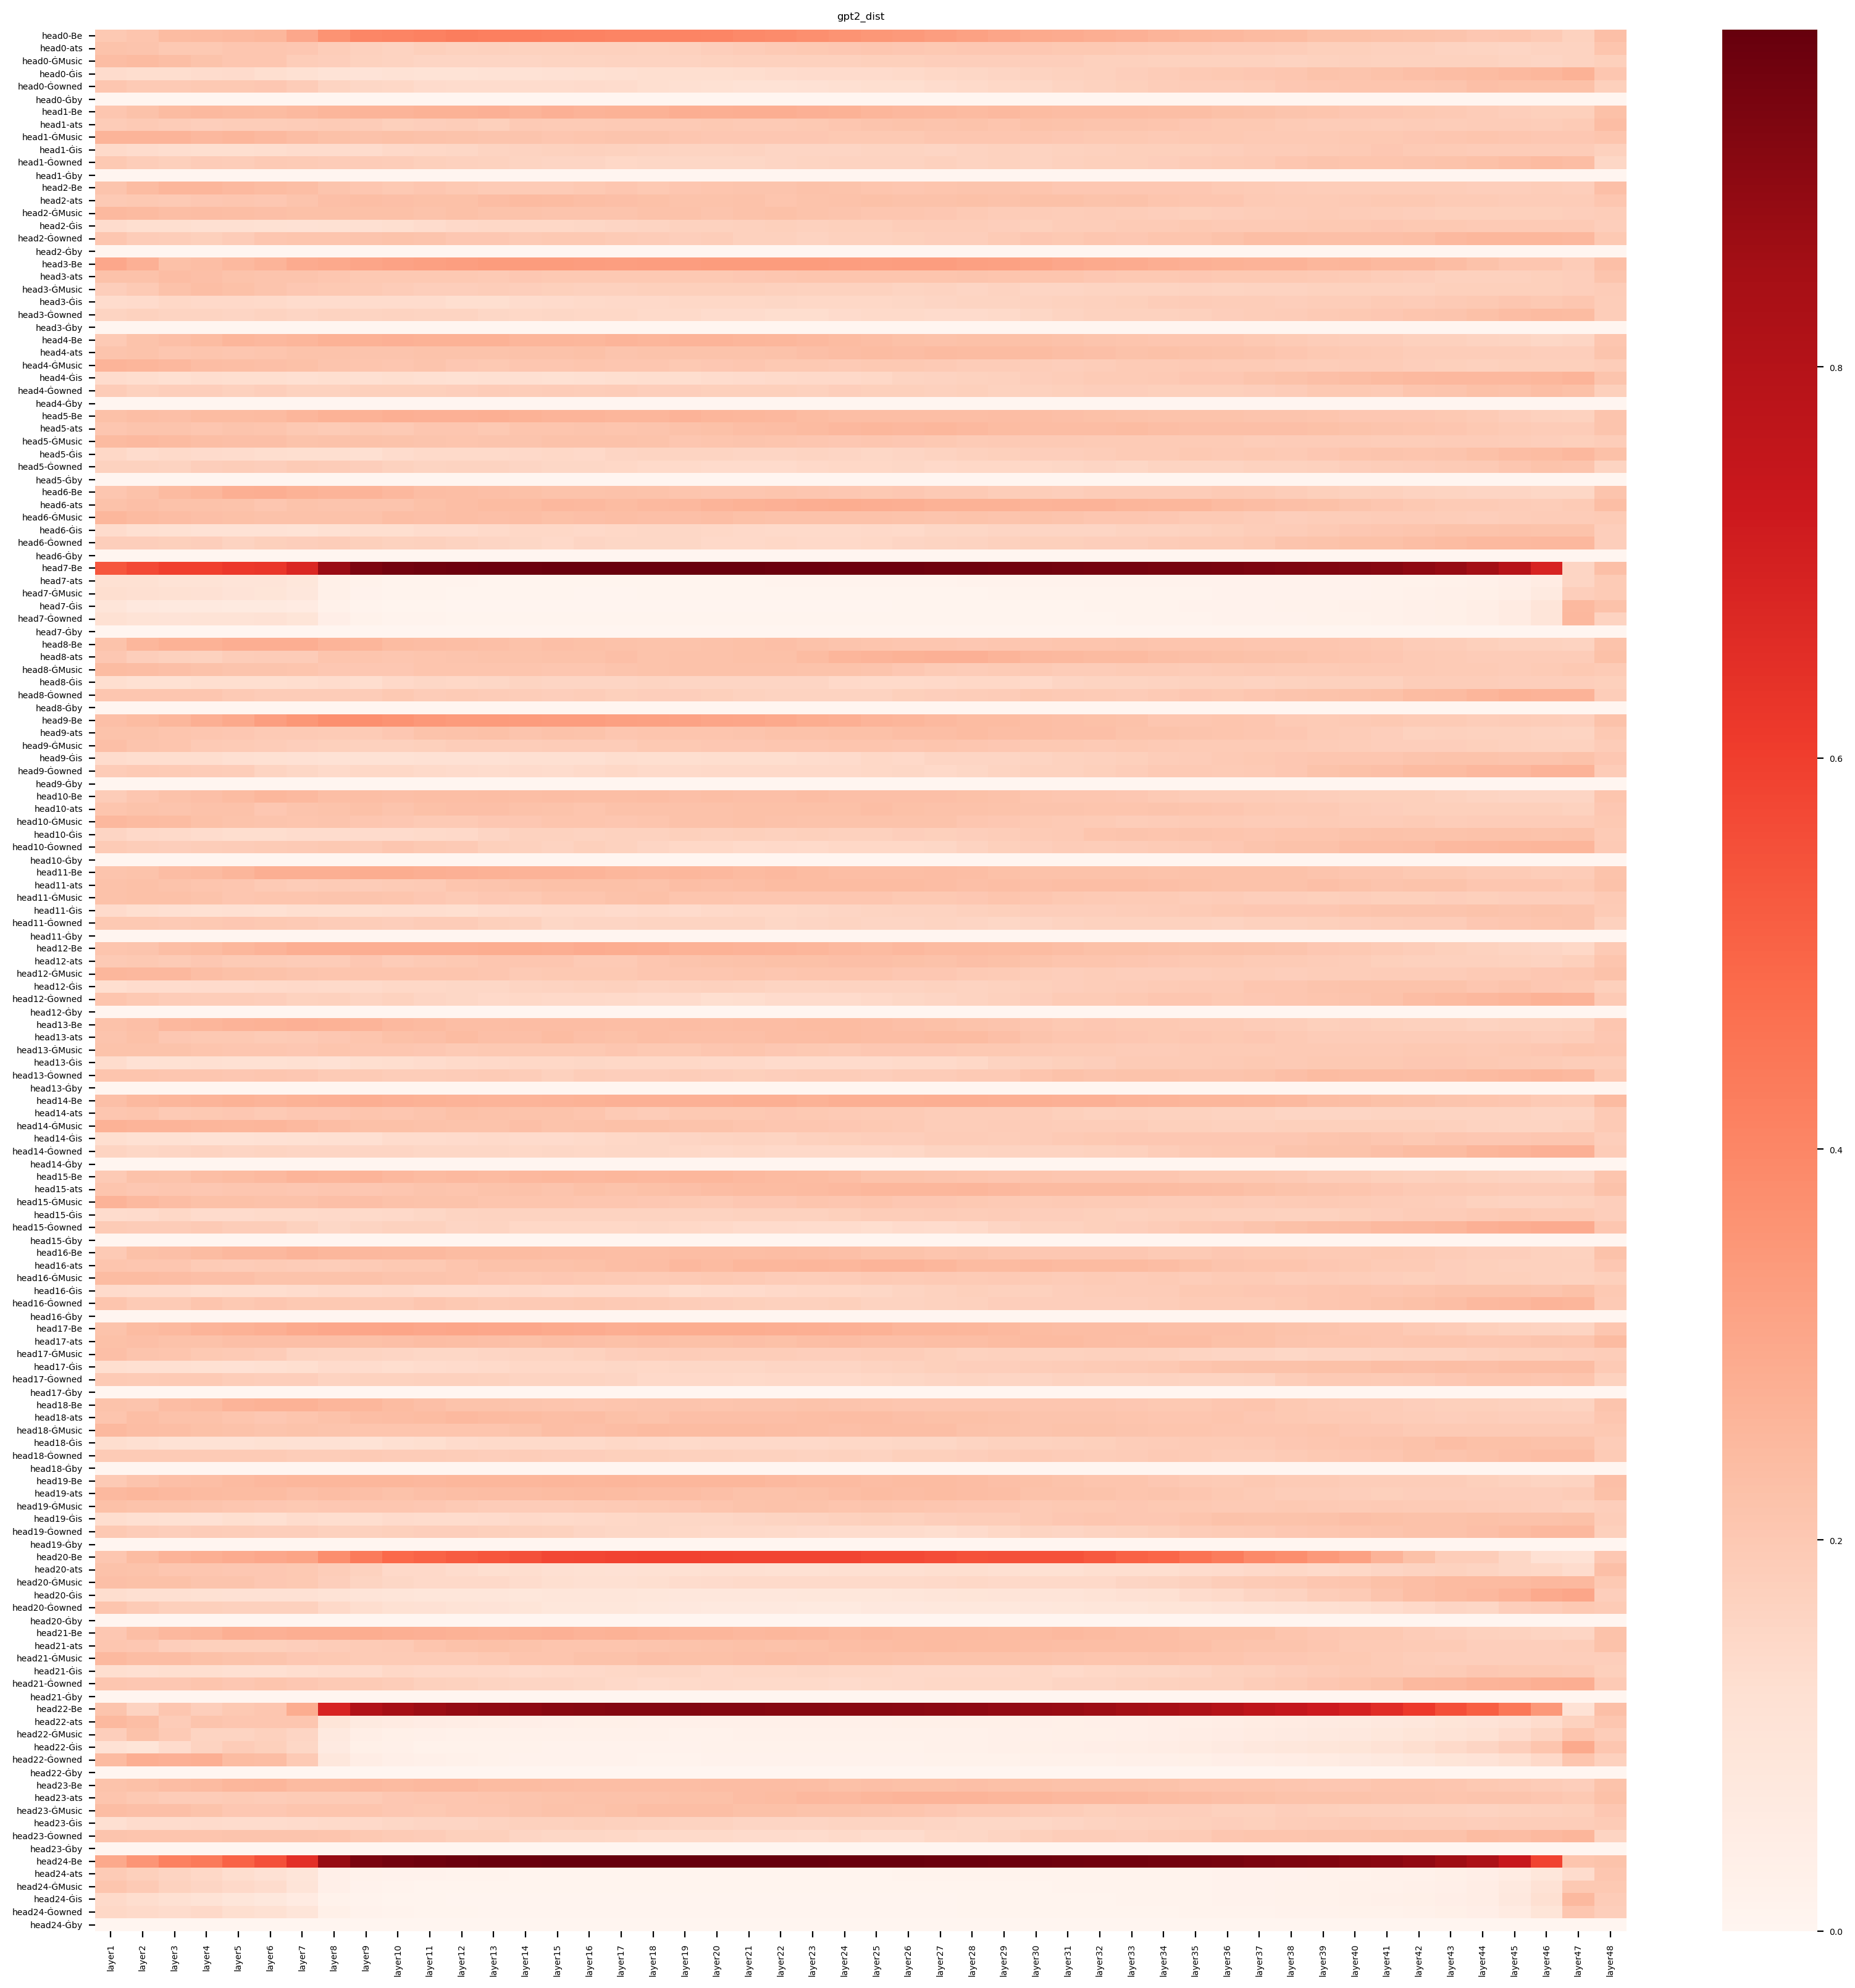

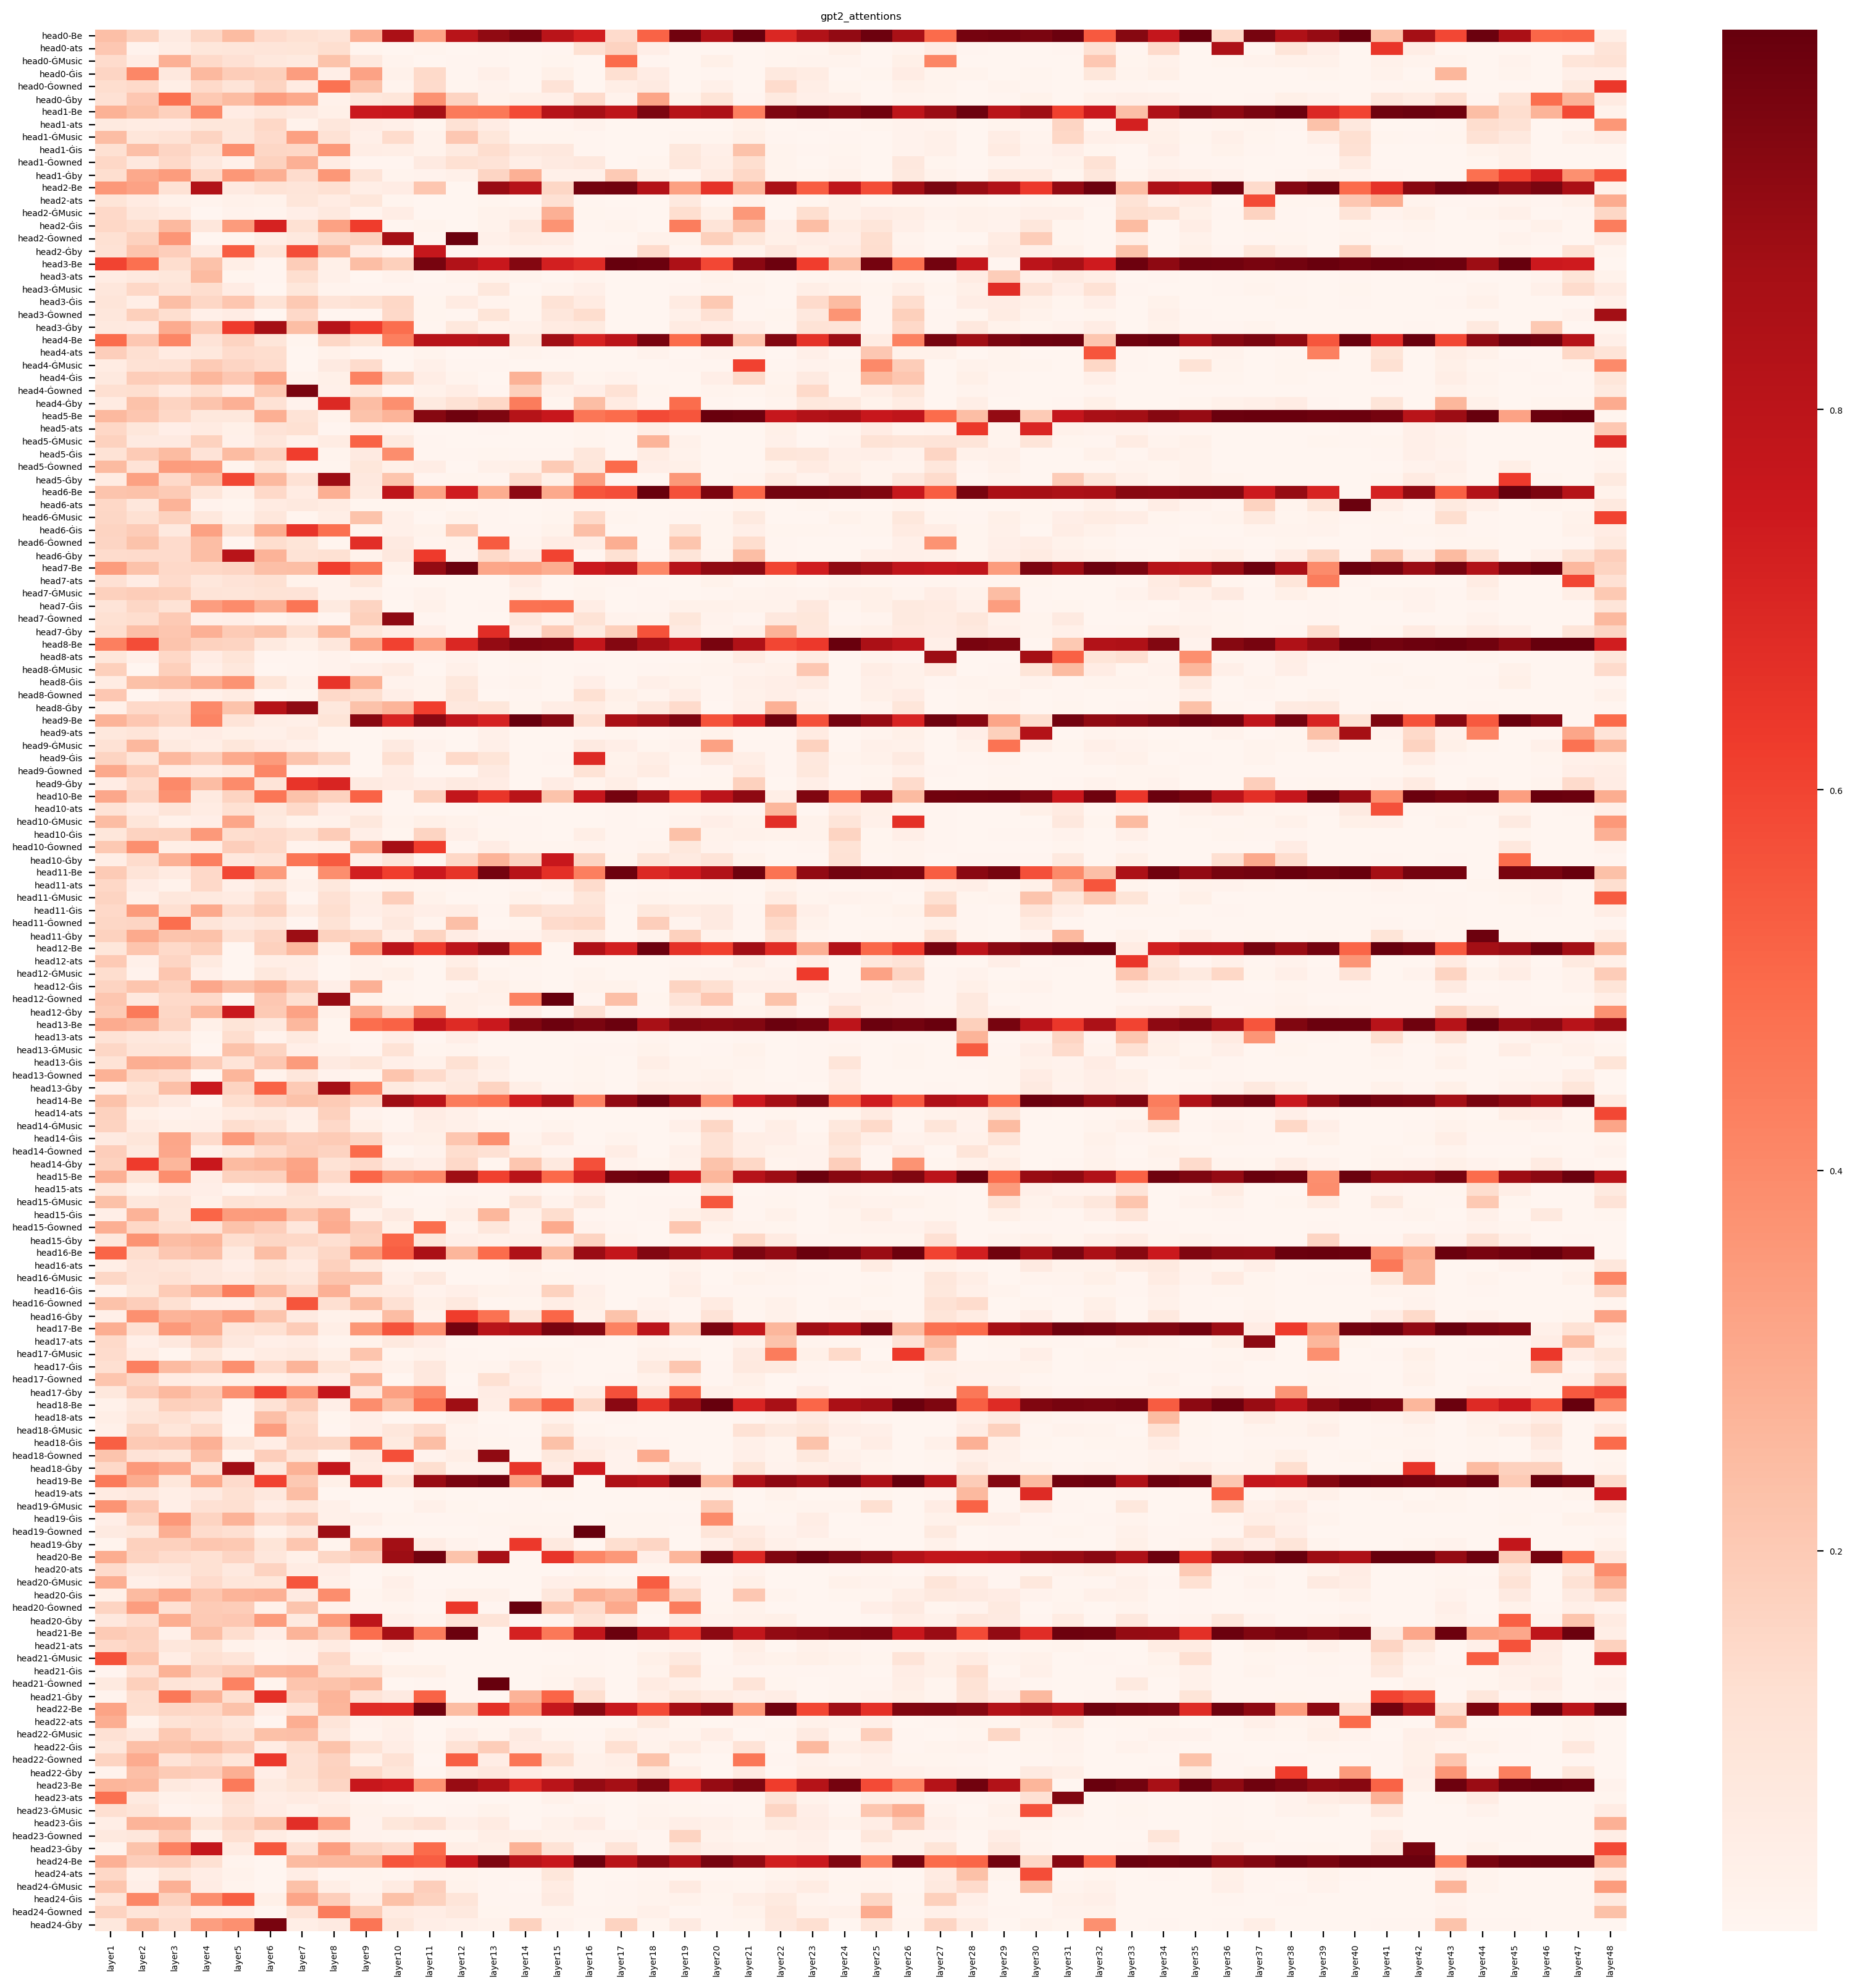

In [23]:
draw_head_dist()

In [2]:
def try_hook4(model, tokenizer, model_config, prompt, check_token_id, device):
    def modify(layer_ids, token_id, n_heads, check_token_id, device):
        def modify_output(output, layer_name, inputs):
            current_layer = int(layer_name.split(".")[2])
            # if current_layer == edit_layer:
            #     if isinstance(output, tuple):
            #         output[0][:, idx] += fv_vector.to(device)
            #         return output
            #     else:
            #         return output
            # else:
            #     return output
            return output

        def modify_input(input, layer_name):
            # print(layer_name)
            # for layer_id in layer_ids:
            #     if str(layer_id) in layer_name.split('.'):
            # heads_range = range(n_heads)
            input[:, 0, :] = input[:, -1, :]
            # input[:, 4, :] = input[:, -1, :]
            return input

        return modify_output, modify_input
    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    output_and_cache = model(**inputs, output_hidden_states=True, output_attentions=True)
    ground_attentions = torch.cat(output_and_cache.attentions, dim=0).cpu()
    hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()
    past_key = torch.cat([key_values[0] for key_values in output_and_cache.past_key_values], dim=0).detach().cpu().numpy()
    past_values = torch.cat([key_values[1] for key_values in output_and_cache.past_key_values], dim=0).detach().cpu().numpy()

    token_id, layer_ids = 0, range(3, model_config['n_layers']-1)
    modify_output, modify_input = modify(layer_ids, token_id, model_config['n_heads'],  check_token_id , device)
    with TraceDict2(model, layers=model_config['k_q_names'], edit_input=modify_input,
                    edit_output=modify_output, retain_output=False) as ret:
        output_and_cache = model(**inputs,output_attentions=True,output_hidden_states=True,)
        change_attentions = torch.stack(output_and_cache.attentions, dim=0)[:,0].cpu()
        change_hidden_state = torch.cat(output_and_cache.hidden_states, dim=0).detach().cpu().numpy()
    return hidden_state,change_hidden_state, ground_attentions.detach().numpy(), change_attentions.detach().numpy(), past_key, past_values

In [3]:
device_str = 'cuda:0'
layers, train_layers, is_linear = [] , [], 'linear_atten'
model_name = 'EleutherAI/gpt-j-6b'  # facebook/opt-13b# 'mistralai/Mistral-7B-v0.1' 'openai-community/gpt2-xl' #'EleutherAI/gpt-j-6b' # 'EleutherAI/gpt-neo-1.3B' # 'EleutherAI/gpt-neo-125m'
model, tokenizer, MODEL_CONFIG = load_model(model_name, device=device_str, layers=layers, train_layers=train_layers,
                                            is_linear=is_linear, show_params=False)

n_layers, n_heads = MODEL_CONFIG['n_layers'], MODEL_CONFIG['n_heads']
prompt = '\nThe Space Needle is in downtown' # 'The Space Needle is in downtown' # 'Beats Music is owned by', 'Beats Music is owned by Apple and the Space Needle is in downtown'
target_token = 'Apple'
x_ticks = [f"layer{i + 1}" for i in range(n_layers)]
save_path = os.path.join(sys.path[0], './result')
encoded_line = tokenizer.encode(prompt)
codes = tokenizer.convert_ids_to_tokens(encoded_line)
y_ticks = [f"head{i_head}-{c}" for i_head in range(n_heads) for i, c in enumerate(codes)]
check_token_id = -1

hidden_state, change_hidden_state, ground_attentions, change_attentions, past_key, past_values = try_hook4(model, tokenizer, MODEL_CONFIG, prompt,check_token_id, torch.device(device_str))
ground_attentions, change_attentions = ground_attentions[:, :, check_token_id, :],change_attentions[:, :, check_token_id, :]

new_shape = hidden_state.shape[:-1] + (n_heads, -1)
head_states = np.transpose(np.reshape(hidden_state,newshape=new_shape),(0,2,1,3))[1:]
change_head_states = np.transpose(np.reshape(change_hidden_state,newshape=new_shape),(0,2,1,3))[1:]


# def draw_past_key_values(past_values, title=''):
#     past_values_dist = np.linalg.norm(past_values - past_values[:,:,0,:][:,:,np.newaxis,:], axis=3) 
#     past_values_dist = past_values_dist/np.sum(past_values_dist, axis=2)[:,:,np.newaxis]
#     plt_heatMap_sns(past_values_dist.reshape(past_values_dist.shape[0], -1).T,
#                     title=f"gpt2_dist_between_first_token_{title}", x_ticks=x_ticks, y_ticks=y_ticks
#                     , show=True, save_path=save_path)

#     cos_coeff = np.zeros(past_values.shape[:-1])
#     from sklearn.metrics.pairwise import cosine_similarity
#     for layer_id_ in range(past_values.shape[0]):
#         for head_id in range(past_values.shape[1]):
#             other,last = past_values[layer_id_, head_id], past_values[layer_id_, head_id, 0][np.newaxis, :]
#             s = cosine_similarity(other, last).reshape(-1)
#             # cos_coeff[layer_id_,head_id,-1] = 0
#             cos_coeff[layer_id_, head_id] = s + 1
#     plt_heatMap_sns(cos_coeff.reshape(cos_coeff.shape[0], -1).T,
#                     title=f"gpt2_coeff_between_first_token_{title}", x_ticks=x_ticks, y_ticks=y_ticks
#                     , show=True, save_path=save_path)
# draw_past_key_values(past_values, 'values')
# draw_past_key_values(past_key, 'keys')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
head_label =  [f'head{i}' for i in range(n_heads)]
layer_label =  [f'layer{i}' for i in range(n_layers)]
plot_umap(head_states, codes,title="head_hidden_states_token_label",save_path=save_path)
plot_umap(np.transpose(head_states,(0,2,1,3)),head_label,title="head_hidden_states_head_label",save_path=save_path)
plot_umap(np.transpose(head_states,(2,1,0,3)),layer_label,title="head_hidden_states_layer_label",save_path=save_path)
plot_umap(past_values, codes,title="head_past_values_token_label",save_path=save_path)

In [ ]:
plot_umap(hidden_state[1:,np.newaxis,:,:], 
          codes,title="hidden_states_token_label",save_path=save_path)
plot_umap(np.transpose(hidden_state[1:,np.newaxis,:,:],(2,1,0,3)), 
          layer_label,title="hidden_states_layer_label",save_path=save_path)
new_past_values = np.transpose(past_values,(0,2,1,3)).reshape(past_values.shape[0],past_values.shape[2], -1)[:,np.newaxis,:,:]
plot_umap(new_past_values,codes,title="past_values_token_label",save_path=save_path)
plot_umap(np.transpose(new_past_values,(2,1,0,3)),codes,title="past_values_token_label",save_path=save_path)

In [ ]:
plot_umap(head_states[:,:,1:,:], codes[1:],title="head_hidden_states_without_toke0",save_path=save_path)
plot_umap(past_values[:,:,1:,:], codes[1:],title="head_past_values_without_toke0",save_path=save_path)
plot_umap(hidden_state[1:,np.newaxis,1:,:], 
          codes[1:],title="hidden_states_without_toke0",save_path=save_path)
plot_umap(np.transpose(past_values,(0,2,1,3)).reshape(past_values.shape[0],past_values.shape[2], -1)[:,np.newaxis,1:,:],
               codes[1:],title="past_values_without_toke0",save_path=save_path)

In [ ]:
plt_heatMap_sns(ground_attentions.reshape(ground_attentions.shape[0], -1).T,
                title="ground_attentions", x_ticks=x_ticks, y_ticks=y_ticks
                , show=True, save_path=save_path)
plt_heatMap_sns(change_attentions.reshape(change_attentions.shape[0], -1).T,
                title="change_attentions", x_ticks=x_ticks, y_ticks=y_ticks
                , show=True, save_path=save_path)

dist = np.linalg.norm(head_states - head_states[:,:,-1][:,:,np.newaxis,:], axis=3) 
dist = dist/np.sum(dist, axis=2)[:,:,np.newaxis]
dist[:, :, (0,)] = 0
# new_shape = hidden_state.size()[:-1] + (num_heads, attn_head_size)
# tensor = tensor.view(new_shape)
plt_heatMap_sns(dist.reshape(dist.shape[0], -1).T,
                title="hidden_state_dist_without_first_token", x_ticks=x_ticks, y_ticks=y_ticks
                , show=True, save_path=save_path)